In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("Toppr_DS_Assignment_Data.csv")

In [ ]:
df['tutor_joined_on'] = pd.to_datetime(df['tutor_joined_on'])
df['exited_on'] = pd.to_datetime(df['exited_on'])

In [ ]:
df.dtypes

session_id                  int64
subject_id                  int64
tutor_id                    int64
tutor_joined_on    datetime64[ns]
exited_on          datetime64[ns]
dtype: object

In [ ]:
ht = df['exited_on'][0]-df['tutor_joined_on'][0]

In [ ]:
df

session_id  subject_id  tutor_id         tutor_joined_on  \
0         58891832           1  25888582 2021-08-24 08:50:59.986   
1         58895182           1  42704098 2021-08-24 11:20:35.380   
2         58894350           3  19300924 2021-08-24 10:46:49.303   
3         58912438           2  25481986 2021-08-25 07:59:47.025   
4         58913020           1  34486126 2021-08-25 08:31:19.618   
...            ...         ...       ...                     ...   
449008    57503604           1  17506868 2021-07-03 03:09:38.020   
449009    58603740           2  40303006 2021-08-11 04:03:46.934   
449010    57904282           4  37264364 2021-07-17 05:40:04.303   
449011    57824288           3  13273652 2021-07-14 06:51:58.343   
449012    57827584           2  24372858 2021-07-14 09:11:41.545   

                     exited_on  
0      2021-08-24 09:00:38.411  
1      2021-08-24 11:35:00.323  
2      2021-08-24 10:52:34.587  
3      2021-08-25 08:08:21.243  
4      2021-08-25 08:33:49.924  
...                        ...  
449008 2021-07-03 03:13:49.555  
449009 2021-08-11 04:20:00.756  
449010 2021-07-17 05:46:39.888  
449011 2021-07-14 06:54:22.544  
449012 2021-07-14 09:23:29.713  

[449013 rows x 5 columns]

In [ ]:
df = df.sort_values(by=['tutor_joined_on'])

In [ ]:
df

session_id  subject_id  tutor_id         tutor_joined_on  \
10564     57457766           1  39251512 2021-06-30 18:31:19.019   
390978    57457774           2  19857386 2021-06-30 18:31:45.344   
422883    57457778           3  22037200 2021-06-30 18:32:09.698   
384215    57457782           1  27139594 2021-06-30 18:32:39.490   
295572    57457788           3  10466374 2021-06-30 18:33:07.067   
...            ...         ...       ...                     ...   
114141    59058422           1   6622508 2021-08-31 18:25:31.007   
54445     59058428           1   1724346 2021-08-31 18:27:24.626   
405259    59058430           3  17843810 2021-08-31 18:27:40.475   
136318    59058434           1  18840614 2021-08-31 18:28:44.074   
143205    59058436           1   6622508 2021-08-31 18:29:21.876   

                     exited_on  
10564  2021-06-30 18:38:14.913  
390978 2021-06-30 18:33:58.982  
422883 2021-06-30 18:34:37.604  
384215 2021-06-30 18:56:00.438  
295572 2021-06-30 18:40:45.826  
...                        ...  
114141 2021-08-31 18:36:10.321  
54445  2021-08-31 18:34:42.890  
405259 2021-08-31 18:42:59.347  
136318 2021-08-31 18:41:40.070  
143205 2021-08-31 18:37:21.627  

[449013 rows x 5 columns]

In [ ]:
df['tutor_joined_on']

10564    2021-06-30 18:31:19.019
390978   2021-06-30 18:31:45.344
422883   2021-06-30 18:32:09.698
384215   2021-06-30 18:32:39.490
295572   2021-06-30 18:33:07.067
                   ...          
114141   2021-08-31 18:25:31.007
54445    2021-08-31 18:27:24.626
405259   2021-08-31 18:27:40.475
136318   2021-08-31 18:28:44.074
143205   2021-08-31 18:29:21.876
Name: tutor_joined_on, Length: 449013, dtype: datetime64[ns]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

session_id  subject_id  tutor_id         tutor_joined_on  \
0         57457766           1  39251512 2021-06-30 18:31:19.019   
1         57457774           2  19857386 2021-06-30 18:31:45.344   
2         57457778           3  22037200 2021-06-30 18:32:09.698   
3         57457782           1  27139594 2021-06-30 18:32:39.490   
4         57457788           3  10466374 2021-06-30 18:33:07.067   
...            ...         ...       ...                     ...   
449008    59058422           1   6622508 2021-08-31 18:25:31.007   
449009    59058428           1   1724346 2021-08-31 18:27:24.626   
449010    59058430           3  17843810 2021-08-31 18:27:40.475   
449011    59058434           1  18840614 2021-08-31 18:28:44.074   
449012    59058436           1   6622508 2021-08-31 18:29:21.876   

                     exited_on  
0      2021-06-30 18:38:14.913  
1      2021-06-30 18:33:58.982  
2      2021-06-30 18:34:37.604  
3      2021-06-30 18:56:00.438  
4      2021-06-30 18:40:45.826  
...                        ...  
449008 2021-08-31 18:36:10.321  
449009 2021-08-31 18:34:42.890  
449010 2021-08-31 18:42:59.347  
449011 2021-08-31 18:41:40.070  
449012 2021-08-31 18:37:21.627  

[449013 rows x 5 columns]

In [ ]:
joining = df['tutor_joined_on']
joining_month = []
for datetime in joining:
    joining_month.append(datetime.month)
df['joining_month'] = joining_month

In [ ]:
df

session_id  subject_id  tutor_id         tutor_joined_on  \
0         57457766           1  39251512 2021-06-30 18:31:19.019   
1         57457774           2  19857386 2021-06-30 18:31:45.344   
2         57457778           3  22037200 2021-06-30 18:32:09.698   
3         57457782           1  27139594 2021-06-30 18:32:39.490   
4         57457788           3  10466374 2021-06-30 18:33:07.067   
...            ...         ...       ...                     ...   
449008    59058422           1   6622508 2021-08-31 18:25:31.007   
449009    59058428           1   1724346 2021-08-31 18:27:24.626   
449010    59058430           3  17843810 2021-08-31 18:27:40.475   
449011    59058434           1  18840614 2021-08-31 18:28:44.074   
449012    59058436           1   6622508 2021-08-31 18:29:21.876   

                     exited_on  joining_month  
0      2021-06-30 18:38:14.913              6  
1      2021-06-30 18:33:58.982              6  
2      2021-06-30 18:34:37.604              6  
3      2021-06-30 18:56:00.438              6  
4      2021-06-30 18:40:45.826              6  
...                        ...            ...  
449008 2021-08-31 18:36:10.321              8  
449009 2021-08-31 18:34:42.890              8  
449010 2021-08-31 18:42:59.347              8  
449011 2021-08-31 18:41:40.070              8  
449012 2021-08-31 18:37:21.627              8  

[449013 rows x 6 columns]

In [ ]:
df.isnull().sum()

session_id           0
subject_id           0
tutor_id             0
tutor_joined_on      0
exited_on          824
joining_month        0
handling_time      824
dtype: int64

In [ ]:
df['handling_time'].mean()

Timedelta('0 days 00:10:04.053121018')

In [ ]:
df['handling_time'].fillna(df['handling_time'].mean(), inplace=True)

In [ ]:
df['handling_time'] = df['exited_on'] - df['tutor_joined_on']

In [ ]:
df.dtypes

session_id                   int64
subject_id                   int64
tutor_id                     int64
tutor_joined_on     datetime64[ns]
exited_on           datetime64[ns]
joining_month                int64
handling_time      timedelta64[ns]
dtype: object

In [ ]:
df.columns

Index(['session_id', 'subject_id', 'tutor_id', 'tutor_joined_on', 'exited_on',
       'joining_month ', 'handling_time', 'joining_month'],
      dtype='object')

In [ ]:
df['joining_month']

0         6
1         6
2         6
3         6
4         6
         ..
449008    8
449009    8
449010    8
449011    8
449012    8
Name: joining_month, Length: 449013, dtype: int64

In [ ]:
df_group_by = df.groupby(['joining_month', 'subject_id'])

In [ ]:
df_group_by.get_group((7, 1))

session_id  subject_id  tutor_id         tutor_joined_on  \
154       57458298           1  24390358 2021-07-01 00:54:41.651   
155       57458304           1  24390358 2021-07-01 00:55:11.960   
156       57458306           1  27139594 2021-07-01 00:55:27.705   
157       57458310           1  27139594 2021-07-01 00:55:58.607   
159       57458316           1  24390358 2021-07-01 01:04:54.301   
...            ...         ...       ...                     ...   
228279    58325690           1  22939526 2021-07-31 22:09:36.339   
228281    58325696           1  22939526 2021-07-31 22:22:12.873   
228282    58325698           1  24750536 2021-07-31 22:30:36.176   
228283    58325700           1  22939526 2021-07-31 22:32:24.765   
228285    58325704           1  18776892 2021-07-31 22:49:09.029   

                     exited_on  joining_month          handling_time  
154    2021-07-01 00:57:57.336              7 0 days 00:03:15.685000  
155    2021-07-01 00:58:28.654              7 0 days 00:03:16.694000  
156    2021-07-01 01:11:18.142              7 0 days 00:15:50.437000  
157    2021-07-01 01:10:39.499              7 0 days 00:14:40.892000  
159    2021-07-01 01:22:59.708              7 0 days 00:18:05.407000  
...                        ...            ...                    ...  
228279 2021-07-31 22:20:05.159              7 0 days 00:10:28.820000  
228281 2021-07-31 22:46:42.079              7 0 days 00:24:29.206000  
228282 2021-07-31 22:51:00.272              7 0 days 00:20:24.096000  
228283 2021-07-31 22:48:31.112              7 0 days 00:16:06.347000  
228285 2021-07-31 22:55:33.784              7 0 days 00:06:24.755000  

[62693 rows x 7 columns]

In [ ]:
df['subject_id'].value_counts()

3    178611
1    125495
2     98100
4     46807
Name: subject_id, dtype: int64

In [ ]:
df['joining_month'].value_counts()

7    228146
8    220716
6       151
Name: joining_month, dtype: int64

## **Find the AHT (Average Handling time) at a monthly level for all the subjects**

In [ ]:
for every_month_sub in df_group_by.groups.keys():
    group = df_group_by.get_group(every_month_sub)
    print(every_month_sub, group['handling_time'].mean().total_seconds())

(6, 1) 516.447387
(6, 2) 494.629333
(6, 3) 713.666208
(6, 4) 367.886941
(7, 1) 635.208737
(7, 2) 558.493115
(7, 3) 624.176711
(7, 4) 434.303954
(8, 1) 654.028383
(8, 2) 598.517841
(8, 3) 638.067749
(8, 4) 461.337244


In [ ]:
for month in df['joining_month'].unique():
    for subject in df['subject_id'].unique():
        group = df_group_by.get_group((month, subject))
        print(month, subject, group['handling_time'].mean())

6 1 0 days 00:08:36.447387096
6 2 0 days 00:08:14.629333333
6 3 0 days 00:11:53.666208333
6 4 0 days 00:06:07.886941176
7 1 0 days 00:10:35.208737810
7 2 0 days 00:09:18.493115366
7 3 0 days 00:10:24.176711805
7 4 0 days 00:07:14.303954900
8 1 0 days 00:10:54.028383712
8 2 0 days 00:09:58.517841537
8 3 0 days 00:10:38.067749833
8 4 0 days 00:07:41.337244786


In [ ]:
df.head(3)

session_id  subject_id  tutor_id         tutor_joined_on  \
0    57457766           1  39251512 2021-06-30 18:31:19.019   
1    57457774           2  19857386 2021-06-30 18:31:45.344   
2    57457778           3  22037200 2021-06-30 18:32:09.698   

                exited_on  joining_month           handling_time  \
0 2021-06-30 18:38:14.913               6 0 days 00:06:55.894000   
1 2021-06-30 18:33:58.982               6 0 days 00:02:13.638000   
2 2021-06-30 18:34:37.604               6 0 days 00:02:27.906000   

   joining_month  
0              6  
1              6  
2              6

## **For every session_id find the number of doubts the tutor is solving at that instant.**

In [ ]:
df_group_by = df.groupby(['session_id', 'tutor_id'])

In [ ]:
for every_ses_tut in df_group_by.groups.keys():
    group = df_group_by.get_group(every_ses_tut)
    print(every_ses_tut, group.shape[0])

(57457766, 39251512) 1
(57457774, 19857386) 1
(57457778, 22037200) 1
(57457782, 27139594) 1
(57457788, 10466374) 1
(57457794, 41825146) 1
(57457802, 25793856) 1
(57457810, 26461484) 1
(57457812, 18170236) 1
(57457814, 22037200) 1
(57457818, 28907062) 1
(57457820, 35555906) 1
(57457828, 39917100) 1
(57457830, 36522426) 1
(57457834, 30948100) 1
(57457836, 30948100) 1
(57457838, 25793856) 1
(57457840, 22037200) 1
(57457842, 39251512) 1
(57457846, 40963884) 1
(57457848, 22037200) 1
(57457852, 39917100) 1
(57457854, 6622508) 1
(57457860, 26972818) 1
(57457862, 21763628) 1
(57457862, 41931664) 1
(57457864, 10466374) 1
(57457874, 28907062) 1
(57457884, 10466374) 1
(57457886, 22037200) 1
(57457894, 30948100) 1
(57457896, 28907062) 1
(57457900, 26461484) 1
(57457904, 28907062) 1
(57457906, 22037200) 1
(57457910, 40963884) 1
(57457914, 28907062) 1
(57457916, 25793856) 1
(57457920, 28907062) 1
(57457922, 28907062) 1
(57457930, 18170236) 1
(57457932, 40963884) 1
(57457936, 25793856) 1
(57457938, 1

(57459946, 17506868) 1
(57459948, 17506868) 1
(57459954, 8915254) 1
(57459956, 42168784) 1
(57459962, 16586804) 1
(57459964, 23655912) 1
(57459972, 35388768) 1
(57459976, 33841132) 1
(57459978, 23468322) 1
(57459980, 34966128) 1
(57459986, 35261014) 1
(57460002, 42672830) 1
(57460006, 16586804) 1
(57460008, 24664442) 1
(57460010, 13273652) 1
(57460012, 22955042) 1
(57460014, 34966128) 1
(57460016, 8915254) 1
(57460020, 16586804) 1
(57460022, 13273652) 1
(57460026, 17506868) 1
(57460032, 31617728) 1
(57460036, 17506868) 1
(57460052, 36003420) 1
(57460054, 27653202) 1
(57460058, 42672830) 1
(57460060, 20596344) 1
(57460066, 42168784) 1
(57460068, 40580480) 1
(57460074, 42672830) 1
(57460076, 17506868) 1
(57460082, 17506868) 1
(57460090, 35088388) 1
(57460096, 34966128) 1
(57460102, 16129012) 1
(57460104, 10098394) 1
(57460110, 30126500) 1
(57460112, 27653202) 1
(57460116, 42168784) 1
(57460118, 23655912) 1
(57460124, 40580480) 1
(57460134, 34966128) 1
(57460136, 17506868) 1
(57460138, 40

(57461818, 35261014) 1
(57461822, 17506868) 1
(57461824, 42843478) 1
(57461826, 43164546) 1
(57461832, 30588440) 1
(57461834, 42672830) 1
(57461840, 43378480) 1
(57461842, 19754056) 1
(57461844, 41668138) 1
(57461846, 41430380) 1
(57461850, 35193862) 1
(57461852, 43378656) 1
(57461868, 28746324) 1
(57461870, 42168784) 1
(57461872, 35210728) 1
(57461874, 35193862) 1
(57461884, 42672830) 1
(57461888, 25888582) 1
(57461890, 35193862) 1
(57461894, 43164546) 1
(57461896, 18617456) 1
(57461898, 13273652) 1
(57461902, 28746324) 1
(57461906, 26322182) 1
(57461916, 36003420) 1
(57461918, 41668138) 1
(57461920, 18860016) 1
(57461926, 14686914) 1
(57461932, 19271920) 1
(57461934, 41668138) 1
(57461938, 42672830) 1
(57461940, 30064576) 1
(57461944, 35333090) 1
(57461946, 28746324) 1
(57461950, 43378482) 1
(57461954, 31695268) 1
(57461956, 18469924) 1
(57461960, 39251512) 1
(57461964, 28746324) 1
(57461966, 18078896) 1
(57461968, 17506868) 1
(57461974, 42843478) 1
(57461976, 40621354) 1
(57461978, 

(57463634, 41430380) 1
(57463638, 28746324) 1
(57463640, 16700862) 1
(57463652, 5036972) 1
(57463658, 16700862) 1
(57463666, 24390358) 1
(57463670, 24390358) 1
(57463674, 30588440) 1
(57463678, 43378480) 1
(57463680, 34234156) 1
(57463682, 28746324) 1
(57463686, 39251512) 1
(57463696, 16700862) 1
(57463698, 18617456) 1
(57463708, 24390358) 1
(57463714, 16700862) 1
(57463716, 16700862) 1
(57463718, 18883796) 1
(57463720, 42760084) 1
(57463728, 35828602) 1
(57463730, 34234156) 1
(57463736, 40580480) 1
(57463742, 16700862) 1
(57463746, 8271224) 1
(57463750, 36530464) 1
(57463756, 33853624) 1
(57463758, 36003420) 1
(57463760, 8271224) 1
(57463768, 31929716) 1
(57463770, 24390358) 1
(57463772, 24390358) 1
(57463776, 31929716) 1
(57463780, 34917366) 1
(57463786, 24390358) 1
(57463792, 34874498) 1
(57463794, 17255666) 1
(57463800, 16141128) 1
(57463802, 34874498) 1
(57463804, 42760084) 1
(57463818, 40580480) 1
(57463820, 31110134) 1
(57463824, 35261014) 1
(57463826, 10098394) 1
(57463830, 180

(57466196, 36522426) 1
(57466198, 43378428) 1
(57466206, 42760084) 1
(57466210, 43164546) 1
(57466214, 42556330) 1
(57466224, 19745094) 1
(57466228, 18617456) 1
(57466230, 36479436) 1
(57466236, 28220780) 1
(57466242, 42077836) 1
(57466244, 42077836) 1
(57466252, 8915254) 1
(57466260, 28652266) 1
(57466268, 43378428) 1
(57466272, 18617456) 1
(57466278, 4062730) 1
(57466280, 29347974) 1
(57466282, 39251512) 1
(57466284, 18204876) 1
(57466288, 5850620) 1
(57466292, 16232300) 1
(57466294, 40245278) 1
(57466298, 8915254) 1
(57466300, 17331878) 1
(57466302, 4375848) 1
(57466304, 43378428) 1
(57466308, 18881596) 1
(57466312, 42556330) 1
(57466314, 35261014) 1
(57466322, 42556330) 1
(57466324, 4062730) 1
(57466326, 40379806) 1
(57466330, 42843478) 1
(57466332, 28931866) 1
(57466334, 16232300) 1
(57466336, 28931866) 1
(57466340, 43164546) 1
(57466342, 8915254) 1
(57466344, 18617456) 1
(57466346, 35261014) 1
(57466348, 42760084) 1
(57466354, 4062730) 1
(57466358, 43378482) 1
(57466360, 28652266

(57468042, 43164546) 1
(57468050, 33853624) 1
(57468052, 43378480) 1
(57468054, 43378482) 1
(57468056, 42672830) 1
(57468062, 17710328) 1
(57468064, 4375848) 1
(57468066, 25888582) 1
(57468070, 40379806) 1
(57468074, 31010054) 1
(57468076, 42843478) 1
(57468082, 14218726) 1
(57468084, 25888582) 1
(57468088, 42855084) 1
(57468090, 41632124) 1
(57468094, 24390358) 1
(57468112, 42855084) 1
(57468114, 14218726) 1
(57468116, 22670080) 1
(57468118, 16586804) 1
(57468122, 18617456) 1
(57468130, 36522426) 1
(57468134, 21045390) 1
(57468136, 33853624) 1
(57468138, 42855084) 1
(57468150, 28287906) 1
(57468152, 36138722) 1
(57468154, 17331878) 1
(57468156, 34486126) 1
(57468158, 25888582) 1
(57468162, 36522426) 1
(57468166, 35555906) 1
(57468174, 4375848) 1
(57468176, 41640784) 1
(57468180, 16586804) 1
(57468182, 17710328) 1
(57468186, 36522426) 1
(57468194, 35315938) 1
(57468204, 21045390) 1
(57468208, 42855084) 1
(57468210, 24390358) 1
(57468214, 36138722) 1
(57468222, 36522426) 1
(57468228, 18

(57470718, 40379806) 1
(57470724, 16700862) 1
(57470726, 23859268) 1
(57470728, 23175456) 1
(57470734, 22649702) 1
(57470740, 33697186) 1
(57470742, 10735876) 1
(57470744, 24664442) 1
(57470772, 16700862) 1
(57470776, 43164546) 1
(57470778, 22670080) 1
(57470796, 42843478) 1
(57470798, 42760084) 1
(57470800, 36001636) 1
(57470818, 16700862) 1
(57470824, 23859268) 1
(57470828, 31010054) 1
(57470830, 22670080) 1
(57470832, 42855084) 1
(57470834, 16586804) 1
(57470844, 25888582) 1
(57470850, 43378480) 1
(57470852, 10735876) 1
(57470870, 23859268) 1
(57470880, 23175456) 1
(57470890, 27572420) 1
(57470894, 43378480) 1
(57470896, 23859268) 1
(57470898, 43378428) 1
(57470902, 42076042) 1
(57470908, 40379806) 1
(57470912, 41315134) 1
(57470918, 18881596) 1
(57470922, 43378480) 1
(57470924, 4281300) 1
(57470936, 15684094) 1
(57470938, 42760084) 1
(57470940, 22649702) 1
(57470946, 23575542) 1
(57470948, 25888582) 1
(57470958, 27572420) 1
(57470960, 24390358) 1
(57470962, 27139594) 1
(57470970, 2

(57472718, 28485170) 1
(57472722, 42661808) 1
(57472728, 27758016) 1
(57472730, 24664442) 1
(57472732, 42436500) 1
(57472736, 19278712) 1
(57472738, 42760084) 1
(57472740, 42556330) 1
(57472744, 36590498) 1
(57472752, 41363934) 1
(57472756, 38902678) 1
(57472762, 36590498) 1
(57472764, 43378482) 1
(57472772, 43378428) 1
(57472778, 18617456) 1
(57472784, 37203330) 1
(57472786, 23468322) 1
(57472794, 25888582) 1
(57472800, 42661808) 1
(57472804, 43378428) 1
(57472806, 39456406) 1
(57472810, 18469924) 1
(57472810, 41608868) 1
(57472816, 36590498) 1
(57472818, 43378480) 1
(57472820, 25888582) 1
(57472822, 43378656) 1
(57472826, 18881596) 1
(57472830, 35193862) 1
(57472844, 41315134) 1
(57472846, 36590498) 1
(57472854, 25888582) 1
(57472858, 23468322) 1
(57472862, 42661808) 1
(57472864, 17975808) 1
(57472866, 23575542) 1
(57472872, 41005884) 1
(57472878, 36590498) 1
(57472880, 43378428) 1
(57472888, 4062730) 1
(57472890, 25888582) 1
(57472896, 43378480) 1
(57472900, 19753976) 1
(57472902, 4

(57474936, 21708386) 1
(57474938, 37254928) 1
(57474942, 35210728) 1
(57474944, 21708386) 1
(57474950, 40621354) 1
(57474952, 23655912) 1
(57474960, 42329200) 1
(57474964, 38902678) 1
(57474966, 16700862) 1
(57474968, 31929716) 1
(57474972, 42436500) 1
(57474976, 25793856) 1
(57474980, 41931664) 1
(57474982, 43838184) 1
(57474990, 31929716) 1
(57475002, 22670080) 1
(57475008, 16700862) 1
(57475010, 37254928) 1
(57475018, 19754064) 1
(57475024, 35970824) 1
(57475026, 40621354) 1
(57475028, 19745094) 1
(57475030, 27572420) 1
(57475038, 31929716) 1
(57475040, 42760084) 1
(57475046, 42760084) 1
(57475058, 19271920) 1
(57475066, 42329200) 1
(57475070, 16700862) 1
(57475072, 27572420) 1
(57475076, 21240440) 1
(57475078, 42280628) 1
(57475082, 17331878) 1
(57475086, 25888582) 1
(57475090, 35970824) 1
(57475096, 29212362) 1
(57475098, 17591546) 1
(57475104, 25888582) 1
(57475110, 30451592) 1
(57475114, 28836510) 1
(57475118, 42436500) 1
(57475130, 17843810) 1
(57475134, 10031180) 1
(57475136, 

(57477316, 41315134) 1
(57477318, 28220780) 1
(57477320, 27572420) 1
(57477328, 28652266) 1
(57477330, 10031180) 1
(57477332, 36339096) 1
(57477336, 25888582) 1
(57477338, 27572420) 1
(57477338, 28652266) 1
(57477346, 21708386) 1
(57477348, 18078896) 1
(57477352, 42076042) 1
(57477354, 17843810) 1
(57477358, 10031180) 1
(57477360, 14693808) 1
(57477366, 21708386) 1
(57477370, 19278982) 1
(57477372, 10031180) 1
(57477374, 34962748) 1
(57477376, 34962748) 1
(57477382, 10031180) 1
(57477384, 34234156) 1
(57477388, 10031180) 1
(57477394, 25888582) 1
(57477396, 14693808) 1
(57477398, 23936790) 1
(57477402, 31606704) 1
(57477404, 42436500) 1
(57477406, 42556330) 1
(57477418, 23655912) 1
(57477420, 23936790) 1
(57477422, 28652266) 1
(57477424, 23420224) 1
(57477426, 36339096) 1
(57477428, 42077836) 1
(57477430, 17331878) 1
(57477442, 42436500) 1
(57477446, 42280628) 1
(57477450, 21240440) 1
(57477452, 19753976) 1
(57477456, 4281300) 1
(57477466, 18881596) 1
(57477470, 41931664) 1
(57477472, 3

(57479200, 42747462) 1
(57479202, 1951550) 1
(57479204, 41931664) 1
(57479206, 42855084) 1
(57479208, 35555906) 1
(57479212, 23420224) 1
(57479216, 42616180) 1
(57479224, 36003420) 1
(57479228, 42616180) 1
(57479232, 1951550) 1
(57479234, 38662896) 1
(57479236, 4062730) 1
(57479240, 20201498) 1
(57479242, 42661808) 1
(57479246, 36003420) 1
(57479250, 42661808) 1
(57479256, 18881596) 1
(57479258, 42616180) 1
(57479260, 42329200) 1
(57479266, 42855084) 1
(57479268, 42436500) 1
(57479270, 42436500) 1
(57479278, 1951550) 1
(57479280, 27459508) 1
(57479284, 19278982) 1
(57479286, 42855084) 1
(57479290, 42747462) 1
(57479292, 17331878) 1
(57479294, 36003420) 1
(57479296, 42855084) 1
(57479298, 36003420) 1
(57479302, 36003420) 1
(57479304, 20201498) 1
(57479308, 41632124) 1
(57479310, 42747462) 1
(57479312, 23420224) 1
(57479316, 40822036) 1
(57479322, 4062730) 1
(57479328, 38662896) 1
(57479330, 36003420) 1
(57479332, 42616180) 1
(57479336, 42855084) 1
(57479338, 42436500) 1
(57479340, 19515

(57481182, 39502494) 1
(57481186, 17838720) 1
(57481192, 1951550) 1
(57481198, 26856896) 1
(57481204, 1951550) 1
(57481206, 22670080) 1
(57481210, 14521080) 1
(57481214, 1951550) 1
(57481218, 25888582) 1
(57481220, 25888582) 1
(57481224, 25888582) 1
(57481226, 10098394) 1
(57481228, 1951550) 1
(57481236, 39502494) 1
(57481238, 19307786) 1
(57481246, 1951550) 1
(57481250, 10098394) 1
(57481256, 14521080) 1
(57481258, 10098394) 1
(57481264, 9022584) 1
(57481266, 10098394) 1
(57481268, 1951550) 1
(57481270, 17838720) 1
(57481272, 10098394) 1
(57481276, 1951550) 1
(57481278, 26322182) 1
(57481280, 19330942) 1
(57481282, 19300924) 1
(57481286, 1951550) 1
(57481288, 10098394) 1
(57481292, 1951550) 1
(57481298, 25888582) 1
(57481304, 14521080) 1
(57481322, 26856896) 1
(57481324, 10098394) 1
(57481328, 39502494) 1
(57481330, 19330942) 1
(57481332, 17838720) 1
(57481334, 1951550) 1
(57481336, 41830076) 1
(57481342, 10098394) 1
(57481344, 19754056) 1
(57481346, 14521080) 1
(57481354, 21740618) 1

(57483198, 35193862) 1
(57483200, 42747462) 1
(57483202, 35261014) 1
(57483208, 18860016) 1
(57483210, 17464616) 1
(57483214, 13273652) 1
(57483218, 42661808) 1
(57483222, 22079370) 1
(57483226, 10098394) 1
(57483228, 21045390) 1
(57483230, 17805564) 1
(57483232, 26964176) 1
(57483236, 17975808) 1
(57483242, 34437932) 1
(57483246, 17710328) 1
(57483248, 35193862) 1
(57483252, 17034062) 1
(57483254, 24390358) 1
(57483258, 18860016) 1
(57483264, 31617728) 1
(57483266, 41668138) 1
(57483272, 22079370) 1
(57483274, 13273652) 1
(57483282, 5036972) 1
(57483286, 10098394) 1
(57483288, 17975808) 1
(57483290, 17506868) 1
(57483294, 16819858) 1
(57483300, 13273652) 1
(57483302, 22079370) 1
(57483308, 19330942) 1
(57483310, 17506868) 1
(57483314, 19754056) 1
(57483316, 27758016) 1
(57483320, 5036972) 1
(57483324, 18469924) 1
(57483326, 24390358) 1
(57483334, 24973238) 1
(57483336, 33973730) 1
(57483336, 36966952) 1
(57483346, 35193862) 1
(57483348, 10098394) 1
(57483350, 21045390) 1
(57483356, 19

(57485206, 19300924) 1
(57485208, 18469924) 1
(57485210, 5036972) 1
(57485212, 28057780) 1
(57485216, 5036972) 1
(57485218, 41668138) 1
(57485222, 20962578) 1
(57485224, 40621354) 1
(57485226, 20494076) 1
(57485230, 22079370) 1
(57485232, 41668138) 1
(57485234, 35261014) 1
(57485242, 27758016) 1
(57485244, 40621354) 1
(57485246, 19300924) 1
(57485248, 21240440) 1
(57485250, 41668138) 1
(57485260, 43378482) 1
(57485268, 18881596) 1
(57485270, 16161948) 1
(57485272, 4129250) 1
(57485276, 20962578) 1
(57485278, 41475904) 1
(57485280, 16112546) 1
(57485282, 23655912) 1
(57485286, 18469924) 1
(57485294, 18469924) 1
(57485300, 34234156) 1
(57485302, 43378656) 1
(57485328, 42672830) 1
(57485330, 16586804) 1
(57485332, 5036972) 1
(57485334, 43378428) 1
(57485338, 40580480) 1
(57485344, 22649702) 1
(57485348, 42843478) 1
(57485350, 5036972) 1
(57485352, 41475904) 1
(57485354, 34234156) 1
(57485356, 43378480) 1
(57485362, 43378482) 1
(57485366, 20962578) 1
(57485372, 40621354) 1
(57485376, 40627

(57487188, 21240440) 1
(57487190, 41430380) 1
(57487192, 42760084) 1
(57487198, 16161948) 1
(57487200, 23859268) 1
(57487202, 34234156) 1
(57487204, 19745094) 1
(57487208, 26322182) 1
(57487210, 10098394) 1
(57487212, 36522426) 1
(57487216, 27115824) 1
(57487222, 42616180) 1
(57487228, 17838720) 1
(57487230, 36003420) 1
(57487232, 36003420) 1
(57487234, 42672830) 1
(57487238, 27572420) 1
(57487250, 38720316) 1
(57487254, 22939526) 1
(57487256, 42760084) 1
(57487262, 42760084) 1
(57487264, 27572420) 1
(57487270, 21240440) 1
(57487274, 36003420) 1
(57487280, 36522426) 1
(57487286, 36522426) 1
(57487288, 42843478) 1
(57487292, 27572420) 1
(57487298, 33853624) 1
(57487306, 23859268) 1
(57487310, 19745094) 1
(57487316, 16700862) 1
(57487318, 42704098) 1
(57487326, 43378656) 1
(57487328, 42616180) 1
(57487330, 23859268) 1
(57487334, 41363934) 1
(57487336, 36003420) 1
(57487340, 42076042) 1
(57487348, 17838720) 1
(57487348, 42616180) 1
(57487352, 27139594) 1
(57487360, 42843478) 1
(57487362, 

(57489114, 35555906) 1
(57489116, 8915254) 1
(57489118, 36003420) 1
(57489120, 42661808) 1
(57489122, 24390358) 1
(57489130, 36479436) 1
(57489132, 43378656) 1
(57489134, 17034062) 1
(57489136, 31010054) 1
(57489140, 20494076) 1
(57489148, 24390358) 1
(57489150, 19278982) 1
(57489154, 25568414) 1
(57489156, 42672830) 1
(57489160, 20494076) 1
(57489164, 36003420) 1
(57489166, 42661808) 1
(57489168, 20316138) 1
(57489170, 24390358) 1
(57489172, 41363934) 1
(57489174, 10098394) 1
(57489176, 10098394) 1
(57489180, 19278982) 1
(57489182, 35315938) 1
(57489186, 43378482) 1
(57489188, 18617456) 1
(57489190, 24390358) 1
(57489196, 36003420) 1
(57489198, 20494076) 1
(57489200, 18617456) 1
(57489208, 18617456) 1
(57489218, 41363934) 1
(57489222, 20494076) 1
(57489224, 42661808) 1
(57489226, 41475904) 1
(57489228, 19278982) 1
(57489232, 8915254) 1
(57489234, 41608868) 1
(57489236, 10098394) 1
(57489242, 42661808) 1
(57489244, 24390358) 1
(57489246, 28931866) 1
(57489248, 21237344) 1
(57489252, 42

(57491338, 36001636) 1
(57491342, 42843478) 1
(57491344, 42534530) 1
(57491346, 34067724) 1
(57491352, 43378480) 1
(57491356, 2278192) 1
(57491360, 21763628) 1
(57491366, 43378482) 1
(57491370, 36590498) 1
(57491374, 23468322) 1
(57491378, 14218726) 1
(57491382, 2278192) 1
(57491384, 24664442) 1
(57491390, 42760084) 1
(57491394, 10992006) 1
(57491408, 25793856) 1
(57491414, 36522426) 1
(57491418, 28287906) 1
(57491422, 10992006) 1
(57491424, 42855084) 1
(57491428, 42534530) 1
(57491430, 36522426) 1
(57491434, 41640784) 1
(57491440, 43378480) 1
(57491444, 27139594) 1
(57491450, 31929716) 1
(57491456, 36522426) 1
(57491460, 17710328) 1
(57491464, 42855084) 1
(57491470, 27139594) 1
(57491472, 17843810) 1
(57491476, 42760084) 1
(57491480, 43378482) 1
(57491484, 8271224) 1
(57491486, 10992006) 1
(57491498, 43378480) 1
(57491504, 42855084) 1
(57491508, 10992006) 1
(57491510, 36590498) 1
(57491512, 36590498) 1
(57491514, 42855084) 1
(57491520, 10992006) 1
(57491530, 36590498) 1
(57491532, 365

(57493112, 15683186) 1
(57493114, 23859268) 1
(57493116, 27139594) 1
(57493122, 23576766) 1
(57493124, 17843810) 1
(57493128, 41315134) 1
(57493130, 43339752) 1
(57493132, 17843810) 1
(57493138, 43339752) 1
(57493142, 31929716) 1
(57493148, 34806664) 1
(57493152, 19300924) 1
(57493154, 8271224) 1
(57493158, 32927550) 1
(57493166, 36590498) 1
(57493174, 8271224) 1
(57493176, 40685692) 1
(57493178, 25888582) 1
(57493180, 27758016) 1
(57493182, 36590498) 1
(57493184, 27139594) 1
(57493186, 36003420) 1
(57493188, 25888582) 1
(57493190, 34806664) 1
(57493192, 42280550) 1
(57493194, 42481886) 1
(57493196, 18469924) 1
(57493200, 42481886) 1
(57493202, 34806664) 1
(57493204, 33973730) 1
(57493210, 42704098) 1
(57493212, 42481886) 1
(57493218, 20316138) 1
(57493220, 42481886) 1
(57493222, 8271224) 1
(57493226, 22670080) 1
(57493234, 41825146) 1
(57493236, 27139594) 1
(57493240, 8271224) 1
(57493242, 34806664) 1
(57493244, 34806664) 1
(57493248, 36590498) 1
(57493258, 43339752) 1
(57493260, 8271

(57495114, 27492428) 1
(57495120, 41640784) 1
(57495124, 43378480) 1
(57495130, 43378428) 1
(57495134, 34234156) 1
(57495136, 34806664) 1
(57495140, 27758016) 1
(57495144, 16161948) 1
(57495150, 15684094) 1
(57495152, 19271920) 1
(57495162, 35193862) 1
(57495164, 34234156) 1
(57495168, 34234156) 1
(57495170, 34806664) 1
(57495172, 27758016) 1
(57495174, 24390358) 1
(57495176, 42280550) 1
(57495178, 25888582) 1
(57495182, 41430380) 1
(57495192, 41640784) 1
(57495196, 25888582) 1
(57495198, 27758016) 1
(57495208, 19278982) 1
(57495210, 43378480) 1
(57495216, 19300924) 1
(57495222, 27758016) 1
(57495224, 18469924) 1
(57495226, 43378428) 1
(57495230, 36003420) 1
(57495234, 36003420) 1
(57495236, 27758016) 1
(57495238, 35193862) 1
(57495240, 42843478) 1
(57495250, 41640784) 1
(57495252, 28485170) 1
(57495254, 41315134) 1
(57495256, 20203160) 1
(57495258, 43378428) 1
(57495260, 34806664) 1
(57495262, 43378480) 1
(57495264, 36003420) 1
(57495266, 16161948) 1
(57495270, 19300924) 1
(57495274, 

(57496996, 41315134) 1
(57497000, 18170236) 1
(57497004, 25888582) 1
(57497006, 34234156) 1
(57497008, 34234156) 1
(57497010, 19271920) 1
(57497014, 37254928) 1
(57497016, 27024088) 1
(57497018, 10031180) 1
(57497022, 27024088) 1
(57497024, 19754056) 1
(57497028, 10098394) 1
(57497030, 2278192) 1
(57497032, 19278982) 1
(57497034, 27492428) 1
(57497036, 23575542) 1
(57497038, 42704098) 1
(57497040, 13273652) 1
(57497044, 27024088) 1
(57497046, 19278982) 1
(57497048, 16700862) 1
(57497052, 23655912) 1
(57497060, 10031180) 1
(57497060, 27139594) 1
(57497064, 42704098) 1
(57497068, 8271224) 1
(57497076, 10098394) 1
(57497078, 34234156) 1
(57497084, 27492428) 1
(57497086, 19278982) 1
(57497088, 10098394) 1
(57497092, 24664442) 1
(57497096, 4375848) 1
(57497098, 19753976) 1
(57497100, 42280550) 1
(57497102, 36339096) 1
(57497108, 35970824) 1
(57497110, 13273652) 1
(57497112, 27758016) 1
(57497116, 18078896) 1
(57497120, 41608868) 1
(57497122, 27139594) 1
(57497128, 16700862) 1
(57497132, 258

(57498882, 42481886) 1
(57498884, 42747462) 1
(57498888, 16700862) 1
(57498890, 17805564) 1
(57498892, 43339752) 1
(57498896, 17805564) 1
(57498900, 36003420) 1
(57498902, 19278982) 1
(57498906, 27139594) 1
(57498908, 42436500) 1
(57498912, 16700862) 1
(57498914, 19278712) 1
(57498918, 23420224) 1
(57498918, 23655912) 1
(57498920, 16700862) 1
(57498922, 16700862) 1
(57498924, 15683186) 1
(57498926, 19330942) 1
(57498930, 18204876) 1
(57498932, 25888582) 1
(57498934, 4375848) 1
(57498936, 19278982) 1
(57498944, 18617456) 1
(57498946, 42704098) 1
(57498950, 27139594) 1
(57498952, 15684094) 1
(57498954, 35555906) 1
(57498958, 42076042) 1
(57498960, 35344448) 1
(57498962, 18881596) 1
(57498964, 19278982) 1
(57498966, 27139594) 1
(57498968, 19278982) 1
(57498970, 43339752) 1
(57498972, 18204876) 1
(57498974, 41763252) 1
(57498976, 42747462) 1
(57498988, 24990464) 1
(57498992, 28652266) 1
(57498994, 43339752) 1
(57498996, 35333090) 1
(57498998, 34806664) 1
(57499000, 27139594) 1
(57499002, 2

(57500306, 36003420) 1
(57500310, 42616180) 1
(57500318, 42616180) 1
(57500324, 42661808) 1
(57500326, 20636266) 1
(57500330, 25888582) 1
(57500332, 36966952) 1
(57500336, 18881596) 1
(57500340, 43339752) 1
(57500342, 42083526) 1
(57500350, 41632124) 1
(57500354, 39251512) 1
(57500356, 20203160) 1
(57500362, 18170236) 1
(57500364, 35555906) 1
(57500368, 25888582) 1
(57500374, 18881596) 1
(57500376, 18881596) 1
(57500380, 42616180) 1
(57500382, 26964176) 1
(57500386, 43339752) 1
(57500388, 35315938) 1
(57500392, 39652506) 1
(57500396, 42616180) 1
(57500398, 23655912) 1
(57500402, 39251512) 1
(57500404, 43339752) 1
(57500418, 25888582) 1
(57500420, 42329200) 1
(57500424, 4062730) 1
(57500432, 20203160) 1
(57500434, 42747462) 1
(57500442, 14693808) 1
(57500446, 14693808) 1
(57500448, 42616180) 1
(57500450, 43339752) 1
(57500452, 38662896) 1
(57500456, 18170236) 1
(57500468, 34437932) 1
(57500472, 36966952) 1
(57500474, 36003420) 1
(57500480, 41632124) 1
(57500482, 39251512) 1
(57500484, 4

(57501976, 1951550) 1
(57501980, 22670080) 1
(57501984, 1951550) 1
(57501988, 9022584) 1
(57501990, 18776892) 1
(57501992, 22670080) 1
(57501996, 1951550) 1
(57501998, 9022584) 1
(57502002, 1951550) 1
(57502004, 22670080) 1
(57502006, 1951550) 1
(57502008, 9022584) 1
(57502012, 22670080) 1
(57502014, 18776892) 1
(57502016, 1951550) 1
(57502018, 1951550) 1
(57502020, 22670080) 1
(57502024, 22670080) 1
(57502026, 18776892) 1
(57502028, 1951550) 1
(57502030, 1951550) 1
(57502032, 22670080) 1
(57502034, 1951550) 1
(57502036, 26041262) 1
(57502038, 18776892) 1
(57502040, 22670080) 1
(57502042, 1951550) 1
(57502044, 1951550) 1
(57502046, 1951550) 1
(57502048, 22670080) 1
(57502050, 1951550) 1
(57502052, 1951550) 1
(57502054, 19754056) 1
(57502056, 22670080) 1
(57502058, 1951550) 1
(57502060, 22670080) 1
(57502062, 18776892) 1
(57502064, 1951550) 1
(57502066, 16819858) 1
(57502070, 22670080) 1
(57502072, 1951550) 1
(57502074, 1951550) 1
(57502076, 16819858) 1
(57502078, 22670080) 1
(57502080,

(57504122, 22079370) 1
(57504128, 41830076) 1
(57504130, 35193862) 1
(57504132, 27758016) 2
(57504134, 27758016) 1
(57504136, 26964176) 1
(57504138, 25888582) 1
(57504142, 25888582) 1
(57504148, 43146388) 1
(57504152, 23655912) 1
(57504160, 18469924) 1
(57504162, 43146388) 1
(57504166, 42672830) 1
(57504170, 10098394) 1
(57504172, 17506868) 1
(57504178, 40685692) 1
(57504180, 11921496) 1
(57504182, 23468322) 1
(57504184, 30478872) 1
(57504188, 27758016) 1
(57504194, 27115824) 1
(57504198, 17805564) 1
(57504200, 26322182) 1
(57504202, 34966128) 1
(57504204, 19754056) 1
(57504210, 33973730) 1
(57504220, 25233118) 1
(57504222, 41830076) 1
(57504226, 8915254) 1
(57504228, 35193862) 1
(57504232, 19300924) 1
(57504236, 27758016) 1
(57504238, 23655912) 1
(57504240, 40685692) 1
(57504242, 11921496) 1
(57504244, 22955042) 1
(57504252, 41668138) 1
(57504254, 17506868) 1
(57504256, 18469924) 1
(57504268, 18713636) 1
(57504274, 38176498) 1
(57504278, 43146388) 1
(57504282, 3656298) 1
(57504284, 17

(57506218, 20316138) 1
(57506236, 30973670) 1
(57506238, 24973238) 1
(57506248, 31617728) 1
(57506256, 24664442) 1
(57506262, 37254928) 1
(57506264, 11921496) 1
(57506266, 43146388) 1
(57506268, 17591546) 1
(57506278, 43245556) 1
(57506284, 40529306) 1
(57506288, 40529306) 1
(57506296, 35193862) 1
(57506298, 13273652) 1
(57506302, 13273652) 1
(57506304, 25071090) 1
(57506312, 17506868) 1
(57506320, 35193862) 1
(57506322, 20011172) 1
(57506326, 41668138) 1
(57506330, 22649702) 1
(57506332, 42672830) 1
(57506336, 42672830) 1
(57506342, 4062730) 1
(57506346, 41668138) 1
(57506350, 43378656) 1
(57506352, 27115824) 1
(57506358, 42076042) 1
(57506364, 17628266) 1
(57506370, 43378482) 1
(57506374, 11921496) 1
(57506378, 41475904) 1
(57506380, 19330942) 1
(57506386, 17591546) 1
(57506388, 34485238) 1
(57506390, 17506868) 1
(57506392, 10098394) 1
(57506394, 42076042) 1
(57506396, 17506868) 1
(57506406, 42076042) 1
(57506408, 17506868) 1
(57506410, 36003420) 1
(57506412, 22649702) 1
(57506416, 1

(57508196, 17710328) 1
(57508200, 36309792) 1
(57508202, 35344448) 1
(57508210, 16700862) 1
(57508214, 10098394) 1
(57508216, 24973238) 1
(57508220, 27115824) 1
(57508222, 41475904) 1
(57508230, 37203330) 1
(57508232, 31617728) 1
(57508238, 36530464) 1
(57508240, 41880816) 1
(57508242, 43378480) 1
(57508248, 41880816) 1
(57508250, 36003420) 1
(57508252, 33853624) 1
(57508258, 19278982) 1
(57508260, 20203160) 1
(57508266, 24973238) 1
(57508272, 36966952) 1
(57508274, 37203330) 1
(57508276, 4062730) 1
(57508280, 36309792) 1
(57508290, 16700862) 1
(57508292, 42925002) 1
(57508296, 42760084) 1
(57508298, 43378656) 1
(57508304, 43245552) 1
(57508310, 24973238) 1
(57508316, 43146388) 1
(57508318, 16700862) 1
(57508320, 27115824) 1
(57508322, 20203160) 1
(57508324, 43378482) 1
(57508328, 24664442) 1
(57508330, 43378480) 1
(57508332, 42616180) 1
(57508334, 26964176) 1
(57508338, 18713636) 1
(57508342, 24973238) 1
(57508346, 19745094) 1
(57508350, 42616180) 1
(57508352, 42760084) 1
(57508356, 2

(57509968, 18713636) 1
(57509974, 17464616) 1
(57509976, 24664442) 1
(57509980, 43834016) 1
(57509986, 33853624) 1
(57509996, 42616180) 1
(57510004, 43378656) 1
(57510006, 8915254) 1
(57510008, 25888582) 1
(57510010, 23859268) 1
(57510014, 19278982) 1
(57510016, 19745094) 1
(57510020, 23859268) 1
(57510022, 39981532) 1
(57510028, 22670080) 1
(57510032, 28057780) 1
(57510034, 24372858) 1
(57510040, 42616180) 1
(57510042, 43146388) 1
(57510044, 28057780) 1
(57510046, 20011172) 1
(57510048, 43834016) 1
(57510050, 43834016) 1
(57510052, 42616180) 1
(57510058, 28057780) 1
(57510062, 16700862) 1
(57510068, 25888582) 1
(57510072, 39981532) 1
(57510074, 19278982) 1
(57510076, 43834016) 1
(57510080, 33853624) 1
(57510084, 42076042) 1
(57510086, 42616180) 1
(57510100, 42760084) 1
(57510102, 25888582) 1
(57510104, 28220780) 1
(57510110, 27115824) 1
(57510114, 23859268) 1
(57510116, 23859268) 1
(57510120, 25568414) 1
(57510122, 39981532) 1
(57510124, 18840614) 1
(57510136, 19745094) 1
(57510140, 3

(57512100, 10031180) 1
(57512104, 28931866) 1
(57512106, 10098394) 1
(57512108, 41640784) 1
(57512114, 14218726) 1
(57512116, 15684094) 1
(57512122, 31929716) 1
(57512132, 25888582) 1
(57512144, 19705750) 1
(57512146, 10031180) 1
(57512150, 15684094) 1
(57512154, 15683186) 1
(57512158, 31929716) 1
(57512160, 43378428) 1
(57512162, 19705750) 1
(57512166, 10031180) 1
(57512170, 43582526) 1
(57512174, 19278712) 1
(57512178, 17331878) 1
(57512182, 33853624) 1
(57512184, 28931866) 1
(57512186, 41632124) 1
(57512188, 10098394) 1
(57512190, 8915254) 1
(57512192, 14218726) 1
(57512196, 19753976) 1
(57512198, 19705750) 1
(57512202, 21237344) 1
(57512206, 8915254) 1
(57512210, 41655014) 1
(57512218, 33853624) 1
(57512220, 33853624) 1
(57512222, 36003420) 1
(57512224, 25888582) 1
(57512226, 28931866) 1
(57512234, 21237344) 1
(57512240, 36003420) 1
(57512242, 19705750) 1
(57512246, 36003420) 1
(57512248, 17838720) 1
(57512250, 36479436) 1
(57512254, 8915254) 1
(57512256, 4062730) 1
(57512260, 3385

(57513932, 27115824) 1
(57513938, 27115824) 1
(57513940, 17933472) 1
(57513944, 25888582) 1
(57513946, 17933472) 1
(57513954, 33853624) 1
(57513956, 27115824) 1
(57513962, 39251512) 1
(57513964, 43146388) 1
(57513968, 19753976) 1
(57513986, 20316138) 1
(57513992, 17464616) 1
(57513994, 42760084) 1
(57514000, 17933472) 1
(57514002, 43378482) 1
(57514010, 13273652) 1
(57514012, 43146388) 1
(57514014, 20316138) 1
(57514016, 43378656) 1
(57514020, 25888582) 1
(57514022, 17464616) 1
(57514026, 22670080) 1
(57514030, 43834016) 1
(57514036, 1724346) 1
(57514038, 25888582) 1
(57514040, 43378482) 1
(57514042, 27115824) 1
(57514048, 43245552) 1
(57514050, 43378480) 1
(57514052, 20316138) 1
(57514056, 43146388) 1
(57514060, 22670080) 1
(57514062, 24390358) 1
(57514066, 27115824) 1
(57514070, 17933472) 1
(57514072, 10992006) 1
(57514076, 23175456) 1
(57514086, 10735876) 1
(57514090, 10992006) 1
(57514092, 17331878) 1
(57514096, 22073286) 1
(57514100, 33853624) 1
(57514102, 40379806) 1
(57514104, 1

(57515744, 23859268) 1
(57515746, 25888582) 1
(57515750, 23859268) 1
(57515754, 42760084) 1
(57515756, 43245556) 1
(57515760, 18469924) 1
(57515772, 17464616) 1
(57515784, 24664442) 1
(57515786, 23468322) 1
(57515788, 16700862) 1
(57515794, 23576766) 1
(57515796, 17933472) 1
(57515800, 42704098) 1
(57515802, 43378482) 1
(57515810, 23468322) 1
(57515826, 10992006) 1
(57515830, 42760084) 1
(57515836, 43245552) 1
(57515840, 42925002) 1
(57515846, 17933472) 1
(57515848, 36522426) 1
(57515850, 16700862) 1
(57515852, 18469924) 1
(57515858, 10992006) 1
(57515860, 42760084) 1
(57515868, 30410148) 1
(57515870, 17464616) 1
(57515882, 23576766) 1
(57515884, 42760084) 1
(57515886, 16700862) 1
(57515888, 23859268) 1
(57515892, 36522426) 1
(57515896, 4375848) 1
(57515904, 42481886) 1
(57515918, 42481886) 1
(57515920, 25888582) 1
(57515922, 17331878) 1
(57515924, 18617456) 1
(57515938, 40379806) 1
(57515940, 23175456) 1
(57515942, 43378482) 1
(57515946, 43378656) 1
(57515950, 20316138) 1
(57515954, 1

(57517902, 40529306) 1
(57517906, 17805564) 1
(57517912, 41475904) 1
(57517916, 42329200) 1
(57517920, 23175456) 1
(57517922, 18617456) 1
(57517934, 41640784) 1
(57517936, 42704098) 1
(57517944, 32927550) 1
(57517952, 43378480) 1
(57517958, 42481886) 1
(57517960, 23729560) 1
(57517962, 42925002) 1
(57517966, 42481886) 1
(57517972, 15684094) 1
(57517978, 4062730) 1
(57517980, 36522426) 1
(57517982, 43378482) 1
(57517986, 43378656) 1
(57517990, 18617456) 1
(57517992, 33697186) 1
(57517992, 42481886) 1
(57517996, 42747462) 1
(57518000, 42329200) 1
(57518004, 41475904) 1
(57518006, 19300924) 1
(57518010, 43245552) 1
(57518014, 34234156) 1
(57518022, 42925002) 1
(57518028, 42704098) 1
(57518030, 24390358) 1
(57518036, 41430380) 1
(57518038, 17464616) 1
(57518048, 19278712) 1
(57518052, 42672830) 1
(57518054, 4281300) 1
(57518056, 32927550) 1
(57518060, 24390358) 1
(57518066, 17805564) 1
(57518076, 18617456) 1
(57518082, 43378480) 1
(57518086, 43834016) 1
(57518096, 42760084) 1
(57518098, 39

(57519770, 23441320) 1
(57519772, 34234156) 1
(57519774, 40580480) 1
(57519778, 19278712) 1
(57519780, 30451592) 1
(57519782, 19745094) 1
(57519786, 41005884) 1
(57519790, 19300924) 1
(57519792, 38902678) 1
(57519794, 20011172) 1
(57519796, 17331878) 1
(57519798, 41640784) 1
(57519802, 36003420) 1
(57519810, 33697186) 1
(57519812, 21237344) 1
(57519814, 34234156) 1
(57519816, 16161948) 1
(57519818, 23175456) 1
(57519820, 20494076) 1
(57519824, 22670080) 1
(57519826, 10309422) 1
(57519832, 42843478) 1
(57519836, 10309422) 1
(57519838, 24371308) 1
(57519840, 23441320) 1
(57519842, 34234156) 1
(57519844, 21237344) 1
(57519846, 36003420) 1
(57519848, 18617456) 1
(57519850, 18617456) 1
(57519852, 36003420) 1
(57519856, 20494076) 1
(57519858, 12394544) 1
(57519862, 43378480) 1
(57519864, 34234156) 1
(57519868, 19300924) 1
(57519876, 34234156) 1
(57519878, 42925002) 1
(57519880, 42077836) 1
(57519882, 43245556) 1
(57519884, 40822036) 1
(57519890, 23655912) 1
(57519892, 18617456) 1
(57519896, 

(57521644, 42855084) 1
(57521646, 36003420) 1
(57521652, 36339096) 1
(57521654, 43245556) 1
(57521656, 20203160) 1
(57521658, 28485170) 1
(57521660, 36309792) 1
(57521662, 19278982) 1
(57521664, 10031180) 1
(57521668, 23655912) 1
(57521670, 31929716) 1
(57521674, 10031180) 1
(57521676, 41069350) 1
(57521680, 30451592) 1
(57521686, 20203160) 1
(57521690, 42077836) 1
(57521692, 17331878) 1
(57521694, 19745094) 1
(57521702, 24390358) 1
(57521710, 1951550) 1
(57521720, 42704098) 1
(57521724, 20203160) 1
(57521730, 18170236) 1
(57521732, 26964176) 1
(57521736, 41069350) 1
(57521738, 42855084) 1
(57521752, 23441320) 1
(57521758, 43378428) 1
(57521764, 27024088) 1
(57521766, 17331878) 1
(57521768, 24390358) 1
(57521770, 42760084) 1
(57521774, 18170236) 1
(57521776, 31929716) 1
(57521784, 43245556) 1
(57521788, 13273652) 1
(57521796, 23936790) 1
(57521800, 1951550) 1
(57521804, 19745094) 1
(57521806, 35555906) 1
(57521810, 10031180) 1
(57521814, 27024088) 1
(57521820, 37254928) 1
(57521828, 34

(57523502, 17331878) 1
(57523504, 42529476) 1
(57523506, 42616180) 1
(57523508, 17628266) 1
(57523510, 4375848) 1
(57523512, 42481886) 1
(57523514, 42481886) 1
(57523522, 25888582) 1
(57523524, 17464616) 1
(57523526, 42481886) 1
(57523528, 41830076) 1
(57523530, 13273652) 1
(57523532, 4375848) 1
(57523534, 4375848) 1
(57523540, 42280550) 1
(57523542, 21240440) 1
(57523544, 38662896) 1
(57523546, 21763628) 1
(57523550, 42436500) 1
(57523554, 42616180) 1
(57523558, 39251512) 1
(57523562, 4375848) 1
(57523564, 17464616) 1
(57523566, 19278982) 1
(57523570, 42616180) 1
(57523572, 36003420) 1
(57523576, 1724346) 1
(57523578, 42436500) 1
(57523582, 14218726) 1
(57523586, 41830076) 1
(57523592, 26461484) 1
(57523594, 25888582) 1
(57523600, 17628266) 1
(57523602, 42280550) 1
(57523604, 1951550) 1
(57523606, 4375848) 1
(57523608, 36007788) 1
(57523614, 42529476) 1
(57523616, 4375848) 1
(57523618, 28652266) 1
(57523622, 35191292) 1
(57523624, 36003420) 1
(57523636, 36003420) 1
(57523638, 4375848)

(57525084, 36522426) 1
(57525088, 18840614) 1
(57525090, 36966952) 1
(57525092, 22811084) 1
(57525094, 35555906) 1
(57525102, 36966952) 1
(57525112, 36966952) 1
(57525114, 35555906) 1
(57525122, 40955304) 1
(57525126, 18840614) 1
(57525128, 35555906) 1
(57525138, 10466374) 1
(57525144, 36522426) 1
(57525146, 36966952) 1
(57525162, 30948100) 1
(57525166, 30948100) 1
(57525172, 25793856) 1
(57525174, 30948100) 1
(57525198, 22811084) 1
(57525208, 35555906) 1
(57525214, 18840614) 1
(57525220, 22811084) 1
(57525226, 18840614) 1
(57525228, 22811084) 1
(57525230, 22811084) 1
(57525238, 9022584) 1
(57525244, 22811084) 1
(57525248, 23936790) 1
(57525268, 30948100) 1
(57525270, 18840614) 1
(57525278, 30948100) 1
(57525292, 18840614) 1
(57525298, 28907062) 1
(57525306, 30948100) 1
(57525308, 18840614) 1
(57525316, 28907062) 1
(57525324, 18840614) 1
(57525326, 30948100) 1
(57525330, 38661896) 1
(57525332, 36522426) 1
(57525336, 38661896) 1
(57525342, 18840614) 1
(57525346, 36522426) 1
(57525354, 3

(57527792, 17710328) 1
(57527794, 23441320) 1
(57527796, 42672830) 1
(57527804, 43378480) 1
(57527808, 4062730) 1
(57527818, 10098394) 1
(57527822, 35439518) 1
(57527842, 17628266) 1
(57527844, 19754056) 1
(57527854, 43164546) 1
(57527856, 4062730) 1
(57527858, 26322182) 1
(57527864, 19754056) 1
(57527868, 41475904) 1
(57527888, 19330942) 1
(57527902, 17591546) 1
(57527906, 17506868) 1
(57527912, 17933472) 1
(57527916, 41668138) 1
(57527926, 23655912) 1
(57527942, 19754056) 1
(57527946, 17506868) 1
(57527964, 41668138) 1
(57527966, 14693808) 1
(57527970, 10098394) 1
(57527972, 5036972) 1
(57527988, 35193862) 1
(57527992, 27115824) 1
(57528004, 11921496) 1
(57528020, 19330942) 1
(57528022, 41668138) 1
(57528024, 8915254) 1
(57528026, 17933472) 1
(57528062, 23729560) 1
(57528066, 24664442) 1
(57528072, 40685692) 1
(57528074, 38176498) 1
(57528080, 43245552) 1
(57528094, 17628266) 1
(57528096, 42925002) 1
(57528098, 14693808) 1
(57528102, 17506868) 1
(57528104, 10098394) 1
(57528114, 3597

(57530732, 38176498) 1
(57530734, 17506868) 1
(57530736, 41475904) 1
(57530750, 27115824) 1
(57530754, 14693808) 1
(57530768, 23655912) 1
(57530772, 17933472) 1
(57530774, 17933472) 1
(57530782, 36003420) 1
(57530786, 36003420) 1
(57530788, 11921496) 1
(57530798, 14686914) 1
(57530802, 43245552) 1
(57530806, 17933472) 1
(57530808, 37254928) 1
(57530812, 36590498) 1
(57530818, 21240440) 1
(57530820, 24750536) 1
(57530826, 22079370) 1
(57530834, 16112546) 1
(57530836, 43146388) 1
(57530842, 14686914) 1
(57530844, 42358028) 1
(57530848, 24664442) 1
(57530854, 17933472) 1
(57530874, 14686914) 1
(57530876, 40822036) 1
(57530886, 22079370) 1
(57530890, 27115824) 1
(57530892, 22079370) 1
(57530900, 21763628) 1
(57530902, 18469924) 1
(57530904, 35210728) 1
(57530908, 36530464) 1
(57530910, 41475904) 1
(57530916, 33697186) 1
(57530922, 18469924) 1
(57530930, 19745094) 1
(57530946, 14686914) 1
(57530948, 23936790) 1
(57530950, 36590498) 1
(57530954, 31010054) 1
(57530962, 43146388) 1
(57530968, 

(57533554, 31695268) 1
(57533558, 34486126) 1
(57533562, 34966128) 1
(57533566, 39981532) 1
(57533572, 17255666) 1
(57533574, 33853624) 1
(57533576, 19745094) 1
(57533584, 38176498) 1
(57533590, 1951550) 1
(57533592, 19330942) 1
(57533602, 22079370) 1
(57533614, 36590498) 1
(57533616, 34966128) 1
(57533618, 24664442) 1
(57533628, 35261014) 1
(57533632, 36590498) 1
(57533634, 22079370) 1
(57533636, 33697186) 1
(57533638, 1951550) 1
(57533642, 42843478) 1
(57533648, 23655912) 1
(57533650, 34486126) 1
(57533656, 18469924) 1
(57533658, 39251512) 1
(57533660, 39981532) 1
(57533666, 43834016) 1
(57533668, 17838720) 1
(57533678, 41668138) 1
(57533682, 11921496) 1
(57533686, 19745094) 1
(57533688, 34486126) 1
(57533690, 40822036) 1
(57533692, 34966128) 1
(57533694, 41668138) 1
(57533696, 22079370) 1
(57533698, 17255666) 1
(57533700, 33853624) 1
(57533702, 35970824) 1
(57533706, 5001506) 1
(57533708, 34486126) 1
(57533714, 18469924) 1
(57533718, 5036972) 1
(57533720, 43378482) 1
(57533722, 1930

(57535812, 34966128) 1
(57535816, 20316138) 1
(57535818, 43378480) 1
(57535820, 18469924) 1
(57535826, 41668138) 1
(57535828, 41668138) 1
(57535830, 30973670) 1
(57535836, 31010054) 1
(57535848, 30064576) 1
(57535856, 36003420) 1
(57535858, 39251512) 1
(57535860, 34966128) 1
(57535862, 18765640) 1
(57535864, 5001506) 1
(57535868, 17591546) 1
(57535872, 18469924) 1
(57535888, 17591546) 1
(57535888, 39652506) 1
(57535888, 43164546) 1
(57535894, 43245556) 1
(57535914, 19330942) 1
(57535916, 42661808) 1
(57535920, 30064576) 1
(57535932, 39981532) 1
(57535936, 18765640) 1
(57535938, 5036972) 1
(57535946, 34966128) 1
(57535948, 36003420) 1
(57535954, 18765640) 1
(57535968, 21392316) 1
(57535974, 35970824) 1
(57535978, 17255666) 1
(57535992, 41632124) 1
(57535994, 5001506) 1
(57535998, 42661808) 1
(57536000, 34966128) 1
(57536006, 39251512) 1
(57536008, 33853624) 1
(57536014, 43834016) 1
(57536022, 19330942) 1
(57536024, 36003420) 1
(57536038, 41475904) 1
(57536048, 21426220) 1
(57536052, 184

(57538806, 41475904) 1
(57538812, 15684094) 1
(57538814, 41655014) 1
(57538816, 42925002) 1
(57538824, 43834016) 1
(57538828, 17591546) 1
(57538830, 36590498) 1
(57538838, 43164546) 1
(57538840, 28746324) 1
(57538842, 5001506) 1
(57538844, 42358028) 1
(57538846, 36003420) 1
(57538856, 17255666) 1
(57538862, 20316138) 1
(57538864, 30973670) 1
(57538870, 36003420) 1
(57538876, 10098394) 1
(57538880, 36590498) 1
(57538884, 30973670) 1
(57538888, 17933472) 1
(57538892, 43378480) 1
(57538896, 36530464) 1
(57538904, 17255666) 1
(57538916, 40822036) 1
(57538922, 36590498) 1
(57538928, 42925002) 1
(57538930, 33697186) 1
(57538936, 27115824) 1
(57538938, 18765640) 1
(57538940, 19271920) 1
(57538946, 31929716) 1
(57538950, 30973670) 1
(57538952, 10098394) 1
(57538962, 17838720) 1
(57538972, 42760084) 1
(57538974, 30064576) 1
(57538980, 19745094) 1
(57538984, 36003420) 1
(57538990, 18765640) 1
(57538996, 5001506) 1
(57539000, 36590498) 1
(57539006, 17933472) 1
(57539008, 17933472) 1
(57539012, 33

(57540844, 17255666) 1
(57540846, 17933472) 1
(57540848, 36590498) 1
(57540850, 42704098) 1
(57540856, 17331878) 1
(57540858, 25888582) 1
(57540860, 36309792) 1
(57540864, 27115824) 1
(57540866, 23859268) 1
(57540872, 19753976) 1
(57540880, 43378428) 1
(57540884, 33853624) 1
(57540890, 17628266) 1
(57540892, 38687416) 1
(57540894, 33697186) 1
(57540900, 17591546) 1
(57540902, 42760084) 1
(57540922, 31929716) 1
(57540924, 41655014) 1
(57540926, 43164546) 1
(57540930, 21426220) 1
(57540934, 17933472) 1
(57540938, 21237344) 1
(57540940, 41475904) 1
(57540942, 28485170) 1
(57540944, 34234156) 1
(57540946, 43378480) 1
(57540948, 17591546) 1
(57540960, 21426220) 1
(57540964, 23859268) 1
(57540966, 18469924) 1
(57540968, 36590498) 1
(57540976, 17591546) 1
(57540980, 43146388) 1
(57540982, 36003420) 1
(57540984, 30064576) 1
(57540986, 43378656) 1
(57540988, 17464616) 1
(57540992, 18617456) 1
(57540994, 18713636) 1
(57540996, 36138722) 1
(57541000, 26964176) 1
(57541002, 38687416) 1
(57541008, 

(57542850, 4062730) 1
(57542858, 42280550) 1
(57542860, 43834016) 1
(57542862, 43378480) 1
(57542870, 43378428) 1
(57542874, 14693808) 1
(57542876, 15240708) 1
(57542878, 14218726) 1
(57542880, 43339752) 1
(57542882, 34234156) 1
(57542886, 4375848) 1
(57542888, 39251512) 1
(57542892, 4062730) 1
(57542898, 14218726) 1
(57542900, 19278712) 1
(57542904, 42280628) 1
(57542906, 42925002) 1
(57542910, 18469924) 1
(57542916, 15684094) 1
(57542918, 4375848) 1
(57542920, 42843478) 1
(57542922, 18078896) 1
(57542924, 25793856) 1
(57542926, 25888582) 1
(57542930, 42481886) 1
(57542942, 4062730) 1
(57542952, 31270738) 1
(57542962, 42481886) 1
(57542964, 43245556) 1
(57542966, 43339752) 1
(57542968, 18469924) 1
(57542978, 15240708) 1
(57542984, 4375848) 1
(57542986, 42481886) 1
(57542990, 4375848) 1
(57542992, 34234156) 1
(57542994, 43378656) 1
(57542996, 36590498) 1
(57542998, 14218726) 1
(57543000, 17034062) 1
(57543006, 4375848) 1
(57543012, 39251512) 1
(57543014, 4062730) 1
(57543016, 43339752)

(57544676, 43245556) 1
(57544678, 8915254) 1
(57544680, 18469924) 1
(57544698, 35261014) 1
(57544700, 36479436) 1
(57544710, 38687416) 1
(57544712, 40529306) 1
(57544714, 30410148) 1
(57544728, 25888582) 1
(57544730, 42925002) 1
(57544732, 42562140) 1
(57544734, 21237344) 1
(57544736, 38687416) 1
(57544738, 36590498) 1
(57544748, 9292720) 1
(57544756, 43378428) 1
(57544758, 25888582) 1
(57544762, 33841132) 1
(57544764, 21237344) 1
(57544774, 10098394) 1
(57544778, 35261014) 1
(57544782, 5850620) 1
(57544790, 21237344) 1
(57544792, 18469924) 1
(57544800, 13273652) 1
(57544802, 23175456) 1
(57544810, 10031180) 1
(57544812, 35261014) 1
(57544814, 43245556) 1
(57544818, 8915254) 1
(57544834, 13273652) 1
(57544840, 17933472) 1
(57544846, 33841132) 1
(57544852, 23175456) 1
(57544854, 17933472) 1
(57544856, 10031180) 1
(57544866, 33697186) 1
(57544868, 17933472) 1
(57544872, 36138722) 1
(57544874, 42556330) 1
(57544876, 41830076) 1
(57544878, 25793856) 1
(57544884, 36590498) 1
(57544886, 4337

(57547262, 18325306) 1
(57547264, 43146388) 1
(57547268, 18325306) 1
(57547270, 42855084) 1
(57547276, 17933472) 1
(57547282, 16181810) 1
(57547286, 36138722) 1
(57547292, 17178154) 1
(57547294, 42855084) 1
(57547296, 10992006) 1
(57547300, 41608868) 1
(57547302, 36479436) 1
(57547312, 36590498) 1
(57547314, 18325306) 1
(57547316, 17933472) 1
(57547320, 19705750) 1
(57547322, 18325306) 1
(57547324, 10992006) 1
(57547328, 42672830) 1
(57547330, 43378482) 1
(57547336, 42280628) 1
(57547340, 42704098) 1
(57547346, 43378482) 1
(57547352, 42760084) 1
(57547358, 38565920) 1
(57547360, 33853624) 1
(57547366, 43164546) 1
(57547372, 27115824) 1
(57547374, 41655014) 1
(57547376, 25888582) 1
(57547380, 42760084) 1
(57547390, 36138722) 1
(57547394, 42855084) 1
(57547398, 42843478) 1
(57547406, 13273652) 1
(57547408, 43378480) 1
(57547410, 18325306) 1
(57547412, 17464616) 1
(57547418, 22670080) 1
(57547422, 36590498) 1
(57547428, 42672830) 1
(57547440, 17464616) 1
(57547442, 17933472) 1
(57547450, 

(57549490, 41655014) 1
(57549492, 23576766) 1
(57549494, 43245552) 1
(57549496, 16819858) 1
(57549502, 17933472) 1
(57549504, 21426220) 1
(57549508, 25888582) 1
(57549510, 21763628) 1
(57549516, 41608868) 1
(57549518, 43146388) 1
(57549520, 10031180) 1
(57549524, 17933472) 1
(57549526, 23859268) 1
(57549530, 36001636) 1
(57549538, 42481886) 1
(57549542, 43245552) 1
(57549550, 42481886) 1
(57549552, 36003420) 1
(57549554, 35315938) 1
(57549558, 10735876) 1
(57549560, 42280628) 1
(57549562, 17843810) 1
(57549564, 36001636) 1
(57549572, 21763628) 1
(57549574, 10992006) 1
(57549576, 25888582) 1
(57549582, 10031180) 1
(57549588, 17933472) 1
(57549590, 20316138) 1
(57549594, 43378482) 1
(57549598, 23859268) 1
(57549600, 43378480) 1
(57549602, 19278712) 1
(57549604, 16819858) 1
(57549608, 24312824) 1
(57549610, 23859268) 1
(57549618, 17710328) 1
(57549628, 10735876) 1
(57549628, 41430380) 1
(57549630, 41608868) 1
(57549632, 19278712) 1
(57549636, 18469924) 1
(57549640, 42855084) 1
(57549642, 

(57551338, 33973730) 1
(57551340, 23859268) 1
(57551348, 36003420) 1
(57551350, 17843810) 1
(57551352, 18325306) 1
(57551356, 25888582) 1
(57551360, 42672830) 1
(57551368, 8915254) 1
(57551370, 21763628) 1
(57551374, 17255666) 1
(57551376, 36271942) 1
(57551380, 42661808) 1
(57551388, 39981532) 1
(57551396, 15683186) 1
(57551398, 17255666) 1
(57551402, 42436500) 1
(57551404, 40529306) 1
(57551408, 35333090) 1
(57551410, 41931664) 1
(57551416, 42436500) 1
(57551420, 42556330) 1
(57551422, 39981532) 1
(57551422, 42661808) 1
(57551424, 23468322) 1
(57551426, 17975808) 1
(57551428, 25888582) 1
(57551432, 43164546) 1
(57551436, 43378482) 1
(57551438, 21763628) 1
(57551440, 42843478) 1
(57551442, 29347974) 1
(57551444, 41931664) 1
(57551446, 18713636) 1
(57551452, 42556330) 1
(57551464, 8915254) 1
(57551470, 41825146) 1
(57551480, 18325306) 1
(57551494, 24664442) 1
(57551500, 43146388) 1
(57551502, 17591546) 1
(57551504, 23729560) 1
(57551506, 17975808) 1
(57551514, 18325306) 1
(57551518, 41

(57553540, 19278982) 1
(57553544, 43378482) 1
(57553548, 15684094) 1
(57553554, 34966128) 1
(57553556, 41655014) 1
(57553560, 19745094) 1
(57553564, 25888582) 1
(57553568, 43378482) 1
(57553570, 24390358) 1
(57553578, 20494076) 1
(57553584, 43245552) 1
(57553600, 41655014) 1
(57553602, 34234156) 1
(57553604, 34966128) 1
(57553612, 42436500) 1
(57553616, 42280628) 1
(57553618, 41655014) 1
(57553622, 18713636) 1
(57553628, 17331878) 1
(57553632, 34234156) 1
(57553634, 21237344) 1
(57553636, 25888582) 1
(57553640, 18617456) 1
(57553648, 43378482) 1
(57553650, 42436500) 1
(57553652, 34234156) 1
(57553654, 19278982) 1
(57553656, 39981532) 1
(57553662, 42556330) 1
(57553672, 24390358) 1
(57553674, 3656298) 1
(57553676, 42556330) 1
(57553680, 41931664) 1
(57553686, 18469924) 1
(57553688, 23655912) 1
(57553694, 18469924) 1
(57553698, 28485170) 1
(57553704, 18617456) 1
(57553706, 41315134) 1
(57553712, 43245552) 1
(57553720, 43378482) 1
(57553722, 29347974) 1
(57553724, 23655912) 1
(57553728, 4

(57555030, 28057780) 1
(57555032, 34806664) 1
(57555034, 17843810) 1
(57555038, 21045390) 1
(57555040, 10031180) 1
(57555042, 34234156) 1
(57555044, 43146388) 1
(57555046, 42843478) 1
(57555048, 28057780) 1
(57555052, 28057780) 1
(57555054, 34234156) 1
(57555056, 42280628) 1
(57555058, 35315938) 1
(57555060, 42747462) 1
(57555064, 34806664) 1
(57555076, 43378428) 1
(57555082, 28057780) 1
(57555088, 10031180) 1
(57555090, 34806664) 1
(57555092, 43378656) 1
(57555096, 24664442) 1
(57555098, 37254928) 1
(57555104, 41931664) 1
(57555116, 19278712) 1
(57555120, 28485170) 1
(57555124, 34806664) 1
(57555126, 19271920) 1
(57555138, 42280628) 1
(57555140, 20203160) 1
(57555142, 34806664) 1
(57555144, 34806664) 1
(57555150, 20316138) 1
(57555152, 19278712) 1
(57555154, 27492428) 1
(57555158, 41315134) 1
(57555160, 17975808) 1
(57555164, 43146388) 1
(57555170, 34234156) 1
(57555172, 10031180) 1
(57555174, 41931664) 1
(57555180, 41608868) 1
(57555182, 21045390) 1
(57555186, 31010054) 1
(57555190, 

(57556948, 42481886) 1
(57556950, 4062730) 1
(57556954, 20316138) 1
(57556956, 19278982) 1
(57556958, 43378428) 1
(57556960, 4375848) 1
(57556964, 43378428) 1
(57556966, 42529476) 1
(57556968, 42481886) 1
(57556970, 13832452) 1
(57556972, 23936790) 1
(57556974, 42436500) 1
(57556978, 42280628) 1
(57556980, 42481886) 1
(57556982, 37254928) 1
(57556984, 27572420) 1
(57556990, 43378428) 1
(57556996, 42481886) 1
(57556998, 13832452) 1
(57557004, 42855084) 1
(57557006, 42481886) 1
(57557008, 23936790) 1
(57557012, 42855084) 1
(57557014, 43378656) 1
(57557016, 17331878) 1
(57557018, 14693808) 1
(57557020, 23420224) 1
(57557022, 15683186) 1
(57557024, 36339096) 1
(57557026, 36003420) 1
(57557028, 13832452) 1
(57557032, 19278982) 1
(57557034, 27572420) 1
(57557038, 21240440) 1
(57557042, 36003420) 1
(57557046, 23936790) 1
(57557048, 25793856) 1
(57557050, 13832452) 1
(57557052, 19278982) 1
(57557054, 42855084) 1
(57557056, 14693808) 1
(57557058, 19753976) 1
(57557064, 8803350) 1
(57557066, 138

(57558574, 41825146) 1
(57558576, 36522426) 1
(57558582, 13832452) 1
(57558588, 43245556) 1
(57558590, 30948100) 1
(57558592, 24990464) 1
(57558596, 41005884) 1
(57558602, 41825146) 1
(57558604, 25071090) 1
(57558610, 43245556) 1
(57558624, 41005884) 1
(57558632, 25071090) 1
(57558636, 21712710) 1
(57558642, 1724346) 1
(57558644, 8803350) 1
(57558644, 36522426) 1
(57558644, 42562140) 1
(57558646, 30948100) 1
(57558648, 18170236) 1
(57558650, 36966952) 1
(57558656, 30948100) 1
(57558662, 30948100) 1
(57558664, 30948100) 1
(57558666, 19278712) 1
(57558668, 41825146) 1
(57558672, 1951550) 1
(57558674, 24990464) 1
(57558678, 43245556) 1
(57558680, 41005884) 1
(57558682, 28907062) 1
(57558686, 8803350) 1
(57558692, 36522426) 1
(57558694, 41931664) 1
(57558696, 41005884) 1
(57558704, 35555906) 1
(57558706, 41825146) 1
(57558710, 13832452) 1
(57558714, 30948100) 1
(57558716, 41825146) 1
(57558718, 10466374) 1
(57558718, 30948100) 1
(57558722, 28907062) 1
(57558726, 39917100) 1
(57558728, 3991

(57560498, 23975806) 1
(57560500, 19754056) 1
(57560502, 42329200) 1
(57560504, 27115824) 1
(57560506, 41475904) 1
(57560508, 22329338) 1
(57560514, 35088388) 1
(57560516, 43834016) 1
(57560520, 19330942) 1
(57560526, 27115824) 1
(57560536, 17933472) 1
(57560540, 19754056) 1
(57560542, 42661808) 1
(57560544, 43164546) 1
(57560548, 24664442) 1
(57560550, 24750536) 1
(57560554, 17933472) 1
(57560556, 17506868) 1
(57560560, 30126500) 1
(57560566, 30478872) 1
(57560572, 24312824) 1
(57560574, 23468322) 1
(57560580, 23468322) 1
(57560582, 35088388) 1
(57560586, 40685692) 1
(57560588, 17933472) 1
(57560592, 40580480) 1
(57560596, 26995270) 1
(57560602, 16819858) 1
(57560604, 23575542) 1
(57560606, 17506868) 1
(57560608, 19330942) 1
(57560612, 43834016) 1
(57560616, 41363934) 1
(57560620, 16819858) 1
(57560622, 23655912) 1
(57560626, 17628266) 1
(57560628, 17710328) 1
(57560630, 23468322) 1
(57560632, 10098394) 1
(57560642, 26322182) 1
(57560644, 30588440) 1
(57560646, 19330942) 1
(57560648, 

(57562248, 43245556) 1
(57562250, 26995270) 1
(57562256, 17933472) 1
(57562258, 41363934) 1
(57562260, 17933472) 1
(57562262, 10992006) 1
(57562266, 41475904) 1
(57562268, 31695268) 1
(57562270, 19271920) 1
(57562276, 41668138) 1
(57562278, 40580480) 1
(57562282, 8915254) 1
(57562284, 42358028) 1
(57562286, 40580480) 1
(57562288, 16112546) 1
(57562296, 5074586) 1
(57562298, 22079370) 1
(57562300, 16819858) 1
(57562310, 10992006) 1
(57562312, 22079370) 1
(57562322, 25071090) 1
(57562324, 38176498) 1
(57562326, 19754056) 1
(57562328, 24390358) 1
(57562330, 17034062) 1
(57562334, 24390358) 1
(57562336, 21240440) 1
(57562340, 16819858) 1
(57562342, 41668138) 1
(57562360, 17506868) 1
(57562364, 17710328) 1
(57562368, 20011172) 1
(57562370, 8915254) 1
(57562376, 42358028) 1
(57562378, 41363934) 1
(57562382, 19271920) 1
(57562386, 10992006) 1
(57562390, 42358028) 1
(57562396, 21045390) 1
(57562400, 33973730) 1
(57562410, 20011172) 1
(57562416, 43245556) 1
(57562418, 41668138) 1
(57562420, 351

(57564428, 16819858) 1
(57564430, 38176498) 1
(57564434, 43164546) 1
(57564436, 27115824) 1
(57564440, 27972896) 1
(57564444, 30588440) 1
(57564446, 4062730) 1
(57564448, 30393184) 1
(57564454, 19271920) 1
(57564456, 43245556) 1
(57564458, 31695268) 1
(57564470, 16819858) 1
(57564476, 19754056) 1
(57564478, 33973730) 1
(57564480, 24390358) 1
(57564490, 30064576) 1
(57564492, 41668138) 1
(57564498, 41430380) 1
(57564500, 23468322) 1
(57564502, 13273652) 1
(57564516, 19330942) 1
(57564520, 17591546) 1
(57564524, 33973730) 1
(57564526, 23468322) 1
(57564528, 27972896) 1
(57564532, 21045390) 1
(57564534, 13273652) 1
(57564538, 23468322) 1
(57564540, 22079370) 1
(57564550, 23468322) 1
(57564554, 31010054) 1
(57564556, 30064576) 1
(57564566, 42329200) 1
(57564570, 17591546) 1
(57564574, 17591546) 1
(57564578, 17838720) 1
(57564580, 22079370) 1
(57564582, 22079370) 1
(57564598, 16819858) 1
(57564600, 35193862) 1
(57564602, 30126500) 1
(57564606, 30451592) 1
(57564608, 39502494) 1
(57564614, 2

(57566596, 35088388) 1
(57566598, 33697186) 1
(57566608, 33697186) 1
(57566612, 31695268) 1
(57566616, 35193862) 1
(57566622, 15525804) 1
(57566624, 15525804) 1
(57566626, 24390358) 1
(57566630, 8915254) 1
(57566636, 17710328) 1
(57566636, 41830076) 1
(57566638, 23655912) 1
(57566642, 8915254) 1
(57566646, 21237344) 1
(57566648, 18840614) 1
(57566654, 43378482) 1
(57566662, 38248594) 1
(57566664, 10992006) 1
(57566666, 19330942) 1
(57566668, 10884994) 1
(57566672, 23468322) 1
(57566678, 18469924) 1
(57566680, 38176498) 1
(57566682, 35193862) 1
(57566690, 21237344) 1
(57566692, 17838720) 1
(57566694, 19278982) 1
(57566696, 23468322) 1
(57566698, 21740618) 1
(57566704, 10884994) 1
(57566706, 23468322) 1
(57566714, 20859118) 1
(57566722, 20965882) 1
(57566732, 38176498) 1
(57566734, 23468322) 1
(57566738, 42076042) 1
(57566744, 18840614) 1
(57566748, 40379806) 1
(57566750, 15525804) 1
(57566752, 19271920) 1
(57566756, 30064576) 1
(57566762, 41668138) 1
(57566764, 24390358) 1
(57566768, 19

(57568788, 29347974) 1
(57568790, 33853624) 1
(57568792, 23655912) 1
(57568794, 15525804) 1
(57568798, 15525804) 1
(57568800, 20011172) 1
(57568810, 31929716) 1
(57568812, 19271920) 1
(57568816, 18469924) 1
(57568818, 23859268) 1
(57568820, 35315938) 1
(57568828, 33697186) 1
(57568830, 17838720) 1
(57568838, 20011172) 1
(57568844, 36530464) 1
(57568848, 43245552) 1
(57568850, 33853624) 1
(57568852, 43378480) 1
(57568854, 33697186) 1
(57568862, 30451592) 1
(57568868, 13273652) 1
(57568870, 42076042) 1
(57568876, 43245552) 1
(57568884, 22821516) 1
(57568886, 40379806) 1
(57568888, 26964176) 1
(57568890, 14693808) 1
(57568896, 13273652) 1
(57568906, 18713636) 1
(57568910, 35088388) 1
(57568912, 34891024) 1
(57568920, 16112546) 1
(57568928, 42661808) 1
(57568934, 17591546) 1
(57568940, 42661808) 1
(57568942, 41363934) 1
(57568946, 41830076) 1
(57568948, 43378480) 1
(57568950, 40379806) 1
(57568956, 34891024) 1
(57568966, 17628266) 1
(57568968, 42661808) 1
(57568972, 17591546) 1
(57568974, 

(57570626, 28057780) 1
(57570632, 22649702) 1
(57570634, 33853624) 1
(57570646, 43378482) 1
(57570648, 28057780) 1
(57570652, 31929716) 1
(57570660, 36271942) 1
(57570662, 16700862) 1
(57570668, 43164546) 1
(57570670, 18469924) 1
(57570680, 27115824) 1
(57570682, 8271224) 1
(57570690, 43245556) 1
(57570692, 43245552) 1
(57570698, 33853624) 1
(57570702, 31929716) 1
(57570710, 35315938) 1
(57570712, 27115824) 1
(57570714, 17331878) 1
(57570722, 41655014) 1
(57570726, 42747462) 1
(57570728, 16141128) 1
(57570732, 10031180) 1
(57570734, 36479436) 1
(57570736, 18713636) 1
(57570746, 16700862) 1
(57570750, 43245552) 1
(57570756, 19278982) 1
(57570758, 31929716) 1
(57570760, 41655014) 1
(57570762, 33697186) 1
(57570766, 33853624) 1
(57570768, 16700862) 1
(57570774, 42076042) 1
(57570778, 34234156) 1
(57570788, 16700862) 1
(57570790, 24390358) 1
(57570800, 27115824) 1
(57570802, 33697186) 1
(57570808, 28057780) 1
(57570824, 43164546) 1
(57570832, 17628266) 1
(57570836, 16141128) 1
(57570842, 4

(57572648, 36522426) 1
(57572652, 31929716) 1
(57572654, 36479436) 1
(57572656, 8915254) 1
(57572666, 23655912) 1
(57572668, 43164546) 1
(57572670, 16700862) 1
(57572672, 18617456) 1
(57572678, 15684094) 1
(57572680, 3893590) 1
(57572690, 19705750) 1
(57572700, 41363934) 1
(57572710, 35315938) 1
(57572712, 17464616) 1
(57572718, 31929716) 1
(57572720, 25888582) 1
(57572724, 19278982) 1
(57572726, 42556330) 1
(57572728, 18617456) 1
(57572730, 17464616) 1
(57572734, 33853624) 1
(57572744, 17464616) 1
(57572746, 4375848) 1
(57572750, 25888582) 1
(57572756, 19278982) 1
(57572760, 36522426) 1
(57572762, 40529306) 1
(57572764, 19278982) 1
(57572766, 18617456) 1
(57572770, 17464616) 1
(57572772, 14693808) 1
(57572774, 41475904) 1
(57572776, 40529306) 1
(57572778, 33853624) 1
(57572780, 43164546) 1
(57572784, 42481886) 1
(57572788, 4375848) 1
(57572790, 36522426) 1
(57572802, 40529306) 1
(57572810, 40529306) 1
(57572812, 36309792) 1
(57572816, 40529306) 1
(57572820, 4375848) 1
(57572822, 25888

(57574312, 41655014) 1
(57574314, 42855084) 1
(57574316, 24390358) 1
(57574318, 42280550) 1
(57574320, 42556330) 1
(57574324, 41825146) 1
(57574324, 42855084) 1
(57574326, 22821516) 1
(57574332, 23468322) 1
(57574334, 41632124) 1
(57574336, 24390358) 1
(57574338, 35315938) 1
(57574344, 24390358) 1
(57574352, 21237344) 1
(57574354, 36522426) 1
(57574356, 8915254) 1
(57574358, 19271920) 1
(57574360, 18860016) 1
(57574362, 33853624) 1
(57574364, 42843478) 1
(57574368, 33853624) 1
(57574370, 17464616) 1
(57574376, 30064576) 1
(57574380, 21763628) 1
(57574384, 42280550) 1
(57574386, 17710328) 1
(57574392, 24390358) 1
(57574396, 21763628) 1
(57574400, 30064576) 1
(57574404, 17464616) 1
(57574416, 34463932) 1
(57574418, 33853624) 1
(57574422, 9292720) 1
(57574430, 23468322) 1
(57574432, 30064576) 1
(57574436, 33853624) 1
(57574438, 41825146) 1
(57574444, 25888582) 1
(57574446, 35555906) 1
(57574448, 24390358) 1
(57574450, 43866798) 1
(57574452, 5850620) 1
(57574454, 42280550) 1
(57574456, 246

(57576390, 23859268) 1
(57576392, 42481886) 1
(57576400, 41363934) 1
(57576402, 42481886) 1
(57576404, 9139136) 1
(57576406, 25888582) 1
(57576408, 33853624) 1
(57576410, 23859268) 1
(57576412, 23975806) 1
(57576414, 42481886) 1
(57576416, 20959142) 1
(57576422, 41640784) 1
(57576426, 20959142) 1
(57576430, 36001636) 1
(57576432, 43866798) 1
(57576438, 21763628) 1
(57576440, 22670080) 1
(57576442, 23081816) 1
(57576444, 23081816) 1
(57576448, 36003420) 1
(57576450, 17843810) 1
(57576458, 10735876) 1
(57576460, 41363934) 1
(57576462, 8271224) 1
(57576466, 24390358) 1
(57576470, 24390358) 1
(57576474, 42855084) 1
(57576476, 42661808) 1
(57576478, 23468322) 1
(57576480, 31929716) 1
(57576482, 31929716) 1
(57576484, 23468322) 1
(57576492, 35210728) 1
(57576494, 23859268) 1
(57576496, 23859268) 1
(57576500, 24664442) 1
(57576510, 20959142) 1
(57576516, 42556330) 1
(57576518, 25888582) 1
(57576526, 31929716) 1
(57576528, 35555906) 1
(57576530, 41363934) 1
(57576536, 42747462) 1
(57576538, 17

(57578286, 8915254) 1
(57578288, 41005884) 1
(57578290, 33973730) 1
(57578302, 8915254) 1
(57578306, 42481886) 1
(57578310, 21237344) 1
(57578312, 42481886) 1
(57578314, 8271224) 1
(57578320, 42358028) 1
(57578324, 39981532) 1
(57578336, 25888582) 1
(57578342, 43164546) 1
(57578346, 41005884) 1
(57578348, 33697186) 1
(57578356, 19278712) 1
(57578360, 43245552) 1
(57578362, 8915254) 1
(57578366, 33697186) 1
(57578376, 42481886) 1
(57578380, 42481886) 1
(57578384, 23300786) 1
(57578390, 42481886) 1
(57578412, 20494076) 1
(57578416, 42481886) 1
(57578420, 23655912) 1
(57578424, 43164546) 1
(57578428, 24750536) 1
(57578442, 42280550) 1
(57578448, 42556330) 1
(57578450, 21237344) 1
(57578454, 43245552) 1
(57578456, 24664442) 1
(57578458, 24390358) 1
(57578462, 39981532) 1
(57578468, 35555906) 1
(57578472, 21237344) 1
(57578480, 20494076) 1
(57578484, 33973730) 1
(57578486, 8271224) 1
(57578490, 39981532) 1
(57578492, 43245552) 1
(57578496, 36003420) 1
(57578498, 41608868) 1
(57578522, 18883

(57580702, 35315938) 1
(57580714, 33697186) 1
(57580718, 10098394) 1
(57580720, 25888582) 1
(57580722, 10098394) 1
(57580732, 19745094) 1
(57580734, 17331878) 1
(57580738, 26147284) 1
(57580742, 25888582) 1
(57580748, 35970824) 1
(57580750, 33697186) 1
(57580752, 34234156) 1
(57580754, 36003420) 1
(57580766, 26147284) 1
(57580768, 41640784) 1
(57580770, 17843810) 1
(57580772, 17843810) 1
(57580780, 10098394) 1
(57580782, 15683186) 1
(57580786, 26995270) 1
(57580788, 23441320) 1
(57580790, 33697186) 1
(57580796, 41315134) 1
(57580798, 24750536) 1
(57580798, 40822036) 1
(57580810, 40822036) 1
(57580812, 25888582) 1
(57580824, 35210728) 1
(57580826, 17331878) 1
(57580828, 25888582) 1
(57580838, 3656298) 1
(57580838, 26496058) 1
(57580838, 41315134) 1
(57580840, 34966128) 1
(57580844, 35970824) 1
(57580846, 24390358) 1
(57580858, 36339096) 1
(57580866, 38248594) 1
(57580868, 35210728) 1
(57580870, 36003420) 1
(57580872, 35315938) 1
(57580884, 23441320) 1
(57580888, 19271920) 1
(57580892, 3

(57583018, 16700862) 1
(57583020, 23420224) 1
(57583024, 25888582) 1
(57583030, 21240440) 1
(57583034, 17464616) 1
(57583038, 18713636) 1
(57583044, 28220780) 1
(57583052, 19278456) 1
(57583056, 42076042) 1
(57583058, 18617456) 1
(57583064, 25888582) 1
(57583066, 10031180) 1
(57583068, 31606704) 1
(57583070, 42661808) 1
(57583082, 16700862) 1
(57583084, 17331878) 1
(57583086, 18078896) 1
(57583090, 36003420) 1
(57583092, 33697186) 1
(57583094, 41825146) 1
(57583110, 25888582) 1
(57583120, 19278456) 1
(57583122, 10031180) 1
(57583124, 16700862) 1
(57583126, 16700862) 1
(57583132, 19278456) 1
(57583134, 10031180) 1
(57583136, 36003420) 1
(57583140, 17464616) 1
(57583142, 21240440) 1
(57583144, 17843810) 1
(57583146, 18713636) 1
(57583148, 41931664) 1
(57583152, 23420224) 1
(57583156, 17464616) 1
(57583158, 18078896) 1
(57583160, 16700862) 1
(57583172, 42243056) 1
(57583174, 34234156) 1
(57583176, 4375848) 1
(57583178, 10031180) 1
(57583180, 18713636) 1
(57583184, 16700862) 1
(57583186, 1

(57584760, 41931664) 1
(57584762, 41931664) 1
(57584766, 43866798) 1
(57584774, 40963884) 1
(57584778, 17255666) 1
(57584780, 17975808) 1
(57584782, 40822036) 1
(57584784, 35555906) 1
(57584786, 20201498) 1
(57584788, 4744080) 1
(57584798, 20201498) 1
(57584800, 36271942) 1
(57584802, 38662896) 1
(57584804, 20201498) 1
(57584810, 23420224) 1
(57584814, 19278712) 1
(57584816, 27972896) 1
(57584828, 31351166) 1
(57584830, 38662896) 1
(57584832, 23081816) 1
(57584834, 42083526) 1
(57584836, 41931664) 1
(57584844, 24664442) 1
(57584846, 17255666) 1
(57584848, 20316138) 1
(57584850, 17255666) 1
(57584852, 41931664) 1
(57584856, 40822036) 1
(57584858, 20201498) 1
(57584860, 35555906) 1
(57584864, 20316138) 1
(57584866, 36003420) 1
(57584868, 24664442) 1
(57584868, 25793856) 1
(57584874, 36271942) 1
(57584876, 14693808) 1
(57584880, 8803350) 1
(57584884, 36003420) 1
(57584886, 18840614) 1
(57584888, 23081816) 1
(57584890, 1724346) 1
(57584892, 29347974) 1
(57584894, 20201498) 1
(57584898, 142

(57586472, 17838720) 1
(57586474, 8803350) 1
(57586476, 36282314) 1
(57586486, 33066416) 1
(57586488, 17838720) 1
(57586492, 18776892) 1
(57586496, 17838720) 1
(57586498, 18776892) 1
(57586500, 24390358) 1
(57586504, 18776892) 1
(57586506, 24390358) 1
(57586508, 22329338) 1
(57586512, 24390358) 1
(57586514, 17838720) 1
(57586522, 24390358) 1
(57586524, 33066416) 1
(57586526, 24390358) 1
(57586530, 24390358) 1
(57586536, 24390358) 1
(57586542, 24390358) 1
(57586552, 24390358) 1
(57586554, 24390358) 1
(57586558, 33066416) 1
(57586560, 17838720) 1
(57586562, 24390358) 1
(57586564, 24390358) 1
(57586570, 24390358) 1
(57586572, 24390358) 1
(57586574, 24390358) 1
(57586576, 24390358) 1
(57586580, 22329338) 1
(57586584, 24390358) 1
(57586586, 24390358) 1
(57586588, 24390358) 1
(57586592, 42243056) 1
(57586594, 24390358) 1
(57586596, 33066416) 1
(57586598, 24390358) 1
(57586604, 18776892) 1
(57586608, 17838720) 1
(57586610, 24390358) 1
(57586614, 33066416) 1
(57586616, 24390358) 1
(57586618, 3

(57588394, 35261014) 1
(57588396, 27653202) 1
(57588400, 40685692) 1
(57588402, 30478872) 1
(57588404, 30410148) 1
(57588412, 20316138) 1
(57588414, 24973238) 1
(57588422, 23468322) 1
(57588424, 10186216) 1
(57588428, 17506868) 1
(57588432, 19330942) 1
(57588436, 8915254) 1
(57588440, 41475904) 1
(57588442, 23575542) 1
(57588444, 23655912) 1
(57588446, 10098394) 1
(57588448, 43245556) 1
(57588450, 30410148) 1
(57588454, 9022584) 1
(57588456, 35261014) 1
(57588460, 43834016) 1
(57588462, 17506868) 1
(57588464, 30478872) 1
(57588472, 26322182) 1
(57588474, 35261014) 1
(57588476, 17506868) 1
(57588482, 33973730) 1
(57588484, 17506868) 1
(57588486, 30126500) 1
(57588492, 27653202) 1
(57588498, 40685692) 1
(57588500, 24973238) 1
(57588508, 30410148) 1
(57588510, 27758016) 1
(57588514, 27653202) 1
(57588522, 20316138) 1
(57588526, 27115824) 1
(57588530, 19300924) 1
(57588536, 30126500) 1
(57588538, 10098394) 1
(57588544, 35261014) 1
(57588546, 40580480) 1
(57588550, 40580480) 1
(57588556, 17

(57590306, 41475904) 1
(57590308, 40379806) 1
(57590310, 40529306) 1
(57590316, 25888582) 1
(57590320, 40529306) 1
(57590322, 43245556) 1
(57590328, 42358028) 1
(57590332, 10098394) 1
(57590336, 24973238) 1
(57590338, 23468322) 1
(57590344, 10098394) 1
(57590346, 23936790) 1
(57590348, 38176498) 1
(57590350, 24390358) 1
(57590352, 25071090) 1
(57590364, 10098394) 1
(57590366, 42358028) 1
(57590372, 36003420) 1
(57590374, 27758016) 1
(57590386, 24973238) 1
(57590390, 42076042) 1
(57590396, 43164546) 1
(57590398, 19271920) 1
(57590404, 35261014) 1
(57590408, 26322182) 1
(57590414, 36003420) 1
(57590418, 23936790) 1
(57590430, 43245556) 1
(57590434, 9022584) 1
(57590440, 41668138) 1
(57590442, 32927550) 1
(57590446, 23655912) 1
(57590448, 18078896) 1
(57590454, 13273652) 1
(57590458, 18078896) 1
(57590464, 22079370) 1
(57590468, 38248594) 1
(57590474, 38176498) 1
(57590478, 36003420) 1
(57590482, 13273652) 1
(57590484, 42076042) 1
(57590494, 23936790) 1
(57590498, 12215022) 1
(57590502, 1

(57592676, 20962578) 1
(57592680, 34806664) 1
(57592682, 21708386) 1
(57592684, 22670080) 1
(57592686, 43164546) 1
(57592688, 36003420) 1
(57592696, 29347974) 1
(57592698, 33853624) 1
(57592702, 34234156) 1
(57592706, 42672830) 1
(57592708, 41668138) 1
(57592722, 41655014) 1
(57592728, 34806664) 1
(57592734, 26964176) 1
(57592744, 28057780) 1
(57592748, 29347974) 1
(57592756, 20962578) 1
(57592758, 25481986) 1
(57592766, 43834016) 1
(57592776, 34806664) 1
(57592778, 27115824) 1
(57592780, 22670080) 1
(57592782, 23655912) 1
(57592784, 36966952) 1
(57592794, 18469924) 1
(57592796, 14693808) 1
(57592798, 34234156) 1
(57592804, 21708386) 1
(57592820, 36003420) 1
(57592822, 27115824) 1
(57592824, 12215022) 1
(57592826, 39981532) 1
(57592834, 34234156) 1
(57592838, 14693808) 1
(57592840, 13273652) 1
(57592844, 20316138) 1
(57592846, 34234156) 1
(57592850, 28057780) 1
(57592852, 21708386) 1
(57592858, 13273652) 1
(57592860, 37254928) 1
(57592862, 39917100) 1
(57592866, 36530464) 1
(57592868, 

(57594430, 14693808) 1
(57594434, 17331878) 1
(57594438, 28746324) 1
(57594440, 34234156) 1
(57594444, 34806664) 1
(57594446, 18713636) 1
(57594448, 18617456) 1
(57594450, 27115824) 1
(57594456, 35261014) 1
(57594462, 34806664) 1
(57594466, 42704098) 1
(57594468, 43245552) 1
(57594472, 43164546) 1
(57594480, 30973670) 1
(57594484, 42076042) 1
(57594486, 23655912) 1
(57594490, 34806664) 1
(57594492, 35555906) 1
(57594494, 37254928) 1
(57594496, 18469924) 1
(57594502, 43245552) 1
(57594506, 28746324) 1
(57594512, 42556330) 1
(57594516, 26964176) 1
(57594528, 28746324) 1
(57594534, 34234156) 1
(57594538, 32956070) 1
(57594540, 25888582) 1
(57594546, 43245552) 1
(57594552, 34234156) 1
(57594554, 28746324) 1
(57594556, 18469924) 1
(57594568, 17331878) 1
(57594570, 30973670) 1
(57594574, 41640784) 1
(57594576, 14693808) 1
(57594580, 22649702) 1
(57594582, 14693808) 1
(57594584, 40580480) 1
(57594590, 42076042) 1
(57594592, 36271942) 1
(57594594, 30973670) 1
(57594602, 28746324) 1
(57594604, 

(57596432, 39917100) 1
(57596434, 31929716) 1
(57596440, 36522426) 1
(57596442, 19271920) 1
(57596444, 36522426) 1
(57596446, 20962578) 1
(57596448, 19705750) 1
(57596450, 36003420) 1
(57596454, 31929716) 1
(57596456, 13273652) 1
(57596458, 21237344) 1
(57596462, 19705750) 1
(57596470, 1951550) 1
(57596474, 19278456) 1
(57596476, 13273652) 1
(57596480, 24664442) 1
(57596482, 20962578) 1
(57596484, 25888582) 1
(57596488, 41640784) 1
(57596490, 19278456) 1
(57596492, 22670080) 1
(57596496, 43245552) 1
(57596498, 10098394) 1
(57596506, 33853624) 1
(57596512, 42243056) 1
(57596514, 24390358) 1
(57596516, 21237344) 1
(57596520, 41632124) 1
(57596524, 13273652) 1
(57596526, 41608868) 1
(57596528, 31929716) 1
(57596530, 25888582) 1
(57596532, 21237344) 1
(57596534, 24664442) 1
(57596540, 19705750) 1
(57596542, 13273652) 1
(57596544, 36003420) 1
(57596554, 10098394) 1
(57596562, 41830076) 1
(57596564, 20962578) 1
(57596570, 17331878) 1
(57596572, 39917100) 1
(57596574, 43164546) 1
(57596576, 1

(57598248, 23655912) 1
(57598250, 19271920) 1
(57598256, 30410148) 1
(57598262, 18617456) 1
(57598266, 8915254) 1
(57598268, 20962578) 1
(57598274, 42855084) 1
(57598276, 10553720) 1
(57598278, 25888582) 1
(57598280, 42672830) 1
(57598282, 26964176) 1
(57598284, 10992006) 1
(57598286, 34891024) 1
(57598290, 34891024) 1
(57598292, 36522426) 1
(57598294, 34891024) 1
(57598296, 39502494) 1
(57598298, 43245552) 1
(57598300, 20859118) 1
(57598302, 42855084) 1
(57598304, 14218726) 1
(57598306, 36479436) 1
(57598308, 18617456) 1
(57598312, 36522426) 1
(57598316, 21045390) 1
(57598320, 36522426) 1
(57598322, 10992006) 1
(57598324, 36522426) 1
(57598328, 38661896) 1
(57598330, 25888582) 1
(57598332, 42855084) 1
(57598338, 21045390) 1
(57598340, 9292720) 1
(57598342, 19271920) 1
(57598348, 18765640) 1
(57598354, 42704098) 1
(57598356, 18617456) 1
(57598362, 41608868) 1
(57598364, 42855084) 1
(57598366, 33223870) 1
(57598370, 39502494) 1
(57598380, 5850620) 1
(57598382, 18765640) 1
(57598384, 360

(57600056, 42481886) 1
(57600060, 18469924) 1
(57600062, 24750536) 1
(57600064, 14686914) 1
(57600072, 34891024) 1
(57600074, 18469924) 1
(57600080, 25888582) 1
(57600082, 14686914) 1
(57600084, 34891024) 1
(57600086, 33973730) 1
(57600094, 28485170) 1
(57600098, 23468322) 1
(57600102, 24750536) 1
(57600102, 38980992) 1
(57600106, 30451592) 1
(57600108, 42243056) 1
(57600108, 42481886) 1
(57600112, 34966128) 1
(57600114, 42481886) 1
(57600118, 34966128) 1
(57600120, 4062730) 1
(57600122, 38902678) 1
(57600124, 34966128) 1
(57600130, 43164546) 1
(57600138, 20316138) 1
(57600142, 18469924) 1
(57600150, 14686914) 1
(57600156, 23468322) 1
(57600158, 4062730) 1
(57600162, 42704098) 1
(57600164, 41931664) 1
(57600170, 14686914) 1
(57600178, 34966128) 1
(57600180, 20316138) 1
(57600182, 4375848) 1
(57600184, 42481886) 1
(57600186, 42672830) 1
(57600192, 25888582) 1
(57600196, 18078896) 1
(57600198, 42481886) 1
(57600202, 15525804) 1
(57600204, 34966128) 1
(57600206, 16700862) 1
(57600208, 156

(57601780, 18469924) 1
(57601782, 34966128) 1
(57601784, 38902678) 1
(57601786, 34234156) 1
(57601788, 20494076) 1
(57601792, 40822036) 1
(57601794, 28746324) 1
(57601798, 23441320) 1
(57601800, 24750536) 1
(57601802, 25888582) 1
(57601808, 16486694) 1
(57601810, 32015484) 1
(57601812, 41608868) 1
(57601816, 28746324) 1
(57601818, 35315938) 1
(57601820, 34966128) 1
(57601826, 30451592) 1
(57601830, 19300924) 1
(57601832, 41608868) 1
(57601840, 25888582) 1
(57601842, 34966128) 1
(57601844, 18617456) 1
(57601846, 20264780) 1
(57601850, 36282314) 1
(57601854, 35191292) 1
(57601856, 21240440) 1
(57601862, 41608868) 1
(57601868, 24390358) 1
(57601870, 24390358) 1
(57601872, 19300924) 1
(57601874, 18617456) 1
(57601876, 34917366) 1
(57601880, 25481986) 1
(57601882, 24390358) 1
(57601890, 18078896) 1
(57601892, 32015484) 1
(57601900, 19278456) 1
(57601902, 35970824) 1
(57601906, 30588440) 1
(57601906, 34234156) 1
(57601908, 18617456) 1
(57601912, 19300924) 1
(57601914, 18617456) 1
(57601916, 

(57603792, 17331878) 1
(57603796, 14693808) 1
(57603804, 38902678) 1
(57603806, 17464616) 1
(57603808, 20031984) 1
(57603812, 10031180) 1
(57603814, 20031984) 1
(57603816, 23936790) 1
(57603820, 41931664) 1
(57603824, 36339096) 1
(57603826, 20031984) 1
(57603828, 41830076) 1
(57603830, 22073286) 1
(57603832, 35555906) 1
(57603834, 41830076) 1
(57603836, 34234156) 1
(57603840, 16700862) 1
(57603844, 22073286) 1
(57603846, 21708386) 1
(57603848, 10031180) 1
(57603854, 17464616) 1
(57603856, 28652266) 1
(57603858, 24135780) 1
(57603860, 10031180) 1
(57603862, 14693808) 1
(57603864, 17331878) 1
(57603866, 41931664) 1
(57603868, 21708386) 1
(57603870, 42280628) 1
(57603872, 10031180) 1
(57603876, 31929716) 1
(57603878, 23936790) 1
(57603880, 41315134) 1
(57603896, 27572420) 1
(57603902, 36479436) 1
(57603908, 16700862) 1
(57603910, 13273652) 1
(57603916, 23991546) 1
(57603918, 16700862) 1
(57603922, 21708386) 1
(57603932, 43245552) 1
(57603936, 36339096) 1
(57603944, 27492428) 1
(57603948, 

(57605720, 14693808) 1
(57605722, 38662896) 1
(57605726, 41069350) 1
(57605728, 17591546) 1
(57605732, 42855084) 1
(57605734, 17591546) 1
(57605738, 35210728) 1
(57605744, 21240440) 1
(57605750, 4062730) 1
(57605754, 24664442) 1
(57605758, 40822036) 1
(57605760, 42280628) 1
(57605762, 21708386) 1
(57605766, 28652266) 1
(57605776, 21708386) 1
(57605778, 42083526) 1
(57605782, 19857386) 1
(57605784, 36003420) 1
(57605786, 21708386) 1
(57605788, 21708386) 1
(57605798, 42855084) 1
(57605802, 41931664) 1
(57605806, 13832452) 1
(57605808, 35210728) 1
(57605812, 25793856) 1
(57605816, 42855084) 1
(57605820, 23576766) 1
(57605824, 42855084) 1
(57605828, 27572420) 1
(57605834, 17591546) 1
(57605836, 26964176) 1
(57605836, 40822036) 1
(57605842, 28652266) 1
(57605844, 17591546) 1
(57605844, 40822036) 1
(57605846, 35210728) 1
(57605850, 40822036) 1
(57605852, 19278456) 1
(57605854, 42243056) 1
(57605856, 42280628) 1
(57605858, 41931664) 1
(57605864, 21240440) 1
(57605866, 27572420) 1
(57605870, 2

(57607536, 24135780) 1
(57607542, 13613306) 1
(57607544, 13613306) 1
(57607554, 13613306) 1
(57607560, 43339752) 1
(57607562, 31929716) 1
(57607568, 13613306) 1
(57607576, 13613306) 1
(57607578, 41005884) 1
(57607580, 28652266) 1
(57607588, 31929716) 1
(57607590, 42556330) 1
(57607592, 14218726) 1
(57607596, 13613306) 1
(57607600, 28652266) 1
(57607606, 38662896) 1
(57607610, 26972818) 1
(57607612, 28652266) 1
(57607616, 13613306) 1
(57607624, 41931664) 1
(57607626, 28907062) 1
(57607632, 28652266) 1
(57607638, 41931664) 1
(57607640, 6622508) 1
(57607644, 42747462) 1
(57607646, 13613306) 1
(57607650, 43178418) 1
(57607656, 13613306) 1
(57607666, 39917100) 1
(57607668, 36966952) 1
(57607670, 21873060) 1
(57607672, 42556330) 1
(57607674, 41005884) 1
(57607680, 15683186) 1
(57607686, 1951550) 1
(57607688, 28907062) 1
(57607690, 28652266) 1
(57607698, 42747462) 1
(57607700, 14218726) 1
(57607702, 10466374) 1
(57607704, 14693808) 1
(57607706, 31929716) 1
(57607712, 21712710) 1
(57607714, 36

(57609554, 19300924) 1
(57609556, 34437932) 1
(57609558, 40685692) 1
(57609564, 30126500) 1
(57609566, 43164546) 1
(57609568, 40580480) 1
(57609570, 1951550) 1
(57609574, 13273652) 1
(57609580, 13273652) 1
(57609584, 25888582) 1
(57609588, 43834016) 1
(57609590, 27115824) 1
(57609592, 27115824) 1
(57609596, 10098394) 1
(57609600, 1951550) 1
(57609612, 33973730) 1
(57609614, 13273652) 1
(57609616, 22670080) 1
(57609618, 42925002) 1
(57609622, 30410148) 1
(57609624, 23468322) 1
(57609628, 13273652) 1
(57609630, 30126500) 1
(57609632, 34437932) 1
(57609634, 27115824) 1
(57609640, 26322182) 1
(57609644, 40580480) 1
(57609646, 43164546) 1
(57609650, 27115824) 1
(57609654, 22670080) 1
(57609656, 30478872) 1
(57609658, 25888582) 1
(57609662, 42672830) 1
(57609666, 36001636) 1
(57609668, 10098394) 1
(57609672, 30126500) 1
(57609676, 36001636) 1
(57609680, 13273652) 1
(57609682, 30478872) 1
(57609688, 30410148) 1
(57609692, 4062730) 1
(57609694, 1951550) 1
(57609698, 23841062) 1
(57609700, 2588

(57611506, 22079370) 1
(57611514, 31695268) 1
(57611516, 42076042) 1
(57611518, 16112546) 1
(57611522, 41825146) 1
(57611526, 10098394) 1
(57611528, 42436500) 1
(57611534, 1951550) 1
(57611536, 24390358) 1
(57611538, 17034062) 1
(57611540, 35210728) 1
(57611548, 25888582) 1
(57611550, 22079370) 1
(57611552, 19300924) 1
(57611554, 21763628) 1
(57611560, 42672830) 1
(57611562, 42672830) 1
(57611568, 37945858) 1
(57611574, 17838720) 1
(57611576, 22079370) 1
(57611580, 42436500) 1
(57611584, 21045390) 1
(57611586, 40580480) 1
(57611588, 21045390) 1
(57611590, 24390358) 1
(57611592, 23468322) 1
(57611596, 27653202) 1
(57611600, 23468322) 1
(57611606, 24390358) 1
(57611608, 42925002) 1
(57611610, 27653202) 1
(57611616, 1951550) 1
(57611618, 17034062) 1
(57611624, 17710328) 1
(57611630, 40580480) 1
(57611632, 19300924) 1
(57611634, 20316138) 1
(57611638, 36076042) 1
(57611642, 27572420) 1
(57611644, 42076042) 1
(57611646, 20316138) 1
(57611650, 35261014) 1
(57611652, 27115824) 1
(57611654, 42

(57613060, 27115824) 1
(57613064, 36076042) 1
(57613066, 31695268) 1
(57613068, 17591546) 1
(57613070, 23081816) 1
(57613072, 23081816) 1
(57613076, 10098394) 1
(57613082, 27115824) 1
(57613084, 17838720) 1
(57613086, 10098394) 1
(57613088, 42747462) 1
(57613096, 35210728) 1
(57613106, 32015484) 1
(57613110, 42843478) 1
(57613114, 22079370) 1
(57613122, 22649702) 1
(57613130, 24390358) 1
(57613138, 42843478) 1
(57613142, 13273652) 1
(57613152, 42925002) 1
(57613154, 43164546) 1
(57613160, 34234156) 1
(57613168, 15525804) 1
(57613172, 19330942) 1
(57613176, 36076042) 1
(57613180, 34486126) 1
(57613186, 36076042) 1
(57613188, 20494076) 1
(57613190, 21240440) 1
(57613194, 36309792) 1
(57613198, 23081816) 1
(57613200, 23081816) 1
(57613204, 18840614) 1
(57613206, 18469924) 1
(57613212, 42747462) 1
(57613214, 36282314) 1
(57613216, 43834016) 1
(57613218, 10098394) 1
(57613220, 41069350) 1
(57613222, 35970824) 1
(57613224, 23081816) 1
(57613228, 35210728) 1
(57613238, 24390358) 1
(57613240, 

(57615192, 17838720) 1
(57615192, 26322182) 1
(57615192, 42925002) 1
(57615198, 36309792) 1
(57615206, 24390358) 1
(57615208, 17591546) 1
(57615212, 10098394) 1
(57615224, 34486126) 1
(57615226, 21763628) 1
(57615228, 10098394) 1
(57615230, 26322182) 1
(57615234, 20316138) 1
(57615240, 24390358) 1
(57615246, 14686914) 1
(57615248, 33853624) 1
(57615250, 35315938) 1
(57615252, 24750536) 1
(57615272, 16486694) 1
(57615278, 42661808) 1
(57615280, 23575542) 1
(57615284, 31695268) 1
(57615286, 19271920) 1
(57615288, 18469924) 1
(57615290, 33853624) 1
(57615294, 30973670) 1
(57615296, 22649702) 1
(57615300, 30451592) 1
(57615302, 42243056) 1
(57615304, 20316138) 1
(57615306, 13273652) 1
(57615308, 42661808) 1
(57615312, 34234156) 1
(57615316, 10098394) 1
(57615318, 42661808) 1
(57615320, 17255666) 1
(57615322, 24390358) 1
(57615326, 33853624) 1
(57615334, 24135780) 1
(57615336, 32956070) 1
(57615338, 41069350) 1
(57615342, 34486126) 1
(57615346, 22649702) 1
(57615348, 23575542) 1
(57615350, 

(57617270, 4062730) 1
(57617276, 22073286) 1
(57617278, 35315938) 1
(57617280, 25888582) 1
(57617284, 28155172) 1
(57617288, 27115824) 1
(57617290, 10098394) 1
(57617294, 25888582) 1
(57617296, 42925002) 1
(57617302, 14480908) 1
(57617306, 16700862) 1
(57617308, 35555906) 1
(57617310, 36003420) 1
(57617316, 16700862) 1
(57617318, 19745094) 1
(57617328, 16700862) 1
(57617334, 37314012) 1
(57617340, 25888582) 1
(57617344, 28746324) 1
(57617346, 23575542) 1
(57617348, 36271942) 1
(57617356, 22670080) 1
(57617358, 42925002) 1
(57617360, 26964176) 1
(57617366, 4062730) 1
(57617378, 27115824) 1
(57617380, 19745094) 1
(57617382, 18617456) 1
(57617384, 14693808) 1
(57617386, 28746324) 1
(57617388, 9022584) 1
(57617390, 14686914) 1
(57617392, 18617456) 1
(57617394, 14686914) 1
(57617396, 28746324) 1
(57617398, 21240440) 1
(57617402, 14693808) 1
(57617408, 35555906) 1
(57617412, 27758016) 1
(57617416, 4062730) 1
(57617418, 20847832) 1
(57617422, 25481986) 1
(57617428, 26964176) 1
(57617430, 1861

(57619102, 4375848) 1
(57619106, 42481886) 1
(57619110, 25568414) 1
(57619116, 43378428) 1
(57619118, 19745094) 1
(57619120, 20962578) 1
(57619122, 18078896) 1
(57619130, 36003420) 1
(57619134, 38687416) 1
(57619140, 8915254) 1
(57619144, 42481886) 1
(57619146, 25888582) 1
(57619148, 27758016) 1
(57619156, 18617456) 1
(57619160, 26995270) 1
(57619162, 25793856) 1
(57619168, 42280628) 1
(57619170, 37538850) 1
(57619172, 42077836) 1
(57619174, 18078896) 1
(57619178, 42077836) 1
(57619182, 4375848) 1
(57619186, 4375848) 1
(57619190, 27758016) 1
(57619192, 40529306) 1
(57619202, 25793856) 1
(57619204, 31929716) 1
(57619208, 36003420) 1
(57619210, 17838720) 1
(57619214, 19271920) 1
(57619216, 8271224) 1
(57619220, 43378428) 1
(57619222, 42925002) 1
(57619224, 32927550) 1
(57619228, 36003420) 1
(57619232, 25888582) 1
(57619234, 25568414) 1
(57619238, 36003420) 1
(57619244, 18078896) 1
(57619246, 42077836) 1
(57619248, 4375848) 1
(57619252, 42077836) 1
(57619258, 22670080) 1
(57619260, 258885

(57621022, 33853624) 1
(57621026, 34806664) 1
(57621028, 20203160) 1
(57621030, 25888582) 1
(57621034, 21763628) 1
(57621034, 35315938) 1
(57621034, 42661808) 1
(57621036, 33853624) 1
(57621036, 34485238) 1
(57621036, 37538850) 1
(57621036, 42661808) 1
(57621040, 17591546) 1
(57621046, 34485238) 1
(57621056, 34485238) 1
(57621058, 10992006) 1
(57621062, 26964176) 1
(57621064, 19278456) 1
(57621068, 31929716) 1
(57621078, 34485238) 1
(57621082, 21763628) 1
(57621086, 25888582) 1
(57621088, 34485238) 1
(57621090, 33853624) 1
(57621100, 36003420) 1
(57621102, 19278456) 1
(57621110, 20203160) 1
(57621122, 27115824) 1
(57621126, 41640784) 1
(57621134, 34485238) 1
(57621138, 33853624) 1
(57621140, 31929716) 1
(57621150, 15684094) 1
(57621156, 19278456) 1
(57621158, 42925002) 1
(57621160, 33853624) 1
(57621164, 42855084) 1
(57621168, 34806664) 1
(57621170, 20959142) 1
(57621172, 10031180) 1
(57621174, 34485238) 1
(57621184, 27115824) 1
(57621188, 25888582) 1
(57621196, 24664442) 1
(57621202, 

(57623310, 36003420) 1
(57623314, 42556330) 1
(57623316, 24664442) 1
(57623318, 10992006) 1
(57623322, 8915254) 1
(57623330, 4062730) 1
(57623332, 25888582) 1
(57623336, 24390358) 1
(57623338, 32927550) 1
(57623342, 22649702) 1
(57623358, 23468322) 1
(57623366, 10992006) 1
(57623368, 42747462) 1
(57623370, 34966128) 1
(57623372, 42556330) 1
(57623398, 22670080) 1
(57623400, 22670080) 1
(57623402, 41430380) 1
(57623404, 37755496) 1
(57623414, 32939324) 1
(57623416, 23175456) 1
(57623418, 42855084) 1
(57623424, 42855084) 1
(57623426, 42556330) 1
(57623428, 42855084) 1
(57623436, 25888582) 1
(57623442, 10992006) 1
(57623446, 8915254) 1
(57623448, 42855084) 1
(57623460, 10992006) 1
(57623468, 42481886) 1
(57623470, 35261014) 1
(57623472, 42661808) 1
(57623482, 23468322) 1
(57623488, 28485170) 1
(57623490, 16141128) 1
(57623494, 21763628) 1
(57623496, 10992006) 1
(57623500, 23859268) 1
(57623502, 25888582) 1
(57623504, 16141128) 1
(57623508, 18607722) 1
(57623510, 41640784) 1
(57623512, 365

(57625356, 22073286) 1
(57625360, 12394544) 1
(57625362, 36966952) 1
(57625364, 41315134) 1
(57625368, 23441320) 1
(57625376, 42661808) 1
(57625382, 28220780) 1
(57625384, 24664442) 1
(57625388, 28746324) 1
(57625392, 31929716) 1
(57625394, 13273652) 1
(57625408, 31010054) 1
(57625420, 4281300) 1
(57625430, 42661808) 1
(57625434, 8271224) 1
(57625442, 4281300) 1
(57625444, 22073286) 1
(57625446, 4281300) 1
(57625450, 19278456) 1
(57625452, 35970824) 1
(57625456, 36522426) 1
(57625468, 36966952) 1
(57625470, 4062730) 1
(57625474, 4062730) 1
(57625476, 19278712) 1
(57625480, 41315134) 1
(57625482, 34806664) 1
(57625484, 17331878) 1
(57625490, 23441320) 1
(57625500, 34234156) 1
(57625510, 36966952) 1
(57625512, 38980992) 1
(57625512, 41005884) 1
(57625514, 13273652) 1
(57625520, 34806664) 1
(57625524, 19278712) 1
(57625528, 20316138) 1
(57625532, 36966952) 1
(57625548, 34806664) 1
(57625550, 41005884) 1
(57625556, 26964176) 1
(57625572, 28485170) 1
(57625580, 35970824) 1
(57625590, 423292

(57627506, 10031180) 1
(57627510, 27758016) 1
(57627512, 30126500) 1
(57627514, 35970824) 1
(57627518, 10031180) 1
(57627524, 30451592) 1
(57627526, 10031180) 1
(57627528, 38902678) 1
(57627532, 17975808) 1
(57627538, 10098394) 1
(57627550, 19745094) 1
(57627552, 33853624) 1
(57627564, 34806664) 1
(57627568, 43866798) 1
(57627576, 17331878) 1
(57627582, 10031180) 1
(57627584, 27758016) 1
(57627590, 17975808) 1
(57627596, 18713636) 1
(57627600, 42076042) 1
(57627604, 20031984) 1
(57627606, 42280628) 1
(57627610, 42329200) 1
(57627612, 18883796) 1
(57627614, 34806664) 1
(57627616, 31010054) 1
(57627618, 38661896) 1
(57627620, 10309422) 1
(57627628, 27758016) 1
(57627630, 35970824) 1
(57627634, 27758016) 1
(57627636, 17331878) 1
(57627638, 19278712) 1
(57627656, 10031180) 1
(57627660, 28931866) 1
(57627668, 30126500) 1
(57627670, 34234156) 1
(57627672, 40529306) 1
(57627674, 24664442) 1
(57627678, 17975808) 1
(57627680, 21240440) 1
(57627682, 34234156) 1
(57627684, 16161948) 1
(57627686, 

(57629308, 16700862) 1
(57629312, 41825146) 1
(57629316, 27758016) 1
(57629318, 16700862) 1
(57629322, 42436500) 1
(57629324, 16819858) 1
(57629326, 13273652) 1
(57629328, 28652266) 1
(57629336, 18840614) 1
(57629348, 16700862) 1
(57629354, 10031180) 1
(57629358, 23081816) 1
(57629366, 43378428) 1
(57629368, 16700862) 1
(57629374, 19278712) 1
(57629378, 4375848) 1
(57629380, 27758016) 1
(57629382, 20847832) 1
(57629390, 17464616) 1
(57629396, 23420224) 1
(57629402, 34966128) 1
(57629406, 13273652) 1
(57629408, 10031180) 1
(57629412, 16819858) 1
(57629418, 4375848) 1
(57629420, 43378428) 1
(57629424, 42329200) 1
(57629426, 17843810) 1
(57629428, 10031180) 1
(57629432, 16700862) 1
(57629434, 27758016) 1
(57629436, 43378428) 1
(57629442, 27492428) 1
(57629446, 4375848) 1
(57629448, 28746324) 1
(57629450, 23081816) 1
(57629452, 17464616) 1
(57629458, 42280628) 1
(57629462, 4375848) 1
(57629466, 17975808) 1
(57629468, 16161948) 1
(57629470, 34234156) 1
(57629474, 13273652) 1
(57629478, 4337

(57630934, 35555906) 1
(57630938, 20201498) 1
(57630948, 36007788) 1
(57630950, 38662896) 1
(57630952, 39251512) 1
(57630954, 42855084) 1
(57630974, 42822088) 1
(57630980, 42855084) 1
(57630982, 36003420) 1
(57630984, 14218726) 1
(57630986, 36003420) 1
(57630988, 38662896) 1
(57630990, 36003420) 1
(57630992, 19278456) 1
(57630994, 36003420) 1
(57630996, 43378428) 1
(57630998, 43514944) 1
(57631016, 20203160) 1
(57631020, 35555906) 1
(57631026, 42747462) 1
(57631030, 14218726) 1
(57631034, 20203160) 1
(57631042, 20201498) 1
(57631046, 8271224) 1
(57631052, 4062730) 1
(57631054, 43378428) 1
(57631066, 42747462) 1
(57631068, 35555906) 1
(57631080, 28746324) 1
(57631082, 19300924) 1
(57631082, 42855084) 1
(57631090, 4129250) 1
(57631092, 39251512) 1
(57631096, 8803350) 1
(57631100, 14693808) 1
(57631106, 43378428) 1
(57631112, 36084698) 1
(57631116, 20201498) 1
(57631120, 42855084) 1
(57631122, 26461484) 1
(57631124, 36003420) 1
(57631126, 8803350) 1
(57631136, 36271942) 1
(57631138, 34891

(57633296, 10098394) 1
(57633298, 23468322) 1
(57633302, 5036972) 1
(57633306, 23468322) 1
(57633308, 17838720) 1
(57633312, 5036972) 1
(57633318, 30588440) 1
(57633322, 42436500) 1
(57633326, 10098394) 1
(57633330, 5036972) 1
(57633332, 24390358) 1
(57633340, 42925002) 1
(57633342, 21740618) 1
(57633346, 24390358) 1
(57633348, 21740618) 1
(57633352, 42436500) 1
(57633354, 5036972) 1
(57633356, 43339752) 1
(57633358, 21740618) 1
(57633360, 21045390) 1
(57633362, 24390358) 1
(57633364, 5036972) 1
(57633366, 22329338) 1
(57633370, 40685692) 1
(57633372, 5036972) 1
(57633378, 10098394) 1
(57633382, 21045390) 1
(57633384, 22670080) 1
(57633390, 24390358) 1
(57633392, 42661808) 1
(57633400, 5036972) 1
(57633402, 23468322) 1
(57633406, 5036972) 1
(57633408, 24390358) 1
(57633412, 43339752) 1
(57633416, 24390358) 1
(57633418, 17838720) 1
(57633420, 42925002) 1
(57633422, 5036972) 1
(57633428, 10098394) 1
(57633430, 43840874) 1
(57633432, 34962748) 1
(57633434, 21045390) 1
(57633436, 5036972) 

(57635162, 42925002) 1
(57635168, 31695268) 1
(57635170, 13273652) 1
(57635172, 17506868) 1
(57635174, 40580480) 1
(57635178, 25888582) 1
(57635184, 36076042) 1
(57635196, 19330942) 1
(57635198, 10186216) 1
(57635204, 42436500) 1
(57635216, 10098394) 1
(57635220, 13273652) 1
(57635234, 25888582) 1
(57635236, 31695268) 1
(57635242, 27758016) 1
(57635246, 17506868) 1
(57635254, 10098394) 1
(57635260, 22079370) 1
(57635264, 43378480) 1
(57635272, 30126500) 1
(57635278, 10098394) 1
(57635286, 22079370) 1
(57635302, 36530464) 1
(57635304, 30126500) 1
(57635308, 19330942) 1
(57635312, 25233118) 1
(57635314, 4062730) 1
(57635318, 25888582) 1
(57635322, 36003420) 1
(57635324, 23936790) 1
(57635330, 35193862) 1
(57635334, 25888582) 1
(57635338, 27492428) 1
(57635354, 16112546) 1
(57635362, 43235166) 1
(57635368, 17506868) 1
(57635370, 40580480) 1
(57635376, 21045390) 1
(57635378, 31695268) 1
(57635386, 41069350) 1
(57635388, 42925002) 1
(57635398, 35333090) 1
(57635400, 42436500) 1
(57635404, 3

(57637462, 42747462) 1
(57637468, 14686914) 1
(57637474, 21240440) 1
(57637482, 22079370) 1
(57637484, 36309792) 1
(57637486, 24664442) 1
(57637494, 16141128) 1
(57637500, 40580480) 1
(57637508, 36309792) 1
(57637510, 31695268) 1
(57637512, 19330942) 1
(57637516, 18469924) 1
(57637526, 24750536) 1
(57637534, 35449360) 1
(57637538, 35970824) 1
(57637542, 18469924) 1
(57637544, 4062730) 1
(57637550, 36309792) 1
(57637556, 43178418) 1
(57637558, 22079370) 1
(57637562, 42925002) 1
(57637566, 24664442) 1
(57637570, 22649702) 1
(57637578, 20494076) 1
(57637582, 36309792) 1
(57637582, 40822036) 1
(57637592, 38176498) 1
(57637600, 35970824) 1
(57637606, 20316138) 1
(57637608, 42076042) 1
(57637612, 31695268) 1
(57637620, 22079370) 1
(57637624, 38176498) 1
(57637628, 17838720) 1
(57637634, 14686914) 1
(57637638, 22079370) 1
(57637646, 29347974) 1
(57637650, 43378480) 1
(57637652, 42925002) 1
(57637654, 18469924) 1
(57637662, 42747462) 1
(57637674, 34234156) 1
(57637690, 18469924) 1
(57637694, 2

(57639502, 17331878) 1
(57639504, 24664442) 1
(57639506, 16700862) 1
(57639508, 8915254) 1
(57639518, 27758016) 1
(57639524, 20494076) 1
(57639526, 24390358) 1
(57639528, 12394544) 1
(57639530, 22073286) 1
(57639532, 18840614) 1
(57639534, 20011172) 1
(57639542, 21997524) 1
(57639544, 16700862) 1
(57639546, 17255666) 1
(57639550, 16141128) 1
(57639552, 36271942) 1
(57639554, 28057780) 1
(57639556, 24750536) 1
(57639558, 39456406) 1
(57639560, 25481986) 1
(57639564, 42076042) 1
(57639566, 28057780) 1
(57639570, 16700862) 1
(57639572, 24390358) 1
(57639574, 42925002) 1
(57639576, 39456406) 1
(57639578, 16700862) 1
(57639580, 41632124) 1
(57639582, 43866798) 1
(57639588, 40963884) 1
(57639590, 9022584) 1
(57639596, 39456406) 1
(57639598, 24895838) 1
(57639600, 24390358) 1
(57639602, 8915254) 1
(57639604, 28057780) 1
(57639606, 21240440) 1
(57639612, 43178418) 1
(57639618, 35315938) 1
(57639620, 1951550) 1
(57639624, 17255666) 1
(57639626, 1951550) 1
(57639628, 19278712) 1
(57639632, 20011

(57641482, 43378428) 1
(57641484, 1951550) 1
(57641486, 22670080) 1
(57641488, 36522426) 1
(57641490, 31929716) 1
(57641494, 22670080) 1
(57641496, 43235166) 1
(57641498, 42481886) 1
(57641500, 41632124) 1
(57641504, 42481886) 1
(57641506, 18617456) 1
(57641514, 42481886) 1
(57641518, 42280550) 1
(57641522, 36522426) 1
(57641524, 43378428) 1
(57641526, 18617456) 1
(57641540, 4062730) 1
(57641548, 27758016) 1
(57641550, 1951550) 1
(57641552, 4375848) 1
(57641554, 42329200) 1
(57641558, 42280628) 1
(57641560, 31929716) 1
(57641562, 43378428) 1
(57641568, 35315938) 1
(57641574, 31929716) 1
(57641588, 17838720) 1
(57641592, 42280550) 1
(57641596, 43866798) 1
(57641602, 17838720) 1
(57641606, 25888582) 1
(57641608, 10553720) 1
(57641616, 27139594) 1
(57641618, 18617456) 1
(57641622, 26995270) 1
(57641624, 42843478) 1
(57641626, 43378428) 1
(57641628, 25888582) 1
(57641630, 1951550) 1
(57641632, 31929716) 1
(57641634, 41632124) 1
(57641636, 14686914) 1
(57641640, 4375848) 1
(57641644, 416407

(57643182, 13273652) 1
(57643188, 36138722) 1
(57643190, 14218726) 1
(57643198, 36267120) 1
(57643200, 37314012) 1
(57643206, 42280628) 1
(57643210, 40685692) 1
(57643216, 14218726) 1
(57643218, 13273652) 1
(57643220, 24390358) 1
(57643222, 34485238) 1
(57643226, 14218726) 1
(57643230, 42843478) 1
(57643234, 17843810) 1
(57643236, 36084698) 1
(57643238, 9022584) 1
(57643242, 34485238) 1
(57643244, 34485238) 1
(57643258, 36522426) 1
(57643260, 40685692) 1
(57643264, 19745094) 1
(57643266, 13273652) 1
(57643270, 36267120) 1
(57643280, 13273652) 1
(57643282, 35555906) 1
(57643284, 19745094) 1
(57643286, 34485238) 1
(57643292, 13273652) 1
(57643296, 10553720) 1
(57643300, 34485238) 1
(57643302, 20596344) 1
(57643304, 27139594) 1
(57643308, 18204876) 1
(57643314, 13273652) 1
(57643316, 34485238) 1
(57643318, 34485238) 1
(57643322, 36084698) 1
(57643324, 34485238) 1
(57643328, 34485238) 1
(57643330, 18204876) 1
(57643334, 34485238) 1
(57643338, 40685692) 1
(57643344, 34485238) 1
(57643346, 3

(57645330, 9139136) 1
(57645332, 23655912) 1
(57645338, 16141128) 1
(57645344, 18617456) 1
(57645346, 25888582) 1
(57645348, 37314012) 1
(57645350, 18469924) 1
(57645358, 16700862) 1
(57645360, 18881596) 1
(57645362, 16141128) 1
(57645368, 42280628) 1
(57645370, 18617456) 1
(57645376, 9139136) 1
(57645380, 23655912) 1
(57645384, 17975808) 1
(57645386, 25888582) 1
(57645392, 42747462) 1
(57645398, 20859118) 1
(57645400, 36003420) 1
(57645402, 24664442) 1
(57645404, 16700862) 1
(57645410, 22649702) 1
(57645412, 42843478) 1
(57645414, 16141128) 1
(57645416, 25888582) 1
(57645418, 8915254) 1
(57645424, 9139136) 1
(57645426, 22670080) 1
(57645428, 21763628) 1
(57645434, 16700862) 1
(57645436, 16141128) 1
(57645442, 9139136) 1
(57645446, 8915254) 1
(57645448, 42661808) 1
(57645452, 42280628) 1
(57645454, 42481886) 1
(57645456, 43245552) 1
(57645458, 42076042) 1
(57645460, 42925002) 1
(57645462, 23859268) 1
(57645464, 41931664) 1
(57645466, 43378480) 1
(57645470, 36590498) 1
(57645474, 138324

(57647020, 21237344) 1
(57647022, 41069350) 1
(57647024, 37538850) 1
(57647028, 15683186) 1
(57647030, 41640784) 1
(57647036, 42329200) 1
(57647040, 42481886) 1
(57647046, 25888582) 1
(57647048, 42747462) 1
(57647054, 13273652) 1
(57647058, 18883796) 1
(57647060, 24664442) 1
(57647062, 34234156) 1
(57647064, 41430380) 1
(57647068, 41640784) 1
(57647074, 18617456) 1
(57647076, 25888582) 1
(57647080, 41069350) 1
(57647086, 8271224) 1
(57647088, 41430380) 1
(57647090, 10735876) 1
(57647094, 24750536) 1
(57647098, 35555906) 1
(57647104, 42481886) 1
(57647108, 25888582) 1
(57647114, 23975806) 1
(57647116, 24371308) 1
(57647118, 43378480) 1
(57647120, 42481886) 1
(57647122, 34234156) 1
(57647130, 42481886) 1
(57647132, 17331878) 1
(57647134, 24371308) 1
(57647136, 42481886) 1
(57647138, 28485170) 1
(57647146, 43164546) 1
(57647148, 4972936) 1
(57647152, 42329200) 1
(57647154, 41619748) 1
(57647156, 43378480) 1
(57647160, 25888582) 1
(57647162, 41931664) 1
(57647166, 18881596) 1
(57647172, 24

(57648962, 35970824) 1
(57648964, 23441320) 1
(57648968, 27139594) 1
(57648972, 23655912) 1
(57648976, 13273652) 1
(57648980, 19745094) 1
(57648984, 43866798) 1
(57648986, 18204876) 1
(57648988, 16161948) 1
(57648990, 36003420) 1
(57649010, 32927550) 1
(57649012, 13273652) 1
(57649022, 26990896) 1
(57649024, 17331878) 1
(57649028, 13273652) 1
(57649030, 25888582) 1
(57649032, 28485170) 1
(57649034, 18713636) 1
(57649036, 13273652) 1
(57649038, 10031180) 1
(57649040, 17464616) 1
(57649042, 38902678) 1
(57649046, 1951550) 1
(57649048, 13273652) 1
(57649052, 26995270) 1
(57649062, 35970824) 1
(57649064, 33841132) 1
(57649066, 19278712) 1
(57649070, 36003420) 1
(57649072, 18204876) 1
(57649076, 17464616) 1
(57649078, 24750536) 1
(57649080, 27139594) 1
(57649086, 42280550) 1
(57649088, 42747462) 1
(57649096, 43866798) 1
(57649100, 27139594) 1
(57649102, 36966952) 1
(57649104, 28485170) 1
(57649112, 36966952) 1
(57649114, 41608868) 1
(57649122, 19745094) 1
(57649124, 36966952) 1
(57649128, 2

(57650584, 42280550) 1
(57650586, 20031984) 1
(57650594, 17331878) 1
(57650596, 20031984) 1
(57650598, 41640784) 1
(57650602, 26990896) 1
(57650604, 43866798) 1
(57650608, 18881596) 1
(57650614, 28931866) 1
(57650616, 25793856) 1
(57650620, 36003420) 1
(57650624, 41825146) 1
(57650630, 43866798) 1
(57650632, 12215022) 1
(57650636, 34234156) 1
(57650638, 27758016) 1
(57650642, 17464616) 1
(57650646, 20031984) 1
(57650648, 21437858) 1
(57650652, 24135780) 1
(57650664, 18840614) 1
(57650668, 35333090) 1
(57650676, 23655912) 1
(57650684, 10031180) 1
(57650688, 21873060) 1
(57650690, 4375848) 1
(57650694, 17710328) 1
(57650696, 10031180) 1
(57650698, 18881596) 1
(57650700, 24664442) 1
(57650702, 23420224) 1
(57650704, 10031180) 1
(57650708, 42280628) 1
(57650710, 23655912) 1
(57650712, 21240440) 1
(57650714, 4375848) 1
(57650716, 17843810) 1
(57650724, 8915448) 1
(57650726, 15684094) 1
(57650728, 35333090) 1
(57650730, 41825146) 1
(57650732, 28931866) 1
(57650746, 10031180) 1
(57650748, 228

(57652358, 42076042) 1
(57652366, 16700862) 1
(57652368, 10031180) 1
(57652372, 17843810) 1
(57652382, 39933002) 1
(57652384, 42855084) 1
(57652398, 16700862) 1
(57652404, 18204876) 1
(57652406, 17255666) 1
(57652410, 43378428) 1
(57652420, 17464616) 1
(57652424, 42280628) 1
(57652426, 17255666) 1
(57652430, 42855084) 1
(57652432, 42855084) 1
(57652436, 16700862) 1
(57652440, 42855084) 1
(57652444, 36479436) 1
(57652446, 33853624) 1
(57652450, 16700862) 1
(57652456, 42076042) 1
(57652460, 3656298) 1
(57652462, 18840614) 1
(57652464, 33853624) 1
(57652466, 1951550) 1
(57652470, 42529476) 1
(57652476, 10031180) 1
(57652484, 42280628) 1
(57652488, 42556330) 1
(57652490, 42556330) 1
(57652496, 17255666) 1
(57652498, 17464616) 1
(57652500, 42280628) 1
(57652502, 42855084) 1
(57652506, 42855084) 1
(57652508, 10031180) 1
(57652512, 41931664) 1
(57652514, 14449872) 1
(57652520, 18204876) 1
(57652526, 33853624) 1
(57652528, 3656298) 1
(57652530, 17464616) 1
(57652532, 17255666) 1
(57652534, 167

(57654234, 42556330) 1
(57654238, 32927550) 1
(57654238, 35555906) 1
(57654244, 43378428) 1
(57654246, 18881596) 1
(57654248, 28652266) 1
(57654252, 25793856) 1
(57654256, 40822036) 1
(57654260, 16161948) 1
(57654268, 21045390) 1
(57654270, 33853624) 1
(57654272, 42747462) 1
(57654274, 36084698) 1
(57654278, 43378428) 1
(57654280, 19857386) 1
(57654282, 42243056) 1
(57654288, 33853624) 1
(57654292, 31929716) 1
(57654296, 16161948) 1
(57654298, 42855084) 1
(57654300, 38662896) 1
(57654304, 18881596) 1
(57654308, 42855084) 1
(57654310, 36003420) 1
(57654312, 42855084) 1
(57654316, 19300924) 1
(57654318, 16161948) 1
(57654322, 35555906) 1
(57654324, 33853624) 1
(57654326, 20201498) 1
(57654334, 31929716) 1
(57654338, 41005884) 1
(57654340, 41632124) 1
(57654342, 39652506) 1
(57654346, 40822036) 1
(57654350, 18881596) 1
(57654354, 39251512) 1
(57654358, 29347974) 1
(57654362, 10031180) 1
(57654366, 36271942) 1
(57654368, 42556330) 1
(57654370, 36479436) 1
(57654376, 34066302) 1
(57654378, 

(57656116, 24390358) 1
(57656118, 22329338) 1
(57656120, 42925002) 1
(57656122, 17838720) 1
(57656124, 22670080) 1
(57656126, 30410148) 1
(57656130, 24390358) 1
(57656134, 22670080) 1
(57656136, 31617728) 1
(57656142, 31617728) 1
(57656146, 24390358) 1
(57656150, 22670080) 1
(57656152, 24390358) 1
(57656154, 42925002) 1
(57656156, 17838720) 1
(57656158, 22329338) 1
(57656160, 24390358) 1
(57656164, 22329338) 1
(57656166, 24390358) 1
(57656168, 22670080) 1
(57656192, 22670080) 1
(57656202, 24390358) 1
(57656206, 24390358) 1
(57656222, 22670080) 1
(57656226, 22670080) 1
(57656230, 24390358) 1
(57656242, 42925002) 1
(57656246, 21740618) 1
(57656250, 19307786) 1
(57656258, 17838720) 1
(57656260, 42661808) 1
(57656262, 36282314) 1
(57656264, 21740618) 1
(57656272, 24390358) 1
(57656278, 21740618) 1
(57656280, 24390358) 1
(57656286, 21740618) 1
(57656288, 17838720) 1
(57656292, 19307786) 1
(57656294, 27139594) 1
(57656296, 21740618) 1
(57656302, 15525804) 1
(57656304, 22670080) 1
(57656312, 

(57657934, 35261014) 1
(57657938, 23655912) 1
(57657944, 4062730) 1
(57657946, 27492428) 1
(57657948, 37203330) 1
(57657952, 33973730) 1
(57657954, 4062730) 1
(57657956, 22670080) 1
(57657958, 13273652) 1
(57657968, 10098394) 1
(57657970, 26322182) 1
(57657974, 19753976) 1
(57657976, 30478872) 1
(57657978, 8915254) 1
(57657980, 17506868) 1
(57657982, 41975112) 1
(57657990, 10186216) 1
(57657992, 35261014) 1
(57657998, 30410148) 1
(57658002, 24390358) 1
(57658006, 17506868) 1
(57658012, 27653202) 1
(57658014, 34437932) 1
(57658022, 42843478) 1
(57658028, 23655912) 1
(57658034, 23468322) 1
(57658036, 37203330) 1
(57658042, 23468322) 1
(57658044, 19330942) 1
(57658048, 27492428) 1
(57658050, 24390358) 1
(57658052, 10098394) 1
(57658060, 36001636) 1
(57658064, 35261014) 1
(57658068, 27115824) 1
(57658070, 17506868) 1
(57658072, 35261014) 1
(57658074, 13273652) 1
(57658084, 23655912) 1
(57658088, 10098394) 1
(57658092, 22670080) 1
(57658096, 27653202) 1
(57658102, 5036972) 1
(57658104, 2466

(57659960, 43235166) 1
(57659962, 18607722) 1
(57659964, 21240440) 1
(57659970, 42925002) 1
(57659980, 23936790) 1
(57659982, 13273652) 1
(57659984, 23936790) 1
(57659988, 25888582) 1
(57659990, 10098394) 1
(57659998, 17506868) 1
(57660000, 33223870) 1
(57660008, 22079370) 1
(57660012, 16141128) 1
(57660014, 40963884) 1
(57660016, 40963884) 1
(57660024, 31695268) 1
(57660028, 23468322) 1
(57660032, 27492428) 1
(57660034, 30410148) 1
(57660036, 31010054) 1
(57660038, 18607722) 1
(57660040, 24390358) 1
(57660044, 13273652) 1
(57660048, 13273652) 1
(57660050, 17506868) 1
(57660062, 26322182) 1
(57660068, 43178418) 1
(57660070, 35261014) 1
(57660072, 22079370) 1
(57660078, 18840614) 1
(57660084, 36368410) 1
(57660086, 25888582) 1
(57660088, 25888582) 1
(57660096, 35193862) 1
(57660104, 24390358) 1
(57660108, 35261014) 1
(57660110, 24664442) 1
(57660112, 30410148) 1
(57660114, 10098394) 1
(57660116, 25888582) 1
(57660118, 41475904) 1
(57660128, 23936790) 1
(57660134, 23936790) 1
(57660136, 

(57661678, 18607722) 1
(57661682, 24750536) 1
(57661684, 33853624) 1
(57661688, 18607722) 1
(57661690, 19753976) 1
(57661694, 34917366) 1
(57661696, 21997524) 1
(57661698, 36007788) 1
(57661700, 39457814) 1
(57661702, 24750536) 1
(57661706, 23936790) 1
(57661716, 23081816) 1
(57661722, 35193862) 1
(57661726, 17710328) 1
(57661732, 22649702) 1
(57661738, 31695268) 1
(57661740, 33841132) 1
(57661742, 42747462) 1
(57661748, 42076042) 1
(57661750, 42925002) 1
(57661752, 31010054) 1
(57661754, 43235166) 1
(57661756, 22939526) 1
(57661760, 17591546) 1
(57661766, 33853624) 1
(57661770, 33853624) 1
(57661774, 17591546) 1
(57661776, 22079370) 1
(57661778, 10108128) 1
(57661786, 40685692) 1
(57661788, 33853624) 1
(57661794, 14686914) 1
(57661796, 27492428) 1
(57661800, 9022584) 1
(57661808, 43178418) 1
(57661810, 13273652) 1
(57661816, 39457814) 1
(57661818, 23655912) 1
(57661820, 41475904) 1
(57661824, 10098394) 1
(57661826, 22079370) 1
(57661828, 35193862) 1
(57661830, 18607722) 1
(57661832, 3

(57663790, 13273652) 1
(57663792, 39457814) 1
(57663798, 23575542) 1
(57663806, 42843478) 1
(57663810, 42925002) 1
(57663816, 27492428) 1
(57663822, 43178418) 1
(57663824, 14449872) 1
(57663834, 21997524) 1
(57663838, 14449872) 1
(57663840, 36138722) 1
(57663842, 42076042) 1
(57663846, 4062730) 1
(57663852, 22649702) 1
(57663854, 25947040) 1
(57663862, 19278456) 1
(57663864, 23859268) 1
(57663868, 42661808) 1
(57663870, 1951550) 1
(57663872, 20962578) 1
(57663880, 42843478) 1
(57663882, 27492428) 1
(57663884, 21240440) 1
(57663888, 36138722) 1
(57663890, 23859268) 1
(57663892, 35315938) 1
(57663896, 18765640) 1
(57663902, 17710328) 1
(57663904, 10098394) 1
(57663908, 27572420) 1
(57663914, 38980992) 1
(57663916, 10098394) 1
(57663918, 10031180) 1
(57663920, 39457814) 1
(57663928, 34891024) 1
(57663932, 42925002) 1
(57663934, 27572420) 1
(57663936, 34234156) 1
(57663938, 23655912) 1
(57663946, 38248594) 1
(57663950, 23859268) 1
(57663956, 42952514) 1
(57663960, 1951550) 1
(57663964, 428

(57665810, 27459508) 1
(57665814, 16141128) 1
(57665822, 4129250) 1
(57665824, 21237344) 1
(57665828, 41640784) 1
(57665830, 28057780) 1
(57665832, 5036972) 1
(57665834, 32956070) 1
(57665838, 25888582) 1
(57665840, 35261014) 1
(57665846, 42925002) 1
(57665850, 36271942) 1
(57665858, 30973670) 1
(57665860, 22670080) 1
(57665868, 42077836) 1
(57665872, 17838720) 1
(57665876, 5036972) 1
(57665886, 42843478) 1
(57665892, 38980992) 1
(57665902, 22073286) 1
(57665904, 18840614) 1
(57665906, 30973670) 1
(57665910, 21237344) 1
(57665912, 18713636) 1
(57665918, 5036972) 1
(57665920, 36479436) 1
(57665922, 41830076) 1
(57665924, 42704098) 1
(57665926, 39917100) 1
(57665930, 36003420) 1
(57665934, 22073286) 1
(57665938, 36271942) 1
(57665942, 25481986) 1
(57665950, 17838720) 1
(57665952, 25481986) 1
(57665954, 35315938) 1
(57665960, 20494076) 1
(57665966, 30973670) 1
(57665978, 5036972) 1
(57665982, 42280550) 1
(57665988, 20203160) 1
(57665990, 30973670) 1
(57666000, 18883796) 1
(57666002, 39917

(57667410, 27115824) 1
(57667414, 10098394) 1
(57667416, 13273652) 1
(57667418, 42280550) 1
(57667420, 4062730) 1
(57667422, 36138722) 1
(57667428, 17331878) 1
(57667430, 13273652) 1
(57667438, 31617728) 1
(57667440, 17838720) 1
(57667442, 18617456) 1
(57667446, 17838720) 1
(57667448, 8271224) 1
(57667450, 1951550) 1
(57667452, 17331878) 1
(57667454, 36138722) 1
(57667456, 42925002) 1
(57667466, 10098394) 1
(57667468, 43378428) 1
(57667470, 20203160) 1
(57667472, 36003420) 1
(57667476, 18617456) 1
(57667478, 40685692) 1
(57667482, 35555906) 1
(57667486, 4062730) 1
(57667488, 43378428) 1
(57667492, 31617728) 1
(57667494, 36138722) 1
(57667496, 28220780) 1
(57667498, 13273652) 1
(57667500, 36522426) 1
(57667502, 36267120) 1
(57667504, 21997524) 1
(57667506, 36138722) 1
(57667510, 25888582) 1
(57667512, 41830076) 1
(57667514, 41830076) 1
(57667516, 42925002) 1
(57667518, 42243056) 1
(57667520, 20203160) 1
(57667522, 31617728) 1
(57667524, 17838720) 1
(57667526, 36267120) 1
(57667528, 2588

(57669038, 42925002) 1
(57669040, 15684094) 1
(57669044, 39457814) 1
(57669046, 8271224) 1
(57669048, 24390358) 1
(57669050, 41830076) 1
(57669052, 14449872) 1
(57669060, 42534530) 1
(57669062, 41640784) 1
(57669066, 21763628) 1
(57669068, 36267120) 1
(57669076, 36003420) 1
(57669080, 25888582) 1
(57669082, 42855084) 1
(57669086, 17628266) 1
(57669088, 35261014) 1
(57669090, 18617456) 1
(57669092, 37538850) 1
(57669094, 10735876) 1
(57669096, 42661808) 1
(57669098, 36267120) 1
(57669100, 42855084) 1
(57669102, 16161948) 1
(57669104, 18860016) 1
(57669106, 18617456) 1
(57669112, 20859118) 1
(57669118, 17331878) 1
(57669120, 41825146) 1
(57669122, 18860016) 1
(57669124, 39457814) 1
(57669128, 21997524) 1
(57669130, 42855084) 1
(57669132, 8271224) 1
(57669134, 18860016) 1
(57669136, 36267120) 1
(57669142, 37314012) 1
(57669144, 20959142) 1
(57669146, 17843810) 1
(57669148, 20959142) 1
(57669152, 36003420) 1
(57669154, 36267120) 1
(57669156, 37538850) 1
(57669160, 35261014) 1
(57669168, 42

(57670828, 23576766) 1
(57670830, 14449872) 1
(57670838, 8271224) 1
(57670840, 42661808) 1
(57670842, 10735876) 1
(57670846, 42280550) 1
(57670852, 36003420) 1
(57670858, 42076042) 1
(57670860, 42076042) 1
(57670864, 41632124) 1
(57670866, 25888582) 1
(57670868, 22670080) 1
(57670874, 43378428) 1
(57670876, 18713636) 1
(57670882, 27459508) 1
(57670886, 43378428) 1
(57670888, 41655014) 1
(57670890, 43866798) 1
(57670892, 27572420) 1
(57670894, 41640784) 1
(57670896, 23655912) 1
(57670902, 23468322) 1
(57670904, 24664442) 1
(57670906, 25888582) 1
(57670908, 8271224) 1
(57670912, 40822036) 1
(57670914, 41830076) 1
(57670920, 41315134) 1
(57670926, 22670080) 1
(57670928, 28155172) 1
(57670934, 42855084) 1
(57670936, 8271224) 1
(57670946, 22649702) 1
(57670950, 41069350) 1
(57670952, 23655912) 1
(57670956, 8271224) 1
(57670960, 42280550) 1
(57670964, 27572420) 1
(57670966, 27758016) 1
(57670970, 41632124) 1
(57670974, 24390358) 1
(57670978, 25888582) 1
(57670986, 13832452) 1
(57670988, 4253

(57672986, 18617456) 1
(57672990, 25481986) 1
(57672992, 34806664) 1
(57672994, 18881596) 1
(57672996, 35970824) 1
(57672998, 23655912) 1
(57673002, 31929716) 1
(57673004, 13273652) 1
(57673008, 13273652) 1
(57673010, 23175456) 1
(57673014, 18469924) 1
(57673020, 25888582) 1
(57673022, 18881596) 1
(57673028, 42534530) 1
(57673032, 42747462) 1
(57673052, 34806664) 1
(57673058, 13273652) 1
(57673060, 24664442) 1
(57673062, 17331878) 1
(57673072, 17331878) 1
(57673076, 23655912) 1
(57673082, 18078896) 1
(57673088, 35970824) 1
(57673092, 18078896) 1
(57673094, 35970824) 1
(57673096, 20203160) 1
(57673100, 25888582) 1
(57673102, 13273652) 1
(57673106, 34806664) 1
(57673108, 42077836) 1
(57673112, 20494076) 1
(57673116, 17843810) 1
(57673118, 23420224) 1
(57673120, 18713636) 1
(57673128, 27758016) 1
(57673130, 18078896) 1
(57673132, 25888582) 1
(57673142, 34806664) 1
(57673144, 21045390) 1
(57673152, 18204876) 1
(57673164, 34067724) 1
(57673166, 18617456) 1
(57673168, 25888582) 1
(57673170, 

(57674874, 18881596) 1
(57674876, 21708386) 1
(57674878, 34806664) 1
(57674882, 42280550) 1
(57674884, 13273652) 1
(57674890, 20847832) 1
(57674892, 18881596) 1
(57674898, 13273652) 1
(57674902, 21708386) 1
(57674904, 35449360) 1
(57674906, 34234156) 1
(57674908, 10098394) 1
(57674914, 21708386) 1
(57674916, 43378428) 1
(57674918, 43378428) 1
(57674922, 37538850) 1
(57674924, 13273652) 1
(57674926, 42083526) 1
(57674930, 31929716) 1
(57674932, 28931866) 1
(57674940, 35449360) 1
(57674942, 18881596) 1
(57674946, 10031180) 1
(57674954, 24390358) 1
(57674960, 20847832) 1
(57674964, 27024088) 1
(57674968, 28931866) 1
(57674972, 10098394) 1
(57674974, 10031180) 1
(57674978, 23175456) 1
(57674980, 31929716) 1
(57674982, 10031180) 1
(57674984, 39457814) 1
(57674994, 13273652) 1
(57674996, 30973670) 1
(57674998, 21708386) 1
(57675000, 34234156) 1
(57675002, 23655912) 1
(57675004, 10031180) 1
(57675006, 27758016) 1
(57675008, 41632124) 1
(57675012, 43378428) 1
(57675014, 17464616) 1
(57675016, 

(57676654, 25947040) 1
(57676656, 20031984) 1
(57676658, 24664442) 1
(57676664, 23655912) 1
(57676668, 34234156) 1
(57676674, 43178418) 1
(57676676, 9942800) 1
(57676678, 19754056) 1
(57676680, 34437932) 1
(57676682, 10031180) 1
(57676690, 27758016) 1
(57676698, 4062730) 1
(57676700, 17710328) 1
(57676706, 20031984) 1
(57676710, 23936790) 1
(57676712, 13832452) 1
(57676716, 23081816) 1
(57676718, 23081816) 1
(57676734, 23936790) 1
(57676736, 20031984) 1
(57676738, 39457814) 1
(57676742, 16700862) 1
(57676750, 35555906) 1
(57676752, 14480908) 1
(57676758, 42277880) 1
(57676760, 23420224) 1
(57676764, 42076042) 1
(57676770, 18607722) 1
(57676772, 23936790) 1
(57676774, 43378428) 1
(57676782, 43378428) 1
(57676786, 26147284) 1
(57676788, 10031180) 1
(57676790, 20031984) 1
(57676792, 4375848) 1
(57676796, 39457814) 1
(57676802, 23936790) 1
(57676804, 30126500) 1
(57676806, 36479436) 1
(57676808, 42280550) 1
(57676816, 21197484) 1
(57676818, 4062730) 1
(57676818, 23655912) 1
(57676822, 1003

(57678428, 42747462) 1
(57678436, 17255666) 1
(57678444, 10031180) 1
(57678452, 27758016) 1
(57678456, 15683186) 1
(57678462, 43245556) 1
(57678466, 23936790) 1
(57678468, 35555906) 1
(57678472, 10031180) 1
(57678476, 15684094) 1
(57678482, 17464616) 1
(57678484, 19278456) 1
(57678486, 32927550) 1
(57678488, 17464616) 1
(57678490, 39652506) 1
(57678496, 19278456) 1
(57678498, 27758016) 1
(57678500, 27758016) 1
(57678502, 36479436) 1
(57678504, 20316138) 1
(57678506, 36003420) 1
(57678508, 42855084) 1
(57678510, 43245556) 1
(57678512, 19745094) 1
(57678516, 40822036) 1
(57678526, 28652266) 1
(57678528, 42855084) 1
(57678532, 21240440) 1
(57678534, 27758016) 1
(57678536, 40822036) 1
(57678538, 32927550) 1
(57678546, 33853624) 1
(57678552, 40822036) 1
(57678556, 17464616) 1
(57678562, 33853624) 1
(57678566, 19278712) 1
(57678568, 27139594) 1
(57678570, 26322182) 1
(57678572, 36007788) 1
(57678576, 39652506) 1
(57678578, 36007788) 1
(57678580, 42747462) 1
(57678582, 36003420) 1
(57678584, 

(57680286, 17178154) 1
(57680290, 35555906) 1
(57680296, 42243056) 1
(57680298, 41069350) 1
(57680302, 36522426) 1
(57680304, 17178154) 1
(57680306, 41825146) 1
(57680310, 25793856) 1
(57680314, 28907062) 1
(57680316, 19278456) 1
(57680318, 40822036) 1
(57680322, 41825146) 1
(57680326, 41825146) 1
(57680328, 28907062) 1
(57680338, 36282314) 1
(57680344, 36522426) 1
(57680346, 41069350) 1
(57680348, 43840874) 1
(57680352, 40822036) 1
(57680354, 43245556) 1
(57680358, 43840874) 1
(57680366, 30948100) 1
(57680370, 30661460) 1
(57680376, 19278456) 1
(57680378, 43245556) 1
(57680382, 30948100) 1
(57680384, 6622508) 1
(57680386, 41069350) 1
(57680392, 30948100) 1
(57680396, 30948100) 1
(57680402, 40822036) 1
(57680404, 17975808) 1
(57680406, 17975808) 1
(57680408, 30948100) 1
(57680410, 17975808) 1
(57680418, 41069350) 1
(57680420, 18170236) 1
(57680426, 18170236) 1
(57680434, 30948100) 1
(57680438, 18170236) 1
(57680438, 43582526) 1
(57680444, 40822036) 1
(57680448, 40822036) 1
(57680450, 4

(57682168, 13273652) 1
(57682170, 36001636) 1
(57682172, 23655912) 1
(57682174, 42672830) 1
(57682184, 23468322) 1
(57682188, 18840614) 1
(57682194, 43235166) 1
(57682196, 13273652) 1
(57682204, 17506868) 1
(57682206, 41069350) 1
(57682208, 42661808) 1
(57682212, 42925002) 1
(57682224, 24390358) 1
(57682228, 4062730) 1
(57682232, 43178418) 1
(57682234, 17838720) 1
(57682236, 36001636) 1
(57682252, 41475904) 1
(57682258, 42672830) 1
(57682264, 24390358) 1
(57682266, 41069350) 1
(57682270, 10098394) 1
(57682272, 18840614) 1
(57682274, 30478872) 1
(57682282, 12394544) 1
(57682288, 42661808) 1
(57682292, 17506868) 1
(57682294, 17506868) 1
(57682296, 42661808) 1
(57682298, 17506868) 1
(57682300, 1951550) 1
(57682306, 42661808) 1
(57682308, 35261014) 1
(57682314, 42672830) 1
(57682318, 30478872) 1
(57682322, 42358028) 1
(57682326, 10098394) 1
(57682328, 43178418) 1
(57682330, 42925002) 1
(57682334, 42661808) 1
(57682338, 43235166) 1
(57682340, 23468322) 1
(57682352, 42358028) 1
(57682354, 43

(57684176, 16129012) 1
(57684180, 13273652) 1
(57684182, 36530464) 1
(57684184, 43178418) 1
(57684186, 38176498) 1
(57684188, 21045390) 1
(57684190, 22079370) 1
(57684196, 19300924) 1
(57684198, 30410148) 1
(57684208, 13273652) 1
(57684212, 21763628) 1
(57684216, 13273652) 1
(57684220, 23468322) 1
(57684228, 10992006) 1
(57684234, 40379806) 1
(57684240, 27492428) 1
(57684242, 10098394) 1
(57684244, 13273652) 1
(57684246, 42925002) 1
(57684250, 24390358) 1
(57684252, 34486126) 1
(57684254, 16129012) 1
(57684260, 17591546) 1
(57684266, 25888582) 1
(57684268, 33973730) 1
(57684276, 10553720) 1
(57684282, 13273652) 1
(57684284, 17591546) 1
(57684286, 13273652) 1
(57684288, 41475904) 1
(57684290, 31695268) 1
(57684292, 10992006) 1
(57684298, 40580480) 1
(57684300, 23468322) 1
(57684304, 31010054) 1
(57684306, 43235166) 1
(57684310, 8915254) 1
(57684322, 32927550) 1
(57684324, 18860016) 1
(57684326, 38176498) 1
(57684330, 17591546) 1
(57684334, 43235166) 1
(57684336, 17506868) 1
(57684338, 1

(57686188, 33853624) 1
(57686194, 35333090) 1
(57686198, 17591546) 1
(57686204, 27115824) 1
(57686208, 32927550) 1
(57686212, 36309792) 1
(57686216, 34437932) 1
(57686218, 5036972) 1
(57686220, 31010054) 1
(57686222, 10651818) 1
(57686224, 36309792) 1
(57686226, 34485238) 1
(57686228, 18765640) 1
(57686232, 34485238) 1
(57686234, 10884994) 1
(57686236, 43378480) 1
(57686238, 41475904) 1
(57686246, 10992006) 1
(57686248, 20494076) 1
(57686252, 21763628) 1
(57686254, 20494076) 1
(57686258, 39457814) 1
(57686262, 27115824) 1
(57686264, 38176498) 1
(57686266, 35970824) 1
(57686268, 34485238) 1
(57686270, 17506868) 1
(57686272, 27492428) 1
(57686276, 16129012) 1
(57686290, 23936790) 1
(57686292, 22939526) 1
(57686294, 34485238) 1
(57686300, 40379806) 1
(57686302, 34486126) 1
(57686304, 43378480) 1
(57686306, 18765640) 1
(57686312, 40580480) 1
(57686318, 10651818) 1
(57686320, 36003420) 1
(57686322, 18765640) 1
(57686324, 4972936) 1
(57686326, 39457814) 1
(57686328, 43235166) 1
(57686332, 40

(57688136, 34486126) 1
(57688138, 35193862) 1
(57688142, 22079370) 1
(57688148, 43834016) 1
(57688150, 34486126) 1
(57688154, 23936790) 1
(57688162, 34485238) 1
(57688168, 39457814) 1
(57688170, 34485238) 1
(57688172, 36966952) 1
(57688174, 34486126) 1
(57688176, 42076042) 1
(57688182, 38176498) 1
(57688184, 34485238) 1
(57688186, 42672830) 1
(57688188, 18765640) 1
(57688190, 43178418) 1
(57688192, 34486126) 1
(57688194, 17591546) 1
(57688196, 27758016) 1
(57688212, 21708386) 1
(57688220, 29347974) 1
(57688224, 36003420) 1
(57688230, 42076042) 1
(57688236, 35193862) 1
(57688238, 21708386) 1
(57688240, 22079370) 1
(57688242, 31695268) 1
(57688244, 36966952) 1
(57688246, 34437932) 1
(57688250, 20316138) 1
(57688254, 19300924) 1
(57688256, 35970824) 1
(57688258, 40379806) 1
(57688260, 27115824) 1
(57688264, 10992006) 1
(57688268, 36309792) 1
(57688270, 36003420) 1
(57688274, 34485238) 1
(57688278, 38176498) 1
(57688282, 27115824) 1
(57688286, 43378480) 1
(57688288, 18765640) 1
(57688290, 

(57690204, 43178418) 1
(57690206, 20494076) 1
(57690210, 39457814) 1
(57690212, 34486126) 1
(57690214, 10098394) 1
(57690216, 20316138) 1
(57690218, 36003420) 1
(57690224, 9307158) 1
(57690226, 17838720) 1
(57690232, 28882346) 1
(57690236, 28882346) 1
(57690242, 38176498) 1
(57690246, 33853624) 1
(57690252, 43378480) 1
(57690262, 35970824) 1
(57690264, 4062730) 1
(57690266, 14449872) 1
(57690270, 20011172) 1
(57690272, 28746324) 1
(57690274, 34485238) 1
(57690276, 35193862) 1
(57690280, 33853624) 1
(57690284, 25481986) 1
(57690286, 39981532) 1
(57690292, 34485238) 1
(57690298, 23936790) 1
(57690300, 39251512) 1
(57690310, 43378480) 1
(57690314, 21708386) 1
(57690324, 28746324) 1
(57690326, 35193862) 1
(57690328, 36003420) 1
(57690330, 41757312) 1
(57690332, 21708386) 1
(57690336, 36966952) 1
(57690342, 26990896) 1
(57690344, 34891024) 1
(57690350, 28746324) 1
(57690356, 20011172) 1
(57690358, 23859268) 1
(57690366, 20011172) 1
(57690368, 35315938) 1
(57690370, 25481986) 1
(57690378, 17

(57692358, 22670080) 1
(57692366, 26990896) 1
(57692368, 17838720) 1
(57692370, 40529306) 1
(57692372, 24664442) 1
(57692374, 17975808) 1
(57692382, 41830076) 1
(57692386, 20494076) 1
(57692388, 20596344) 1
(57692398, 25481986) 1
(57692402, 23729560) 1
(57692404, 39251512) 1
(57692408, 42076042) 1
(57692410, 40529306) 1
(57692412, 14686914) 1
(57692414, 28746324) 1
(57692416, 25481986) 1
(57692420, 35315938) 1
(57692428, 36479436) 1
(57692430, 42672830) 1
(57692432, 21237344) 1
(57692436, 21708386) 1
(57692438, 21237344) 1
(57692444, 17838720) 1
(57692448, 41655014) 1
(57692450, 17975808) 1
(57692454, 17838720) 1
(57692456, 18883796) 1
(57692460, 22073286) 1
(57692462, 21237344) 1
(57692466, 20859118) 1
(57692468, 20859118) 1
(57692478, 36271942) 1
(57692484, 21708386) 1
(57692488, 21708386) 1
(57692490, 17255666) 1
(57692492, 4062730) 1
(57692494, 21708386) 1
(57692502, 25481986) 1
(57692504, 30451592) 1
(57692506, 22073286) 1
(57692510, 17464616) 1
(57692512, 23729560) 1
(57692516, 2

(57693970, 27653202) 1
(57693972, 25888582) 1
(57693974, 4375848) 1
(57693976, 14686914) 1
(57693978, 17331878) 1
(57693986, 27653202) 1
(57693998, 17178154) 1
(57694000, 41655014) 1
(57694002, 21873060) 1
(57694004, 41830076) 1
(57694006, 23081816) 1
(57694012, 27115824) 1
(57694014, 43840874) 1
(57694018, 4375848) 1
(57694026, 21708386) 1
(57694028, 19278712) 1
(57694030, 17331878) 1
(57694032, 40822036) 1
(57694034, 4375848) 1
(57694036, 16700862) 1
(57694040, 42280550) 1
(57694044, 27115824) 1
(57694046, 16700862) 1
(57694048, 41830076) 1
(57694050, 42277880) 1
(57694052, 39251512) 1
(57694058, 4375848) 1
(57694062, 42077836) 1
(57694066, 4375848) 1
(57694070, 42329200) 1
(57694074, 18883796) 1
(57694076, 25568414) 1
(57694084, 27115824) 1
(57694086, 40822036) 1
(57694088, 4375848) 1
(57694090, 41640784) 1
(57694094, 17838720) 1
(57694096, 17838720) 1
(57694104, 14686914) 1
(57694110, 19278456) 1
(57694112, 21708386) 1
(57694114, 30410148) 1
(57694118, 25568414) 1
(57694122, 218730

(57695612, 16161948) 1
(57695614, 17464616) 1
(57695618, 16161948) 1
(57695630, 23729560) 1
(57695632, 41825146) 1
(57695636, 27115824) 1
(57695642, 42243056) 1
(57695648, 22338596) 1
(57695652, 18617456) 1
(57695654, 20596344) 1
(57695656, 14693808) 1
(57695658, 26995270) 1
(57695660, 23729560) 1
(57695668, 27115824) 1
(57695670, 14449872) 1
(57695674, 17464616) 1
(57695676, 41830076) 1
(57695678, 26995270) 1
(57695680, 10098394) 1
(57695686, 27115824) 1
(57695688, 21873060) 1
(57695696, 19705750) 1
(57695706, 35555906) 1
(57695708, 17464616) 1
(57695710, 42329200) 1
(57695712, 27115824) 1
(57695714, 27115824) 1
(57695716, 31929716) 1
(57695718, 10031180) 1
(57695720, 41825146) 1
(57695722, 23729560) 1
(57695724, 41830076) 1
(57695726, 42704098) 1
(57695728, 10031180) 1
(57695730, 40822036) 1
(57695736, 26990896) 1
(57695738, 10098394) 1
(57695740, 18617456) 1
(57695744, 23729560) 1
(57695748, 27115824) 1
(57695752, 14693808) 1
(57695754, 19705750) 1
(57695760, 41830076) 1
(57695764, 

(57697632, 39457814) 1
(57697634, 31929716) 1
(57697640, 19278456) 1
(57697642, 22670080) 1
(57697644, 36479436) 1
(57697646, 20962578) 1
(57697648, 21763628) 1
(57697654, 1951550) 1
(57697658, 14693808) 1
(57697664, 18469924) 1
(57697668, 31929716) 1
(57697670, 20962578) 1
(57697674, 27492428) 1
(57697676, 41430380) 1
(57697680, 10992006) 1
(57697682, 42661808) 1
(57697688, 36003420) 1
(57697692, 20859118) 1
(57697698, 43235166) 1
(57697700, 14693808) 1
(57697704, 38565920) 1
(57697706, 23468322) 1
(57697708, 43840874) 1
(57697718, 21240440) 1
(57697720, 36003420) 1
(57697722, 36522426) 1
(57697724, 42925002) 1
(57697726, 41632124) 1
(57697730, 15525804) 1
(57697736, 43235166) 1
(57697744, 17843810) 1
(57697748, 42843478) 1
(57697752, 5036972) 1
(57697758, 42843478) 1
(57697762, 41430380) 1
(57697764, 10992006) 1
(57697768, 23468322) 1
(57697770, 42855084) 1
(57697772, 31269248) 1
(57697780, 5036972) 1
(57697782, 18469924) 1
(57697784, 10992006) 1
(57697788, 14693808) 1
(57697790, 429

(57699458, 1951550) 1
(57699462, 1951550) 1
(57699464, 20962578) 1
(57699466, 28746324) 1
(57699468, 17255666) 1
(57699470, 27492428) 1
(57699472, 24390358) 1
(57699476, 1951550) 1
(57699484, 42855084) 1
(57699486, 42280550) 1
(57699490, 18469924) 1
(57699496, 25481986) 1
(57699498, 31929716) 1
(57699500, 42855084) 1
(57699506, 20859118) 1
(57699508, 20962578) 1
(57699520, 10031180) 1
(57699522, 26990896) 1
(57699526, 43378480) 1
(57699528, 23468322) 1
(57699530, 17255666) 1
(57699536, 42280550) 1
(57699538, 41315134) 1
(57699540, 14693808) 1
(57699544, 36590498) 1
(57699554, 19278712) 1
(57699558, 35210728) 1
(57699560, 10031180) 1
(57699564, 42280550) 1
(57699566, 39457814) 1
(57699568, 10031180) 1
(57699572, 10735876) 1
(57699574, 38565920) 1
(57699576, 42076042) 1
(57699578, 17255666) 1
(57699586, 43235166) 1
(57699588, 10031180) 1
(57699590, 24664442) 1
(57699592, 31929716) 1
(57699596, 16700862) 1
(57699598, 17843810) 1
(57699604, 26990896) 1
(57699606, 16700862) 1
(57699608, 414

(57701346, 38662896) 1
(57701352, 24390358) 1
(57701354, 15683186) 1
(57701358, 41825146) 1
(57701360, 43378480) 1
(57701362, 18469924) 1
(57701364, 28746324) 1
(57701368, 13273652) 1
(57701372, 13273652) 1
(57701382, 42661808) 1
(57701384, 42855084) 1
(57701386, 28746324) 1
(57701388, 13273652) 1
(57701394, 28746324) 1
(57701398, 39457814) 1
(57701404, 42855084) 1
(57701414, 16700862) 1
(57701416, 10031180) 1
(57701420, 24664442) 1
(57701424, 43834016) 1
(57701428, 42855084) 1
(57701432, 21240440) 1
(57701434, 43378480) 1
(57701436, 33223870) 1
(57701440, 17843810) 1
(57701442, 20316138) 1
(57701452, 24390358) 1
(57701456, 33223870) 1
(57701462, 36001636) 1
(57701466, 24390358) 1
(57701470, 41640784) 1
(57701474, 38565920) 1
(57701476, 41430380) 1
(57701478, 42534530) 1
(57701480, 23468322) 1
(57701486, 16700862) 1
(57701490, 42855084) 1
(57701492, 1951550) 1
(57701496, 22338596) 1
(57701498, 42661808) 1
(57701500, 43514944) 1
(57701502, 41315134) 1
(57701504, 28746324) 1
(57701508, 4

(57703232, 14449872) 1
(57703240, 24390358) 1
(57703242, 16700862) 1
(57703244, 28746324) 1
(57703246, 14449872) 1
(57703248, 19754056) 1
(57703250, 27139594) 1
(57703254, 14449872) 1
(57703256, 42843478) 1
(57703262, 37937750) 1
(57703266, 23655912) 1
(57703268, 19278712) 1
(57703272, 20316138) 1
(57703274, 28746324) 1
(57703282, 13273652) 1
(57703286, 16161948) 1
(57703290, 28485170) 1
(57703294, 14449872) 1
(57703296, 42534530) 1
(57703302, 1951550) 1
(57703304, 21240440) 1
(57703306, 14449872) 1
(57703308, 13273652) 1
(57703316, 28746324) 1
(57703320, 36522426) 1
(57703322, 41315134) 1
(57703324, 35449360) 1
(57703328, 28746324) 1
(57703332, 20494076) 1
(57703338, 10031180) 1
(57703340, 41830076) 1
(57703344, 10031180) 1
(57703350, 14449872) 1
(57703352, 27024088) 1
(57703364, 35193862) 1
(57703368, 25888582) 1
(57703372, 25888582) 1
(57703376, 35193862) 1
(57703382, 28746324) 1
(57703384, 20316138) 1
(57703386, 13273652) 1
(57703392, 18713636) 1
(57703394, 27024088) 1
(57703398, 1

(57705072, 19745094) 1
(57705076, 42704098) 1
(57705082, 10031180) 1
(57705090, 28220780) 1
(57705094, 21045390) 1
(57705096, 18713636) 1
(57705098, 25888582) 1
(57705112, 20264780) 1
(57705114, 16161948) 1
(57705122, 18617456) 1
(57705124, 23655912) 1
(57705138, 42704098) 1
(57705146, 36003420) 1
(57705148, 18617456) 1
(57705150, 42280550) 1
(57705160, 43245556) 1
(57705162, 36003420) 1
(57705164, 35970824) 1
(57705172, 28220780) 1
(57705174, 27024088) 1
(57705182, 43378428) 1
(57705186, 42329200) 1
(57705188, 25888582) 1
(57705190, 23420224) 1
(57705192, 34234156) 1
(57705194, 26964176) 1
(57705196, 35970824) 1
(57705198, 21873060) 1
(57705200, 20203160) 1
(57705202, 43866798) 1
(57705204, 27024088) 1
(57705212, 23655912) 1
(57705216, 25888582) 1
(57705222, 34234156) 1
(57705224, 40822036) 1
(57705228, 18617456) 1
(57705230, 43378428) 1
(57705234, 27758016) 1
(57705236, 23655912) 1
(57705238, 20203160) 1
(57705240, 39251512) 1
(57705244, 18713636) 1
(57705250, 34234156) 1
(57705252, 

(57707030, 17843810) 1
(57707034, 20264780) 1
(57707042, 19278712) 1
(57707044, 30126500) 1
(57707046, 39652506) 1
(57707048, 43146388) 1
(57707052, 42329200) 1
(57707056, 16700862) 1
(57707058, 16700862) 1
(57707062, 40963884) 1
(57707072, 35344448) 1
(57707074, 43245556) 1
(57707076, 17331878) 1
(57707080, 43378428) 1
(57707084, 39251512) 1
(57707086, 35333090) 1
(57707094, 17178154) 1
(57707096, 20494076) 1
(57707098, 12215022) 1
(57707102, 16700862) 1
(57707106, 33853624) 1
(57707108, 21708386) 1
(57707108, 33853624) 1
(57707110, 35344448) 1
(57707112, 13273652) 1
(57707118, 27139594) 1
(57707122, 38980992) 1
(57707124, 36479436) 1
(57707126, 27572420) 1
(57707128, 21708386) 1
(57707132, 28931866) 1
(57707134, 35333090) 1
(57707138, 14449872) 1
(57707148, 27572420) 1
(57707150, 43866798) 1
(57707154, 8271224) 1
(57707156, 21708386) 1
(57707158, 43378428) 1
(57707162, 39251512) 1
(57707166, 25888582) 1
(57707168, 42076042) 1
(57707172, 33853624) 1
(57707174, 23936790) 1
(57707188, 3

(57708880, 26964176) 1
(57708882, 16819858) 1
(57708888, 23081816) 1
(57708892, 12215022) 1
(57708896, 24990464) 1
(57708898, 27572420) 1
(57708900, 1951550) 1
(57708904, 27139594) 1
(57708904, 43514944) 1
(57708908, 24664442) 1
(57708912, 20203160) 1
(57708920, 27572420) 1
(57708922, 19278456) 1
(57708926, 23081816) 1
(57708930, 28652266) 1
(57708932, 40822036) 1
(57708938, 26964176) 1
(57708940, 17464616) 1
(57708944, 20316138) 1
(57708952, 27572420) 1
(57708956, 23081816) 1
(57708958, 17464616) 1
(57708962, 35555906) 1
(57708964, 19278456) 1
(57708966, 40822036) 1
(57708968, 23420224) 1
(57708970, 39251512) 1
(57708972, 21240440) 1
(57708986, 17464616) 1
(57708990, 36003420) 1
(57708992, 4375848) 1
(57708994, 20316138) 1
(57708998, 25888582) 1
(57709000, 19278456) 1
(57709002, 43866798) 1
(57709004, 39283808) 1
(57709008, 17843810) 1
(57709012, 42855084) 1
(57709016, 1951550) 1
(57709018, 43378428) 1
(57709028, 42855084) 1
(57709030, 16819858) 1
(57709032, 23081816) 1
(57709034, 408

(57710468, 42277880) 1
(57710470, 25793856) 1
(57710472, 35555906) 1
(57710474, 42277880) 1
(57710478, 33853624) 1
(57710486, 42277880) 1
(57710488, 41825146) 1
(57710490, 1951550) 1
(57710494, 39251512) 1
(57710500, 25888582) 1
(57710502, 42277880) 1
(57710506, 43840874) 1
(57710510, 43378428) 1
(57710512, 42277880) 1
(57710518, 43378428) 1
(57710522, 42277880) 1
(57710526, 36522426) 1
(57710532, 42277880) 1
(57710534, 25888582) 1
(57710538, 32927550) 1
(57710540, 42277880) 1
(57710544, 43378428) 1
(57710546, 26972818) 1
(57710556, 42277880) 1
(57710558, 26972818) 1
(57710564, 33853624) 1
(57710570, 35555906) 1
(57710572, 26972818) 1
(57710574, 42277880) 1
(57710576, 32927550) 1
(57710578, 33853624) 1
(57710584, 33853624) 1
(57710590, 36522426) 1
(57710592, 42277880) 1
(57710594, 32927550) 1
(57710596, 25888582) 1
(57710598, 42277880) 1
(57710602, 39917100) 1
(57710606, 42277880) 1
(57710612, 25888582) 1
(57710618, 42277880) 1
(57710620, 36282314) 1
(57710628, 42277880) 1
(57710630, 1

(57712734, 23655912) 1
(57712736, 12394544) 1
(57712738, 17506868) 1
(57712740, 10098394) 1
(57712742, 10098394) 1
(57712746, 24390358) 1
(57712750, 17838720) 1
(57712752, 41668138) 1
(57712758, 19753976) 1
(57712760, 17933472) 1
(57712764, 42436500) 1
(57712766, 41475904) 1
(57712772, 25233118) 1
(57712776, 32927550) 1
(57712780, 24390358) 1
(57712782, 19300924) 1
(57712784, 35193862) 1
(57712790, 17506868) 1
(57712794, 42661808) 1
(57712796, 17506868) 1
(57712804, 32927550) 1
(57712806, 31608020) 1
(57712808, 39251512) 1
(57712810, 42661808) 1
(57712816, 42661808) 1
(57712818, 30126500) 1
(57712822, 12394544) 1
(57712824, 17933472) 1
(57712830, 30410148) 1
(57712834, 17506868) 1
(57712836, 41668138) 1
(57712840, 23655912) 1
(57712852, 31608020) 1
(57712856, 19753976) 1
(57712858, 35193862) 1
(57712862, 43164546) 1
(57712864, 43834016) 1
(57712866, 25233118) 1
(57712868, 10098394) 1
(57712870, 32927550) 1
(57712872, 26322182) 1
(57712880, 41668138) 1
(57712882, 31608020) 1
(57712888, 

(57714920, 10992006) 1
(57714922, 27758016) 1
(57714924, 20316138) 1
(57714926, 41668138) 1
(57714928, 10098394) 1
(57714932, 21045390) 1
(57714938, 33841132) 1
(57714948, 39251512) 1
(57714952, 23729560) 1
(57714956, 20316138) 1
(57714958, 18469924) 1
(57714966, 41069350) 1
(57714972, 18469924) 1
(57714976, 11921496) 1
(57714980, 42843478) 1
(57714992, 20965882) 1
(57714994, 34966128) 1
(57715002, 17506868) 1
(57715004, 4062730) 1
(57715014, 34966128) 1
(57715016, 27492428) 1
(57715024, 31617728) 1
(57715030, 35193862) 1
(57715036, 17975808) 1
(57715046, 17933472) 1
(57715048, 39457814) 1
(57715050, 5036972) 1
(57715052, 33841132) 1
(57715054, 42843478) 1
(57715060, 34966128) 1
(57715064, 22079370) 1
(57715070, 17933472) 1
(57715072, 35333090) 1
(57715074, 35193862) 1
(57715078, 35193862) 1
(57715080, 10992006) 1
(57715086, 34966128) 1
(57715088, 17506868) 1
(57715090, 35970824) 1
(57715092, 36590498) 1
(57715114, 10992006) 1
(57715116, 20965882) 1
(57715118, 37937750) 1
(57715124, 20

(57717518, 20965882) 1
(57717526, 18607722) 1
(57717532, 35261014) 1
(57717534, 11921496) 1
(57717540, 39457814) 1
(57717550, 20316138) 1
(57717556, 11921496) 1
(57717560, 37937750) 1
(57717562, 34485238) 1
(57717568, 10992006) 1
(57717570, 34485238) 1
(57717572, 43146388) 1
(57717584, 17506868) 1
(57717590, 21426220) 1
(57717598, 22079370) 1
(57717604, 39251512) 1
(57717606, 17506868) 1
(57717616, 23936790) 1
(57717618, 21240440) 1
(57717620, 34966128) 1
(57717622, 10098394) 1
(57717628, 18840614) 1
(57717636, 36590498) 1
(57717638, 14449872) 1
(57717644, 41668138) 1
(57717652, 43146388) 1
(57717668, 34485238) 1
(57717672, 41475904) 1
(57717674, 10992006) 1
(57717688, 7628400) 1
(57717692, 43164546) 1
(57717700, 28485170) 1
(57717702, 11921496) 1
(57717710, 36590498) 1
(57717726, 20965882) 1
(57717728, 35261014) 1
(57717730, 43514944) 1
(57717736, 27758016) 1
(57717738, 25888582) 1
(57717744, 21426220) 1
(57717746, 36966952) 1
(57717750, 42672830) 1
(57717752, 23936790) 1
(57717754, 3

(57719854, 27115824) 1
(57719856, 42747462) 1
(57719860, 34891024) 1
(57719864, 42925002) 1
(57719882, 39251512) 1
(57719892, 31695268) 1
(57719896, 42843478) 1
(57719906, 36966952) 1
(57719906, 40685692) 1
(57719908, 10098394) 1
(57719912, 10098394) 1
(57719916, 41668138) 1
(57719918, 42358028) 1
(57719926, 41668138) 1
(57719948, 17255666) 1
(57719952, 21997524) 1
(57719960, 36966952) 1
(57719964, 1951550) 1
(57719968, 39251512) 1
(57719972, 42757448) 1
(57719974, 34485238) 1
(57719976, 17933472) 1
(57719978, 20962578) 1
(57719984, 23655912) 1
(57719990, 43164546) 1
(57719998, 17933472) 1
(57720000, 21763628) 1
(57720002, 17933472) 1
(57720006, 39457814) 1
(57720020, 42672830) 1
(57720040, 39000458) 1
(57720044, 17255666) 1
(57720046, 34485238) 1
(57720052, 1951550) 1
(57720054, 41668138) 1
(57720056, 28180454) 1
(57720058, 17933472) 1
(57720060, 31269248) 1
(57720064, 1951550) 1
(57720072, 23936790) 1
(57720078, 11921496) 1
(57720080, 31929716) 1
(57720088, 1951550) 1
(57720090, 2818

(57722154, 20962578) 1
(57722156, 25888582) 1
(57722158, 23859268) 1
(57722162, 35970824) 1
(57722172, 24750536) 1
(57722174, 33853624) 1
(57722180, 35191292) 1
(57722186, 38176498) 1
(57722194, 36590498) 1
(57722196, 41668138) 1
(57722208, 30451592) 1
(57722210, 34485238) 1
(57722216, 28180454) 1
(57722218, 17591546) 1
(57722222, 25888582) 1
(57722226, 33853624) 1
(57722228, 1951550) 1
(57722230, 17838720) 1
(57722232, 19278712) 1
(57722236, 4062730) 1
(57722238, 5036972) 1
(57722250, 35344448) 1
(57722262, 28180454) 1
(57722262, 39457814) 1
(57722264, 28485170) 1
(57722266, 38176498) 1
(57722272, 5036972) 1
(57722278, 20965882) 1
(57722280, 17506868) 1
(57722286, 43164546) 1
(57722288, 35261014) 1
(57722290, 23859268) 1
(57722296, 17506868) 1
(57722298, 18469924) 1
(57722300, 16129012) 1
(57722302, 36522426) 1
(57722306, 36590498) 1
(57722326, 8915254) 1
(57722330, 36522426) 1
(57722334, 42672830) 1
(57722336, 34891024) 1
(57722344, 42747462) 1
(57722348, 42925002) 1
(57722350, 36522

(57723730, 10108128) 1
(57723732, 28180454) 1
(57723736, 20859118) 1
(57723738, 35970824) 1
(57723740, 27572420) 1
(57723744, 18713636) 1
(57723746, 17933472) 1
(57723748, 36966952) 1
(57723750, 17933472) 1
(57723752, 18607722) 1
(57723756, 17933472) 1
(57723758, 30451592) 1
(57723762, 41825146) 1
(57723764, 42076042) 1
(57723768, 35261014) 1
(57723772, 38176498) 1
(57723776, 43164546) 1
(57723778, 17933472) 1
(57723780, 16700862) 1
(57723784, 24750536) 1
(57723790, 27115824) 1
(57723792, 21392316) 1
(57723794, 43245552) 1
(57723798, 18713636) 1
(57723800, 31617728) 1
(57723802, 27572420) 1
(57723804, 28180454) 1
(57723806, 17933472) 1
(57723810, 34891024) 1
(57723812, 35191292) 1
(57723814, 36522426) 1
(57723816, 33223870) 1
(57723820, 17178154) 1
(57723822, 31270738) 1
(57723824, 20316138) 1
(57723826, 35261014) 1
(57723828, 42243056) 1
(57723830, 10108128) 1
(57723832, 17838720) 1
(57723836, 36590498) 1
(57723842, 41640784) 1
(57723844, 38176498) 1
(57723848, 18840614) 1
(57723854, 

(57725630, 35261014) 1
(57725632, 41830076) 1
(57725638, 23081816) 1
(57725640, 31270738) 1
(57725646, 39457814) 1
(57725650, 36590498) 1
(57725652, 17933472) 1
(57725662, 43245552) 1
(57725666, 23859268) 1
(57725674, 18840614) 1
(57725678, 36590498) 1
(57725684, 24664442) 1
(57725694, 36522426) 1
(57725696, 34485238) 1
(57725698, 36003420) 1
(57725700, 8915254) 1
(57725704, 35970824) 1
(57725708, 21426220) 1
(57725710, 36522426) 1
(57725712, 5036972) 1
(57725724, 30451592) 1
(57725730, 23081816) 1
(57725732, 34485238) 1
(57725736, 18469924) 1
(57725738, 42436500) 1
(57725740, 30973670) 1
(57725752, 34485238) 1
(57725754, 25481986) 1
(57725758, 27572420) 1
(57725766, 33697186) 1
(57725770, 41668138) 1
(57725772, 34485238) 1
(57725774, 41830076) 1
(57725776, 23081816) 1
(57725778, 41640784) 1
(57725780, 28485170) 1
(57725794, 39000458) 1
(57725796, 18840614) 1
(57725798, 17933472) 1
(57725800, 36003420) 1
(57725802, 27758016) 1
(57725808, 40685692) 1
(57725810, 42076042) 1
(57725814, 33

(57727816, 42076042) 1
(57727818, 22073286) 1
(57727824, 20031984) 1
(57727836, 41640784) 1
(57727838, 17178154) 1
(57727840, 17178154) 1
(57727848, 21997524) 1
(57727860, 14693808) 1
(57727862, 42077836) 1
(57727866, 17933472) 1
(57727868, 28057780) 1
(57727872, 27115824) 1
(57727876, 42277880) 1
(57727880, 34234156) 1
(57727884, 18325306) 1
(57727892, 35261014) 1
(57727894, 36590498) 1
(57727896, 25888582) 1
(57727898, 28220780) 1
(57727902, 27758016) 1
(57727920, 42436500) 1
(57727924, 17464616) 1
(57727926, 35261014) 1
(57727934, 20031984) 1
(57727940, 17464616) 1
(57727942, 17331878) 1
(57727944, 4062730) 1
(57727946, 21240440) 1
(57727952, 28057780) 1
(57727954, 42925002) 1
(57727964, 25481986) 1
(57727968, 33853624) 1
(57727974, 17464616) 1
(57727976, 9292720) 1
(57727980, 25481986) 1
(57727982, 42747462) 1
(57727988, 42843478) 1
(57727996, 23729560) 1
(57728000, 33853624) 1
(57728004, 4062730) 1
(57728012, 17933472) 1
(57728016, 25481986) 1
(57728020, 16700862) 1
(57728024, 167

(57729908, 42704098) 1
(57729912, 16700862) 1
(57729918, 17933472) 1
(57729922, 43245552) 1
(57729926, 33853624) 1
(57729928, 17933472) 1
(57729932, 16700862) 1
(57729934, 43235166) 1
(57729936, 21240440) 1
(57729938, 25481986) 1
(57729940, 17933472) 1
(57729942, 33853624) 1
(57729944, 33697186) 1
(57729948, 36590498) 1
(57729952, 12215022) 1
(57729952, 20031984) 1
(57729954, 36522426) 1
(57729956, 10553720) 1
(57729962, 33853624) 1
(57729964, 35333090) 1
(57729966, 24390358) 1
(57729968, 17933472) 1
(57729974, 18325306) 1
(57729978, 38687416) 1
(57729980, 36522426) 1
(57729982, 33853624) 1
(57729984, 28057780) 1
(57729990, 38176498) 1
(57729992, 33853624) 1
(57730000, 42280550) 1
(57730006, 36522426) 1
(57730008, 21997524) 1
(57730010, 17933472) 1
(57730014, 26972818) 1
(57730016, 17464616) 1
(57730018, 20031984) 1
(57730020, 23729560) 1
(57730022, 25481986) 1
(57730024, 20031984) 1
(57730030, 38687416) 1
(57730032, 42280628) 1
(57730036, 18713636) 1
(57730038, 19278712) 1
(57730042, 

(57731690, 10186216) 1
(57731692, 19278456) 1
(57731698, 42556330) 1
(57731700, 42556330) 1
(57731706, 13613306) 1
(57731722, 42704098) 1
(57731724, 42843478) 1
(57731730, 4375848) 1
(57731732, 29601284) 1
(57731738, 42556330) 1
(57731740, 42925002) 1
(57731742, 25568414) 1
(57731744, 37254928) 1
(57731750, 25888582) 1
(57731752, 42556330) 1
(57731754, 25568414) 1
(57731756, 21240440) 1
(57731760, 41668138) 1
(57731766, 4375848) 1
(57731768, 41668138) 1
(57731774, 42243056) 1
(57731780, 41668138) 1
(57731782, 42704098) 1
(57731790, 41668138) 1
(57731794, 42436500) 1
(57731800, 25568414) 1
(57731804, 29601284) 1
(57731806, 4375848) 1
(57731808, 3656298) 1
(57731810, 25888582) 1
(57731812, 18325306) 1
(57731812, 20316138) 1
(57731814, 26995270) 1
(57731822, 43245552) 1
(57731824, 25568414) 1
(57731826, 42436500) 1
(57731828, 42280628) 1
(57731830, 42556330) 1
(57731834, 32927550) 1
(57731836, 26964176) 1
(57731838, 41668138) 1
(57731848, 19278712) 1
(57731850, 25568414) 1
(57731852, 1780

(57733932, 33853624) 1
(57733934, 21997524) 1
(57733942, 17464616) 1
(57733946, 18325306) 1
(57733952, 42556330) 1
(57733954, 38687416) 1
(57733958, 38687416) 1
(57733964, 22338596) 1
(57733966, 42704098) 1
(57733968, 42556330) 1
(57733974, 33853624) 1
(57733976, 43245552) 1
(57733980, 18765640) 1
(57733984, 19278456) 1
(57733988, 41668138) 1
(57733990, 18204876) 1
(57733996, 18204876) 1
(57733998, 19278456) 1
(57734002, 4375848) 1
(57734006, 18765640) 1
(57734010, 17464616) 1
(57734012, 21426220) 1
(57734014, 42280628) 1
(57734016, 31617728) 1
(57734018, 17805564) 1
(57734022, 41655014) 1
(57734028, 19278456) 1
(57734030, 4281300) 1
(57734032, 25888582) 1
(57734038, 18765640) 1
(57734040, 19705750) 1
(57734042, 39652506) 1
(57734048, 42243056) 1
(57734052, 19705750) 1
(57734060, 19705750) 1
(57734062, 17975808) 1
(57734066, 38687416) 1
(57734070, 24390358) 1
(57734072, 21426220) 1
(57734076, 38687416) 1
(57734080, 15582712) 1
(57734082, 18765640) 1
(57734090, 42280628) 1
(57734092, 38

(57736102, 26964176) 1
(57736104, 25888582) 1
(57736108, 1951550) 1
(57736108, 3656298) 1
(57736110, 41825146) 1
(57736116, 18765640) 1
(57736118, 20316138) 1
(57736120, 14449872) 1
(57736122, 33853624) 1
(57736124, 17591546) 1
(57736132, 31929716) 1
(57736134, 18325306) 1
(57736136, 41632124) 1
(57736146, 42280550) 1
(57736148, 20962578) 1
(57736154, 23175456) 1
(57736156, 42329200) 1
(57736162, 18325306) 1
(57736168, 17591546) 1
(57736172, 40822036) 1
(57736178, 39457814) 1
(57736186, 33853624) 1
(57736194, 24390358) 1
(57736196, 18765640) 1
(57736198, 32091362) 1
(57736202, 20316138) 1
(57736204, 39457814) 1
(57736208, 43245552) 1
(57736210, 18765640) 1
(57736216, 18325306) 1
(57736220, 18204876) 1
(57736226, 34485238) 1
(57736228, 31929716) 1
(57736232, 18325306) 1
(57736238, 4062730) 1
(57736242, 31929716) 1
(57736244, 24390358) 1
(57736246, 24390358) 1
(57736252, 41632124) 1
(57736254, 22338596) 1
(57736256, 34485238) 1
(57736260, 18325306) 1
(57736262, 18765640) 1
(57736276, 428

(57738072, 25888582) 1
(57738076, 42280628) 1
(57738078, 16819858) 1
(57738080, 18078896) 1
(57738082, 10735876) 1
(57738084, 15684094) 1
(57738086, 16819858) 1
(57738090, 10884994) 1
(57738092, 21045390) 1
(57738096, 43245552) 1
(57738100, 16819858) 1
(57738102, 36522426) 1
(57738106, 4062730) 1
(57738108, 41825146) 1
(57738114, 21873060) 1
(57738116, 42329200) 1
(57738122, 42280550) 1
(57738124, 16819858) 1
(57738126, 16819858) 1
(57738130, 9540792) 1
(57738132, 41608868) 1
(57738134, 14449872) 1
(57738144, 41825146) 1
(57738146, 33853624) 1
(57738148, 9540792) 1
(57738156, 21426220) 1
(57738162, 17933472) 1
(57738170, 23175456) 1
(57738174, 43164546) 1
(57738180, 14449872) 1
(57738182, 36003420) 1
(57738192, 21426220) 1
(57738194, 36003420) 1
(57738196, 42280628) 1
(57738198, 42280550) 1
(57738202, 18617456) 1
(57738204, 42661808) 1
(57738206, 24390358) 1
(57738208, 18617456) 1
(57738210, 41825146) 1
(57738214, 21045390) 1
(57738216, 41640784) 1
(57738222, 21873060) 1
(57738224, 178

(57740072, 37684056) 1
(57740074, 28746324) 1
(57740078, 26147284) 1
(57740082, 9540792) 1
(57740084, 23576766) 1
(57740086, 1951550) 1
(57740090, 17255666) 1
(57740094, 9540792) 1
(57740098, 9540792) 1
(57740100, 42329200) 1
(57740102, 20962578) 1
(57740104, 9540792) 1
(57740106, 18713636) 1
(57740114, 23859268) 1
(57740126, 43235166) 1
(57740130, 10031180) 1
(57740134, 23655912) 1
(57740136, 17591546) 1
(57740140, 4281300) 1
(57740150, 23468322) 1
(57740152, 40685692) 1
(57740156, 39457814) 1
(57740160, 43378480) 1
(57740164, 35261014) 1
(57740168, 28746324) 1
(57740170, 36590498) 1
(57740174, 10735876) 1
(57740182, 22338596) 1
(57740188, 21873060) 1
(57740196, 42280628) 1
(57740198, 20859118) 1
(57740202, 23468322) 1
(57740204, 1951550) 1
(57740210, 35261014) 1
(57740218, 20859118) 1
(57740220, 19300924) 1
(57740222, 43866798) 1
(57740224, 40685692) 1
(57740228, 21426220) 1
(57740230, 42661808) 1
(57740238, 36590498) 1
(57740240, 9540792) 1
(57740250, 25481986) 1
(57740254, 22338596

(57742152, 17464616) 1
(57742160, 31269248) 1
(57742166, 28746324) 1
(57742168, 17464616) 1
(57742174, 31269248) 1
(57742178, 35555906) 1
(57742182, 19300924) 1
(57742188, 28485170) 1
(57742194, 25888582) 1
(57742196, 32927550) 1
(57742198, 23655912) 1
(57742200, 39457814) 1
(57742202, 5850620) 1
(57742214, 21426220) 1
(57742220, 22338596) 1
(57742226, 42280628) 1
(57742230, 25888582) 1
(57742234, 18776892) 1
(57742240, 9540792) 1
(57742242, 41931664) 1
(57742246, 18469924) 1
(57742248, 42329200) 1
(57742264, 26147284) 1
(57742266, 22338596) 1
(57742268, 18469924) 1
(57742270, 43378480) 1
(57742272, 28746324) 1
(57742276, 17843810) 1
(57742278, 22670080) 1
(57742280, 17464616) 1
(57742286, 35261014) 1
(57742290, 9540792) 1
(57742294, 23655912) 1
(57742296, 17805564) 1
(57742298, 17805564) 1
(57742300, 30451592) 1
(57742306, 1951550) 1
(57742308, 17464616) 1
(57742312, 17805564) 1
(57742318, 29601284) 1
(57742320, 41931664) 1
(57742326, 18078896) 1
(57742328, 19300924) 1
(57742336, 1746

(57743976, 33697186) 1
(57743978, 43378480) 1
(57743982, 33697186) 1
(57743984, 7574248) 1
(57743986, 18607722) 1
(57743992, 42280550) 1
(57743994, 24390358) 1
(57744000, 42280628) 1
(57744002, 28746324) 1
(57744004, 25888582) 1
(57744012, 28746324) 1
(57744014, 3656298) 1
(57744020, 27758016) 1
(57744024, 41931664) 1
(57744030, 20203160) 1
(57744032, 41931664) 1
(57744036, 36003420) 1
(57744040, 28746324) 1
(57744042, 25481986) 1
(57744046, 24390358) 1
(57744052, 4281300) 1
(57744054, 18469924) 1
(57744056, 22670080) 1
(57744060, 20203160) 1
(57744062, 27758016) 1
(57744064, 42280550) 1
(57744068, 18469924) 1
(57744070, 28746324) 1
(57744074, 7574248) 1
(57744078, 25888582) 1
(57744080, 28746324) 1
(57744090, 35193862) 1
(57744092, 18776892) 1
(57744096, 24390358) 1
(57744098, 28746324) 1
(57744100, 35261014) 1
(57744102, 18607722) 1
(57744104, 35261014) 1
(57744106, 18776892) 1
(57744108, 17331878) 1
(57744114, 41825146) 1
(57744116, 3656298) 1
(57744118, 24750536) 1
(57744124, 24390

(57745388, 7574248) 1
(57745390, 24390358) 1
(57745396, 31606704) 1
(57745402, 30973670) 1
(57745408, 20316138) 1
(57745412, 17331878) 1
(57745416, 20203160) 1
(57745418, 30973670) 1
(57745420, 43378428) 1
(57745422, 17464616) 1
(57745426, 33697186) 1
(57745428, 42280628) 1
(57745430, 41315134) 1
(57745432, 20847832) 1
(57745438, 33697186) 1
(57745444, 26147284) 1
(57745454, 40822036) 1
(57745456, 22670080) 1
(57745458, 19300924) 1
(57745460, 29601284) 1
(57745466, 26995270) 1
(57745470, 43378428) 1
(57745474, 10031180) 1
(57745476, 17464616) 1
(57745480, 42280550) 1
(57745486, 13832452) 1
(57745488, 23081816) 1
(57745492, 23655912) 1
(57745494, 18607722) 1
(57745496, 26964176) 1
(57745498, 31606704) 1
(57745500, 10031180) 1
(57745502, 42280628) 1
(57745506, 20316138) 1
(57745508, 28485170) 1
(57745512, 14218726) 1
(57745516, 42280550) 1
(57745522, 33697186) 1
(57745526, 42329200) 1
(57745528, 30973670) 1
(57745530, 18776892) 1
(57745532, 17331878) 1
(57745538, 18607722) 1
(57745544, 2

(57747154, 16819858) 1
(57747156, 38565920) 1
(57747158, 23655912) 1
(57747164, 42747462) 1
(57747166, 14693808) 1
(57747170, 39457814) 1
(57747172, 41315134) 1
(57747174, 24990464) 1
(57747184, 10031180) 1
(57747188, 38902678) 1
(57747190, 42280550) 1
(57747192, 16819858) 1
(57747196, 4687658) 1
(57747198, 42280628) 1
(57747200, 43245556) 1
(57747204, 27139594) 1
(57747206, 33697186) 1
(57747208, 28746324) 1
(57747214, 41931664) 1
(57747218, 28746324) 1
(57747220, 28746324) 1
(57747222, 18204876) 1
(57747226, 39457814) 1
(57747228, 43146388) 1
(57747230, 14693808) 1
(57747234, 14693808) 1
(57747238, 41931664) 1
(57747240, 18204876) 1
(57747242, 9139136) 1
(57747252, 39457814) 1
(57747256, 17331878) 1
(57747258, 43245556) 1
(57747264, 16819858) 1
(57747268, 36003420) 1
(57747272, 3656298) 1
(57747274, 42280628) 1
(57747280, 43378428) 1
(57747282, 27139594) 1
(57747284, 43378428) 1
(57747298, 41315134) 1
(57747300, 28746324) 1
(57747304, 17331878) 1
(57747306, 18713636) 1
(57747310, 182

(57749058, 23420224) 1
(57749060, 38687416) 1
(57749064, 19278712) 1
(57749066, 18713636) 1
(57749070, 24390358) 1
(57749074, 42280628) 1
(57749076, 20636266) 1
(57749078, 21240440) 1
(57749082, 26964176) 1
(57749086, 23420224) 1
(57749088, 41931664) 1
(57749090, 20316138) 1
(57749092, 42747462) 1
(57749094, 29347974) 1
(57749096, 14218726) 1
(57749098, 4281300) 1
(57749106, 17255666) 1
(57749108, 33853624) 1
(57749114, 39652506) 1
(57749116, 28746324) 1
(57749120, 4062730) 1
(57749124, 43146388) 1
(57749126, 21237488) 1
(57749130, 28746324) 1
(57749132, 33853624) 1
(57749138, 10031180) 1
(57749142, 40822036) 1
(57749152, 10031180) 1
(57749156, 21240440) 1
(57749158, 24390358) 1
(57749160, 26147284) 1
(57749162, 4062730) 1
(57749164, 27139594) 1
(57749166, 36003420) 1
(57749168, 4972936) 1
(57749172, 36003420) 1
(57749174, 20316138) 1
(57749178, 42243056) 1
(57749180, 36309792) 1
(57749182, 23420224) 1
(57749186, 4281300) 1
(57749188, 42280628) 1
(57749190, 24990464) 1
(57749192, 26964

(57750520, 23420224) 1
(57750534, 20494076) 1
(57750538, 26972818) 1
(57750540, 1951550) 1
(57750544, 33853624) 1
(57750548, 20378640) 1
(57750550, 42438170) 1
(57750554, 28746324) 1
(57750556, 28746324) 1
(57750560, 43245556) 1
(57750562, 1951550) 1
(57750564, 42243056) 1
(57750566, 13613306) 1
(57750568, 33853624) 1
(57750572, 43339752) 1
(57750574, 28746324) 1
(57750576, 37937750) 1
(57750578, 1951550) 1
(57750586, 31929716) 1
(57750592, 39652506) 1
(57750602, 42076042) 1
(57750604, 40822036) 1
(57750606, 41069350) 1
(57750612, 13613306) 1
(57750614, 20494076) 1
(57750620, 20201498) 1
(57750624, 26972818) 1
(57750628, 20378640) 1
(57750630, 35555906) 1
(57750632, 40822036) 1
(57750634, 36271942) 1
(57750636, 36309792) 1
(57750636, 42438170) 1
(57750638, 20378640) 1
(57750642, 42076042) 1
(57750648, 20201498) 1
(57750652, 41632124) 1
(57750656, 25793856) 1
(57750658, 20378640) 1
(57750660, 23420224) 1
(57750664, 14218726) 1
(57750668, 4281300) 1
(57750670, 36271942) 1
(57750672, 2063

(57752474, 17838720) 1
(57752478, 1951550) 1
(57752482, 19307786) 1
(57752490, 1951550) 1
(57752498, 39502494) 1
(57752500, 27139594) 1
(57752502, 1951550) 1
(57752520, 1951550) 1
(57752524, 1951550) 1
(57752526, 22955042) 1
(57752528, 24390358) 1
(57752534, 4062730) 1
(57752542, 24390358) 1
(57752544, 1951550) 1
(57752556, 22955042) 1
(57752558, 36530464) 1
(57752560, 17838720) 1
(57752566, 1951550) 1
(57752568, 21740618) 1
(57752570, 42661808) 1
(57752576, 21740618) 1
(57752580, 39502494) 1
(57752586, 1951550) 1
(57752594, 22329338) 1
(57752606, 22955042) 1
(57752612, 1951550) 1
(57752614, 24390358) 1
(57752622, 1951550) 1
(57752628, 19307786) 1
(57752634, 17838720) 1
(57752638, 42661808) 1
(57752642, 21740618) 1
(57752644, 22329338) 1
(57752648, 22955042) 1
(57752652, 1951550) 1
(57752658, 21740618) 1
(57752668, 1951550) 1
(57752670, 17838720) 1
(57752672, 22955042) 1
(57752674, 18776892) 1
(57752686, 21740618) 1
(57752688, 22329338) 1
(57752690, 21740618) 1
(57752696, 19307786) 1
(

(57754196, 17933472) 1
(57754198, 35261014) 1
(57754202, 17933472) 1
(57754204, 1951550) 1
(57754206, 24390358) 1
(57754208, 34437932) 1
(57754210, 17933472) 1
(57754216, 40822036) 1
(57754220, 40685692) 1
(57754222, 35193862) 1
(57754224, 26995270) 1
(57754226, 1951550) 1
(57754232, 37684056) 1
(57754236, 17975808) 1
(57754238, 17975808) 1
(57754240, 22955042) 1
(57754242, 17933472) 1
(57754244, 26995270) 1
(57754248, 17838720) 1
(57754250, 4062730) 1
(57754258, 27653202) 1
(57754260, 16819858) 1
(57754268, 23655912) 1
(57754270, 27653202) 1
(57754274, 26964176) 1
(57754280, 23975806) 1
(57754282, 19300924) 1
(57754284, 10186216) 1
(57754288, 22955042) 1
(57754290, 16819858) 1
(57754292, 8915254) 1
(57754298, 40822036) 1
(57754300, 41069350) 1
(57754304, 22955042) 1
(57754308, 24390358) 1
(57754310, 19753976) 1
(57754316, 1951550) 1
(57754318, 10186216) 1
(57754320, 30588440) 1
(57754328, 43834016) 1
(57754330, 17975808) 1
(57754334, 30478872) 1
(57754336, 16819858) 1
(57754340, 16819

(57755760, 21045390) 1
(57755764, 25233118) 1
(57755768, 27758016) 1
(57755770, 13273652) 1
(57755772, 31695268) 1
(57755776, 43378480) 1
(57755778, 26995270) 1
(57755784, 16112546) 1
(57755786, 40685692) 1
(57755792, 37937750) 1
(57755794, 41668138) 1
(57755800, 43514944) 1
(57755804, 1951550) 1
(57755810, 24390358) 1
(57755818, 40685692) 1
(57755822, 18469924) 1
(57755826, 43514944) 1
(57755828, 25888582) 1
(57755832, 43287384) 1
(57755834, 41430380) 1
(57755836, 17933472) 1
(57755840, 38176498) 1
(57755842, 27758016) 1
(57755844, 43514944) 1
(57755846, 27115824) 1
(57755850, 10553720) 1
(57755858, 35088388) 1
(57755860, 17975808) 1
(57755876, 17933472) 1
(57755878, 24750536) 1
(57755880, 43378480) 1
(57755882, 27115824) 1
(57755884, 25888582) 1
(57755886, 21240440) 1
(57755890, 27492428) 1
(57755894, 43514944) 1
(57755896, 16819858) 1
(57755898, 30126500) 1
(57755902, 25888582) 1
(57755904, 31695268) 1
(57755910, 13273652) 1
(57755912, 10992006) 1
(57755914, 13273652) 1
(57755916, 2

(57757736, 27758016) 1
(57757738, 2990738) 1
(57757740, 26995270) 1
(57757742, 25888582) 1
(57757750, 21240440) 1
(57757752, 20316138) 1
(57757756, 41475904) 1
(57757758, 23975806) 1
(57757760, 13273652) 1
(57757762, 41668138) 1
(57757774, 18860016) 1
(57757778, 22079370) 1
(57757782, 11921496) 1
(57757788, 27492428) 1
(57757796, 17975808) 1
(57757798, 10098394) 1
(57757800, 33223870) 1
(57757802, 23468322) 1
(57757806, 17933472) 1
(57757810, 23975806) 1
(57757814, 33697186) 1
(57757828, 42672830) 1
(57757832, 34891024) 1
(57757834, 35333090) 1
(57757848, 24390358) 1
(57757852, 17591546) 1
(57757856, 10098394) 1
(57757866, 10186216) 1
(57757870, 10992006) 1
(57757872, 13273652) 1
(57757874, 25888582) 1
(57757876, 32927550) 1
(57757878, 28746324) 1
(57757882, 25888582) 1
(57757890, 16819858) 1
(57757892, 1951550) 1
(57757898, 28746324) 1
(57757900, 20316138) 1
(57757902, 43378480) 1
(57757906, 10098394) 1
(57757908, 28746324) 1
(57757910, 13273652) 1
(57757912, 17975808) 1
(57757916, 43

(57759600, 27758016) 1
(57759602, 24664442) 1
(57759604, 17933472) 1
(57759608, 23936790) 1
(57759612, 38176498) 1
(57759622, 28746324) 1
(57759624, 27492428) 1
(57759626, 39000458) 1
(57759628, 17933472) 1
(57759630, 16112546) 1
(57759634, 20011172) 1
(57759640, 16819858) 1
(57759642, 21045390) 1
(57759644, 17591546) 1
(57759654, 27115824) 1
(57759656, 38711562) 1
(57759658, 34917366) 1
(57759664, 35315938) 1
(57759670, 35193862) 1
(57759674, 10553720) 1
(57759676, 20011172) 1
(57759684, 27115824) 1
(57759684, 43164546) 1
(57759686, 22955042) 1
(57759688, 20965882) 1
(57759690, 17591546) 1
(57759696, 36966952) 1
(57759698, 27492428) 1
(57759700, 17933472) 1
(57759704, 38176498) 1
(57759706, 40685692) 1
(57759710, 17591546) 1
(57759712, 40529306) 1
(57759720, 28287906) 1
(57759722, 10108128) 1
(57759728, 34891024) 1
(57759728, 40529306) 1
(57759730, 24895838) 1
(57759732, 31695268) 1
(57759740, 17591546) 1
(57759742, 17591546) 1
(57759746, 32927550) 1
(57759750, 20011172) 1
(57759754, 

(57761436, 33853624) 1
(57761442, 13273652) 1
(57761444, 38176498) 1
(57761446, 43834016) 1
(57761450, 17838720) 1
(57761454, 10992006) 1
(57761460, 24664442) 1
(57761462, 40685692) 1
(57761464, 40529306) 1
(57761466, 24372858) 1
(57761468, 16112546) 1
(57761470, 24750536) 1
(57761472, 28746324) 1
(57761474, 20011172) 1
(57761476, 16819858) 1
(57761482, 20316138) 1
(57761488, 38711562) 1
(57761490, 24390358) 1
(57761492, 35193862) 1
(57761494, 17034062) 1
(57761496, 10992006) 1
(57761504, 21240440) 1
(57761510, 22955042) 1
(57761514, 16819858) 1
(57761518, 24390358) 1
(57761520, 41668138) 1
(57761522, 10553720) 1
(57761524, 19278712) 1
(57761528, 24372858) 1
(57761532, 10992006) 1
(57761536, 24372858) 1
(57761538, 4972936) 1
(57761540, 24390358) 1
(57761542, 38176498) 1
(57761546, 23936790) 1
(57761550, 8915254) 1
(57761552, 20965882) 1
(57761556, 35193862) 1
(57761560, 40685692) 1
(57761564, 18469924) 1
(57761572, 27115824) 1
(57761576, 34917366) 1
(57761582, 38176498) 1
(57761584, 17

(57763292, 10108128) 1
(57763294, 31929716) 1
(57763298, 30451592) 1
(57763300, 10108128) 1
(57763304, 30973670) 1
(57763306, 33853624) 1
(57763308, 28180454) 1
(57763310, 19300924) 1
(57763312, 27492428) 1
(57763314, 30973670) 1
(57763318, 16112546) 1
(57763320, 28746324) 1
(57763322, 33853624) 1
(57763326, 28746324) 1
(57763328, 38711562) 1
(57763330, 10108128) 1
(57763338, 39502494) 1
(57763342, 34917366) 1
(57763344, 28180454) 1
(57763346, 41830076) 1
(57763354, 43164546) 1
(57763356, 20203160) 1
(57763362, 27115824) 1
(57763366, 16819858) 1
(57763370, 16700862) 1
(57763372, 28180454) 1
(57763374, 28180454) 1
(57763376, 18078896) 1
(57763380, 38711562) 1
(57763384, 30973670) 1
(57763386, 43378480) 1
(57763392, 18883796) 1
(57763396, 20203160) 1
(57763400, 20965882) 1
(57763402, 28180454) 1
(57763404, 28287906) 1
(57763406, 33853624) 1
(57763408, 28746324) 1
(57763412, 34917366) 1
(57763416, 42661808) 1
(57763418, 23859268) 1
(57763422, 20835438) 1
(57763424, 18078896) 1
(57763426, 

(57765056, 30064576) 1
(57765058, 27758016) 1
(57765066, 16819858) 1
(57765070, 43866798) 1
(57765076, 27492428) 1
(57765084, 9292720) 1
(57765092, 43245552) 1
(57765098, 25888582) 1
(57765102, 22073286) 1
(57765106, 18883796) 1
(57765110, 4062730) 1
(57765116, 20203160) 1
(57765118, 17331878) 1
(57765120, 25888582) 1
(57765134, 27758016) 1
(57765144, 27758016) 1
(57765146, 17838720) 1
(57765150, 17805564) 1
(57765156, 21197484) 1
(57765158, 30064576) 1
(57765160, 16700862) 1
(57765178, 28057780) 1
(57765180, 16700862) 1
(57765184, 16700862) 1
(57765190, 8915448) 1
(57765194, 18204876) 1
(57765198, 36271942) 1
(57765200, 19745094) 1
(57765202, 25888582) 1
(57765204, 16161948) 1
(57765206, 18078896) 1
(57765214, 16700862) 1
(57765216, 20011172) 1
(57765218, 40822036) 1
(57765226, 25481986) 1
(57765228, 28746324) 1
(57765232, 25888582) 1
(57765234, 30064576) 1
(57765238, 24664442) 1
(57765240, 25481986) 1
(57765246, 27758016) 1
(57765258, 43378656) 1
(57765260, 16161948) 1
(57765262, 202

(57766912, 19278456) 1
(57766914, 36003420) 1
(57766918, 28220780) 1
(57766924, 19278456) 1
(57766926, 22073286) 1
(57766928, 25888582) 1
(57766936, 18469924) 1
(57766938, 43378482) 1
(57766940, 35315938) 1
(57766942, 27758016) 1
(57766952, 43245552) 1
(57766958, 18617456) 1
(57766960, 28220780) 1
(57766962, 19745094) 1
(57766968, 8915254) 1
(57766970, 4375848) 1
(57766972, 14693808) 1
(57766974, 14693808) 1
(57766978, 4375848) 1
(57766980, 42280628) 1
(57766982, 21873060) 1
(57766984, 40822036) 1
(57766986, 36271942) 1
(57766992, 22670080) 1
(57766998, 4375848) 1
(57767000, 27758016) 1
(57767002, 14693808) 1
(57767020, 42280550) 1
(57767022, 43245552) 1
(57767028, 18617456) 1
(57767030, 4375848) 1
(57767032, 4375848) 1
(57767036, 19745094) 1
(57767040, 22073286) 1
(57767046, 15684094) 1
(57767050, 42077836) 1
(57767054, 9118764) 1
(57767058, 27758016) 1
(57767060, 19278456) 1
(57767066, 27758016) 1
(57767068, 4375848) 1
(57767074, 8915254) 1
(57767078, 32927550) 1
(57767082, 39457814)

(57768882, 39457814) 1
(57768892, 41668138) 1
(57768894, 25888582) 1
(57768896, 10098394) 1
(57768898, 22073286) 1
(57768900, 26147284) 1
(57768908, 33853624) 1
(57768914, 25481986) 1
(57768920, 33853624) 1
(57768922, 41668138) 1
(57768926, 37314012) 1
(57768932, 18617456) 1
(57768936, 39457814) 1
(57768944, 26147284) 1
(57768946, 43378656) 1
(57768950, 41632124) 1
(57768952, 37314012) 1
(57768958, 25888582) 1
(57768962, 41668138) 1
(57768964, 20331666) 1
(57768966, 41668138) 1
(57768968, 21237344) 1
(57768970, 17975808) 1
(57768972, 33853624) 1
(57768978, 39457814) 1
(57768980, 42280550) 1
(57768994, 17975808) 1
(57768998, 22338596) 1
(57769004, 42280550) 1
(57769008, 18617456) 1
(57769014, 42672830) 1
(57769020, 17331878) 1
(57769022, 41668138) 1
(57769024, 18617456) 1
(57769026, 13273652) 1
(57769028, 18765640) 1
(57769030, 42280550) 1
(57769032, 26147284) 1
(57769038, 25888582) 1
(57769040, 43378656) 1
(57769042, 14218726) 1
(57769044, 19753976) 1
(57769048, 33223870) 1
(57769050, 

(57771012, 18617456) 1
(57771018, 18469924) 1
(57771020, 24973238) 1
(57771022, 33853624) 1
(57771024, 10749942) 1
(57771026, 19278712) 1
(57771028, 33853624) 1
(57771032, 37314012) 1
(57771040, 17331878) 1
(57771042, 42855084) 1
(57771044, 42329200) 1
(57771046, 39457814) 1
(57771048, 18617456) 1
(57771050, 42280550) 1
(57771052, 42243056) 1
(57771056, 17591546) 1
(57771058, 10749942) 1
(57771060, 24390358) 1
(57771062, 21237344) 1
(57771072, 42855084) 1
(57771078, 20959142) 1
(57771080, 20959142) 1
(57771088, 17255666) 1
(57771092, 18617456) 1
(57771096, 41556504) 1
(57771104, 42280628) 1
(57771106, 20494076) 1
(57771112, 17843810) 1
(57771114, 18860016) 1
(57771116, 38565920) 1
(57771120, 10749942) 1
(57771122, 43378480) 1
(57771124, 17255666) 1
(57771126, 18170236) 1
(57771148, 20959142) 1
(57771152, 39457814) 1
(57771154, 22338596) 1
(57771160, 42243056) 1
(57771162, 18860016) 1
(57771172, 38565920) 1
(57771174, 16161948) 1
(57771176, 36007788) 1
(57771180, 24390358) 1
(57771184, 

(57772722, 37684056) 1
(57772724, 42855084) 1
(57772728, 4062730) 1
(57772732, 42855084) 1
(57772736, 42280628) 1
(57772740, 23841062) 1
(57772742, 43838184) 1
(57772750, 43378656) 1
(57772752, 9540792) 1
(57772758, 9540792) 1
(57772760, 23859268) 1
(57772764, 41430380) 1
(57772768, 9540792) 1
(57772776, 9540792) 1
(57772778, 43245552) 1
(57772784, 43378480) 1
(57772786, 25888582) 1
(57772788, 41830076) 1
(57772792, 22338596) 1
(57772796, 42855084) 1
(57772798, 9540792) 1
(57772800, 9540792) 1
(57772804, 26990896) 1
(57772810, 42855084) 1
(57772814, 10735876) 1
(57772820, 13832452) 1
(57772824, 34463932) 1
(57772830, 9540792) 1
(57772832, 23841062) 1
(57772838, 33697186) 1
(57772840, 23655912) 1
(57772846, 17255666) 1
(57772852, 39457814) 1
(57772856, 34966128) 1
(57772864, 42280628) 1
(57772866, 32927550) 1
(57772880, 43245552) 1
(57772882, 34966128) 1
(57772884, 35261014) 1
(57772888, 34966128) 1
(57772892, 42661808) 1
(57772894, 43378480) 1
(57772896, 36530464) 1
(57772898, 42855084

(57774560, 24664442) 1
(57774562, 25888582) 1
(57774566, 33973730) 1
(57774570, 23175456) 1
(57774572, 22670080) 1
(57774586, 39457814) 1
(57774590, 23655912) 1
(57774592, 27572420) 1
(57774594, 20965882) 1
(57774596, 15684094) 1
(57774600, 28220780) 1
(57774602, 19085126) 1
(57774604, 36271942) 1
(57774608, 36271942) 1
(57774610, 21237344) 1
(57774612, 18713636) 1
(57774618, 43245552) 1
(57774620, 38980992) 1
(57774622, 38902678) 1
(57774624, 36271942) 1
(57774626, 37314012) 1
(57774628, 21763628) 1
(57774630, 39457814) 1
(57774632, 21237344) 1
(57774634, 20316138) 1
(57774636, 19714464) 1
(57774638, 18469924) 1
(57774646, 42329200) 1
(57774650, 25888582) 1
(57774654, 21237344) 1
(57774658, 22338596) 1
(57774660, 43146388) 1
(57774662, 41825146) 1
(57774664, 23146806) 1
(57774666, 18469924) 1
(57774668, 37937750) 1
(57774678, 24750536) 1
(57774680, 10749942) 1
(57774684, 20378640) 1
(57774688, 33697186) 1
(57774690, 43378482) 1
(57774694, 43245552) 1
(57774696, 15684094) 1
(57774698, 

(57776418, 41640784) 1
(57776420, 17843810) 1
(57776424, 24390358) 1
(57776428, 23655912) 1
(57776430, 43146388) 1
(57776432, 38902678) 1
(57776436, 42280628) 1
(57776438, 34234156) 1
(57776444, 27572420) 1
(57776448, 42556330) 1
(57776450, 42243056) 1
(57776454, 18713636) 1
(57776458, 23468322) 1
(57776462, 37314012) 1
(57776464, 42556330) 1
(57776468, 41830076) 1
(57776470, 15683186) 1
(57776472, 43378656) 1
(57776474, 27572420) 1
(57776476, 25888582) 1
(57776478, 42556330) 1
(57776484, 24390358) 1
(57776492, 25888582) 1
(57776494, 35970824) 1
(57776496, 43378482) 1
(57776498, 36003420) 1
(57776500, 24390358) 1
(57776504, 42556330) 1
(57776508, 43378656) 1
(57776510, 10031180) 1
(57776512, 25481986) 1
(57776514, 3656298) 1
(57776520, 43378482) 1
(57776524, 36003420) 1
(57776536, 42280550) 1
(57776540, 37937750) 1
(57776542, 25888582) 1
(57776544, 10031180) 1
(57776548, 20203160) 1
(57776550, 42556330) 1
(57776552, 34234156) 1
(57776554, 23468322) 1
(57776558, 27572420) 1
(57776564, 1

(57778252, 26147284) 1
(57778256, 42556330) 1
(57778262, 42556330) 1
(57778266, 35970824) 1
(57778270, 10031180) 1
(57778276, 42556330) 1
(57778288, 41655014) 1
(57778294, 43146388) 1
(57778296, 28931866) 1
(57778298, 9139136) 1
(57778300, 19705750) 1
(57778302, 42704098) 1
(57778304, 25481986) 1
(57778310, 42280628) 1
(57778314, 37314012) 1
(57778316, 19278712) 1
(57778318, 34234156) 1
(57778320, 19714464) 1
(57778322, 10098394) 1
(57778326, 24664442) 1
(57778328, 43245556) 1
(57778330, 1951550) 1
(57778340, 18617456) 1
(57778348, 42329200) 1
(57778356, 3656298) 1
(57778364, 43146388) 1
(57778366, 43378656) 1
(57778374, 20031984) 1
(57778378, 20031984) 1
(57778382, 28485170) 1
(57778384, 31929716) 1
(57778386, 34067724) 1
(57778388, 19705750) 1
(57778396, 42704098) 1
(57778398, 19705750) 1
(57778400, 43866798) 1
(57778402, 25481986) 1
(57778404, 43838184) 1
(57778406, 19705750) 1
(57778408, 23975806) 1
(57778416, 14218726) 1
(57778420, 10309422) 1
(57778434, 20031984) 1
(57778436, 422

(57780156, 24664442) 1
(57780158, 21392316) 1
(57780160, 42661808) 1
(57780166, 42280628) 1
(57780168, 34234156) 1
(57780170, 23655912) 1
(57780172, 16819858) 1
(57780176, 34234156) 1
(57780178, 42747462) 1
(57780180, 9460950) 1
(57780182, 43378656) 1
(57780186, 39652506) 1
(57780188, 35210728) 1
(57780190, 20203160) 1
(57780192, 43514944) 1
(57780196, 34234156) 1
(57780198, 39457814) 1
(57780204, 21240440) 1
(57780206, 23936790) 1
(57780210, 17331878) 1
(57780214, 42704098) 1
(57780216, 19745094) 1
(57780218, 27572420) 1
(57780220, 27572420) 1
(57780222, 10749942) 1
(57780226, 27139594) 1
(57780234, 3656298) 1
(57780236, 23936790) 1
(57780242, 33697186) 1
(57780244, 14693808) 1
(57780246, 20031984) 1
(57780248, 23936790) 1
(57780250, 27572420) 1
(57780254, 42280628) 1
(57780258, 27758016) 1
(57780260, 14218726) 1
(57780264, 24390358) 1
(57780268, 39652506) 1
(57780270, 23936790) 1
(57780272, 14449872) 1
(57780274, 34234156) 1
(57780280, 3656298) 1
(57780282, 1951550) 1
(57780286, 3369

(57781652, 27139594) 1
(57781656, 10031180) 1
(57781660, 34234156) 1
(57781662, 10031180) 1
(57781668, 42277880) 1
(57781674, 30588440) 1
(57781676, 29212362) 1
(57781682, 36003420) 1
(57781684, 43378656) 1
(57781686, 27139594) 1
(57781692, 16141128) 1
(57781698, 4062730) 1
(57781698, 14693808) 1
(57781700, 42661808) 1
(57781704, 3656298) 1
(57781706, 42243056) 1
(57781708, 31929716) 1
(57781710, 34234156) 1
(57781712, 42277880) 1
(57781716, 21240440) 1
(57781716, 36530464) 1
(57781722, 36003420) 1
(57781728, 10031180) 1
(57781730, 27572420) 1
(57781734, 17710328) 1
(57781736, 42280628) 1
(57781738, 11921496) 1
(57781740, 40529306) 1
(57781742, 27572420) 1
(57781744, 1951550) 1
(57781746, 42076042) 1
(57781748, 1951550) 1
(57781750, 10031180) 1
(57781752, 17464616) 1
(57781754, 4972936) 1
(57781756, 1951550) 1
(57781758, 34437932) 1
(57781764, 34234156) 1
(57781766, 31929716) 1
(57781770, 42529476) 1
(57781772, 27572420) 1
(57781774, 16141128) 1
(57781782, 26964176) 1
(57781784, 195155

(57783482, 20201498) 1
(57783490, 42747462) 1
(57783492, 40535588) 1
(57783494, 28057780) 1
(57783496, 17178154) 1
(57783498, 14218726) 1
(57783500, 32927550) 1
(57783504, 16700862) 1
(57783510, 43339752) 1
(57783516, 28652266) 1
(57783518, 19754064) 1
(57783520, 23420224) 1
(57783526, 41632124) 1
(57783528, 41931664) 1
(57783530, 21873060) 1
(57783532, 27139594) 1
(57783536, 26972818) 1
(57783538, 43178418) 1
(57783542, 42243056) 1
(57783544, 26972818) 1
(57783552, 43339752) 1
(57783560, 19278456) 1
(57783562, 35555906) 1
(57783566, 20201498) 1
(57783574, 21873060) 1
(57783584, 41632124) 1
(57783590, 41931664) 1
(57783596, 43339752) 1
(57783600, 42855084) 1
(57783604, 10031180) 1
(57783606, 42747462) 1
(57783608, 43245552) 1
(57783612, 28652266) 1
(57783614, 28057780) 1
(57783622, 10031180) 1
(57783624, 40822036) 1
(57783626, 19278456) 1
(57783632, 43245552) 1
(57783634, 16700862) 1
(57783636, 19754064) 1
(57783640, 19278456) 1
(57783642, 40963884) 1
(57783644, 23420224) 1
(57783646, 

(57785352, 12215022) 1
(57785356, 19278456) 1
(57785366, 28907062) 1
(57785368, 41931664) 1
(57785376, 41931664) 1
(57785378, 36522426) 1
(57785380, 19278456) 1
(57785382, 41931664) 1
(57785388, 28907062) 1
(57785390, 36966952) 1
(57785392, 41931664) 1
(57785394, 36966952) 1
(57785404, 19278456) 1
(57785406, 12215022) 1
(57785414, 12215022) 1
(57785418, 41931664) 1
(57785424, 39917100) 1
(57785426, 19278456) 1
(57785434, 43245556) 1
(57785436, 43178418) 1
(57785440, 36522426) 1
(57785450, 38980992) 1
(57785452, 39917100) 1
(57785454, 22811084) 1
(57785472, 12215022) 1
(57785476, 12215022) 1
(57785486, 8803350) 1
(57785488, 1951550) 1
(57785498, 39917100) 1
(57785502, 8803350) 1
(57785506, 22939526) 1
(57785514, 12215022) 1
(57785516, 39917100) 1
(57785522, 43245556) 1
(57785528, 22939526) 1
(57785534, 22811084) 1
(57785536, 43245556) 1
(57785540, 36522426) 1
(57785544, 41931664) 1
(57785546, 43178418) 1
(57785550, 1951550) 1
(57785562, 41931664) 1
(57785578, 41931664) 1
(57785580, 1221

(57787420, 30478872) 1
(57787422, 41668138) 1
(57787436, 43834016) 1
(57787444, 9022584) 1
(57787450, 25233118) 1
(57787460, 17506868) 1
(57787468, 17506868) 1
(57787472, 16819858) 1
(57787474, 8915254) 1
(57787476, 40685692) 1
(57787478, 43834016) 1
(57787484, 37684056) 1
(57787488, 41668138) 1
(57787494, 21437858) 1
(57787496, 36590498) 1
(57787502, 32927550) 1
(57787506, 36590498) 1
(57787512, 12394544) 1
(57787514, 35193862) 1
(57787516, 41975112) 1
(57787520, 23468322) 1
(57787522, 35261014) 1
(57787526, 41668138) 1
(57787528, 17506868) 1
(57787530, 30478872) 1
(57787534, 23975806) 1
(57787550, 40685692) 1
(57787554, 42661808) 1
(57787560, 8915254) 1
(57787562, 25233118) 1
(57787572, 16819858) 1
(57787578, 8915254) 1
(57787580, 41475904) 1
(57787582, 41825146) 1
(57787586, 41830076) 1
(57787588, 41975112) 1
(57787594, 23975806) 1
(57787606, 30478872) 1
(57787608, 27758016) 1
(57787616, 27653202) 1
(57787622, 24664442) 1
(57787630, 17975808) 1
(57787632, 36590498) 1
(57787634, 1681

(57789236, 35193862) 1
(57789238, 10992006) 1
(57789240, 38711562) 1
(57789244, 40379806) 1
(57789248, 23936790) 1
(57789252, 23859268) 1
(57789254, 34437932) 1
(57789256, 27758016) 1
(57789258, 24390358) 1
(57789260, 41069350) 1
(57789262, 11921496) 1
(57789264, 42358028) 1
(57789268, 23936790) 1
(57789270, 40685692) 1
(57789272, 43178418) 1
(57789278, 16112546) 1
(57789280, 21045390) 1
(57789284, 4062730) 1
(57789290, 34891024) 1
(57789306, 13273652) 1
(57789308, 27115824) 1
(57789310, 17506868) 1
(57789318, 32939324) 1
(57789322, 24973238) 1
(57789326, 17506868) 1
(57789328, 25233118) 1
(57789332, 42358028) 1
(57789334, 41668138) 1
(57789336, 40580480) 1
(57789342, 41475904) 1
(57789348, 11921496) 1
(57789352, 34891024) 1
(57789356, 40580480) 1
(57789358, 42358028) 1
(57789360, 35261014) 1
(57789362, 38711562) 1
(57789368, 16819858) 1
(57789370, 23975806) 1
(57789374, 17506868) 1
(57789376, 4062730) 1
(57789378, 16819858) 1
(57789380, 23468322) 1
(57789386, 20316138) 1
(57789390, 23

(57791312, 36966952) 1
(57791314, 4687658) 1
(57791316, 10884994) 1
(57791318, 34966128) 1
(57791324, 21240440) 1
(57791328, 37937750) 1
(57791334, 42672830) 1
(57791336, 17506868) 1
(57791338, 20316138) 1
(57791340, 22079370) 1
(57791342, 30126500) 1
(57791360, 16819858) 1
(57791362, 13273652) 1
(57791364, 35333090) 1
(57791370, 39981532) 1
(57791372, 18860016) 1
(57791376, 34966128) 1
(57791384, 22079370) 1
(57791386, 36966952) 1
(57791388, 4062730) 1
(57791390, 35193862) 1
(57791394, 18860016) 1
(57791398, 42672830) 1
(57791402, 31695268) 1
(57791404, 35193862) 1
(57791406, 21997524) 1
(57791408, 20316138) 1
(57791410, 36966952) 1
(57791412, 13273652) 1
(57791418, 27758016) 1
(57791422, 4687658) 1
(57791426, 34891024) 1
(57791432, 14686914) 1
(57791438, 17506868) 1
(57791440, 40379806) 1
(57791442, 34966128) 1
(57791444, 21873060) 1
(57791448, 27597372) 1
(57791450, 18469924) 1
(57791456, 18469924) 1
(57791462, 11921496) 1
(57791464, 22338596) 1
(57791468, 33973730) 1
(57791470, 132

(57793580, 21240440) 1
(57793582, 37937750) 1
(57793586, 17591546) 1
(57793590, 21708386) 1
(57793592, 41825146) 1
(57793596, 21708386) 1
(57793598, 26113710) 1
(57793604, 39981532) 1
(57793608, 8915254) 1
(57793610, 17838720) 1
(57793618, 21997524) 1
(57793620, 17591546) 1
(57793622, 17506868) 1
(57793626, 41825146) 1
(57793628, 17506868) 1
(57793634, 13273652) 1
(57793636, 24750536) 1
(57793642, 18469924) 1
(57793648, 21708386) 1
(57793652, 25481986) 1
(57793654, 21708386) 1
(57793660, 18811328) 1
(57793662, 27597372) 1
(57793664, 27597372) 1
(57793668, 9292720) 1
(57793672, 10553720) 1
(57793676, 41668138) 1
(57793678, 27597372) 1
(57793680, 16129012) 1
(57793686, 27597372) 1
(57793688, 16129012) 1
(57793696, 42358028) 1
(57793698, 17506868) 1
(57793704, 27597372) 1
(57793708, 42661808) 1
(57793712, 25481986) 1
(57793718, 42661808) 1
(57793722, 34966128) 1
(57793724, 17838720) 1
(57793726, 18469924) 1
(57793728, 21997524) 1
(57793730, 13273652) 1
(57793732, 27666492) 1
(57793734, 21

(57795488, 33841132) 1
(57795492, 18078896) 1
(57795496, 4687658) 1
(57795498, 26113710) 1
(57795502, 13273652) 1
(57795504, 30451592) 1
(57795506, 27572420) 1
(57795512, 19745094) 1
(57795514, 18469924) 1
(57795518, 28057780) 1
(57795522, 34917366) 1
(57795524, 33841132) 1
(57795528, 42661808) 1
(57795532, 21240440) 1
(57795536, 28057780) 1
(57795540, 18469924) 1
(57795544, 33841132) 1
(57795546, 17737720) 1
(57795548, 28057780) 1
(57795556, 13273652) 1
(57795558, 27572420) 1
(57795562, 20011172) 1
(57795566, 4687658) 1
(57795570, 43178418) 1
(57795574, 43178418) 1
(57795584, 34917366) 1
(57795586, 21708386) 1
(57795588, 36530464) 1
(57795592, 25481986) 1
(57795600, 21708386) 1
(57795602, 35315938) 1
(57795612, 19745094) 1
(57795614, 21708386) 1
(57795624, 13273652) 1
(57795626, 27572420) 1
(57795630, 18469924) 1
(57795632, 18840614) 1
(57795636, 33841132) 1
(57795638, 13273652) 1
(57795640, 27572420) 1
(57795646, 18078896) 1
(57795648, 19754064) 1
(57795652, 4687658) 1
(57795660, 757

(57797486, 36309792) 1
(57797492, 27139594) 1
(57797494, 42672830) 1
(57797496, 21240440) 1
(57797504, 17737720) 1
(57797506, 24390358) 1
(57797508, 43514944) 1
(57797512, 27139594) 1
(57797518, 25481986) 1
(57797526, 36271942) 1
(57797530, 27572420) 1
(57797532, 43834016) 1
(57797534, 42280628) 1
(57797538, 18469924) 1
(57797540, 36282314) 1
(57797548, 18469924) 1
(57797550, 41556504) 1
(57797556, 35315938) 1
(57797558, 14480908) 1
(57797564, 25888582) 1
(57797568, 21240440) 1
(57797570, 42704098) 1
(57797572, 14686914) 1
(57797574, 17838720) 1
(57797576, 13613306) 1
(57797582, 20203160) 1
(57797584, 19754064) 1
(57797586, 15683186) 1
(57797588, 21997524) 1
(57797592, 17737720) 1
(57797594, 25888582) 1
(57797598, 42672830) 1
(57797602, 17331878) 1
(57797610, 21240440) 1
(57797612, 41825146) 1
(57797614, 16161948) 1
(57797616, 36282314) 1
(57797618, 36003420) 1
(57797620, 39502494) 1
(57797632, 21997524) 1
(57797634, 36003420) 1
(57797636, 41825146) 1
(57797638, 21237344) 1
(57797640, 

(57799330, 36003420) 1
(57799332, 25888582) 1
(57799336, 14218726) 1
(57799342, 18617456) 1
(57799350, 17331878) 1
(57799356, 8915254) 1
(57799360, 12215022) 1
(57799380, 13613306) 1
(57799382, 25888582) 1
(57799384, 10098394) 1
(57799388, 36003420) 1
(57799392, 21997524) 1
(57799400, 27492428) 1
(57799404, 14693808) 1
(57799406, 25888582) 1
(57799408, 27115824) 1
(57799410, 13613306) 1
(57799412, 26995270) 1
(57799418, 21873060) 1
(57799424, 12215022) 1
(57799426, 26639164) 1
(57799428, 16161948) 1
(57799436, 41632124) 1
(57799440, 8915254) 1
(57799442, 8915254) 1
(57799444, 4375848) 1
(57799446, 18811328) 1
(57799456, 17331878) 1
(57799458, 27115824) 1
(57799464, 42747462) 1
(57799466, 43044224) 1
(57799468, 27139594) 1
(57799472, 25888582) 1
(57799474, 13273652) 1
(57799482, 9022584) 1
(57799484, 14693808) 1
(57799486, 16161948) 1
(57799488, 27115824) 1
(57799490, 3769890) 1
(57799494, 12215022) 1
(57799496, 18617456) 1
(57799498, 21873060) 1
(57799500, 43044224) 1
(57799502, 271395

(57801558, 35555906) 1
(57801560, 17933472) 1
(57801564, 20959142) 1
(57801570, 17933472) 1
(57801572, 39457814) 1
(57801574, 36003420) 1
(57801578, 17737720) 1
(57801580, 18860016) 1
(57801582, 24973238) 1
(57801588, 17843810) 1
(57801596, 17975808) 1
(57801600, 30451592) 1
(57801602, 22689884) 1
(57801606, 42855084) 1
(57801608, 18617456) 1
(57801612, 42661808) 1
(57801614, 40963884) 1
(57801616, 27492428) 1
(57801618, 26639164) 1
(57801620, 14218726) 1
(57801622, 41931664) 1
(57801628, 24973238) 1
(57801646, 21873060) 1
(57801648, 20596344) 1
(57801648, 31003052) 1
(57801650, 27115824) 1
(57801654, 20494076) 1
(57801658, 24390358) 1
(57801664, 41608868) 1
(57801674, 41640784) 1
(57801678, 20316138) 1
(57801680, 24390358) 1
(57801684, 18617456) 1
(57801688, 35315938) 1
(57801694, 28155172) 1
(57801696, 17737720) 1
(57801700, 27115824) 1
(57801702, 31929716) 1
(57801704, 41608868) 1
(57801710, 35555906) 1
(57801712, 36138722) 1
(57801716, 41640784) 1
(57801718, 31929716) 1
(57801720, 

(57803612, 34486126) 1
(57803616, 34486126) 1
(57803618, 14449872) 1
(57803622, 22073288) 1
(57803628, 35315938) 1
(57803630, 18469924) 1
(57803642, 34486126) 1
(57803648, 17331878) 1
(57803650, 34486126) 1
(57803652, 23655912) 1
(57803656, 14449872) 1
(57803660, 35555906) 1
(57803666, 34463932) 1
(57803676, 41640784) 1
(57803680, 28746324) 1
(57803692, 21763628) 1
(57803694, 17591546) 1
(57803698, 17975808) 1
(57803700, 19935326) 1
(57803704, 26964176) 1
(57803706, 22073288) 1
(57803708, 34486126) 1
(57803712, 19714464) 1
(57803714, 4062730) 1
(57803716, 34486126) 1
(57803726, 27139594) 1
(57803730, 14449872) 1
(57803732, 22073288) 1
(57803734, 27139594) 1
(57803738, 39933002) 1
(57803742, 23576766) 1
(57803746, 21873060) 1
(57803752, 34486126) 1
(57803762, 9022584) 1
(57803764, 28746324) 1
(57803766, 17331878) 1
(57803768, 42661808) 1
(57803772, 21873060) 1
(57803774, 24312824) 1
(57803778, 9540792) 1
(57803780, 9540792) 1
(57803784, 16700862) 1
(57803786, 23655912) 1
(57803788, 4267

(57805276, 16129012) 1
(57805282, 21237344) 1
(57805282, 42280628) 1
(57805284, 42280628) 1
(57805290, 41430380) 1
(57805292, 34486126) 1
(57805294, 31010054) 1
(57805300, 8915254) 1
(57805304, 16129012) 1
(57805308, 42358028) 1
(57805310, 13273652) 1
(57805312, 34486126) 1
(57805314, 42280628) 1
(57805316, 13273652) 1
(57805318, 43378482) 1
(57805322, 12394544) 1
(57805324, 34486126) 1
(57805326, 36522426) 1
(57805328, 27139594) 1
(57805332, 38980992) 1
(57805336, 42358028) 1
(57805340, 20011172) 1
(57805342, 20596344) 1
(57805346, 14480908) 1
(57805348, 27139594) 1
(57805350, 16129012) 1
(57805354, 20011172) 1
(57805358, 42243056) 1
(57805364, 27492428) 1
(57805366, 28485170) 1
(57805368, 20596344) 1
(57805370, 25888582) 1
(57805372, 8915254) 1
(57805374, 16129012) 1
(57805382, 20011172) 1
(57805386, 4062730) 1
(57805390, 43378482) 1
(57805392, 42672830) 1
(57805396, 13273652) 1
(57805404, 20596344) 1
(57805418, 37937750) 1
(57805424, 20011172) 1
(57805428, 41931664) 1
(57805436, 235

(57807356, 23655912) 1
(57807364, 13273652) 1
(57807366, 41475904) 1
(57807368, 36003420) 1
(57807370, 25888582) 1
(57807372, 26964176) 1
(57807374, 10031180) 1
(57807384, 22689884) 1
(57807386, 28746324) 1
(57807394, 35970824) 1
(57807398, 25481986) 1
(57807404, 43245552) 1
(57807406, 43939672) 1
(57807408, 13273652) 1
(57807410, 16700862) 1
(57807412, 20011172) 1
(57807416, 39457814) 1
(57807420, 16700862) 1
(57807424, 26964176) 1
(57807432, 20011172) 1
(57807436, 10031180) 1
(57807438, 25888582) 1
(57807440, 26995270) 1
(57807442, 42280628) 1
(57807450, 19754064) 1
(57807452, 18811328) 1
(57807454, 25888582) 1
(57807456, 28746324) 1
(57807458, 28746324) 1
(57807468, 16161948) 1
(57807470, 41608868) 1
(57807474, 36522426) 1
(57807476, 19705750) 1
(57807480, 28746324) 1
(57807486, 43245556) 1
(57807488, 35333090) 1
(57807492, 22073288) 1
(57807494, 19745094) 1
(57807496, 39457814) 1
(57807498, 17331878) 1
(57807500, 20031984) 1
(57807504, 42280628) 1
(57807506, 43245552) 1
(57807512, 

(57809160, 21708386) 1
(57809166, 16819858) 1
(57809170, 10031180) 1
(57809176, 41931664) 1
(57809178, 22689884) 1
(57809184, 4375848) 1
(57809186, 25888582) 1
(57809200, 23936790) 1
(57809200, 25888582) 1
(57809202, 19705750) 1
(57809204, 21708386) 1
(57809206, 42076042) 1
(57809210, 3656298) 1
(57809214, 17843810) 1
(57809218, 24895838) 1
(57809222, 36339096) 1
(57809238, 14218726) 1
(57809240, 20494076) 1
(57809242, 14693808) 1
(57809244, 39457814) 1
(57809250, 24390358) 1
(57809252, 17331878) 1
(57809260, 43245556) 1
(57809264, 43378656) 1
(57809266, 43378482) 1
(57809272, 28746324) 1
(57809274, 21708386) 1
(57809276, 4062730) 1
(57809280, 23300786) 1
(57809282, 41931664) 1
(57809284, 41931664) 1
(57809290, 39457814) 1
(57809292, 10031180) 2
(57809296, 17331878) 1
(57809298, 10031180) 1
(57809302, 25888582) 1
(57809304, 42077836) 1
(57809308, 21240440) 1
(57809312, 28220780) 1
(57809314, 22689884) 1
(57809316, 23936790) 1
(57809318, 19754064) 1
(57809328, 15683186) 1
(57809334, 144

(57811124, 23576766) 1
(57811128, 43146388) 1
(57811134, 36003420) 1
(57811136, 36339096) 1
(57811140, 17843810) 1
(57811144, 39251512) 1
(57811146, 1951550) 1
(57811148, 1951550) 1
(57811150, 10031180) 1
(57811154, 8915448) 1
(57811158, 42076042) 1
(57811162, 23420224) 1
(57811174, 1951550) 1
(57811176, 43146388) 1
(57811190, 23576766) 1
(57811192, 17331878) 1
(57811196, 41931664) 1
(57811198, 43582526) 1
(57811200, 21240440) 1
(57811206, 36309792) 1
(57811210, 36003420) 1
(57811212, 21763628) 1
(57811218, 36339096) 1
(57811224, 43866798) 1
(57811230, 36084698) 1
(57811232, 3656298) 1
(57811236, 14218726) 1
(57811240, 42747462) 1
(57811242, 36003420) 1
(57811254, 18607722) 1
(57811256, 43146388) 1
(57811258, 27139594) 1
(57811260, 17843810) 1
(57811262, 37937750) 1
(57811264, 36339096) 1
(57811276, 10031180) 1
(57811278, 23576766) 1
(57811288, 42556330) 1
(57811292, 36003420) 1
(57811302, 42076042) 1
(57811304, 42747462) 1
(57811308, 36339096) 1
(57811310, 36084698) 1
(57811314, 36562

(57813032, 41005884) 1
(57813044, 8803350) 1
(57813046, 38103366) 1
(57813048, 41005884) 1
(57813050, 21873060) 1
(57813052, 43245556) 1
(57813054, 28907062) 1
(57813058, 4062730) 1
(57813064, 28907062) 1
(57813068, 42556330) 1
(57813070, 1724346) 1
(57813074, 40963884) 1
(57813076, 28907062) 1
(57813082, 17178154) 1
(57813088, 4062730) 1
(57813090, 17178154) 1
(57813104, 42556330) 1
(57813106, 42556330) 1
(57813108, 42556330) 1
(57813110, 26972818) 1
(57813114, 41069350) 1
(57813116, 43245556) 1
(57813122, 36966952) 1
(57813130, 18170236) 1
(57813134, 28746324) 1
(57813136, 4062730) 1
(57813138, 26972818) 1
(57813146, 31929716) 1
(57813150, 26972818) 1
(57813160, 8803350) 1
(57813162, 41005884) 1
(57813164, 26972818) 1
(57813168, 1724346) 1
(57813170, 28907062) 1
(57813172, 21873060) 1
(57813174, 18170236) 1
(57813180, 40822036) 1
(57813182, 41005884) 1
(57813184, 4062730) 1
(57813192, 40963884) 1
(57813194, 41825146) 1
(57813196, 26972818) 1
(57813198, 31929716) 1
(57813202, 8803350)

(57815034, 41668138) 1
(57815044, 21740618) 1
(57815050, 4062730) 1
(57815056, 23468322) 1
(57815058, 42925002) 1
(57815062, 10098394) 1
(57815068, 17506868) 1
(57815074, 27139594) 1
(57815080, 43834016) 1
(57815082, 22670080) 1
(57815084, 17506868) 1
(57815086, 22670080) 1
(57815088, 41069350) 1
(57815090, 26995270) 1
(57815092, 27139594) 1
(57815094, 19300924) 1
(57815098, 10098394) 1
(57815100, 18607722) 1
(57815102, 17506868) 1
(57815104, 22670080) 1
(57815106, 26995270) 1
(57815110, 23975806) 1
(57815112, 4062730) 1
(57815114, 22670080) 1
(57815116, 42661808) 1
(57815120, 24750536) 1
(57815122, 41668138) 1
(57815124, 21740618) 1
(57815128, 23975806) 1
(57815132, 43866798) 1
(57815134, 42661808) 1
(57815136, 41668138) 1
(57815138, 4062730) 1
(57815142, 12215022) 1
(57815144, 27139594) 1
(57815154, 43245556) 1
(57815156, 24390358) 1
(57815158, 10098394) 1
(57815160, 42436500) 1
(57815164, 27653202) 1
(57815166, 1951550) 1
(57815168, 27653202) 1
(57815170, 18607722) 1
(57815176, 4052

(57816878, 43834016) 1
(57816880, 35333090) 2
(57816888, 18469924) 1
(57816894, 22079370) 1
(57816898, 42843478) 1
(57816900, 34067724) 1
(57816904, 30588440) 1
(57816910, 30126500) 1
(57816918, 25888582) 1
(57816924, 25888582) 1
(57816926, 35333090) 1
(57816928, 35193862) 1
(57816934, 36530464) 1
(57816936, 41069350) 1
(57816940, 21045390) 1
(57816942, 43834016) 1
(57816944, 23655912) 1
(57816948, 35193862) 1
(57816950, 35333090) 1
(57816952, 29347974) 1
(57816954, 30588440) 1
(57816956, 17506868) 1
(57816958, 17506868) 1
(57816968, 30126500) 1
(57816970, 42925002) 1
(57816972, 41069350) 1
(57816978, 23975806) 1
(57816984, 9942800) 1
(57816986, 11921496) 1
(57816988, 36003420) 1
(57816994, 34067724) 1
(57817000, 27139594) 1
(57817006, 17506868) 1
(57817008, 23655912) 1
(57817014, 41069350) 1
(57817016, 35193862) 1
(57817018, 39457814) 1
(57817022, 1951550) 1
(57817028, 23975806) 1
(57817030, 32927550) 1
(57817036, 10098394) 1
(57817040, 4062730) 1
(57817048, 32939324) 1
(57817050, 271

(57818828, 23468322) 1
(57818832, 30126500) 1
(57818834, 36003420) 1
(57818838, 10098394) 1
(57818842, 17506868) 1
(57818844, 38980992) 1
(57818848, 41668138) 1
(57818850, 30588440) 1
(57818860, 42436500) 1
(57818862, 13273652) 1
(57818870, 40580480) 1
(57818876, 35193862) 1
(57818884, 41668138) 1
(57818890, 41640784) 1
(57818892, 13273652) 1
(57818894, 41668138) 1
(57818898, 30588440) 1
(57818900, 28746324) 1
(57818904, 26322182) 1
(57818908, 22079370) 1
(57818910, 30410148) 1
(57818914, 43178418) 1
(57818916, 39457814) 1
(57818920, 35333090) 1
(57818942, 18469924) 1
(57818948, 24390358) 1
(57818950, 35193862) 1
(57818956, 27758016) 1
(57818958, 4062730) 1
(57818960, 13273652) 1
(57818964, 23936790) 1
(57818966, 17506868) 1
(57818968, 10098394) 1
(57818970, 36003420) 1
(57818972, 28746324) 1
(57818974, 9942800) 1
(57818976, 18469924) 1
(57818986, 41069350) 1
(57818994, 30126500) 1
(57818998, 43178418) 1
(57819000, 29347974) 1
(57819004, 28746324) 1
(57819014, 32927550) 1
(57819016, 32

(57820884, 40580480) 1
(57820892, 35193862) 1
(57820894, 14480908) 1
(57820896, 30410148) 1
(57820898, 31929716) 1
(57820900, 13273652) 1
(57820902, 9022584) 1
(57820904, 24372858) 1
(57820906, 28746324) 1
(57820908, 36368410) 1
(57820912, 9022584) 1
(57820914, 13273652) 1
(57820918, 41668138) 1
(57820920, 42925002) 1
(57820922, 22079370) 1
(57820930, 20011172) 1
(57820934, 39251512) 1
(57820938, 28746324) 1
(57820940, 10108128) 1
(57820944, 22079370) 1
(57820946, 43178418) 1
(57820948, 13273652) 1
(57820952, 36309792) 1
(57820954, 14449872) 1
(57820956, 36590498) 1
(57820960, 9022584) 1
(57820974, 4062730) 1
(57820976, 41668138) 1
(57820978, 20316138) 1
(57820986, 21873060) 1
(57820990, 17838720) 1
(57820992, 13273652) 1
(57820994, 17591546) 1
(57821002, 4687658) 1
(57821006, 34234156) 1
(57821008, 41668138) 1
(57821014, 20316138) 1
(57821018, 17506868) 1
(57821022, 36590498) 1
(57821026, 17506868) 1
(57821030, 17506868) 1
(57821038, 16129012) 1
(57821040, 42672830) 1
(57821048, 14449

(57822846, 13273652) 1
(57822848, 21873060) 1
(57822850, 14480908) 1
(57822852, 14449872) 1
(57822854, 20494076) 1
(57822856, 10098394) 1
(57822858, 22939526) 1
(57822870, 42925002) 1
(57822872, 24390358) 1
(57822876, 23859268) 1
(57822878, 28746324) 1
(57822882, 18204876) 1
(57822886, 36003420) 1
(57822888, 42672830) 1
(57822890, 19300924) 1
(57822892, 17591546) 1
(57822894, 17591546) 1
(57822904, 13273652) 1
(57822910, 4687658) 1
(57822912, 37937750) 1
(57822914, 13273652) 1
(57822916, 36003420) 1
(57822918, 10098394) 1
(57822920, 27758016) 1
(57822926, 4687658) 1
(57822934, 35315938) 1
(57822940, 43178418) 1
(57822942, 28746324) 1
(57822944, 37937750) 1
(57822946, 19300924) 1
(57822948, 36966952) 1
(57822950, 17591546) 1
(57822958, 39981532) 1
(57822960, 10098394) 1
(57822964, 28746324) 1
(57822966, 20011172) 1
(57822968, 27758016) 1
(57822970, 39251512) 1
(57822972, 25481986) 1
(57822974, 41640784) 1
(57822982, 18883796) 1
(57822984, 10108128) 1
(57822986, 31929716) 1
(57822988, 20

(57824794, 1951550) 1
(57824796, 17548878) 1
(57824798, 43164546) 1
(57824800, 22670080) 1
(57824810, 42925002) 1
(57824816, 25888582) 1
(57824818, 41640784) 1
(57824820, 16700862) 1
(57824822, 41640784) 1
(57824828, 17933472) 1
(57824830, 1951550) 1
(57824832, 22670080) 1
(57824836, 16700862) 1
(57824838, 17331878) 1
(57824842, 25481986) 1
(57824844, 41430380) 1
(57824846, 17933472) 1
(57824848, 1951550) 1
(57824850, 17933472) 1
(57824854, 27758016) 1
(57824856, 16700862) 1
(57824864, 18204876) 1
(57824866, 42329200) 1
(57824872, 42436500) 1
(57824876, 25888582) 1
(57824878, 35315938) 1
(57824900, 1951550) 1
(57824912, 17933472) 1
(57824914, 16700862) 1
(57824916, 21873060) 1
(57824924, 16700862) 1
(57824926, 22670080) 1
(57824928, 36271942) 1
(57824930, 43178418) 1
(57824932, 42661808) 1
(57824938, 43378482) 1
(57824940, 42661808) 1
(57824942, 42280628) 1
(57824944, 14686914) 1
(57824950, 18204876) 1
(57824952, 36271942) 1
(57824954, 41069350) 1
(57824956, 25888582) 1
(57824962, 4267

(57826698, 32927550) 1
(57826700, 21873060) 1
(57826704, 26147284) 1
(57826706, 17464616) 1
(57826708, 43146388) 1
(57826710, 36003420) 1
(57826716, 42277880) 1
(57826720, 10098394) 1
(57826726, 43164546) 1
(57826728, 22338596) 1
(57826730, 42925002) 1
(57826742, 10098394) 1
(57826744, 14218726) 1
(57826746, 26147284) 1
(57826748, 43378656) 1
(57826750, 13613306) 1
(57826752, 21873060) 1
(57826754, 17838720) 1
(57826756, 13613306) 1
(57826758, 22670080) 1
(57826760, 43164546) 1
(57826762, 42277880) 1
(57826766, 24372858) 1
(57826772, 17464616) 1
(57826780, 10031180) 1
(57826784, 26147284) 1
(57826790, 26147284) 1
(57826792, 19705750) 1
(57826796, 21237344) 1
(57826798, 19705750) 1
(57826800, 8915254) 1
(57826802, 42277880) 1
(57826804, 43146388) 1
(57826808, 26147284) 1
(57826810, 42925002) 1
(57826812, 24371308) 1
(57826816, 42329200) 1
(57826824, 31003052) 1
(57826830, 17710328) 1
(57826834, 17464616) 1
(57826836, 41608868) 1
(57826840, 42277880) 1
(57826850, 21237344) 1
(57826852, 1

(57828628, 27459508) 1
(57828634, 26147284) 1
(57828642, 36138722) 1
(57828646, 22670080) 1
(57828648, 19705750) 1
(57828652, 20959142) 1
(57828654, 20859118) 1
(57828658, 27459508) 1
(57828668, 31608020) 1
(57828674, 24390358) 1
(57828682, 31608020) 1
(57828684, 20859118) 1
(57828686, 22073288) 1
(57828690, 36138722) 1
(57828694, 26147284) 1
(57828700, 25888582) 1
(57828702, 37314012) 1
(57828706, 41825146) 1
(57828708, 24664442) 1
(57828714, 26147284) 1
(57828718, 22073288) 1
(57828722, 22073288) 1
(57828728, 25888582) 1
(57828730, 20859118) 1
(57828732, 26147284) 1
(57828734, 22338596) 1
(57828738, 4687658) 1
(57828740, 18204876) 1
(57828742, 4687658) 1
(57828750, 19935326) 1
(57828754, 23841062) 1
(57828764, 20859118) 1
(57828766, 36138722) 1
(57828768, 42277880) 1
(57828772, 37314012) 1
(57828774, 19754056) 1
(57828776, 25888582) 1
(57828778, 23841062) 1
(57828782, 20316138) 1
(57828788, 10031180) 1
(57828792, 4687658) 1
(57828794, 26147284) 1
(57828796, 36138722) 1
(57828800, 373

(57830544, 23859268) 1
(57830548, 42280628) 1
(57830550, 16700862) 1
(57830554, 23859268) 1
(57830560, 42661808) 1
(57830566, 42672830) 1
(57830570, 19300924) 1
(57830578, 17843810) 1
(57830582, 31929716) 1
(57830584, 9540792) 1
(57830588, 17591546) 1
(57830592, 19278712) 1
(57830596, 9540792) 1
(57830600, 31929716) 1
(57830602, 25888582) 1
(57830604, 23655912) 1
(57830614, 27459508) 1
(57830622, 19935326) 1
(57830624, 37314012) 1
(57830628, 20965882) 1
(57830634, 10372508) 1
(57830644, 4281300) 1
(57830646, 17843810) 1
(57830650, 20965882) 1
(57830652, 30410148) 1
(57830654, 42077836) 1
(57830656, 25888582) 1
(57830660, 17255666) 1
(57830666, 42329200) 1
(57830668, 31929716) 1
(57830672, 21763628) 1
(57830674, 23576766) 1
(57830676, 23841062) 1
(57830680, 42280628) 1
(57830682, 24390358) 1
(57830686, 14449872) 1
(57830688, 9540792) 1
(57830692, 25888582) 1
(57830698, 16700862) 1
(57830702, 23576766) 1
(57830708, 22670080) 1
(57830712, 20965882) 1
(57830718, 20859118) 1
(57830720, 4100

(57832794, 41931664) 1
(57832796, 43164546) 1
(57832798, 41931664) 1
(57832800, 43245552) 1
(57832802, 32927550) 1
(57832806, 4281300) 1
(57832810, 22073286) 1
(57832812, 36271942) 1
(57832818, 23655912) 1
(57832820, 27139594) 1
(57832822, 41640784) 1
(57832826, 42843478) 1
(57832828, 43378656) 1
(57832830, 21237344) 1
(57832832, 43146388) 1
(57832836, 34234156) 1
(57832838, 41931664) 1
(57832844, 16700862) 1
(57832846, 26402268) 1
(57832848, 42329200) 1
(57832852, 41430380) 1
(57832854, 27572420) 1
(57832860, 43245552) 1
(57832862, 42280628) 1
(57832866, 9022584) 1
(57832870, 25888582) 1
(57832872, 10309422) 1
(57832876, 4281300) 1
(57832878, 42243056) 1
(57832882, 27572420) 1
(57832884, 43378482) 1
(57832886, 14449872) 1
(57832892, 21873060) 1
(57832894, 33973730) 1
(57832898, 16700862) 1
(57832910, 28220780) 1
(57832912, 16700862) 1
(57832916, 43378482) 1
(57832920, 18617456) 1
(57832922, 37937750) 1
(57832926, 36007788) 1
(57832928, 24390358) 1
(57832934, 38980992) 1
(57832938, 329

(57834540, 35193862) 1
(57834546, 42843478) 1
(57834556, 24750536) 1
(57834560, 41608868) 1
(57834564, 19745094) 1
(57834566, 10031180) 1
(57834574, 37937750) 1
(57834576, 35970824) 1
(57834578, 22073288) 1
(57834582, 4281300) 1
(57834584, 43378656) 1
(57834586, 38902678) 1
(57834588, 35193862) 1
(57834592, 10031180) 1
(57834594, 43178418) 1
(57834596, 17331878) 1
(57834598, 35193862) 1
(57834600, 23655912) 1
(57834608, 25481986) 1
(57834618, 38902678) 1
(57834620, 24372858) 1
(57834634, 18713636) 1
(57834636, 41608868) 1
(57834638, 34234156) 1
(57834640, 20378640) 1
(57834644, 19278456) 1
(57834648, 10031180) 1
(57834650, 18860016) 1
(57834654, 42329200) 1
(57834658, 27758016) 1
(57834662, 4687658) 1
(57834664, 17331878) 1
(57834672, 35970824) 1
(57834674, 4281300) 1
(57834674, 20203160) 1
(57834676, 24390358) 1
(57834680, 24390358) 1
(57834686, 26995270) 1
(57834688, 39456406) 1
(57834698, 41640784) 1
(57834704, 20494076) 1
(57834706, 10372508) 1
(57834708, 27572420) 1
(57834712, 351

(57836382, 10031180) 1
(57836388, 19745094) 1
(57836390, 9307158) 1
(57836392, 10031180) 1
(57836394, 41608868) 1
(57836396, 19278456) 1
(57836410, 13273652) 1
(57836418, 27758016) 1
(57836428, 39456406) 1
(57836430, 4281300) 1
(57836432, 40245278) 1
(57836436, 17178154) 1
(57836438, 41608868) 1
(57836444, 27572420) 1
(57836448, 41608868) 1
(57836450, 19754056) 1
(57836452, 34234156) 1
(57836454, 21240440) 1
(57836456, 14686914) 1
(57836458, 30126500) 1
(57836464, 19754056) 1
(57836466, 21873060) 1
(57836468, 22338596) 1
(57836470, 19745094) 1
(57836472, 35970824) 1
(57836478, 43178418) 1
(57836484, 42438170) 1
(57836490, 34234156) 1
(57836492, 34234156) 1
(57836494, 43178418) 1
(57836498, 25888582) 1
(57836502, 13273652) 1
(57836510, 36339096) 1
(57836512, 41825146) 1
(57836514, 24750536) 1
(57836518, 34234156) 1
(57836526, 10031180) 1
(57836528, 43378482) 1
(57836530, 10031180) 1
(57836532, 42329200) 1
(57836544, 39456406) 1
(57836546, 19754056) 1
(57836548, 3656298) 1
(57836554, 427

(57838262, 36339096) 1
(57838268, 43378428) 1
(57838270, 43378482) 1
(57838276, 42280628) 1
(57838278, 42077836) 1
(57838280, 34917366) 1
(57838284, 43378656) 1
(57838286, 27024088) 1
(57838290, 36966952) 1
(57838304, 42277880) 1
(57838306, 10031180) 1
(57838308, 13832452) 1
(57838318, 27572420) 1
(57838320, 43378482) 1
(57838326, 43378428) 1
(57838328, 43378656) 1
(57838330, 3656298) 1
(57838334, 43178418) 1
(57838338, 43378428) 1
(57838340, 42760084) 1
(57838342, 27572420) 1
(57838344, 27024088) 1
(57838352, 19278712) 1
(57838360, 36966952) 1
(57838362, 41931664) 1
(57838364, 39457814) 1
(57838366, 10031180) 1
(57838372, 15683186) 1
(57838376, 24664442) 1
(57838380, 21873060) 1
(57838382, 42243056) 1
(57838388, 42661808) 1
(57838390, 42280628) 1
(57838394, 30618478) 1
(57838398, 22811084) 1
(57838402, 27139594) 1
(57838406, 42083526) 1
(57838408, 39457814) 1
(57838410, 27139594) 1
(57838414, 17255666) 1
(57838416, 13832452) 1
(57838426, 3656298) 1
(57838432, 41931664) 1
(57838434, 43

(57840138, 14693808) 1
(57840148, 41931664) 1
(57840150, 41931664) 1
(57840152, 40529306) 1
(57840154, 14218726) 1
(57840156, 37264364) 1
(57840158, 13273652) 1
(57840160, 37937750) 1
(57840162, 14693808) 1
(57840168, 34437932) 1
(57840170, 39502494) 1
(57840176, 13273652) 1
(57840182, 13273652) 1
(57840184, 14218726) 1
(57840190, 27139594) 1
(57840194, 41005884) 1
(57840204, 38662896) 1
(57840206, 14693808) 1
(57840214, 32927550) 1
(57840216, 38662896) 1
(57840218, 42076042) 1
(57840224, 4062730) 1
(57840226, 18607722) 1
(57840228, 41069350) 1
(57840230, 4687658) 1
(57840238, 41931664) 1
(57840240, 40675654) 1
(57840244, 41931664) 1
(57840246, 27572420) 1
(57840248, 42747462) 1
(57840252, 4281300) 1
(57840254, 36003420) 1
(57840256, 14693808) 1
(57840258, 4687658) 1
(57840264, 12215022) 1
(57840266, 14693808) 1
(57840268, 23420224) 1
(57840270, 41931664) 1
(57840272, 13273652) 1
(57840278, 36007788) 1
(57840282, 42076042) 1
(57840284, 39917100) 1
(57840298, 13273652) 1
(57840302, 3600

(57841788, 14693808) 1
(57841790, 18170236) 1
(57841792, 30948100) 1
(57841794, 14693808) 1
(57841796, 14693808) 1
(57841798, 30948100) 1
(57841800, 14693808) 1
(57841804, 18170236) 1
(57841806, 30948100) 1
(57841808, 14693808) 1
(57841810, 14693808) 1
(57841814, 18170236) 1
(57841816, 42760084) 1
(57841820, 14693808) 1
(57841822, 22939526) 1
(57841824, 8803350) 1
(57841828, 14693808) 1
(57841832, 24750536) 1
(57841834, 22939526) 1
(57841836, 22939526) 1
(57841838, 36522426) 1
(57841840, 22670080) 1
(57841842, 9108428) 1
(57841844, 8803350) 1
(57841848, 22939526) 1
(57841850, 8803350) 1
(57841852, 22670080) 1
(57841854, 22670080) 1
(57841856, 8803350) 1
(57841860, 22670080) 1
(57841862, 22670080) 1
(57841868, 22939526) 1
(57841870, 22670080) 1
(57841874, 22670080) 1
(57841882, 22670080) 1
(57841884, 16819858) 1
(57841892, 22670080) 1
(57841898, 22670080) 1
(57841900, 34067724) 1
(57841908, 22670080) 1
(57841912, 22670080) 1
(57841918, 34067724) 1
(57841920, 36522426) 1
(57841924, 36522

(57843676, 43164546) 1
(57843682, 22821516) 1
(57843690, 35193862) 1
(57843694, 23939796) 1
(57843698, 41830076) 1
(57843702, 17506868) 1
(57843718, 8915254) 1
(57843720, 38306988) 1
(57843722, 23975806) 1
(57843724, 35193862) 1
(57843726, 30126500) 1
(57843730, 13613306) 1
(57843732, 23468322) 1
(57843736, 22670080) 1
(57843738, 23468322) 1
(57843740, 42661808) 1
(57843742, 23468322) 1
(57843744, 42436500) 1
(57843746, 9942800) 1
(57843748, 4062730) 1
(57843752, 13613306) 1
(57843754, 19753976) 1
(57843758, 27653202) 1
(57843760, 27653202) 1
(57843768, 41668138) 1
(57843772, 40529306) 1
(57843782, 16819858) 1
(57843790, 16129012) 1
(57843792, 17506868) 1
(57843794, 40379806) 1
(57843798, 41668138) 1
(57843800, 23468322) 1
(57843806, 22821516) 1
(57843808, 19300924) 1
(57843810, 42661808) 1
(57843814, 41830076) 1
(57843816, 30588440) 1
(57843820, 23975806) 1
(57843822, 41825146) 1
(57843824, 8915254) 1
(57843826, 34437932) 1
(57843836, 17838720) 1
(57843838, 24664442) 1
(57843840, 2713

(57845794, 10098394) 1
(57845798, 27572420) 1
(57845800, 35333090) 1
(57845802, 21045390) 1
(57845806, 8926096) 1
(57845810, 41668138) 1
(57845822, 23468322) 1
(57845830, 42436500) 1
(57845832, 24750536) 1
(57845836, 32939324) 1
(57845842, 16819858) 1
(57845844, 21763628) 1
(57845852, 5036972) 1
(57845854, 38720316) 1
(57845856, 27115824) 1
(57845858, 17838720) 1
(57845860, 41668138) 1
(57845868, 42925002) 1
(57845874, 17591546) 1
(57845878, 11921496) 1
(57845882, 17506868) 1
(57845894, 41668138) 1
(57845896, 35193862) 1
(57845900, 16112546) 1
(57845904, 30588440) 1
(57845910, 42436500) 1
(57845914, 22079370) 1
(57845920, 17506868) 1
(57845928, 16819858) 1
(57845934, 10098394) 1
(57845936, 43178418) 1
(57845940, 41830076) 1
(57845942, 35261014) 1
(57845954, 43164546) 1
(57845968, 35333090) 1
(57845970, 17591546) 1
(57845972, 18860016) 1
(57845974, 8926096) 1
(57845976, 22079370) 1
(57845980, 25888582) 1
(57845984, 32927550) 1
(57845990, 24390358) 1
(57845992, 38306988) 1
(57845996, 416

(57847624, 36003420) 1
(57847628, 13613306) 1
(57847630, 42436500) 1
(57847636, 36309792) 1
(57847638, 21708386) 1
(57847644, 42436500) 1
(57847646, 23936790) 1
(57847648, 22821516) 1
(57847654, 40580480) 1
(57847660, 42436500) 1
(57847666, 22079370) 1
(57847668, 22079370) 1
(57847670, 14449872) 1
(57847672, 19753976) 1
(57847676, 40580480) 1
(57847680, 27572420) 1
(57847682, 21240440) 1
(57847684, 35261014) 1
(57847686, 16700862) 1
(57847688, 16700862) 1
(57847690, 19753976) 1
(57847694, 21708386) 1
(57847700, 21708386) 1
(57847700, 39981532) 1
(57847702, 20316138) 1
(57847706, 43378480) 1
(57847708, 35193862) 1
(57847716, 11921496) 1
(57847718, 21873060) 1
(57847720, 34917366) 1
(57847724, 35193862) 1
(57847726, 42925002) 1
(57847728, 36003420) 1
(57847730, 21708386) 1
(57847732, 17506868) 1
(57847736, 35261014) 1
(57847738, 35193862) 1
(57847740, 41668138) 1
(57847746, 27572420) 1
(57847750, 17506868) 1
(57847750, 43287384) 1
(57847754, 16700862) 1
(57847758, 27572420) 1
(57847760, 

(57849286, 20965882) 1
(57849288, 32939324) 1
(57849296, 17331878) 1
(57849298, 30126500) 1
(57849300, 27758016) 1
(57849304, 17506868) 1
(57849308, 27758016) 1
(57849310, 17506868) 1
(57849326, 17506868) 1
(57849328, 4687658) 1
(57849330, 17591546) 1
(57849332, 20965882) 1
(57849336, 10031180) 1
(57849340, 17591546) 1
(57849342, 27572420) 1
(57849344, 36309964) 1
(57849348, 36309792) 1
(57849350, 43378480) 1
(57849352, 42277880) 1
(57849354, 43378480) 1
(57849358, 20965882) 1
(57849360, 29474522) 1
(57849362, 17506868) 1
(57849364, 43245552) 1
(57849370, 23859268) 1
(57849372, 27758016) 1
(57849376, 42661808) 1
(57849378, 21708386) 1
(57849380, 27758016) 1
(57849382, 10098394) 1
(57849386, 17591546) 1
(57849388, 21708386) 1
(57849390, 27758016) 1
(57849392, 36309964) 1
(57849398, 13273652) 1
(57849400, 17506868) 1
(57849404, 10098394) 1
(57849412, 37937750) 1
(57849422, 27758016) 1
(57849430, 42925002) 1
(57849434, 13273652) 1
(57849438, 25481986) 1
(57849440, 36309964) 1
(57849442, 1

(57851076, 41604666) 1
(57851080, 41640784) 1
(57851082, 41069350) 1
(57851084, 18713636) 1
(57851086, 41830076) 1
(57851088, 25481986) 1
(57851092, 7574248) 1
(57851096, 25888582) 1
(57851098, 25481986) 1
(57851102, 34234156) 1
(57851106, 10031180) 1
(57851110, 20011172) 1
(57851112, 36530464) 1
(57851116, 25888582) 1
(57851120, 43378480) 1
(57851122, 36309964) 1
(57851128, 23939796) 1
(57851138, 25888582) 1
(57851142, 10098394) 1
(57851144, 22338596) 1
(57851148, 18204876) 1
(57851150, 16700862) 1
(57851158, 10098394) 1
(57851162, 43178418) 1
(57851164, 20011172) 1
(57851166, 31929716) 1
(57851170, 31929716) 1
(57851174, 37264364) 1
(57851176, 41640784) 1
(57851178, 25888582) 1
(57851180, 14480908) 1
(57851180, 17331878) 1
(57851182, 25481986) 1
(57851190, 31929716) 1
(57851192, 41069350) 1
(57851194, 32956070) 1
(57851196, 28220780) 1
(57851198, 43378480) 1
(57851202, 16700862) 1
(57851206, 43245552) 1
(57851210, 21240440) 1
(57851218, 42329200) 1
(57851224, 27139594) 1
(57851226, 2

(57852918, 32927550) 1
(57852924, 27459508) 1
(57852926, 27115824) 1
(57852930, 41668138) 1
(57852932, 8271224) 1
(57852934, 39457814) 1
(57852936, 27139594) 1
(57852944, 41668138) 1
(57852946, 42436500) 1
(57852948, 41668138) 1
(57852952, 14218726) 1
(57852954, 43378428) 1
(57852958, 31270738) 1
(57852962, 4375848) 1
(57852964, 9307158) 1
(57852966, 23841062) 1
(57852970, 25888582) 1
(57852972, 23841062) 1
(57852974, 10031180) 1
(57852976, 42925002) 1
(57852980, 23841062) 1
(57852982, 32939324) 1
(57852984, 4375848) 1
(57852988, 41668138) 1
(57852990, 25888582) 1
(57852996, 18204876) 1
(57853002, 39457814) 1
(57853012, 42077836) 1
(57853020, 41668138) 1
(57853024, 43378428) 1
(57853026, 43164546) 1
(57853030, 43378428) 1
(57853036, 43245552) 1
(57853038, 41668138) 1
(57853040, 27115824) 1
(57853048, 42925002) 1
(57853054, 26995270) 1
(57853056, 25888582) 1
(57853058, 41668138) 1
(57853060, 4375848) 1
(57853062, 8271224) 1
(57853070, 4375848) 1
(57853072, 42925002) 1
(57853076, 1820487

(57854766, 43378428) 1
(57854768, 42436500) 1
(57854770, 35315938) 1
(57854774, 18765640) 1
(57854776, 22670080) 1
(57854778, 8915254) 1
(57854782, 20316138) 1
(57854786, 25888582) 1
(57854790, 21873060) 1
(57854796, 31010054) 1
(57854800, 18765640) 1
(57854804, 25888582) 1
(57854808, 35315938) 1
(57854812, 20316138) 1
(57854814, 22073288) 1
(57854824, 17331878) 1
(57854832, 42329200) 1
(57854838, 43378428) 1
(57854848, 18617456) 1
(57854848, 41668138) 1
(57854852, 17331878) 1
(57854856, 14218726) 1
(57854858, 13273652) 1
(57854862, 19278712) 1
(57854864, 10098394) 1
(57854866, 40231182) 1
(57854868, 18765640) 1
(57854870, 14218726) 1
(57854872, 42436500) 1
(57854876, 42436500) 1
(57854878, 35315938) 1
(57854880, 43378428) 1
(57854884, 31929716) 1
(57854886, 37264364) 1
(57854892, 18765640) 1
(57854896, 10098394) 1
(57854900, 37264364) 1
(57854902, 18617456) 1
(57854904, 18204876) 1
(57854906, 42329200) 1
(57854910, 19278712) 1
(57854912, 40231182) 1
(57854916, 8915254) 1
(57854920, 42

(57856530, 30451592) 1
(57856536, 19278456) 1
(57856540, 19278712) 1
(57856544, 22073288) 1
(57856546, 17464616) 1
(57856548, 13514586) 1
(57856556, 34463932) 1
(57856562, 25888582) 1
(57856566, 42925002) 1
(57856570, 24664442) 1
(57856572, 36590498) 1
(57856578, 22338596) 1
(57856580, 19278456) 1
(57856582, 37264364) 1
(57856584, 22689884) 1
(57856588, 25888582) 1
(57856590, 22073288) 1
(57856598, 19278712) 1
(57856608, 41668138) 1
(57856612, 18617456) 1
(57856614, 20316138) 1
(57856616, 13514586) 1
(57856618, 17464616) 1
(57856622, 36590498) 1
(57856624, 20494076) 1
(57856626, 20859118) 1
(57856630, 19278712) 1
(57856632, 17843810) 1
(57856638, 36003420) 1
(57856640, 17591546) 1
(57856644, 20859118) 1
(57856646, 18617456) 1
(57856654, 36590498) 1
(57856660, 23939796) 1
(57856664, 20847832) 1
(57856668, 18617456) 1
(57856672, 22073288) 1
(57856676, 36590498) 1
(57856678, 36590498) 1
(57856684, 19271920) 1
(57856686, 39917100) 1
(57856688, 25888582) 1
(57856690, 41640784) 1
(57856696, 

(57858386, 28746324) 1
(57858392, 19935326) 1
(57858400, 23859268) 1
(57858404, 43378480) 1
(57858406, 30588440) 1
(57858408, 23576766) 1
(57858412, 14449872) 1
(57858418, 19754056) 1
(57858422, 14449872) 1
(57858424, 43245552) 1
(57858426, 23859268) 1
(57858438, 19278712) 1
(57858444, 22073288) 1
(57858446, 23859268) 1
(57858448, 42329200) 1
(57858452, 41430380) 1
(57858454, 35006898) 1
(57858456, 22338596) 1
(57858460, 18617456) 1
(57858462, 18617456) 1
(57858466, 14449872) 1
(57858472, 18638078) 1
(57858474, 11573762) 1
(57858480, 17386664) 1
(57858482, 22338596) 1
(57858484, 43866798) 1
(57858486, 9540792) 1
(57858488, 42168784) 1
(57858492, 36309964) 1
(57858494, 9540792) 1
(57858496, 20316138) 1
(57858498, 9540792) 1
(57858504, 14480908) 1
(57858506, 9540792) 1
(57858508, 25888582) 1
(57858510, 23175456) 1
(57858514, 28746324) 1
(57858516, 18617456) 1
(57858520, 17386664) 1
(57858522, 9540792) 1
(57858526, 28220780) 1
(57858530, 4281300) 1
(57858532, 4281300) 1
(57858536, 2874632

(57860360, 37264364) 1
(57860362, 36590498) 1
(57860368, 35261014) 1
(57860370, 41640784) 1
(57860372, 41005884) 1
(57860374, 23468322) 1
(57860376, 23468322) 1
(57860382, 24390358) 1
(57860384, 16161948) 1
(57860386, 43866798) 1
(57860388, 24664442) 1
(57860390, 23146806) 1
(57860392, 34067724) 1
(57860394, 28220780) 1
(57860396, 27139594) 1
(57860398, 20494076) 1
(57860400, 24390358) 1
(57860406, 42329200) 1
(57860408, 20203160) 1
(57860410, 4281300) 1
(57860414, 43245552) 1
(57860416, 42280628) 1
(57860420, 40580480) 1
(57860422, 43378480) 1
(57860428, 37264364) 1
(57860432, 23468322) 1
(57860436, 43838184) 1
(57860438, 36590498) 1
(57860440, 23146806) 1
(57860442, 20203160) 1
(57860452, 16819858) 1
(57860454, 21873060) 1
(57860456, 36590498) 1
(57860460, 36590498) 1
(57860462, 13514586) 1
(57860468, 36590498) 1
(57860470, 25888582) 1
(57860472, 10372508) 1
(57860476, 36590498) 1
(57860480, 41640784) 1
(57860486, 18713636) 1
(57860488, 13273652) 1
(57860490, 43245552) 1
(57860496, 9

(57862378, 39457814) 1
(57862382, 43178418) 1
(57862384, 18713636) 1
(57862392, 22689884) 1
(57862396, 43044224) 1
(57862404, 26147284) 1
(57862408, 17178154) 1
(57862422, 10031180) 1
(57862424, 36109176) 1
(57862426, 22073286) 1
(57862430, 28746324) 1
(57862434, 42083526) 1
(57862438, 19278456) 1
(57862444, 42280550) 1
(57862446, 36522426) 1
(57862448, 42760084) 1
(57862450, 28931866) 1
(57862454, 3656298) 1
(57862464, 10031180) 1
(57862472, 26147284) 1
(57862482, 10098394) 1
(57862484, 26147284) 1
(57862488, 42760084) 1
(57862490, 19278456) 1
(57862494, 42280550) 1
(57862498, 28746324) 1
(57862504, 26147284) 1
(57862508, 16700862) 1
(57862512, 7604102) 1
(57862520, 13514586) 1
(57862522, 25481986) 1
(57862530, 42760084) 1
(57862532, 7574248) 1
(57862532, 42083526) 1
(57862534, 28746324) 1
(57862538, 10098394) 1
(57862540, 34067724) 1
(57862544, 37264364) 1
(57862548, 28931866) 1
(57862552, 26147284) 1
(57862554, 36003420) 1
(57862556, 16700862) 1
(57862564, 19278712) 1
(57862568, 173

(57864346, 20847832) 1
(57864348, 13832452) 1
(57864350, 42280628) 1
(57864354, 27024088) 1
(57864356, 22811084) 1
(57864358, 43245552) 1
(57864360, 23936790) 1
(57864362, 28652266) 1
(57864364, 42661808) 1
(57864366, 13832452) 1
(57864370, 23146806) 1
(57864380, 22689884) 1
(57864386, 27024088) 1
(57864388, 22338596) 1
(57864400, 28746324) 1
(57864402, 17331878) 1
(57864404, 32927550) 1
(57864406, 13832452) 1
(57864408, 42760084) 1
(57864410, 29601284) 1
(57864418, 13832452) 1
(57864426, 43245552) 1
(57864430, 13832452) 1
(57864432, 38531162) 1
(57864436, 14480908) 1
(57864438, 24390358) 1
(57864446, 23936790) 1
(57864452, 42529476) 1
(57864454, 13832452) 1
(57864480, 43245552) 1
(57864482, 42760084) 1
(57864484, 29601284) 1
(57864488, 17843810) 1
(57864490, 4062730) 1
(57864492, 4062730) 1
(57864504, 19330942) 1
(57864510, 43866798) 1
(57864512, 27024088) 1
(57864514, 42661808) 1
(57864518, 13832452) 1
(57864534, 21708336) 1
(57864538, 17975808) 1
(57864542, 23936790) 1
(57864548, 18

(57866334, 42556330) 1
(57866342, 33853624) 1
(57866348, 18617456) 1
(57866350, 15683186) 1
(57866354, 36003420) 1
(57866358, 36003420) 1
(57866362, 43378428) 1
(57866366, 42760084) 1
(57866370, 24664442) 1
(57866374, 33853624) 1
(57866376, 42556330) 1
(57866380, 34437932) 1
(57866382, 23939796) 1
(57866384, 43378428) 1
(57866386, 4375848) 1
(57866390, 41931664) 1
(57866394, 35210728) 1
(57866400, 42556330) 1
(57866402, 42168784) 1
(57866404, 41830076) 1
(57866406, 17331878) 1
(57866412, 14218726) 1
(57866414, 33853624) 1
(57866416, 43866798) 1
(57866418, 33853624) 1
(57866420, 41069350) 1
(57866424, 43378428) 1
(57866426, 42556330) 1
(57866428, 21197484) 1
(57866430, 18811328) 1
(57866432, 32927550) 1
(57866434, 14218726) 1
(57866436, 22689884) 1
(57866438, 24664442) 1
(57866440, 36368410) 1
(57866444, 6622508) 1
(57866446, 18617456) 1
(57866450, 42556330) 1
(57866452, 41065888) 1
(57866454, 21197484) 1
(57866456, 21197484) 1
(57866458, 42760084) 1
(57866460, 42760084) 1
(57866462, 10

(57867894, 12215022) 1
(57867896, 42556330) 1
(57867898, 14218726) 1
(57867900, 12215022) 1
(57867902, 19714464) 1
(57867906, 1724346) 1
(57867908, 28907062) 1
(57867910, 39917100) 1
(57867912, 24372858) 1
(57867914, 43044224) 1
(57867916, 32927550) 1
(57867918, 16486694) 1
(57867920, 36109176) 1
(57867930, 41931664) 1
(57867932, 36282314) 1
(57867936, 42556330) 1
(57867940, 24372858) 1
(57867944, 39917100) 1
(57867946, 24372858) 1
(57867948, 24372858) 1
(57867950, 36282314) 1
(57867952, 36522426) 1
(57867956, 36282314) 1
(57867962, 21873060) 1
(57867970, 36109176) 1
(57867972, 32927550) 1
(57867974, 16486694) 1
(57867980, 21873060) 1
(57868000, 25233118) 1
(57868006, 42843478) 1
(57868010, 36282314) 1
(57868012, 24372858) 1
(57868014, 21873060) 1
(57868018, 12215022) 1
(57868020, 17178154) 1
(57868024, 36282314) 1
(57868028, 16486694) 1
(57868030, 21873060) 1
(57868034, 39917100) 1
(57868036, 36282314) 1
(57868036, 41931664) 1
(57868040, 36282314) 1
(57868046, 41931664) 1
(57868050, 1

(57870078, 42925002) 1
(57870086, 42843478) 1
(57870088, 24664442) 1
(57870090, 17506868) 1
(57870094, 24390358) 1
(57870096, 40529306) 1
(57870100, 34966128) 1
(57870102, 41668138) 1
(57870104, 37684056) 1
(57870106, 17506868) 1
(57870108, 35193862) 1
(57870110, 35193862) 1
(57870114, 34966128) 1
(57870120, 34966128) 1
(57870124, 23975806) 1
(57870126, 34966128) 1
(57870128, 29212362) 1
(57870136, 37684056) 1
(57870138, 40379806) 1
(57870146, 17386664) 1
(57870150, 30478872) 1
(57870152, 27115824) 1
(57870156, 17506868) 1
(57870158, 40580480) 1
(57870164, 34966128) 1
(57870166, 10098394) 1
(57870168, 22670080) 1
(57870172, 9942800) 1
(57870174, 27115824) 1
(57870176, 42661808) 1
(57870178, 42925002) 1
(57870180, 17506868) 1
(57870182, 16486694) 1
(57870188, 17975808) 1
(57870192, 35193862) 1
(57870196, 40529306) 1
(57870198, 29212362) 1
(57870202, 42168784) 1
(57870202, 42562140) 1
(57870204, 25233118) 1
(57870206, 17975808) 1
(57870208, 40379806) 1
(57870212, 23975806) 1
(57870214, 1

(57871714, 25888582) 1
(57871720, 10098394) 1
(57871724, 19271920) 1
(57871726, 42168784) 1
(57871728, 22079370) 1
(57871732, 13273652) 1
(57871736, 34966128) 1
(57871738, 43044224) 1
(57871740, 32927550) 1
(57871744, 41430380) 1
(57871748, 4062730) 1
(57871750, 16819858) 1
(57871752, 35333090) 1
(57871756, 43044224) 1
(57871758, 27115824) 1
(57871760, 17506868) 1
(57871762, 19330942) 1
(57871766, 33973730) 1
(57871774, 35193862) 1
(57871776, 25888582) 1
(57871778, 24895838) 1
(57871784, 40379806) 1
(57871786, 40379806) 1
(57871788, 35333090) 1
(57871790, 37937750) 1
(57871792, 16735886) 1
(57871800, 27139594) 1
(57871808, 16112546) 1
(57871812, 23975806) 1
(57871816, 22670080) 1
(57871824, 25888582) 1
(57871826, 17506868) 1
(57871832, 16819858) 1
(57871834, 34966128) 1
(57871838, 34966128) 1
(57871842, 16819858) 1
(57871850, 41668138) 1
(57871852, 35193862) 1
(57871856, 42436500) 1
(57871858, 34966128) 1
(57871860, 42168784) 1
(57871862, 16819858) 1
(57871864, 9022584) 1
(57871864, 24

(57873614, 23936790) 1
(57873618, 21240440) 1
(57873626, 41668138) 1
(57873644, 14449872) 1
(57873650, 10884994) 1
(57873652, 22079370) 1
(57873654, 17591546) 1
(57873656, 36003420) 1
(57873658, 43378480) 1
(57873668, 13273652) 1
(57873670, 21240440) 1
(57873674, 17913882) 1
(57873678, 42925002) 1
(57873684, 23936790) 1
(57873692, 27115824) 1
(57873700, 36309792) 1
(57873704, 20965882) 1
(57873706, 5036972) 1
(57873712, 35193862) 1
(57873716, 27139594) 1
(57873720, 37937750) 1
(57873726, 19753976) 1
(57873732, 14449872) 1
(57873734, 43178418) 1
(57873736, 35193862) 1
(57873738, 22079370) 1
(57873740, 22955042) 1
(57873744, 42436500) 1
(57873752, 19300924) 1
(57873754, 43178418) 1
(57873760, 20965882) 1
(57873770, 23841062) 1
(57873772, 36309792) 1
(57873780, 20011172) 1
(57873784, 5036972) 1
(57873788, 16161948) 1
(57873788, 36309792) 1
(57873790, 27115824) 1
(57873794, 36003420) 1
(57873800, 35193862) 1
(57873804, 19753976) 1
(57873806, 35193862) 1
(57873814, 19330942) 1
(57873816, 19

(57875282, 20011172) 1
(57875286, 23841062) 1
(57875290, 22649702) 1
(57875294, 34437932) 1
(57875304, 19300924) 1
(57875308, 39456406) 1
(57875312, 17913882) 1
(57875318, 36309792) 1
(57875330, 17591546) 1
(57875338, 36003420) 1
(57875340, 20011172) 1
(57875346, 42243056) 1
(57875348, 16161948) 1
(57875350, 36003420) 1
(57875356, 35193862) 1
(57875358, 20011172) 1
(57875360, 39456406) 1
(57875366, 12215022) 1
(57875368, 13273652) 1
(57875374, 43838184) 1
(57875378, 13273652) 1
(57875382, 22338596) 1
(57875386, 28407622) 1
(57875394, 14449872) 1
(57875398, 37264364) 1
(57875402, 36007788) 1
(57875404, 42168784) 1
(57875414, 42925002) 1
(57875416, 35193862) 1
(57875418, 14449872) 1
(57875420, 42436500) 1
(57875422, 14686914) 1
(57875424, 41668138) 1
(57875430, 42436500) 1
(57875434, 31270738) 1
(57875436, 43178418) 1
(57875438, 28907062) 1
(57875442, 5036972) 1
(57875452, 43178418) 1
(57875458, 20011172) 1
(57875464, 16161948) 1
(57875470, 14449872) 1
(57875472, 28907062) 1
(57875474, 3

(57877282, 20011172) 1
(57877284, 39917100) 1
(57877286, 28746324) 1
(57877288, 25481986) 1
(57877290, 17913882) 1
(57877298, 17913882) 1
(57877300, 23859268) 1
(57877302, 42661808) 1
(57877306, 37264364) 1
(57877308, 33853624) 1
(57877310, 22338596) 1
(57877314, 23081816) 1
(57877326, 27115824) 1
(57877328, 43178418) 1
(57877330, 28746324) 1
(57877334, 25481986) 1
(57877336, 4062730) 1
(57877340, 28746324) 1
(57877342, 42925002) 1
(57877348, 36003420) 1
(57877352, 36003420) 1
(57877354, 37264364) 1
(57877356, 42436500) 1
(57877372, 21240440) 1
(57877374, 13273652) 1
(57877376, 28746324) 1
(57877378, 19300924) 1
(57877384, 28746324) 1
(57877386, 23859268) 1
(57877390, 16161948) 1
(57877390, 34486126) 1
(57877392, 41382286) 1
(57877394, 28057780) 1
(57877398, 42661808) 1
(57877402, 36003420) 1
(57877406, 5036972) 1
(57877410, 28057780) 1
(57877414, 17591546) 1
(57877418, 27666492) 1
(57877420, 19271920) 1
(57877422, 13273652) 1
(57877430, 28057780) 1
(57877434, 34486126) 1
(57877440, 17

(57878990, 13613306) 1
(57878992, 42329200) 1
(57878994, 42661808) 1
(57879002, 28407622) 1
(57879006, 25888582) 1
(57879008, 19278456) 1
(57879016, 36003420) 1
(57879026, 19278456) 1
(57879028, 28746324) 1
(57879030, 26995270) 1
(57879032, 29239110) 1
(57879044, 25888582) 1
(57879046, 13613306) 1
(57879048, 23939796) 1
(57879048, 27139594) 1
(57879052, 18638078) 1
(57879054, 18617456) 1
(57879060, 21240440) 1
(57879062, 42661808) 1
(57879064, 25888582) 1
(57879066, 42481886) 1
(57879074, 42747462) 1
(57879078, 29239110) 1
(57879080, 29239110) 1
(57879082, 19278456) 1
(57879084, 21873060) 1
(57879090, 4375848) 1
(57879092, 4375848) 1
(57879102, 26964176) 1
(57879108, 27139594) 1
(57879112, 22670080) 1
(57879116, 23939796) 1
(57879118, 42280550) 1
(57879120, 17331878) 1
(57879122, 28407622) 1
(57879124, 18469924) 1
(57879130, 22670080) 1
(57879138, 8915254) 1
(57879138, 9942800) 1
(57879140, 28746324) 1
(57879148, 18469924) 1
(57879154, 42481886) 1
(57879156, 42481886) 1
(57879160, 2822

(57880900, 17737720) 1
(57880902, 42329200) 1
(57880906, 22073288) 1
(57880908, 25888582) 1
(57880910, 42280550) 1
(57880916, 18617456) 1
(57880918, 42704098) 1
(57880922, 27139594) 1
(57880924, 17737720) 1
(57880926, 43378480) 1
(57880928, 17464616) 1
(57880934, 24664442) 1
(57880938, 36309964) 1
(57880940, 20331666) 1
(57880944, 29239110) 1
(57880946, 27139594) 1
(57880948, 17034062) 1
(57880952, 22073288) 1
(57880954, 10372508) 1
(57880958, 9292720) 1
(57880962, 17331878) 1
(57880966, 41632124) 1
(57880968, 9460950) 1
(57880968, 43044224) 1
(57880970, 18811328) 1
(57880972, 13613306) 1
(57880982, 19754056) 1
(57880984, 21237344) 1
(57880988, 17710328) 1
(57880996, 19754056) 1
(57880998, 42329200) 1
(57881002, 24934432) 1
(57881006, 29239110) 1
(57881016, 34917366) 1
(57881018, 21237344) 1
(57881028, 21237344) 1
(57881030, 42704098) 1
(57881032, 37264364) 1
(57881038, 22073288) 1
(57881040, 37264364) 1
(57881046, 41632124) 1
(57881058, 29239110) 1
(57881064, 24664442) 1
(57881066, 25

(57882798, 16141128) 1
(57882804, 25888582) 1
(57882812, 42329200) 1
(57882814, 31929716) 1
(57882822, 27758016) 1
(57882824, 16141128) 1
(57882826, 43378480) 1
(57882828, 43514944) 1
(57882832, 36003420) 1
(57882834, 42925002) 1
(57882842, 19714464) 1
(57882844, 42704098) 1
(57882846, 31929716) 1
(57882848, 31929716) 1
(57882850, 36003420) 1
(57882852, 34463932) 1
(57882856, 20494076) 1
(57882858, 21873060) 1
(57882860, 34917366) 1
(57882862, 32956070) 1
(57882870, 23175456) 1
(57882874, 25888582) 1
(57882876, 20494076) 1
(57882878, 34463932) 1
(57882880, 34463932) 1
(57882886, 34463932) 1
(57882890, 39502494) 1
(57882892, 20847832) 1
(57882896, 14218726) 1
(57882898, 34463932) 1
(57882902, 42280550) 1
(57882910, 22073288) 1
(57882914, 16141128) 1
(57882918, 41608868) 1
(57882920, 34463932) 1
(57882926, 42661808) 1
(57882932, 34917366) 1
(57882934, 16141128) 1
(57882942, 43378480) 1
(57882958, 20494076) 1
(57882960, 16141128) 1
(57882964, 42329200) 1
(57882970, 42843478) 1
(57882974, 

(57884808, 34463932) 1
(57884812, 17255666) 1
(57884816, 34463932) 1
(57884818, 23576766) 1
(57884824, 17591546) 1
(57884828, 25888582) 1
(57884834, 24312824) 1
(57884836, 21763628) 1
(57884838, 42168784) 1
(57884840, 17331878) 1
(57884842, 24390358) 1
(57884844, 34463932) 1
(57884848, 32939324) 1
(57884852, 37264364) 1
(57884854, 25888582) 1
(57884862, 17255666) 1
(57884868, 35006898) 1
(57884874, 12215022) 1
(57884880, 42704098) 1
(57884892, 35006898) 1
(57884894, 19278712) 1
(57884896, 43378480) 1
(57884898, 35006898) 1
(57884900, 42329200) 1
(57884904, 25888582) 1
(57884906, 41430380) 1
(57884908, 41335182) 1
(57884916, 42280550) 1
(57884918, 23859268) 1
(57884924, 23859268) 1
(57884928, 17975808) 1
(57884932, 42661808) 1
(57884938, 28907062) 1
(57884942, 42661808) 1
(57884948, 22338596) 1
(57884952, 24312824) 1
(57884954, 25888582) 1
(57884956, 32939324) 1
(57884958, 42358028) 1
(57884960, 10031180) 1
(57884964, 23468322) 1
(57884966, 42704098) 1
(57884968, 24390358) 1
(57884980, 

(57886996, 10031180) 1
(57886998, 10309422) 1
(57887000, 24390358) 1
(57887002, 15683186) 1
(57887006, 40580480) 1
(57887008, 26972818) 1
(57887010, 37264364) 1
(57887014, 23936790) 1
(57887022, 40580480) 1
(57887026, 37937750) 1
(57887030, 25888582) 1
(57887036, 10031180) 1
(57887038, 20494076) 1
(57887044, 27572420) 1
(57887050, 38902678) 1
(57887052, 13273652) 1
(57887056, 26995270) 1
(57887058, 40580480) 1
(57887060, 25888582) 1
(57887066, 21763628) 1
(57887068, 26990896) 1
(57887070, 16141128) 1
(57887072, 20316138) 1
(57887074, 28485170) 1
(57887076, 27572420) 1
(57887080, 23081816) 1
(57887084, 1951550) 1
(57887088, 43245556) 1
(57887090, 13273652) 1
(57887092, 42843478) 1
(57887094, 13273652) 1
(57887100, 42329200) 1
(57887104, 1951550) 1
(57887106, 10031180) 1
(57887110, 23936790) 1
(57887114, 19271920) 1
(57887116, 18713636) 1
(57887120, 16161948) 1
(57887122, 1951550) 1
(57887124, 18713636) 1
(57887128, 10031180) 1
(57887130, 1951550) 1
(57887136, 13273652) 1
(57887138, 1871

(57888682, 18617456) 1
(57888684, 39457814) 1
(57888692, 10031180) 1
(57888696, 17464616) 1
(57888698, 30451592) 1
(57888700, 21240440) 1
(57888702, 17464616) 1
(57888708, 41608868) 1
(57888710, 1951550) 1
(57888716, 18881596) 1
(57888718, 21708386) 1
(57888722, 36339096) 1
(57888724, 13273652) 1
(57888728, 21708386) 1
(57888730, 24750536) 1
(57888738, 38531162) 1
(57888740, 27572420) 1
(57888742, 42760084) 1
(57888746, 21708386) 1
(57888750, 1951550) 1
(57888752, 21708386) 1
(57888754, 43178418) 1
(57888756, 36522426) 1
(57888758, 36522426) 1
(57888760, 13273652) 1
(57888762, 25481986) 1
(57888764, 21708386) 1
(57888766, 1951550) 1
(57888768, 40580480) 1
(57888770, 27492428) 1
(57888772, 36522426) 1
(57888774, 36522426) 1
(57888776, 4281300) 1
(57888778, 36522426) 1
(57888784, 38531162) 1
(57888786, 30126500) 1
(57888788, 19754064) 1
(57888790, 17975808) 1
(57888796, 18617456) 1
(57888798, 10031180) 1
(57888800, 36309792) 1
(57888808, 19278456) 1
(57888814, 21708386) 1
(57888820, 1861

(57890386, 27758016) 1
(57890388, 22338596) 1
(57890390, 1951550) 1
(57890392, 10031180) 1
(57890394, 26322182) 1
(57890398, 36339096) 1
(57890400, 21708386) 1
(57890404, 18881596) 1
(57890408, 36339096) 1
(57890410, 23936790) 1
(57890412, 42704098) 1
(57890416, 23936790) 1
(57890418, 4281300) 1
(57890420, 23936790) 1
(57890424, 22338596) 1
(57890426, 39457814) 1
(57890428, 42076042) 1
(57890430, 19754064) 1
(57890432, 16700862) 1
(57890434, 10651818) 1
(57890436, 30126500) 1
(57890438, 10031180) 1
(57890440, 28220780) 1
(57890444, 23936790) 1
(57890446, 16700862) 1
(57890450, 16700862) 1
(57890452, 21708386) 1
(57890454, 27139594) 1
(57890456, 23081816) 1
(57890458, 31929716) 1
(57890462, 1951550) 1
(57890464, 27139594) 1
(57890468, 17975808) 1
(57890476, 1951550) 1
(57890478, 36339096) 1
(57890480, 28931866) 1
(57890482, 36522426) 1
(57890484, 21708386) 1
(57890486, 16700862) 1
(57890488, 43378428) 1
(57890490, 27758016) 1
(57890492, 23081816) 1
(57890496, 42661808) 1
(57890498, 1003

(57892272, 19754064) 1
(57892274, 42661808) 1
(57892276, 42481886) 1
(57892278, 43866798) 1
(57892280, 22338596) 1
(57892282, 43245556) 1
(57892284, 17464616) 1
(57892288, 42168784) 1
(57892290, 42168784) 1
(57892292, 27139594) 1
(57892294, 42481886) 1
(57892296, 35261014) 1
(57892300, 4281300) 1
(57892302, 35261014) 1
(57892304, 41069350) 1
(57892306, 28907062) 1
(57892308, 36477822) 1
(57892310, 38662896) 1
(57892314, 32091362) 1
(57892316, 18170236) 1
(57892320, 27139594) 1
(57892322, 40580480) 1
(57892324, 27139594) 1
(57892326, 42076042) 1
(57892328, 43245556) 1
(57892330, 23420224) 1
(57892338, 41632124) 1
(57892340, 13273652) 1
(57892342, 18607722) 1
(57892344, 28907062) 1
(57892350, 12215022) 1
(57892354, 13273652) 1
(57892358, 42760084) 1
(57892360, 35261014) 1
(57892362, 36109176) 1
(57892368, 29347974) 1
(57892372, 19754064) 1
(57892374, 42661808) 1
(57892376, 28907062) 1
(57892378, 22338596) 1
(57892380, 21240440) 1
(57892386, 42760084) 1
(57892388, 23420224) 1
(57892390, 4

(57893644, 36282314) 1
(57893650, 18607722) 1
(57893652, 24371308) 1
(57893654, 42243056) 1
(57893656, 41005884) 1
(57893658, 23420224) 1
(57893664, 40529306) 1
(57893668, 15684094) 1
(57893670, 36271942) 1
(57893676, 43245556) 1
(57893678, 19278712) 1
(57893680, 24372858) 1
(57893682, 12215022) 1
(57893688, 43378428) 1
(57893692, 42083526) 1
(57893696, 18607722) 1
(57893698, 15683186) 1
(57893700, 19714344) 1
(57893702, 43378428) 1
(57893704, 20201498) 1
(57893706, 1724346) 1
(57893712, 39502494) 1
(57893714, 36271942) 1
(57893718, 41005884) 1
(57893720, 43378428) 1
(57893722, 24750536) 1
(57893724, 24372858) 1
(57893726, 4281300) 1
(57893728, 18607722) 1
(57893732, 19714344) 1
(57893734, 23420224) 1
(57893736, 36109176) 1
(57893738, 36003420) 1
(57893740, 24371308) 1
(57893742, 41069350) 1
(57893750, 42760084) 1
(57893752, 20847832) 1
(57893760, 36282314) 1
(57893762, 37937750) 1
(57893764, 41005884) 1
(57893766, 39917100) 1
(57893768, 24750536) 1
(57893770, 4281300) 1
(57893774, 243

(57895364, 30410148) 1
(57895366, 31617728) 1
(57895368, 22939526) 1
(57895370, 18776892) 1
(57895372, 36522426) 1
(57895374, 30410148) 1
(57895382, 36522426) 1
(57895388, 36522426) 1
(57895396, 36522426) 1
(57895400, 18776892) 1
(57895402, 30410148) 1
(57895406, 22670080) 1
(57895410, 36522426) 1
(57895412, 22670080) 1
(57895414, 36282314) 1
(57895416, 22670080) 1
(57895424, 30410148) 1
(57895428, 36522426) 1
(57895430, 18776892) 1
(57895432, 30410148) 1
(57895436, 22939526) 1
(57895438, 36282314) 1
(57895440, 18776892) 1
(57895446, 36522426) 1
(57895450, 36522426) 1
(57895452, 36282314) 1
(57895454, 36282314) 1
(57895458, 22670080) 1
(57895460, 36522426) 1
(57895462, 36522426) 1
(57895464, 30410148) 1
(57895468, 36282314) 1
(57895470, 18776892) 1
(57895472, 36522426) 1
(57895474, 36522426) 1
(57895476, 22670080) 1
(57895480, 30410148) 1
(57895482, 22939526) 1
(57895484, 34067724) 1
(57895486, 18776892) 1
(57895496, 30410148) 1
(57895500, 36522426) 1
(57895502, 22670080) 1
(57895504, 

(57897406, 34966128) 1
(57897412, 37264364) 1
(57897414, 27115824) 1
(57897418, 42436500) 1
(57897420, 25278040) 1
(57897422, 27139594) 1
(57897424, 42358028) 1
(57897426, 37264364) 1
(57897428, 22670080) 1
(57897430, 25278040) 1
(57897432, 8915254) 1
(57897436, 42661808) 1
(57897438, 10098394) 1
(57897440, 42661808) 1
(57897442, 43514944) 1
(57897446, 34437932) 1
(57897452, 36592702) 1
(57897454, 43834016) 1
(57897458, 34966128) 1
(57897460, 27139594) 1
(57897462, 10098394) 1
(57897464, 27115824) 1
(57897470, 40580480) 1
(57897474, 43834016) 1
(57897476, 42436500) 1
(57897478, 18204876) 1
(57897482, 34966128) 1
(57897490, 23468322) 1
(57897492, 23468322) 1
(57897494, 37684056) 1
(57897498, 27115824) 1
(57897500, 17975808) 1
(57897502, 42925002) 1
(57897506, 43178418) 1
(57897508, 4062730) 1
(57897512, 8915254) 1
(57897512, 23841062) 1
(57897512, 35090740) 1
(57897516, 34966128) 1
(57897518, 37684056) 1
(57897522, 34966128) 1
(57897524, 27139594) 1
(57897526, 40529306) 1
(57897530, 193

(57899646, 31617728) 1
(57899648, 14449872) 1
(57899656, 18638078) 1
(57899658, 41430380) 1
(57899660, 41668138) 1
(57899662, 41830076) 1
(57899664, 24895838) 1
(57899668, 38720316) 1
(57899678, 16735886) 1
(57899688, 36592702) 1
(57899692, 27115824) 1
(57899694, 19271920) 1
(57899702, 42358028) 1
(57899706, 17591546) 1
(57899708, 31695268) 1
(57899712, 40379806) 1
(57899716, 5036972) 1
(57899718, 30126500) 1
(57899720, 17838720) 1
(57899722, 35333090) 1
(57899726, 37264364) 1
(57899732, 42436500) 1
(57899734, 28180454) 1
(57899736, 23468322) 1
(57899740, 10098394) 1
(57899742, 24664442) 1
(57899744, 28180454) 1
(57899746, 25888582) 1
(57899750, 10098394) 1
(57899752, 8915448) 1
(57899756, 23841062) 1
(57899758, 23468322) 1
(57899762, 41825146) 1
(57899774, 22338596) 1
(57899778, 22079370) 1
(57899782, 17591546) 1
(57899784, 38306988) 1
(57899788, 16735886) 1
(57899794, 21240440) 1
(57899796, 10098394) 1
(57899800, 35261014) 1
(57899802, 35333090) 1
(57899806, 36592702) 1
(57899810, 10

(57901636, 27115824) 1
(57901638, 30126500) 1
(57901642, 22079370) 1
(57901646, 42436500) 1
(57901648, 41076916) 1
(57901652, 22955042) 1
(57901656, 20011172) 1
(57901660, 22079370) 1
(57901662, 41430380) 1
(57901664, 33697186) 1
(57901670, 5036972) 1
(57901672, 34463932) 1
(57901676, 27115824) 1
(57901680, 40580480) 1
(57901684, 21240440) 1
(57901686, 27572420) 1
(57901688, 22338596) 1
(57901690, 37264364) 1
(57901694, 4687658) 1
(57901696, 33697186) 1
(57901698, 36003420) 1
(57901700, 43834016) 1
(57901710, 26972818) 1
(57901714, 28407622) 1
(57901720, 34463932) 1
(57901722, 24390358) 1
(57901724, 20494076) 1
(57901726, 16161948) 1
(57901736, 17591546) 1
(57901740, 33697186) 1
(57901742, 16161948) 1
(57901748, 24895838) 1
(57901750, 24390358) 1
(57901754, 31695268) 1
(57901756, 20011172) 1
(57901760, 20011172) 1
(57901764, 17591546) 1
(57901766, 34463932) 1
(57901770, 37264364) 1
(57901772, 18607722) 1
(57901774, 37264364) 1
(57901776, 4687658) 1
(57901778, 20011172) 1
(57901780, 186

(57903188, 36003420) 1
(57903190, 34437932) 1
(57903192, 41830076) 1
(57903202, 34463932) 1
(57903206, 34463932) 1
(57903208, 4146346) 1
(57903210, 36309792) 1
(57903212, 37264364) 1
(57903214, 43178418) 1
(57903216, 34463932) 1
(57903218, 24664442) 1
(57903226, 22338596) 1
(57903230, 27572420) 1
(57903232, 31695268) 1
(57903234, 33697186) 1
(57903238, 14449872) 1
(57903240, 20494076) 1
(57903246, 28407622) 1
(57903252, 16161948) 1
(57903256, 17591546) 1
(57903258, 41076916) 1
(57903260, 42672830) 1
(57903262, 42925002) 1
(57903264, 34067724) 1
(57903270, 16161948) 1
(57903272, 27572420) 1
(57903274, 17591546) 1
(57903276, 7628400) 1
(57903280, 34463932) 1
(57903282, 33697186) 1
(57903284, 37264364) 1
(57903286, 36003420) 1
(57903288, 42436500) 1
(57903296, 37264364) 1
(57903298, 26322182) 1
(57903302, 28407622) 1
(57903308, 30588440) 1
(57903312, 4146346) 1
(57903314, 7628400) 1
(57903318, 16161948) 1
(57903328, 36309792) 1
(57903330, 37264364) 1
(57903332, 19300924) 1
(57903336, 2001

(57904850, 20011172) 1
(57904852, 34463932) 1
(57904856, 33853624) 1
(57904864, 42843478) 1
(57904866, 20011172) 1
(57904870, 28180454) 1
(57904878, 31608020) 1
(57904882, 42436500) 1
(57904896, 36368410) 1
(57904898, 43178418) 1
(57904900, 31608020) 1
(57904902, 27572420) 1
(57904904, 39251512) 1
(57904906, 34463932) 1
(57904908, 4146346) 1
(57904910, 28180454) 1
(57904914, 23859268) 1
(57904916, 17737720) 1
(57904918, 28180454) 1
(57904920, 36309964) 1
(57904926, 16112546) 1
(57904930, 25481986) 1
(57904930, 28180454) 1
(57904932, 28180454) 1
(57904934, 33697186) 1
(57904938, 36309964) 1
(57904940, 27115824) 1
(57904942, 28180454) 1
(57904944, 21997524) 1
(57904946, 4146346) 1
(57904962, 34463932) 1
(57904966, 34463932) 1
(57904968, 28180454) 1
(57904972, 28057780) 1
(57904974, 21240440) 1
(57904976, 28180454) 1
(57904978, 39457814) 1
(57904984, 17737720) 1
(57904986, 28180454) 1
(57904990, 28180454) 1
(57904994, 43378480) 1
(57904996, 28057780) 1
(57905000, 28057780) 1
(57905002, 28

(57906638, 17034062) 1
(57906650, 41825146) 1
(57906656, 24390358) 1
(57906660, 28907062) 1
(57906662, 23859268) 1
(57906664, 34463932) 1
(57906666, 28057780) 1
(57906668, 24895838) 1
(57906670, 36309964) 1
(57906684, 28057780) 1
(57906686, 27115824) 1
(57906688, 33697186) 1
(57906692, 4146346) 1
(57906696, 43378480) 1
(57906702, 39457814) 1
(57906706, 21763628) 1
(57906710, 33697186) 1
(57906716, 33853624) 1
(57906718, 28180454) 1
(57906720, 42436500) 1
(57906730, 28057780) 1
(57906732, 27115824) 1
(57906734, 31608020) 1
(57906736, 34463932) 1
(57906740, 27758016) 1
(57906742, 37264364) 1
(57906744, 27572420) 1
(57906746, 21240440) 1
(57906750, 21997524) 1
(57906750, 42747462) 1
(57906752, 17331878) 1
(57906758, 37264364) 1
(57906762, 27572420) 1
(57906766, 34463932) 1
(57906772, 37264364) 1
(57906774, 28180454) 1
(57906776, 22670080) 1
(57906778, 4146346) 1
(57906780, 20011172) 1
(57906790, 20011172) 1
(57906792, 36003420) 1
(57906794, 40580480) 1
(57906796, 28220780) 1
(57906802, 36

(57908498, 18765640) 1
(57908500, 9307158) 1
(57908504, 27572420) 1
(57908506, 42925002) 1
(57908512, 37264364) 1
(57908514, 32956070) 1
(57908516, 18765640) 1
(57908518, 42436500) 1
(57908522, 17331878) 1
(57908524, 23729560) 1
(57908528, 41825146) 1
(57908530, 25888582) 1
(57908532, 19271920) 1
(57908538, 33853624) 1
(57908540, 28907062) 1
(57908546, 42925002) 1
(57908548, 27115824) 1
(57908554, 41430380) 1
(57908560, 4062730) 1
(57908562, 20847832) 1
(57908566, 20011172) 1
(57908572, 42329200) 1
(57908574, 17548878) 1
(57908576, 33697186) 1
(57908578, 18765640) 1
(57908580, 16161948) 1
(57908584, 37264364) 1
(57908592, 43378482) 1
(57908596, 33697186) 1
(57908598, 41640784) 1
(57908600, 28907062) 1
(57908604, 18765640) 1
(57908606, 20011172) 1
(57908612, 28907062) 1
(57908614, 28907062) 1
(57908616, 17838720) 1
(57908618, 21237344) 1
(57908624, 18765640) 1
(57908626, 33697186) 1
(57908628, 18765640) 1
(57908630, 4062730) 1
(57908632, 17464616) 1
(57908636, 25481986) 1
(57908640, 275

(57910106, 27115824) 1
(57910110, 22670080) 1
(57910116, 22073288) 1
(57910118, 4062730) 1
(57910120, 43146388) 1
(57910122, 19754064) 1
(57910124, 25888582) 1
(57910126, 17331878) 1
(57910128, 42329200) 1
(57910130, 26995270) 1
(57910132, 25888582) 1
(57910136, 38531162) 1
(57910138, 41076916) 1
(57910148, 19278712) 1
(57910154, 42661808) 1
(57910156, 43378428) 1
(57910158, 13273652) 1
(57910160, 42925002) 1
(57910164, 23939796) 1
(57910170, 25888582) 1
(57910174, 32927550) 1
(57910176, 22073288) 1
(57910178, 41655014) 1
(57910182, 19754064) 1
(57910184, 18713636) 1
(57910186, 22073288) 1
(57910188, 43378428) 1
(57910190, 21873060) 1
(57910192, 4375848) 1
(57910194, 26995270) 1
(57910198, 43146388) 1
(57910200, 25888582) 1
(57910204, 28907062) 1
(57910210, 38531162) 1
(57910212, 13273652) 1
(57910214, 24390358) 1
(57910216, 39917100) 1
(57910218, 22670080) 1
(57910220, 17178154) 1
(57910222, 17838720) 1
(57910224, 4375848) 1
(57910226, 27115824) 1
(57910228, 4375848) 1
(57910238, 1975

(57912192, 24390358) 1
(57912204, 24664442) 1
(57912208, 21873060) 1
(57912212, 41655014) 1
(57912216, 17975808) 1
(57912218, 23729560) 1
(57912222, 43834016) 1
(57912226, 42855084) 1
(57912228, 17464616) 1
(57912230, 19754056) 1
(57912232, 24390358) 1
(57912236, 23175456) 1
(57912240, 10735876) 1
(57912244, 19753938) 1
(57912248, 42855084) 1
(57912250, 18617456) 1
(57912254, 19271920) 1
(57912256, 17975808) 1
(57912260, 27572420) 1
(57912262, 4146346) 1
(57912266, 18811328) 1
(57912268, 17975808) 1
(57912270, 17933472) 1
(57912272, 17464616) 1
(57912278, 23729560) 1
(57912280, 18860016) 1
(57912282, 36003420) 1
(57912284, 30588440) 1
(57912286, 42661808) 1
(57912290, 24664442) 1
(57912292, 25888582) 1
(57912296, 4146346) 1
(57912300, 4146346) 1
(57912308, 30478872) 1
(57912310, 18860016) 1
(57912318, 27572420) 1
(57912324, 42280550) 1
(57912330, 36309792) 1
(57912332, 41640784) 1
(57912334, 25888582) 1
(57912336, 18617456) 1
(57912338, 37264364) 1
(57912342, 17464616) 1
(57912344, 177

(57913866, 17464616) 1
(57913868, 40580480) 1
(57913872, 40685692) 1
(57913874, 17933472) 1
(57913876, 36309964) 1
(57913878, 17933472) 1
(57913882, 42280550) 1
(57913886, 28155172) 1
(57913890, 43378428) 1
(57913892, 18617456) 1
(57913894, 31929716) 1
(57913896, 35261014) 1
(57913898, 41830076) 1
(57913906, 41640784) 1
(57913908, 25888582) 1
(57913910, 22670080) 1
(57913914, 17933472) 1
(57913916, 23859268) 1
(57913918, 41655014) 1
(57913920, 25888582) 1
(57913922, 17933472) 1
(57913924, 15683186) 1
(57913926, 35006898) 1
(57913928, 41640784) 1
(57913930, 17933472) 1
(57913932, 24312824) 1
(57913936, 42481886) 1
(57913942, 18617456) 1
(57913946, 17933472) 1
(57913948, 42481886) 1
(57913950, 42481886) 1
(57913952, 35261014) 1
(57913956, 35006898) 1
(57913960, 17933472) 1
(57913966, 42661808) 1
(57913970, 34234156) 1
(57913976, 23859268) 1
(57913978, 17933472) 1
(57913984, 35261014) 1
(57913986, 42672830) 1
(57913988, 25888582) 1
(57913992, 18617456) 1
(57913998, 36309964) 1
(57914000, 

(57915488, 43378482) 1
(57915490, 28652266) 1
(57915492, 9540792) 1
(57915496, 40580480) 1
(57915500, 28652266) 1
(57915504, 42481886) 1
(57915506, 9540792) 1
(57915516, 25888582) 1
(57915520, 22649702) 1
(57915522, 19278712) 1
(57915524, 18617456) 1
(57915528, 35006898) 1
(57915530, 20011172) 1
(57915532, 21873060) 1
(57915534, 42481886) 1
(57915536, 35006898) 1
(57915538, 24312824) 1
(57915544, 41655014) 1
(57915548, 20011172) 1
(57915552, 10735876) 1
(57915554, 35261014) 1
(57915560, 43378428) 1
(57915564, 23576766) 1
(57915568, 36522426) 1
(57915572, 21763628) 1
(57915574, 17178154) 1
(57915576, 23175456) 1
(57915582, 26972818) 1
(57915586, 43582526) 1
(57915592, 17591546) 1
(57915594, 28746324) 1
(57915596, 28155172) 1
(57915598, 28155172) 1
(57915604, 8881630) 1
(57915606, 19754056) 1
(57915610, 28155172) 1
(57915612, 43146388) 1
(57915614, 35006898) 1
(57915618, 43378482) 1
(57915630, 40580480) 1
(57915632, 35006898) 1
(57915636, 36309964) 1
(57915638, 43378428) 1
(57915644, 363

(57917364, 42672830) 1
(57917366, 43146388) 1
(57917370, 42747462) 1
(57917372, 28652266) 1
(57917376, 25888582) 1
(57917378, 43378656) 1
(57917380, 42661808) 1
(57917382, 42329200) 1
(57917384, 23729560) 1
(57917392, 43866798) 1
(57917394, 28485170) 1
(57917396, 36309964) 1
(57917398, 28746324) 1
(57917400, 41640784) 1
(57917402, 24390358) 1
(57917404, 23468322) 1
(57917406, 28746324) 1
(57917418, 19754056) 1
(57917420, 18638078) 1
(57917422, 18776892) 1
(57917426, 28746324) 1
(57917428, 43378428) 1
(57917430, 41076916) 1
(57917436, 23936790) 1
(57917438, 12215022) 1
(57917444, 42843478) 1
(57917446, 40685692) 1
(57917450, 23468322) 1
(57917452, 42329200) 1
(57917456, 42481886) 1
(57917460, 24390358) 1
(57917462, 2990738) 1
(57917464, 41608868) 1
(57917468, 35261014) 1
(57917472, 42952514) 1
(57917478, 28746324) 1
(57917480, 43245556) 1
(57917482, 22338596) 1
(57917486, 25888582) 1
(57917490, 24390358) 1
(57917498, 43378656) 1
(57917500, 37937750) 1
(57917508, 42481886) 1
(57917512, 4

(57919172, 43582526) 1
(57919174, 26147284) 1
(57919180, 43245556) 1
(57919186, 25888582) 1
(57919188, 43378482) 1
(57919190, 43378656) 1
(57919196, 18776892) 1
(57919198, 17975808) 1
(57919200, 23936790) 1
(57919202, 42843478) 1
(57919208, 20316138) 1
(57919214, 20316138) 1
(57919218, 21045390) 1
(57919220, 25888582) 1
(57919222, 17805564) 1
(57919226, 17805564) 1
(57919228, 18713636) 1
(57919236, 20494076) 1
(57919238, 25888582) 1
(57919246, 18713636) 1
(57919248, 43178418) 1
(57919252, 43378482) 1
(57919254, 41076916) 1
(57919256, 43245556) 1
(57919258, 42329200) 1
(57919260, 34234156) 1
(57919268, 26964176) 1
(57919278, 17975808) 1
(57919280, 21045390) 1
(57919282, 19271920) 1
(57919284, 23936790) 1
(57919288, 28746324) 1
(57919292, 25888582) 1
(57919296, 43866798) 1
(57919298, 23575542) 1
(57919302, 18776892) 1
(57919304, 28746324) 1
(57919306, 42280550) 1
(57919308, 43178418) 1
(57919310, 42280550) 1
(57919312, 16161948) 1
(57919316, 40231182) 1
(57919318, 21197484) 1
(57919320, 

(57920778, 23300786) 1
(57920780, 19754056) 1
(57920788, 24390358) 1
(57920790, 39457814) 1
(57920792, 28155172) 1
(57920794, 23081816) 1
(57920800, 36339096) 1
(57920802, 42760084) 1
(57920804, 28931866) 1
(57920806, 37264364) 1
(57920808, 40231182) 1
(57920810, 10031180) 1
(57920816, 19754056) 1
(57920820, 17975808) 1
(57920822, 19754056) 1
(57920824, 4146346) 1
(57920826, 43178418) 1
(57920834, 24664442) 1
(57920838, 43378428) 1
(57920840, 23081816) 1
(57920842, 24372858) 1
(57920844, 10031180) 1
(57920848, 35333090) 1
(57920850, 4687658) 1
(57920854, 23081816) 1
(57920858, 16161948) 1
(57920862, 24372858) 1
(57920864, 16161948) 1
(57920868, 10031180) 1
(57920870, 36339096) 1
(57920874, 13273652) 1
(57920876, 19754056) 1
(57920878, 33697186) 1
(57920884, 39457814) 1
(57920888, 13273652) 1
(57920892, 43378428) 1
(57920896, 42083526) 1
(57920898, 36339096) 1
(57920908, 17255666) 1
(57920910, 23300786) 1
(57920912, 33697186) 1
(57920914, 39457814) 1
(57920916, 24390358) 1
(57920918, 21

(57922370, 19754064) 1
(57922372, 16819858) 1
(57922374, 19278712) 1
(57922378, 28746324) 1
(57922380, 23936790) 1
(57922382, 16819858) 1
(57922384, 42661808) 1
(57922386, 43378482) 1
(57922388, 36339096) 1
(57922390, 14218726) 1
(57922392, 19753976) 1
(57922394, 19754064) 1
(57922396, 10098394) 1
(57922398, 21873060) 1
(57922408, 43866798) 1
(57922410, 9460950) 1
(57922410, 20031984) 1
(57922416, 13273652) 1
(57922420, 18607722) 1
(57922422, 42481886) 1
(57922424, 13273652) 1
(57922428, 42481886) 1
(57922430, 21763628) 1
(57922432, 19753976) 1
(57922436, 42329200) 1
(57922438, 19278712) 1
(57922440, 16819858) 1
(57922446, 19278712) 1
(57922450, 16161948) 1
(57922452, 23936790) 1
(57922458, 19753938) 1
(57922460, 22927974) 1
(57922464, 36339096) 1
(57922470, 19278712) 1
(57922472, 28652266) 1
(57922474, 42481886) 1
(57922486, 43378656) 1
(57922490, 42661808) 1
(57922494, 41830076) 1
(57922498, 22338596) 1
(57922508, 39251512) 1
(57922510, 20316138) 1
(57922512, 19278712) 1
(57922514, 2

(57923786, 27139594) 1
(57923792, 42076042) 1
(57923798, 36271942) 1
(57923800, 36003420) 1
(57923802, 28907062) 1
(57923808, 8803350) 1
(57923810, 19713310) 1
(57923812, 8803350) 1
(57923814, 21763628) 1
(57923820, 20636266) 1
(57923822, 39917100) 1
(57923824, 42855084) 1
(57923826, 41005884) 1
(57923828, 42076042) 1
(57923834, 42855084) 1
(57923838, 19278712) 1
(57923840, 43245556) 1
(57923842, 14218726) 1
(57923848, 28907062) 1
(57923850, 44071512) 1
(57923856, 28907062) 1
(57923858, 36003420) 1
(57923862, 42076042) 1
(57923864, 20636266) 1
(57923866, 42760084) 1
(57923868, 28907062) 1
(57923872, 15684094) 1
(57923874, 41005884) 1
(57923876, 14449872) 1
(57923878, 43245556) 1
(57923880, 14218726) 1
(57923882, 36003420) 1
(57923884, 42760084) 1
(57923886, 18607722) 1
(57923888, 20201498) 1
(57923890, 43378656) 1
(57923894, 24750536) 1
(57923898, 20201498) 1
(57923900, 43378656) 1
(57923904, 42076042) 1
(57923906, 43866798) 1
(57923908, 22927974) 1
(57923912, 41069350) 1
(57923914, 36

(57925578, 18776892) 1
(57925580, 42925002) 1
(57925582, 24390358) 1
(57925584, 24390358) 1
(57925586, 18776892) 1
(57925590, 39502494) 1
(57925592, 30588440) 1
(57925594, 22329338) 1
(57925596, 26041262) 1
(57925602, 39502494) 1
(57925604, 39502494) 1
(57925606, 24390358) 1
(57925608, 39502494) 1
(57925610, 24390358) 1
(57925614, 24390358) 1
(57925616, 26041262) 1
(57925618, 22329338) 1
(57925622, 26041262) 1
(57925626, 24390358) 1
(57925632, 42925002) 1
(57925634, 22329338) 1
(57925636, 24390358) 1
(57925640, 24750536) 1
(57925642, 17178154) 1
(57925642, 21740618) 1
(57925644, 26041262) 1
(57925646, 24390358) 1
(57925648, 22670080) 1
(57925650, 21740618) 1
(57925652, 24390358) 1
(57925654, 25160494) 1
(57925658, 24390358) 1
(57925662, 24390358) 1
(57925664, 22670080) 1
(57925666, 21740618) 1
(57925668, 24750536) 1
(57925670, 42925002) 1
(57925672, 19300924) 1
(57925674, 24390358) 1
(57925676, 25160494) 1
(57925678, 24390358) 1
(57925680, 22329338) 1
(57925684, 17838720) 1
(57925686, 

(57928464, 19300924) 1
(57928468, 39457814) 1
(57928478, 10992006) 1
(57928484, 20316138) 1
(57928494, 18607722) 1
(57928496, 36309792) 1
(57928500, 43164546) 1
(57928518, 18860016) 1
(57928530, 41668138) 1
(57928536, 26990896) 1
(57928540, 22079370) 1
(57928544, 10992006) 1
(57928548, 4062730) 1
(57928550, 41668138) 1
(57928554, 21873060) 1
(57928566, 10098394) 1
(57928574, 20316138) 1
(57928584, 17933472) 1
(57928596, 24390358) 1
(57928598, 22079370) 1
(57928602, 33853624) 1
(57928604, 43834016) 1
(57928610, 41668138) 1
(57928614, 35261014) 1
(57928620, 43378480) 1
(57928622, 41430380) 1
(57928626, 34330928) 1
(57928628, 16161948) 1
(57928632, 13273652) 1
(57928638, 17933472) 1
(57928646, 10992006) 1
(57928656, 24390358) 1
(57928660, 18607722) 1
(57928662, 38720316) 1
(57928668, 39251512) 1
(57928680, 41668138) 1
(57928682, 19271920) 1
(57928692, 36309792) 1
(57928694, 10098394) 1
(57928702, 22079370) 1
(57928710, 17591546) 1
(57928712, 26990896) 1
(57928718, 43178418) 1
(57928720, 3

(57931086, 17933472) 1
(57931088, 23936790) 1
(57931092, 18607722) 1
(57931096, 20316138) 1
(57931100, 18607722) 1
(57931106, 21426220) 1
(57931108, 34463932) 1
(57931110, 42925002) 1
(57931114, 28746324) 1
(57931116, 17034062) 1
(57931118, 34463932) 2
(57931120, 41069350) 1
(57931126, 5036972) 1
(57931128, 26990896) 1
(57931130, 28746324) 1
(57931132, 10992006) 1
(57931134, 34463932) 1
(57931138, 27115824) 1
(57931140, 28746324) 1
(57931144, 42925002) 1
(57931146, 34463932) 1
(57931150, 16161948) 1
(57931152, 16161948) 1
(57931154, 16161948) 1
(57931158, 16161948) 1
(57931166, 18860016) 1
(57931170, 40685692) 1
(57931176, 42843478) 1
(57931186, 43351238) 1
(57931188, 37264364) 1
(57931192, 41668138) 1
(57931196, 17255666) 1
(57931198, 21240440) 1
(57931200, 21426220) 1
(57931208, 17933472) 1
(57931214, 17255666) 1
(57931216, 43378480) 1
(57931218, 18860016) 1
(57931220, 38902678) 1
(57931222, 4146346) 1
(57931224, 23936790) 1
(57931234, 17933472) 1
(57931236, 36309792) 1
(57931238, 18

(57933364, 21240440) 1
(57933366, 10098394) 1
(57933368, 40822036) 1
(57933372, 21426220) 1
(57933378, 18765640) 1
(57933380, 42661808) 1
(57933384, 21873060) 1
(57933390, 17255666) 1
(57933392, 4062730) 1
(57933398, 12215022) 1
(57933400, 28485170) 1
(57933402, 22079370) 1
(57933404, 33697186) 1
(57933406, 18765640) 1
(57933408, 27115824) 1
(57933410, 40685692) 1
(57933414, 19300924) 1
(57933416, 22079370) 1
(57933422, 22079370) 1
(57933428, 24895838) 1
(57933432, 24664442) 1
(57933434, 2959504) 1
(57933436, 18765640) 1
(57933438, 25481986) 1
(57933442, 42243056) 1
(57933452, 31617728) 1
(57933454, 20011172) 1
(57933456, 21426220) 1
(57933462, 20011172) 1
(57933466, 18765640) 1
(57933468, 31617728) 1
(57933474, 16735886) 1
(57933478, 42925002) 1
(57933480, 43378480) 1
(57933484, 20011172) 1
(57933486, 40822036) 1
(57933490, 33697186) 1
(57933498, 18607722) 1
(57933500, 28407622) 1
(57933506, 16735886) 1
(57933508, 21873060) 1
(57933512, 19690514) 1
(57933514, 17591546) 1
(57933522, 18

(57935476, 23859268) 1
(57935482, 17464616) 1
(57935486, 24390358) 1
(57935492, 21426220) 1
(57935504, 43178418) 1
(57935506, 10098394) 1
(57935508, 25888582) 1
(57935514, 25481986) 1
(57935516, 18765640) 1
(57935518, 5036972) 1
(57935540, 40245278) 1
(57935542, 21426220) 1
(57935544, 33697186) 1
(57935550, 23859268) 1
(57935552, 24426704) 1
(57935554, 40822036) 1
(57935556, 9292720) 1
(57935558, 2959504) 1
(57935562, 21240440) 1
(57935564, 41430380) 1
(57935566, 27758016) 1
(57935572, 18765640) 1
(57935574, 21426220) 1
(57935576, 14686914) 1
(57935584, 10098394) 1
(57935586, 24390358) 1
(57935594, 42661808) 1
(57935596, 39251512) 1
(57935598, 21392316) 1
(57935602, 40245278) 1
(57935606, 24390358) 1
(57935610, 43378480) 1
(57935612, 19690514) 1
(57935614, 33697186) 1
(57935618, 18607722) 1
(57935630, 41668138) 1
(57935632, 43245552) 1
(57935634, 27758016) 1
(57935636, 27758016) 1
(57935640, 42925002) 1
(57935642, 33697186) 1
(57935646, 5036972) 1
(57935650, 40245278) 1
(57935652, 5036

(57937510, 21426220) 1
(57937512, 20011172) 1
(57937514, 19278712) 1
(57937532, 41668138) 1
(57937536, 22338596) 1
(57937538, 19690514) 1
(57937540, 40245278) 1
(57937546, 21426220) 1
(57937556, 17464616) 1
(57937562, 17548878) 1
(57937564, 16981188) 1
(57937566, 17591546) 1
(57937568, 33853624) 1
(57937570, 4687658) 1
(57937572, 5036972) 1
(57937574, 10098394) 1
(57937582, 41475904) 1
(57937590, 4146346) 1
(57937594, 5036972) 1
(57937600, 20011172) 1
(57937602, 25481986) 1
(57937606, 10098394) 1
(57937608, 41830076) 1
(57937610, 43245552) 1
(57937614, 17464616) 1
(57937622, 24426704) 1
(57937630, 18638078) 1
(57937634, 42925002) 1
(57937636, 33853624) 1
(57937642, 13273652) 1
(57937646, 19300924) 1
(57937648, 17548878) 1
(57937650, 33853624) 1
(57937652, 20011172) 1
(57937664, 42243056) 1
(57937678, 21426220) 1
(57937680, 43834016) 1
(57937684, 17464616) 1
(57937690, 32927550) 1
(57937694, 20011172) 1
(57937698, 10098394) 1
(57937700, 13273652) 1
(57937706, 39251512) 1
(57937712, 2001

(57939966, 43834016) 1
(57939970, 43146388) 1
(57939972, 40245278) 1
(57939976, 42277880) 1
(57939978, 24426704) 1
(57939982, 36003420) 1
(57939984, 17255666) 1
(57939990, 21426220) 1
(57939994, 20011172) 1
(57940000, 42843478) 1
(57940002, 35333090) 1
(57940004, 22338596) 1
(57940008, 21426220) 1
(57940010, 33853624) 1
(57940014, 16981188) 1
(57940016, 10466374) 1
(57940018, 43164546) 1
(57940020, 21197484) 1
(57940022, 40685692) 1
(57940024, 21426220) 1
(57940034, 25888582) 1
(57940042, 42436500) 1
(57940044, 42277880) 1
(57940046, 17255666) 1
(57940048, 25481986) 1
(57940050, 41475904) 1
(57940052, 25481986) 1
(57940060, 17933472) 1
(57940062, 35344448) 1
(57940064, 34234156) 1
(57940068, 34234156) 1
(57940070, 41830076) 1
(57940072, 17933472) 1
(57940076, 33853624) 1
(57940080, 41830076) 1
(57940082, 36003420) 1
(57940084, 25888582) 1
(57940086, 10466374) 1
(57940094, 36368410) 1
(57940098, 42616180) 1
(57940100, 40685692) 1
(57940102, 17933472) 1
(57940108, 28057780) 1
(57940110, 

(57941900, 43245552) 1
(57941904, 42704098) 1
(57941906, 16161948) 1
(57941908, 41475904) 1
(57941912, 17933472) 1
(57941916, 19278712) 1
(57941918, 43339752) 1
(57941922, 42277880) 1
(57941926, 43378480) 1
(57941944, 41076916) 1
(57941946, 16129012) 1
(57941948, 43339752) 1
(57941950, 18469924) 1
(57941952, 40685692) 1
(57941956, 25888582) 1
(57941960, 28220780) 1
(57941962, 40245278) 1
(57941966, 29601284) 1
(57941974, 42280628) 1
(57941976, 35333090) 1
(57941980, 29601284) 1
(57941986, 13273652) 1
(57941990, 22670080) 1
(57941992, 18469924) 1
(57941994, 39251512) 1
(57941996, 29601284) 1
(57942000, 43834016) 1
(57942004, 29601284) 1
(57942008, 30451592) 1
(57942020, 25888582) 1
(57942024, 13273652) 1
(57942026, 43339752) 1
(57942032, 43245552) 1
(57942036, 28220780) 1
(57942038, 17933472) 1
(57942040, 13273652) 1
(57942048, 29601284) 1
(57942050, 28746324) 1
(57942056, 40245278) 1
(57942058, 17933472) 2
(57942060, 35333090) 1
(57942062, 40685692) 1
(57942068, 15684094) 1
(57942072, 

(57943716, 42556330) 1
(57943718, 16161948) 1
(57943724, 27139594) 1
(57943728, 42925002) 1
(57943730, 17933472) 1
(57943732, 43245552) 1
(57943736, 27139594) 1
(57943740, 17464616) 1
(57943742, 21426220) 1
(57943744, 42280550) 1
(57943746, 21873060) 1
(57943754, 42925002) 1
(57943758, 42672830) 1
(57943760, 42436500) 1
(57943762, 17933472) 1
(57943764, 38687416) 1
(57943774, 19753976) 1
(57943780, 42280550) 1
(57943782, 9139136) 1
(57943786, 38531162) 1
(57943790, 43164546) 1
(57943792, 17933472) 1
(57943802, 41076916) 1
(57943804, 42436500) 1
(57943806, 23939796) 1
(57943808, 21426220) 1
(57943810, 17975808) 1
(57943812, 42843478) 1
(57943814, 17975808) 1
(57943816, 25888582) 1
(57943818, 4687658) 1
(57943824, 23729560) 1
(57943826, 21426220) 1
(57943828, 10098394) 1
(57943834, 21237344) 1
(57943838, 23544262) 1
(57943842, 18469924) 1
(57943844, 31608020) 1
(57943848, 10098394) 1
(57943850, 24664442) 1
(57943852, 15683186) 1
(57943856, 21426220) 1
(57943862, 17933472) 1
(57943868, 43

(57945300, 17824712) 1
(57945302, 25888582) 1
(57945304, 18617456) 1
(57945306, 38687416) 1
(57945308, 24426704) 1
(57945312, 42556330) 1
(57945316, 42277880) 1
(57945318, 23175456) 1
(57945320, 21873060) 1
(57945322, 14218726) 1
(57945324, 42436500) 1
(57945326, 36966952) 1
(57945332, 17464616) 1
(57945340, 4146346) 1
(57945342, 21426220) 1
(57945350, 4687658) 1
(57945352, 10098394) 1
(57945354, 19753976) 1
(57945356, 31929716) 1
(57945360, 23544262) 1
(57945366, 23544262) 1
(57945372, 42280628) 1
(57945380, 13273652) 1
(57945382, 17933472) 1
(57945384, 21426220) 1
(57945386, 24664442) 1
(57945388, 31929716) 1
(57945390, 17933472) 1
(57945392, 20959142) 1
(57945394, 23729560) 1
(57945404, 43339752) 1
(57945406, 21426220) 1
(57945408, 42843478) 1
(57945412, 18617456) 1
(57945414, 43378656) 1
(57945416, 36267120) 1
(57945420, 4687658) 1
(57945422, 24426704) 1
(57945424, 13273652) 1
(57945426, 9139136) 1
(57945428, 31608020) 1
(57945430, 31929716) 1
(57945434, 17838720) 1
(57945438, 1793

(57947056, 17824712) 1
(57947058, 19753976) 1
(57947060, 15684094) 1
(57947070, 30478872) 1
(57947072, 29239110) 1
(57947076, 17933472) 1
(57947080, 41608868) 1
(57947082, 41640784) 1
(57947084, 42855084) 1
(57947088, 17838720) 1
(57947090, 18617456) 1
(57947092, 30064576) 1
(57947094, 18860016) 1
(57947102, 37264364) 1
(57947104, 43245552) 1
(57947106, 25888582) 1
(57947112, 30064576) 1
(57947116, 42661808) 1
(57947118, 42556330) 1
(57947136, 37264364) 1
(57947140, 25888582) 1
(57947142, 41076916) 1
(57947144, 10735876) 1
(57947150, 42843478) 1
(57947154, 21426220) 1
(57947156, 43378428) 1
(57947158, 42843478) 1
(57947160, 23939796) 1
(57947162, 23175456) 1
(57947166, 21873060) 1
(57947168, 23939796) 1
(57947172, 29601284) 1
(57947174, 38565920) 1
(57947176, 34917366) 1
(57947178, 34917366) 1
(57947182, 43378428) 1
(57947186, 21426220) 1
(57947194, 43245552) 1
(57947196, 17933472) 1
(57947200, 17824712) 1
(57947204, 17824712) 1
(57947210, 25888582) 1
(57947216, 24390358) 1
(57947220, 

(57949024, 36966952) 1
(57949028, 36966952) 1
(57949032, 40245278) 1
(57949042, 22670080) 1
(57949044, 43378656) 1
(57949048, 28907062) 1
(57949056, 42556330) 1
(57949058, 36003420) 1
(57949062, 43146388) 1
(57949068, 4146346) 1
(57949074, 42661808) 1
(57949078, 9139136) 1
(57949082, 17591546) 1
(57949088, 19753976) 1
(57949094, 4062730) 1
(57949096, 17933472) 1
(57949100, 4062730) 1
(57949110, 40245278) 1
(57949112, 36309964) 1
(57949114, 22670080) 1
(57949126, 18617456) 1
(57949128, 10735876) 1
(57949128, 22985186) 1
(57949130, 10735876) 1
(57949132, 34917366) 1
(57949134, 4146346) 1
(57949136, 23175456) 1
(57949140, 23859268) 1
(57949142, 36309964) 1
(57949144, 30064576) 1
(57949146, 27139594) 1
(57949150, 21426220) 1
(57949154, 17933472) 1
(57949158, 36309964) 1
(57949160, 43339752) 1
(57949172, 17591546) 1
(57949176, 24390358) 1
(57949186, 43378428) 1
(57949200, 17933472) 1
(57949206, 23859268) 1
(57949208, 4146346) 1
(57949210, 23859268) 1
(57949212, 35006898) 1
(57949216, 428550

(57950598, 21426220) 1
(57950600, 43164546) 1
(57950604, 36003420) 1
(57950608, 23859268) 1
(57950610, 22670080) 1
(57950612, 23468322) 1
(57950614, 36309964) 1
(57950616, 24312824) 1
(57950620, 36309964) 1
(57950622, 24390358) 1
(57950624, 38902678) 1
(57950632, 21426220) 1
(57950634, 19753976) 1
(57950636, 17933472) 1
(57950644, 42843478) 1
(57950648, 22985186) 1
(57950650, 35006898) 1
(57950656, 18713636) 1
(57950664, 32927550) 1
(57950666, 40245278) 1
(57950674, 2959504) 1
(57950676, 18607722) 1
(57950678, 12215022) 1
(57950680, 42358028) 1
(57950686, 43378428) 1
(57950692, 40245278) 1
(57950700, 24390358) 1
(57950704, 23859268) 1
(57950706, 27139594) 1
(57950708, 43245552) 1
(57950710, 42661808) 1
(57950712, 42280628) 1
(57950716, 36003420) 1
(57950718, 23936790) 1
(57950720, 41931664) 1
(57950724, 13273652) 1
(57950728, 29239110) 1
(57950732, 24312824) 1
(57950734, 42661808) 1
(57950738, 13273652) 1
(57950740, 14449872) 1
(57950746, 23859268) 1
(57950748, 27139594) 1
(57950750, 1

(57952706, 28485170) 1
(57952710, 23175456) 1
(57952712, 20011172) 1
(57952714, 12215022) 1
(57952716, 24390358) 1
(57952718, 25888582) 1
(57952720, 14449872) 1
(57952724, 23544262) 1
(57952726, 43582526) 1
(57952732, 22689884) 1
(57952736, 21237344) 1
(57952746, 24390358) 1
(57952752, 24390358) 1
(57952754, 23544262) 1
(57952756, 36003420) 1
(57952758, 25888582) 1
(57952760, 30451592) 1
(57952762, 4062730) 1
(57952764, 17975808) 1
(57952768, 18713636) 1
(57952772, 43378656) 1
(57952774, 29239110) 1
(57952776, 20011172) 1
(57952778, 24390358) 1
(57952782, 20011172) 1
(57952786, 20316138) 1
(57952788, 13273652) 1
(57952790, 25888582) 1
(57952794, 15684094) 1
(57952798, 17975808) 1
(57952800, 3656298) 1
(57952802, 13273652) 1
(57952804, 42843478) 1
(57952806, 14449872) 1
(57952816, 26995270) 1
(57952818, 17975808) 1
(57952822, 26461484) 1
(57952824, 41931664) 1
(57952828, 4062730) 1
(57952830, 20011172) 1
(57952832, 14449872) 1
(57952834, 43378482) 1
(57952836, 25888582) 1
(57952838, 427

(57954216, 13273652) 1
(57954220, 43178418) 1
(57954224, 38902678) 1
(57954228, 28485170) 1
(57954230, 42277880) 1
(57954234, 25888582) 1
(57954236, 3656298) 1
(57954238, 36282314) 1
(57954240, 27758016) 1
(57954242, 26995270) 1
(57954244, 22670080) 1
(57954246, 41931664) 1
(57954256, 23175456) 1
(57954264, 36282314) 1
(57954268, 4687658) 1
(57954270, 43178418) 1
(57954272, 42760084) 1
(57954276, 26964176) 1
(57954276, 43178418) 1
(57954280, 42534530) 1
(57954282, 23544262) 1
(57954284, 36003420) 1
(57954286, 19278712) 1
(57954288, 21763628) 1
(57954290, 42534530) 1
(57954292, 42280628) 1
(57954294, 36003420) 1
(57954296, 19278712) 1
(57954302, 42760084) 1
(57954306, 14449872) 1
(57954310, 19754064) 1
(57954312, 28485170) 1
(57954316, 19754064) 1
(57954318, 42760084) 1
(57954324, 28180454) 1
(57954326, 13273652) 1
(57954336, 13273652) 1
(57954338, 19300924) 1
(57954348, 43178418) 1
(57954350, 42704098) 1
(57954352, 13273652) 1
(57954354, 38902678) 1
(57954356, 24390358) 1
(57954358, 36

(57956034, 36339096) 1
(57956036, 43245552) 1
(57956038, 43378482) 1
(57956040, 10098394) 1
(57956046, 24664442) 1
(57956050, 42280628) 1
(57956052, 19754064) 1
(57956054, 36003420) 1
(57956056, 28652266) 1
(57956058, 37264364) 1
(57956062, 19754064) 1
(57956064, 13273652) 1
(57956066, 4062730) 1
(57956070, 41931664) 1
(57956072, 19754064) 1
(57956074, 33853624) 1
(57956076, 42076042) 1
(57956078, 33697186) 1
(57956080, 23936790) 1
(57956090, 38531162) 1
(57956092, 43245552) 1
(57956096, 41931664) 1
(57956098, 23939796) 1
(57956102, 43866798) 1
(57956106, 42661808) 1
(57956112, 40822036) 1
(57956124, 19754064) 1
(57956126, 19754064) 1
(57956128, 41608868) 1
(57956130, 43339752) 1
(57956132, 42529476) 1
(57956134, 36309792) 1
(57956136, 43378656) 1
(57956138, 28652266) 1
(57956152, 43245552) 1
(57956154, 36339096) 1
(57956158, 19754064) 1
(57956160, 42280550) 1
(57956162, 33853624) 1
(57956166, 10098394) 1
(57956170, 10098394) 1
(57956180, 26964176) 1
(57956182, 33697186) 1
(57956184, 1

(57957490, 27139594) 1
(57957492, 42277880) 1
(57957494, 23729560) 1
(57957496, 23939796) 1
(57957500, 27572420) 1
(57957502, 15684094) 1
(57957504, 10031180) 1
(57957506, 22338596) 1
(57957510, 23939796) 1
(57957514, 23544262) 1
(57957516, 16819858) 1
(57957518, 27139594) 1
(57957522, 16819858) 1
(57957526, 42277880) 1
(57957530, 18776892) 1
(57957534, 23544262) 1
(57957536, 23729560) 1
(57957538, 18776892) 1
(57957540, 33853624) 1
(57957548, 27139594) 1
(57957550, 23544262) 1
(57957554, 42277880) 1
(57957556, 42556330) 1
(57957558, 23544262) 1
(57957560, 19278712) 1
(57957562, 41931664) 1
(57957566, 20549642) 1
(57957574, 28907062) 1
(57957576, 36003420) 1
(57957578, 28907062) 1
(57957580, 41931664) 1
(57957582, 41076916) 1
(57957584, 23420224) 1
(57957586, 18776892) 1
(57957590, 22338596) 1
(57957592, 22338596) 1
(57957596, 23729560) 1
(57957598, 42277880) 1
(57957602, 10031180) 1
(57957608, 28907062) 1
(57957610, 16161948) 1
(57957614, 43378656) 1
(57957616, 42704098) 1
(57957618, 

(57959186, 24312824) 1
(57959190, 40822036) 1
(57959194, 14218726) 1
(57959200, 41825146) 1
(57959202, 13613306) 1
(57959206, 43514944) 1
(57959210, 38531162) 1
(57959212, 8803350) 1
(57959218, 19754064) 1
(57959220, 39251512) 1
(57959222, 6622508) 1
(57959222, 7604102) 1
(57959228, 38531162) 1
(57959234, 42757448) 1
(57959236, 13613306) 1
(57959238, 41069350) 1
(57959242, 31929716) 1
(57959244, 39251512) 1
(57959246, 24312824) 1
(57959248, 13613306) 1
(57959252, 20959142) 1
(57959254, 41825146) 1
(57959256, 18170236) 1
(57959262, 39917100) 1
(57959264, 12215022) 1
(57959270, 39251512) 1
(57959272, 41931664) 1
(57959274, 31817448) 1
(57959276, 26972818) 1
(57959278, 41069350) 1
(57959280, 40822036) 1
(57959282, 13613306) 1
(57959288, 38531162) 1
(57959298, 41931664) 1
(57959300, 24312824) 1
(57959304, 43514944) 1
(57959306, 41005884) 1
(57959310, 41005884) 1
(57959312, 35090740) 1
(57959316, 24312824) 1
(57959320, 38531162) 1
(57959322, 12215022) 1
(57959328, 18170236) 1
(57959330, 662

(57960790, 36522426) 1
(57960792, 23468322) 1
(57960794, 42661808) 1
(57960796, 36282314) 1
(57960800, 30410148) 1
(57960802, 23468322) 1
(57960804, 21740618) 1
(57960806, 27139594) 1
(57960808, 36522426) 1
(57960810, 27139594) 1
(57960812, 42436500) 1
(57960814, 16819858) 1
(57960818, 23468322) 1
(57960824, 23468322) 1
(57960828, 30588440) 1
(57960836, 27139594) 1
(57960842, 23468322) 1
(57960844, 19330942) 1
(57960846, 24390358) 1
(57960848, 10098394) 1
(57960848, 21740618) 1
(57960850, 36282314) 1
(57960860, 19330942) 1
(57960870, 23468322) 1
(57960872, 39502494) 1
(57960878, 23468322) 1
(57960882, 23468322) 1
(57960884, 19300924) 1
(57960888, 24390358) 1
(57960892, 19300924) 1
(57960894, 17975808) 1
(57960898, 42661808) 1
(57960902, 10098394) 1
(57960904, 10098394) 1
(57960908, 23468322) 1
(57960910, 23468322) 1
(57960912, 22670080) 1
(57960914, 24390358) 1
(57960916, 42436500) 1
(57960918, 27139594) 1
(57960920, 24390358) 1
(57960926, 39502494) 1
(57960928, 24750536) 1
(57960930, 

(57963054, 8915254) 1
(57963058, 36590498) 1
(57963066, 37264364) 1
(57963068, 40379806) 1
(57963074, 26995270) 1
(57963076, 16819858) 1
(57963080, 27115824) 1
(57963084, 23975806) 1
(57963088, 43164546) 1
(57963094, 38720316) 1
(57963096, 16819858) 1
(57963104, 30478872) 1
(57963106, 25278040) 1
(57963114, 16819858) 1
(57963116, 37264364) 1
(57963118, 37684056) 1
(57963128, 26995270) 1
(57963130, 23468322) 1
(57963134, 35193862) 1
(57963138, 25278040) 1
(57963140, 41475904) 1
(57963142, 28180454) 1
(57963146, 23936790) 1
(57963148, 43834016) 1
(57963154, 19330942) 1
(57963156, 36590498) 1
(57963158, 18776892) 1
(57963160, 37684056) 1
(57963162, 36530464) 1
(57963166, 40529306) 1
(57963174, 16819858) 1
(57963180, 16819858) 1
(57963184, 42436500) 1
(57963186, 42672830) 1
(57963188, 30478872) 1
(57963190, 40529306) 1
(57963194, 26995270) 1
(57963196, 42436500) 1
(57963208, 16819858) 1
(57963212, 43514944) 1
(57963222, 26995270) 1
(57963226, 28180454) 1
(57963228, 23468322) 1
(57963230, 2

(57964614, 10098394) 1
(57964618, 21045390) 1
(57964620, 40529306) 1
(57964624, 23939796) 1
(57964626, 42672830) 1
(57964630, 8915254) 1
(57964634, 40529306) 1
(57964636, 24390358) 1
(57964640, 43044224) 1
(57964642, 17591546) 1
(57964644, 27758016) 1
(57964646, 24390358) 1
(57964648, 16819858) 1
(57964650, 39502494) 1
(57964654, 35333090) 1
(57964656, 21045390) 1
(57964658, 27653202) 1
(57964660, 10098394) 1
(57964668, 19330942) 1
(57964672, 40529306) 1
(57964676, 4062730) 1
(57964678, 38720316) 1
(57964680, 42076042) 1
(57964682, 24390358) 1
(57964684, 27492428) 1
(57964686, 21045390) 1
(57964688, 23975806) 1
(57964692, 25278040) 1
(57964696, 27653202) 1
(57964698, 25278040) 1
(57964706, 16819858) 1
(57964708, 16161948) 1
(57964710, 42168784) 1
(57964712, 43834016) 1
(57964716, 27139594) 1
(57964718, 40529306) 1
(57964722, 33853624) 1
(57964728, 18638078) 1
(57964730, 43378480) 1
(57964732, 37264364) 1
(57964740, 24390358) 1
(57964742, 22338596) 1
(57964744, 37264364) 1
(57964754, 39

(57966532, 43178418) 1
(57966534, 19300924) 1
(57966538, 13273652) 1
(57966542, 16819858) 1
(57966546, 42436500) 1
(57966548, 24390358) 1
(57966550, 37264364) 1
(57966552, 22338596) 1
(57966554, 17591546) 1
(57966558, 36309826) 1
(57966564, 23936790) 1
(57966570, 23975806) 1
(57966574, 39502494) 1
(57966578, 36590498) 1
(57966580, 35333090) 1
(57966582, 37264364) 1
(57966584, 13273652) 1
(57966586, 21873060) 1
(57966590, 41668138) 1
(57966594, 19330942) 1
(57966598, 9942800) 1
(57966608, 27115824) 1
(57966612, 22079370) 1
(57966614, 10098394) 1
(57966616, 38176498) 1
(57966626, 33853624) 1
(57966628, 43378480) 1
(57966630, 23575542) 1
(57966634, 36590498) 1
(57966644, 36590498) 1
(57966648, 25233118) 1
(57966652, 25278040) 1
(57966654, 25278040) 1
(57966656, 16735886) 1
(57966658, 27758016) 1
(57966660, 40685692) 1
(57966662, 40529306) 1
(57966666, 22955042) 1
(57966668, 25278040) 1
(57966670, 35088388) 1
(57966678, 38902678) 1
(57966680, 40685692) 1
(57966684, 16819858) 1
(57966688, 4

(57968606, 16161948) 1
(57968608, 22955042) 1
(57968610, 10884994) 1
(57968614, 22079370) 1
(57968618, 41430380) 1
(57968624, 16819858) 1
(57968634, 37264364) 1
(57968638, 27115824) 1
(57968640, 16161948) 1
(57968642, 42358028) 1
(57968644, 33853624) 1
(57968650, 22079370) 1
(57968652, 33853624) 1
(57968662, 17255666) 1
(57968664, 40685692) 1
(57968666, 19754064) 1
(57968670, 32927550) 1
(57968672, 16129012) 1
(57968678, 19753976) 1
(57968682, 4687658) 1
(57968684, 14449872) 1
(57968686, 25233118) 1
(57968688, 16819858) 1
(57968690, 21873060) 1
(57968692, 21240440) 1
(57968694, 7604102) 1
(57968704, 19330942) 1
(57968708, 19754064) 1
(57968710, 10884994) 1
(57968712, 39456406) 1
(57968714, 43834016) 1
(57968716, 17255666) 1
(57968718, 16819858) 1
(57968720, 38306988) 1
(57968724, 10098394) 1
(57968726, 33853624) 1
(57968736, 17255666) 1
(57968738, 35315938) 1
(57968742, 22955042) 1
(57968746, 17591546) 1
(57968754, 33841132) 1
(57968762, 42672830) 1
(57968774, 17591546) 1
(57968782, 42

(57970252, 35315938) 1
(57970254, 7604102) 1
(57970254, 32927550) 1
(57970256, 24390358) 1
(57970264, 22338596) 1
(57970266, 24750536) 1
(57970268, 19753976) 1
(57970270, 27572420) 1
(57970274, 4062730) 1
(57970276, 4062730) 1
(57970278, 38902678) 1
(57970280, 22955042) 1
(57970284, 10098394) 1
(57970288, 36309964) 1
(57970288, 43178418) 1
(57970290, 19330942) 1
(57970294, 23859268) 1
(57970296, 19271920) 1
(57970302, 25233118) 1
(57970304, 38306988) 1
(57970306, 23841062) 1
(57970308, 42358028) 1
(57970310, 42358028) 1
(57970314, 27115824) 1
(57970320, 40685692) 1
(57970328, 13273652) 1
(57970330, 40580480) 1
(57970332, 19300924) 1
(57970344, 41640784) 1
(57970348, 36368410) 1
(57970350, 27115824) 1
(57970356, 22649702) 1
(57970360, 42757448) 1
(57970362, 27572420) 1
(57970364, 41668138) 1
(57970370, 13273652) 1
(57970372, 10098394) 1
(57970374, 21873060) 1
(57970378, 13273652) 1
(57970382, 23859268) 1
(57970384, 22955042) 1
(57970388, 24372858) 1
(57970392, 20316138) 1
(57970398, 193

(57972404, 10372508) 1
(57972406, 19278712) 1
(57972410, 23841062) 1
(57972416, 14449872) 1
(57972418, 28057780) 1
(57972420, 25233118) 1
(57972422, 7632486) 1
(57972424, 40685692) 1
(57972428, 23859268) 1
(57972434, 20316138) 1
(57972438, 25481986) 1
(57972440, 28057780) 1
(57972448, 18811328) 1
(57972450, 41668138) 1
(57972454, 13613306) 1
(57972464, 28057780) 1
(57972468, 43378480) 1
(57972470, 23859268) 1
(57972472, 42616180) 1
(57972480, 39251512) 1
(57972482, 42329200) 1
(57972488, 27492428) 1
(57972490, 42704098) 1
(57972494, 42616180) 1
(57972496, 14449872) 1
(57972500, 4062730) 1
(57972502, 7632486) 1
(57972504, 19753976) 1
(57972506, 43146388) 1
(57972510, 4062730) 1
(57972516, 4062730) 1
(57972518, 14449872) 1
(57972520, 36271942) 1
(57972522, 42661808) 1
(57972526, 13613306) 1
(57972530, 36309792) 1
(57972534, 21240440) 1
(57972538, 41668138) 1
(57972540, 9307158) 1
(57972544, 22670080) 1
(57972548, 25233118) 1
(57972550, 36309792) 1
(57972552, 43834016) 1
(57972554, 247505

(57973988, 41005884) 1
(57973990, 42481886) 1
(57973992, 39251512) 1
(57973994, 42436500) 1
(57973998, 19278712) 1
(57974004, 25071090) 1
(57974008, 19754018) 1
(57974010, 19754018) 1
(57974012, 40685692) 1
(57974016, 16161948) 1
(57974016, 39251512) 1
(57974020, 40685692) 1
(57974024, 36966952) 1
(57974038, 26995270) 1
(57974040, 26995270) 1
(57974042, 36966952) 1
(57974044, 4062730) 1
(57974052, 35315938) 1
(57974054, 30451592) 1
(57974056, 21873060) 1
(57974060, 4687658) 1
(57974062, 41880816) 1
(57974064, 27139594) 1
(57974066, 22821516) 1
(57974068, 28220780) 1
(57974070, 41363934) 1
(57974076, 41076916) 1
(57974080, 19754064) 1
(57974082, 18638078) 1
(57974084, 22821516) 1
(57974088, 41005884) 1
(57974092, 36966952) 1
(57974094, 27139594) 1
(57974096, 13613306) 1
(57974102, 42481886) 1
(57974104, 40685692) 1
(57974106, 43245552) 1
(57974112, 42436500) 1
(57974116, 28155172) 1
(57974120, 42481886) 1
(57974122, 31929716) 1
(57974130, 42329200) 1
(57974132, 43164546) 1
(57974134, 42

(57976134, 21237344) 1
(57976136, 23939796) 1
(57976138, 17331878) 1
(57976146, 16161948) 1
(57976148, 24390358) 1
(57976154, 42277880) 1
(57976156, 23939796) 1
(57976158, 16161948) 1
(57976162, 43245552) 1
(57976166, 21873060) 1
(57976168, 36282314) 1
(57976170, 36614086) 1
(57976180, 4687658) 1
(57976182, 7632486) 1
(57976184, 36282314) 1
(57976186, 43378656) 1
(57976188, 36309792) 1
(57976190, 36267120) 1
(57976198, 42280550) 1
(57976200, 41363934) 1
(57976204, 43378656) 1
(57976208, 10372508) 1
(57976210, 42704098) 1
(57976212, 42481886) 1
(57976214, 24664442) 1
(57976220, 36267120) 1
(57976222, 21873060) 1
(57976226, 4687658) 1
(57976228, 36267120) 1
(57976232, 40685692) 1
(57976234, 42280628) 1
(57976236, 42436500) 1
(57976240, 42329200) 1
(57976248, 7632486) 1
(57976252, 25481986) 1
(57976254, 41363934) 1
(57976264, 43339752) 1
(57976266, 36267120) 1
(57976270, 43245552) 1
(57976272, 42704098) 1
(57976278, 25481986) 1
(57976280, 42280550) 1
(57976282, 21237344) 1
(57976286, 4227

(57978016, 24664442) 1
(57978018, 34917366) 1
(57978022, 25888582) 1
(57978024, 21873060) 1
(57978032, 25793856) 1
(57978036, 42168784) 1
(57978038, 21045390) 1
(57978040, 34463932) 1
(57978042, 25888582) 1
(57978044, 34463932) 1
(57978050, 36614086) 1
(57978054, 17178154) 1
(57978058, 43378480) 1
(57978060, 42280550) 1
(57978062, 37538850) 1
(57978066, 25793856) 1
(57978068, 19754064) 1
(57978070, 34463932) 1
(57978072, 34463932) 1
(57978078, 28155172) 1
(57978082, 29601284) 1
(57978088, 34463932) 1
(57978092, 41363934) 1
(57978096, 43146388) 1
(57978100, 29601284) 1
(57978104, 29601284) 1
(57978108, 21873060) 1
(57978110, 29601284) 1
(57978114, 40685692) 1
(57978120, 43339752) 1
(57978122, 42243056) 1
(57978128, 14449872) 1
(57978130, 42661808) 1
(57978138, 42534530) 1
(57978140, 29601284) 1
(57978148, 41608868) 1
(57978152, 17331878) 1
(57978162, 42280628) 1
(57978164, 19754018) 1
(57978168, 34463932) 1
(57978170, 34463932) 1
(57978172, 19754018) 1
(57978178, 42672830) 1
(57978182, 

(57979708, 24390358) 1
(57979712, 43378480) 1
(57979714, 24664442) 1
(57979716, 43378482) 1
(57979722, 21873060) 1
(57979724, 35006898) 1
(57979736, 23468322) 1
(57979738, 40685692) 1
(57979740, 26995270) 1
(57979744, 24312824) 1
(57979748, 37937750) 1
(57979762, 4146346) 1
(57979764, 42556330) 1
(57979766, 23576766) 1
(57979768, 19300924) 1
(57979774, 18617456) 1
(57979778, 43378482) 1
(57979782, 36309964) 1
(57979784, 32927550) 1
(57979786, 24390358) 1
(57979790, 42280550) 1
(57979796, 17975808) 1
(57979798, 40685692) 1
(57979804, 19754064) 1
(57979806, 34463932) 1
(57979808, 34463932) 1
(57979810, 39457814) 1
(57979814, 43339752) 1
(57979816, 33697186) 1
(57979818, 39251512) 1
(57979820, 42556330) 1
(57979826, 42280628) 1
(57979828, 34463932) 1
(57979830, 36309964) 1
(57979834, 28155172) 1
(57979836, 41475904) 1
(57979838, 24750536) 1
(57979840, 33697186) 1
(57979842, 43339752) 1
(57979846, 25888582) 1
(57979850, 4146346) 1
(57979854, 21763628) 1
(57979856, 34463932) 1
(57979858, 15

(57981590, 9139136) 1
(57981592, 33697186) 1
(57981594, 23544262) 1
(57981600, 41931664) 1
(57981602, 23575542) 1
(57981606, 29601284) 1
(57981610, 29601284) 1
(57981612, 42481886) 1
(57981614, 23175456) 1
(57981618, 42481886) 1
(57981622, 41005884) 1
(57981624, 43164546) 1
(57981626, 41475904) 1
(57981628, 42481886) 1
(57981632, 33697186) 1
(57981634, 29601284) 1
(57981636, 42329200) 1
(57981638, 29601284) 1
(57981642, 42556330) 1
(57981648, 28485170) 1
(57981650, 41931664) 1
(57981652, 41931664) 1
(57981654, 39457814) 1
(57981656, 23544262) 1
(57981660, 16112546) 1
(57981664, 21237344) 1
(57981666, 23468322) 1
(57981668, 42280628) 1
(57981672, 28746324) 1
(57981674, 42280550) 1
(57981676, 33697186) 1
(57981678, 23936790) 1
(57981686, 41640784) 1
(57981690, 29601284) 1
(57981694, 41608868) 1
(57981696, 19754018) 1
(57981702, 42704098) 1
(57981706, 13273652) 1
(57981720, 42277880) 1
(57981724, 27758016) 1
(57981726, 42243056) 1
(57981732, 28485170) 1
(57981734, 43245552) 1
(57981740, 1

(57983608, 18617456) 1
(57983612, 42556330) 1
(57983618, 43245556) 1
(57983630, 23544262) 1
(57983632, 41655014) 1
(57983634, 24390358) 1
(57983644, 35970824) 1
(57983646, 28746324) 1
(57983650, 26147284) 1
(57983654, 23544262) 1
(57983656, 36003420) 1
(57983660, 42661808) 1
(57983664, 28746324) 1
(57983666, 24390358) 1
(57983668, 42277880) 1
(57983674, 13273652) 1
(57983676, 41632124) 1
(57983684, 26147284) 1
(57983688, 16112546) 1
(57983692, 19271920) 1
(57983694, 18713636) 1
(57983696, 28746324) 1
(57983698, 27758016) 1
(57983708, 18617456) 1
(57983710, 42556330) 1
(57983712, 41640784) 1
(57983716, 43378482) 1
(57983718, 17464616) 1
(57983720, 35970824) 1
(57983726, 20316138) 1
(57983728, 38980992) 1
(57983734, 17464616) 1
(57983736, 36003420) 1
(57983742, 43245556) 1
(57983752, 27758016) 1
(57983754, 34067724) 1
(57983758, 41076916) 1
(57983762, 23544262) 1
(57983766, 18617456) 1
(57983768, 23544262) 1
(57983772, 36003420) 1
(57983774, 42280628) 1
(57983778, 42704098) 1
(57983780, 

(57985192, 43245552) 1
(57985202, 20031984) 1
(57985204, 26147284) 1
(57985206, 26147284) 1
(57985210, 43178418) 1
(57985212, 18617456) 1
(57985216, 36003420) 1
(57985220, 3656298) 1
(57985222, 21240440) 1
(57985224, 41076916) 1
(57985228, 23544262) 1
(57985232, 10031180) 1
(57985238, 38531162) 1
(57985242, 20031984) 1
(57985248, 41687078) 1
(57985254, 26147284) 1
(57985256, 38980992) 1
(57985258, 17386664) 1
(57985268, 43866798) 1
(57985270, 18617456) 1
(57985272, 36003420) 1
(57985274, 39457814) 1
(57985282, 23575542) 1
(57985284, 43245552) 1
(57985286, 10098394) 1
(57985288, 9139136) 1
(57985290, 16112546) 1
(57985296, 19754064) 1
(57985304, 18607722) 1
(57985310, 38531162) 1
(57985314, 17464616) 1
(57985316, 19278712) 1
(57985318, 26147284) 1
(57985320, 26147284) 1
(57985322, 10031180) 1
(57985326, 43378656) 1
(57985332, 36003420) 1
(57985334, 18607722) 1
(57985336, 21240440) 1
(57985340, 39457814) 1
(57985342, 23575542) 1
(57985346, 43378482) 1
(57985354, 23575542) 1
(57985362, 24

(57986842, 36003420) 1
(57986844, 21197484) 1
(57986848, 43378482) 1
(57986858, 42280550) 1
(57986860, 42280628) 1
(57986862, 38662896) 1
(57986864, 38662896) 1
(57986866, 43178418) 1
(57986868, 36282314) 1
(57986874, 43178418) 1
(57986876, 10098394) 1
(57986882, 16819858) 1
(57986884, 33853624) 1
(57986886, 42704098) 1
(57986888, 43378656) 1
(57986892, 20316138) 1
(57986896, 28746324) 1
(57986900, 33853624) 1
(57986902, 20494076) 1
(57986904, 4062730) 1
(57986906, 42076042) 1
(57986908, 41830076) 1
(57986910, 10098394) 1
(57986912, 16819858) 1
(57986914, 43245556) 1
(57986916, 23936790) 1
(57986918, 24664442) 1
(57986922, 23936790) 1
(57986924, 20549642) 1
(57986928, 23936790) 1
(57986932, 33697186) 1
(57986934, 16129012) 1
(57986936, 9139136) 1
(57986938, 10098394) 1
(57986942, 33853624) 1
(57986944, 21240440) 1
(57986948, 28180454) 1
(57986952, 33853624) 1
(57986954, 42277880) 1
(57986956, 33697186) 1
(57986958, 42280628) 1
(57986960, 21873060) 1
(57986962, 41076916) 1
(57986968, 33

(57988578, 42616180) 1
(57988580, 42704098) 1
(57988584, 43866798) 1
(57988586, 23939796) 1
(57988588, 34437932) 1
(57988590, 29347974) 1
(57988592, 40822036) 1
(57988594, 43146388) 1
(57988596, 42616180) 1
(57988598, 19754064) 1
(57988600, 22338596) 1
(57988604, 21240440) 1
(57988606, 26972818) 1
(57988608, 42616180) 1
(57988610, 43178418) 1
(57988612, 20201498) 1
(57988616, 41830076) 1
(57988618, 14693808) 1
(57988622, 28746324) 1
(57988624, 42747462) 1
(57988628, 41931664) 1
(57988638, 17178154) 1
(57988640, 25888582) 1
(57988642, 28746324) 1
(57988644, 43378656) 1
(57988646, 43178418) 1
(57988648, 22338596) 1
(57988650, 43102850) 1
(57988654, 23420224) 1
(57988658, 26995270) 1
(57988662, 26972818) 1
(57988664, 25888582) 1
(57988668, 25888582) 1
(57988672, 17331878) 1
(57988674, 36003420) 1
(57988678, 40822036) 1
(57988684, 43178418) 1
(57988686, 1951550) 1
(57988688, 26995270) 1
(57988692, 16161948) 1
(57988694, 36003420) 1
(57988696, 4687658) 1
(57988698, 20201498) 1
(57988700, 41

(57990070, 43245556) 1
(57990072, 25888582) 1
(57990074, 41069350) 1
(57990076, 35090740) 1
(57990084, 28907062) 1
(57990088, 31929716) 1
(57990090, 36003420) 1
(57990092, 43245556) 1
(57990094, 19714344) 1
(57990096, 17178154) 1
(57990096, 40822036) 1
(57990098, 41069350) 1
(57990100, 35191292) 1
(57990108, 25888582) 1
(57990110, 17178154) 1
(57990112, 43178418) 1
(57990122, 36003420) 1
(57990124, 18170236) 1
(57990126, 17178154) 1
(57990130, 26972818) 1
(57990132, 18170236) 1
(57990136, 43245556) 1
(57990142, 25233118) 1
(57990142, 43178418) 1
(57990154, 40822036) 1
(57990158, 12215022) 1
(57990160, 26972818) 1
(57990162, 35090740) 1
(57990164, 12215022) 1
(57990166, 17178154) 1
(57990168, 18170236) 1
(57990176, 18170236) 1
(57990178, 12215022) 1
(57990180, 8803350) 1
(57990182, 26461484) 1
(57990184, 41825146) 1
(57990186, 41931664) 1
(57990188, 1951550) 1
(57990196, 40822036) 1
(57990198, 25233118) 1
(57990202, 41825146) 1
(57990204, 12215022) 1
(57990206, 40822036) 1
(57990210, 25

(57991646, 10098394) 1
(57991648, 24750536) 1
(57991652, 10098394) 1
(57991654, 16819858) 1
(57991656, 30410148) 1
(57991658, 41668138) 1
(57991662, 42661808) 1
(57991664, 24390358) 1
(57991674, 41668138) 1
(57991678, 15525804) 1
(57991680, 15525804) 1
(57991682, 24390358) 1
(57991686, 21740618) 1
(57991690, 43164546) 1
(57991694, 19300924) 1
(57991704, 41668138) 1
(57991710, 22329338) 1
(57991712, 40580480) 1
(57991714, 16819858) 1
(57991720, 25278040) 1
(57991722, 24750536) 1
(57991730, 10098394) 1
(57991732, 39502494) 1
(57991740, 21740618) 1
(57991750, 4062730) 1
(57991754, 42661808) 1
(57991758, 19300924) 1
(57991760, 19300924) 1
(57991762, 37937750) 1
(57991768, 43164546) 1
(57991770, 29601284) 1
(57991774, 43834016) 1
(57991782, 25278040) 1
(57991788, 30478872) 1
(57991794, 25278040) 1
(57991798, 17975808) 1
(57991802, 19300924) 1
(57991804, 19300924) 1
(57991806, 40379806) 1
(57991814, 25278040) 1
(57991820, 17975808) 1
(57991822, 26995270) 1
(57991824, 21045390) 1
(57991826, 1

(57993492, 22079370) 1
(57993502, 40529306) 1
(57993506, 41076916) 1
(57993512, 27758016) 1
(57993516, 43164546) 1
(57993520, 35193862) 1
(57993522, 40529306) 1
(57993528, 20316138) 1
(57993530, 41668138) 1
(57993544, 19330942) 1
(57993554, 25888582) 1
(57993562, 10098394) 1
(57993572, 10992006) 1
(57993574, 42672830) 1
(57993578, 42358028) 1
(57993582, 41475904) 1
(57993584, 34966128) 1
(57993588, 38306988) 1
(57993588, 38720316) 1
(57993590, 42672830) 1
(57993592, 43178418) 1
(57993598, 23468322) 1
(57993602, 10098394) 1
(57993606, 10992006) 1
(57993616, 42436500) 1
(57993620, 10098394) 1
(57993626, 19330942) 1
(57993632, 34486126) 1
(57993634, 34966128) 1
(57993638, 40529306) 1
(57993652, 34966128) 1
(57993654, 42358028) 1
(57993662, 41975112) 1
(57993664, 10098394) 1
(57993668, 23841062) 1
(57993670, 25888582) 1
(57993672, 25888582) 1
(57993676, 23841062) 1
(57993682, 43164546) 1
(57993684, 19330942) 1
(57993686, 23468322) 1
(57993690, 37264364) 1
(57993694, 27115824) 1
(57993696, 

(57995318, 27115824) 1
(57995324, 41668138) 1
(57995326, 41668138) 1
(57995330, 4146346) 1
(57995334, 13273652) 1
(57995340, 43834016) 1
(57995342, 36076042) 1
(57995344, 36966952) 1
(57995348, 7628400) 1
(57995362, 42358028) 1
(57995364, 36966952) 1
(57995368, 41830076) 1
(57995370, 20316138) 1
(57995372, 19330942) 1
(57995378, 35193862) 1
(57995382, 36966952) 1
(57995384, 14693808) 1
(57995388, 4062730) 1
(57995390, 10992006) 1
(57995394, 19300924) 1
(57995394, 38902678) 1
(57995398, 27758016) 1
(57995402, 27758016) 1
(57995404, 36966952) 1
(57995406, 42358028) 1
(57995410, 27115824) 1
(57995414, 19300924) 1
(57995418, 43178418) 1
(57995420, 34486126) 1
(57995422, 14693808) 1
(57995426, 42672830) 1
(57995428, 14693808) 1
(57995432, 35449360) 1
(57995434, 36309792) 1
(57995436, 19271920) 1
(57995438, 38902678) 1
(57995442, 41668138) 1
(57995444, 22689884) 1
(57995446, 21997524) 1
(57995448, 19300924) 1
(57995448, 22649702) 1
(57995458, 43178418) 1
(57995466, 14693808) 1
(57995470, 218

(57997016, 42672830) 1
(57997018, 43178418) 1
(57997026, 33853624) 1
(57997030, 25481986) 1
(57997036, 14693808) 1
(57997038, 25481986) 1
(57997040, 22649702) 1
(57997048, 21997524) 1
(57997058, 10098394) 1
(57997064, 39457814) 1
(57997066, 4146346) 1
(57997082, 43834016) 1
(57997084, 39981532) 1
(57997090, 23859268) 1
(57997092, 13273652) 1
(57997098, 41640784) 1
(57997100, 28057780) 1
(57997102, 43178418) 1
(57997104, 39981532) 1
(57997108, 14693808) 1
(57997110, 36003420) 1
(57997112, 42661808) 1
(57997114, 41069350) 1
(57997128, 33853624) 1
(57997130, 28057780) 1
(57997134, 18204876) 1
(57997142, 23936790) 1
(57997144, 21997524) 1
(57997146, 13273652) 1
(57997148, 19271920) 1
(57997150, 24973238) 1
(57997154, 25481986) 1
(57997156, 27758016) 1
(57997160, 39457814) 1
(57997164, 14693808) 1
(57997166, 36966952) 1
(57997172, 36003420) 1
(57997174, 26964176) 1
(57997176, 4687658) 1
(57997178, 20494076) 1
(57997182, 23936790) 1
(57997184, 28057780) 1
(57997188, 36530464) 1
(57997194, 33

(57998910, 39917100) 1
(57998914, 20011172) 1
(57998916, 17805564) 1
(57998920, 28746324) 1
(57998924, 43164546) 1
(57998928, 28746324) 1
(57998930, 43378656) 1
(57998932, 17331878) 1
(57998936, 24750536) 1
(57998940, 41825146) 1
(57998944, 42329200) 1
(57998946, 20011172) 1
(57998948, 17805564) 1
(57998954, 25481986) 1
(57998958, 20494076) 1
(57998960, 43245552) 1
(57998962, 41825146) 1
(57998966, 42277880) 1
(57998976, 43164546) 1
(57998978, 28746324) 1
(57998982, 42280628) 1
(57998984, 39502494) 1
(57998986, 17034062) 1
(57998990, 43339752) 1
(57998996, 8915254) 1
(57998998, 43178418) 1
(57999002, 30451592) 1
(57999006, 41825146) 1
(57999008, 41825146) 1
(57999010, 39502494) 1
(57999012, 41363934) 1
(57999014, 39502494) 1
(57999016, 28746324) 1
(57999022, 17331878) 1
(57999026, 42280628) 1
(57999028, 43834016) 1
(57999030, 17805564) 1
(57999044, 27139594) 1
(57999046, 8915254) 1
(57999046, 18713636) 1
(57999048, 28746324) 1
(57999050, 40245278) 1
(57999056, 24934432) 1
(57999058, 41

(58001334, 8915254) 1
(58001342, 7632486) 1
(58001348, 41931664) 1
(58001352, 19754018) 1
(58001356, 42277880) 1
(58001360, 41931664) 1
(58001362, 36003420) 1
(58001364, 43245552) 1
(58001366, 4146346) 1
(58001372, 41363934) 1
(58001374, 21237344) 1
(58001378, 8915254) 1
(58001380, 42277880) 1
(58001382, 42436500) 1
(58001386, 17331878) 1
(58001392, 21763628) 1
(58001394, 43178418) 1
(58001396, 17464616) 1
(58001400, 37538850) 1
(58001406, 16161948) 1
(58001410, 4687658) 1
(58001416, 43245552) 1
(58001420, 31929716) 1
(58001424, 21237344) 1
(58001426, 10098394) 1
(58001432, 23939796) 1
(58001434, 10466374) 1
(58001436, 36003420) 1
(58001440, 17464616) 1
(58001444, 4687658) 1
(58001446, 15525804) 1
(58001452, 17331878) 1
(58001454, 24390358) 1
(58001458, 21237344) 1
(58001462, 17331878) 1
(58001466, 10098394) 1
(58001468, 23939796) 1
(58001472, 41363934) 1
(58001478, 43178418) 1
(58001484, 17838720) 1
(58001490, 21873060) 1
(58001490, 41608868) 1
(58001492, 7632486) 1
(58001492, 3628231

(58003340, 36590498) 1
(58003342, 9540792) 1
(58003344, 24390358) 1
(58003350, 41069350) 1
(58003356, 41363934) 1
(58003358, 36590498) 1
(58003360, 23939796) 1
(58003366, 42672830) 1
(58003374, 1951550) 1
(58003376, 43834016) 1
(58003380, 42481886) 1
(58003382, 25888582) 1
(58003386, 7632486) 1
(58003388, 23859268) 1
(58003390, 43146388) 1
(58003396, 41830076) 1
(58003406, 29212362) 1
(58003408, 27758016) 1
(58003412, 41830076) 1
(58003414, 41430380) 1
(58003418, 40685692) 1
(58003420, 36590498) 1
(58003424, 34463932) 1
(58003428, 24390358) 1
(58003432, 36590498) 1
(58003434, 20494076) 1
(58003436, 42481886) 1
(58003438, 41069350) 1
(58003442, 42280628) 1
(58003446, 9540792) 1
(58003448, 42855084) 1
(58003454, 1951550) 1
(58003458, 42661808) 1
(58003470, 9540792) 1
(58003472, 36590498) 1
(58003478, 20494076) 1
(58003480, 21997524) 1
(58003488, 37937750) 1
(58003490, 36590498) 1
(58003502, 41363934) 1
(58003504, 9540792) 1
(58003504, 34463932) 1
(58003506, 42855084) 1
(58003508, 4285508

(58005264, 16141128) 1
(58005266, 23575542) 1
(58005270, 42358028) 1
(58005272, 43339752) 1
(58005274, 40245278) 1
(58005278, 41430380) 1
(58005282, 24312824) 1
(58005284, 24312824) 1
(58005294, 22338596) 1
(58005298, 23936790) 1
(58005300, 16700862) 1
(58005304, 9292720) 1
(58005312, 21997524) 1
(58005314, 27572420) 1
(58005318, 28485170) 1
(58005320, 16141128) 1
(58005322, 43178418) 1
(58005324, 36309964) 1
(58005326, 23544262) 1
(58005330, 23544262) 1
(58005334, 24959756) 1
(58005342, 43834016) 1
(58005348, 43235166) 1
(58005350, 29212362) 1
(58005352, 22338596) 1
(58005358, 42481886) 1
(58005362, 36309964) 1
(58005364, 37937750) 1
(58005368, 16700862) 1
(58005370, 41005884) 1
(58005372, 40245278) 1
(58005374, 43378656) 1
(58005380, 42358028) 1
(58005382, 16700862) 1
(58005386, 26972818) 1
(58005392, 36309964) 1
(58005394, 34806664) 1
(58005398, 43164546) 1
(58005402, 36309964) 1
(58005412, 19754056) 1
(58005416, 43178418) 1
(58005422, 42481886) 1
(58005424, 4146346) 1
(58005428, 19

(58007134, 35333090) 1
(58007136, 25888582) 1
(58007138, 42556330) 1
(58007140, 24390358) 1
(58007148, 43339752) 1
(58007150, 19384510) 1
(58007152, 15684094) 1
(58007154, 20011172) 1
(58007158, 24390358) 1
(58007160, 20316138) 1
(58007166, 25888582) 1
(58007168, 18617456) 1
(58007170, 43178418) 1
(58007172, 43378656) 1
(58007176, 26964176) 1
(58007178, 43146388) 1
(58007180, 34806664) 1
(58007182, 24390358) 1
(58007186, 25888582) 1
(58007188, 43146388) 1
(58007192, 18617456) 1
(58007202, 19754056) 1
(58007204, 28485170) 1
(58007206, 39457814) 1
(58007214, 19754056) 1
(58007216, 25888582) 1
(58007218, 43339752) 1
(58007220, 19300924) 1
(58007234, 18204876) 1
(58007236, 27572420) 1
(58007238, 42280628) 1
(58007240, 23300786) 1
(58007242, 27572420) 1
(58007244, 26964176) 1
(58007252, 19384510) 1
(58007254, 24390358) 1
(58007258, 36003420) 1
(58007260, 42436500) 1
(58007264, 43146388) 1
(58007276, 24390358) 1
(58007278, 23575542) 1
(58007282, 36003420) 1
(58007284, 20316138) 1
(58007288, 

(58008804, 42481886) 1
(58008814, 42481886) 1
(58008816, 19278712) 1
(58008820, 20378640) 1
(58008822, 34234156) 1
(58008826, 42481886) 1
(58008832, 33853624) 1
(58008840, 33853624) 1
(58008844, 43178418) 1
(58008846, 20378640) 1
(58008850, 17464616) 1
(58008854, 17975808) 1
(58008856, 16819858) 1
(58008860, 19714464) 1
(58008862, 19271920) 1
(58008864, 17331878) 1
(58008872, 19714344) 1
(58008874, 43245556) 1
(58008880, 20378640) 1
(58008882, 17975808) 1
(58008884, 43245556) 1
(58008888, 43378656) 1
(58008892, 17464616) 1
(58008902, 38720316) 1
(58008904, 34066302) 1
(58008906, 24312824) 1
(58008908, 20378640) 1
(58008910, 36309964) 1
(58008912, 43178418) 1
(58008916, 14693808) 1
(58008918, 33853624) 1
(58008922, 20378640) 1
(58008934, 17331878) 1
(58008936, 25888582) 1
(58008938, 10098394) 1
(58008940, 38531162) 1
(58008944, 1951550) 1
(58008950, 17464616) 1
(58008952, 22338596) 1
(58008958, 20378640) 1
(58008964, 17710328) 1
(58008966, 21240440) 1
(58008968, 42481886) 1
(58008972, 1

(58010648, 42616180) 1
(58010652, 28652266) 1
(58010656, 23420224) 1
(58010658, 19754056) 1
(58010662, 41931664) 1
(58010666, 43339752) 1
(58010668, 25888582) 1
(58010678, 42556330) 1
(58010680, 42481886) 1
(58010684, 43245556) 1
(58010690, 42747462) 1
(58010696, 42481886) 1
(58010706, 23939796) 1
(58010708, 13273652) 1
(58010712, 42481886) 1
(58010716, 25888582) 1
(58010718, 43178418) 1
(58010720, 13273652) 1
(58010722, 21873060) 1
(58010724, 42280628) 1
(58010728, 19754056) 1
(58010730, 42704098) 1
(58010736, 23939796) 1
(58010740, 42661808) 1
(58010742, 42616180) 1
(58010746, 42616180) 1
(58010750, 13273652) 1
(58010752, 14449872) 1
(58010754, 14693808) 1
(58010762, 14449872) 1
(58010764, 25888582) 1
(58010766, 42076042) 1
(58010768, 14449872) 1
(58010770, 39941494) 1
(58010774, 30451592) 1
(58010776, 42616180) 1
(58010780, 14693808) 1
(58010782, 27139594) 1
(58010784, 27139594) 1
(58010786, 41931664) 1
(58010788, 36003420) 1
(58010790, 18811328) 1
(58010794, 27572420) 1
(58010796, 

(58012582, 26972818) 1
(58012586, 12215022) 1
(58012588, 24312824) 1
(58012592, 26972818) 1
(58012594, 26461484) 1
(58012600, 23190196) 1
(58012602, 43245556) 1
(58012606, 18840614) 1
(58012606, 43178418) 1
(58012608, 26972818) 1
(58012622, 23190196) 1
(58012628, 21873060) 1
(58012632, 26972818) 1
(58012634, 24312824) 1
(58012638, 36282314) 1
(58012640, 20378640) 1
(58012642, 18840614) 1
(58012644, 25233118) 1
(58012646, 17178154) 1
(58012648, 23190196) 1
(58012652, 43044224) 1
(58012654, 12215022) 1
(58012656, 43178418) 1
(58012658, 17178154) 1
(58012660, 21873060) 1
(58012664, 26461484) 1
(58012666, 23190196) 1
(58012678, 26461484) 1
(58012682, 36282314) 1
(58012686, 23190196) 1
(58012692, 43178418) 1
(58012694, 24312824) 1
(58012696, 10466374) 1
(58012698, 18811328) 1
(58012700, 43245556) 1
(58012702, 22811084) 1
(58012704, 36282314) 1
(58012706, 24312824) 1
(58012712, 26972818) 1
(58012714, 12215022) 1
(58012722, 43178418) 1
(58012724, 41931664) 1
(58012730, 18811328) 1
(58012738, 

(58014216, 42672830) 1
(58014218, 22338596) 1
(58014220, 19330942) 1
(58014222, 31270738) 1
(58014226, 28180454) 1
(58014228, 19330942) 1
(58014234, 25278040) 1
(58014236, 41668138) 1
(58014238, 28180454) 1
(58014240, 4062730) 1
(58014242, 25278040) 1
(58014244, 40580480) 1
(58014246, 27758016) 1
(58014248, 25278040) 1
(58014254, 28180454) 1
(58014256, 25278040) 1
(58014258, 35193862) 1
(58014260, 13273652) 1
(58014264, 34437932) 1
(58014266, 42436500) 1
(58014272, 26964176) 1
(58014274, 30478872) 1
(58014276, 23468322) 1
(58014278, 41668138) 1
(58014280, 35193862) 1
(58014282, 4062730) 1
(58014286, 25278040) 1
(58014288, 42661808) 1
(58014292, 23975806) 1
(58014294, 25278040) 1
(58014300, 35193862) 1
(58014302, 36530464) 1
(58014308, 31270738) 1
(58014312, 42925002) 1
(58014314, 43164546) 1
(58014318, 28180454) 1
(58014324, 25278040) 1
(58014326, 41668138) 1
(58014328, 42672830) 1
(58014330, 40529306) 1
(58014340, 41668138) 1
(58014342, 22338596) 1
(58014346, 35333090) 1
(58014356, 41

(58015966, 18607722) 1
(58015972, 22079370) 1
(58015974, 43178418) 1
(58015978, 29601284) 1
(58015982, 21873060) 1
(58015986, 34486126) 1
(58015988, 22079370) 1
(58015990, 27492428) 1
(58015992, 21763628) 1
(58016000, 20494076) 1
(58016002, 24750536) 1
(58016004, 14449872) 1
(58016010, 34486126) 1
(58016012, 41668138) 1
(58016014, 41668138) 1
(58016018, 29601284) 1
(58016024, 27572420) 1
(58016026, 25947040) 1
(58016034, 36003420) 1
(58016036, 24750536) 1
(58016036, 43235166) 1
(58016040, 38306988) 1
(58016046, 34486126) 1
(58016050, 20494076) 1
(58016052, 34486126) 1
(58016058, 8915254) 1
(58016060, 5036972) 1
(58016068, 35158066) 1
(58016076, 43178418) 1
(58016080, 41668138) 1
(58016082, 14449872) 1
(58016086, 18607722) 1
(58016092, 9307158) 1
(58016092, 22079370) 1
(58016096, 42925002) 1
(58016100, 27139594) 1
(58016102, 22079370) 1
(58016104, 34486126) 1
(58016112, 22079370) 1
(58016114, 8915254) 1
(58016118, 27492428) 1
(58016130, 4062730) 1
(58016132, 34486126) 1
(58016134, 39251

(58017810, 13273652) 1
(58017812, 42672830) 1
(58017820, 13273652) 1
(58017822, 28057780) 1
(58017828, 22927974) 1
(58017832, 25888582) 1
(58017834, 43339752) 1
(58017838, 42925002) 1
(58017840, 35090740) 1
(58017842, 28057780) 1
(58017844, 22329338) 1
(58017848, 16141128) 1
(58017850, 9307158) 1
(58017852, 13273652) 1
(58017858, 16700862) 1
(58017860, 24390358) 1
(58017862, 9942800) 1
(58017866, 22771112) 1
(58017868, 26972818) 1
(58017870, 13273652) 1
(58017874, 16141128) 1
(58017876, 13273652) 1
(58017878, 27572420) 1
(58017884, 43245552) 1
(58017886, 5036972) 1
(58017894, 43339752) 1
(58017896, 14693808) 1
(58017898, 27115824) 1
(58017900, 9307158) 1
(58017902, 19754018) 1
(58017904, 43834016) 1
(58017906, 39251512) 1
(58017912, 21240440) 1
(58017914, 36003420) 1
(58017920, 36530464) 1
(58017922, 24390358) 1
(58017924, 14693808) 1
(58017928, 36003420) 1
(58017930, 5036972) 1
(58017932, 26972818) 1
(58017938, 16141128) 1
(58017940, 25481986) 1
(58017942, 44628868) 1
(58017944, 43245

(58019766, 18204876) 1
(58019780, 24959756) 1
(58019782, 44628868) 1
(58019784, 17975808) 1
(58019786, 14693808) 1
(58019790, 42616180) 1
(58019794, 25888582) 1
(58019804, 42616180) 1
(58019806, 42077836) 1
(58019812, 43834016) 1
(58019822, 35315938) 1
(58019824, 19754018) 1
(58019838, 24959756) 1
(58019842, 9139136) 1
(58019844, 14693808) 1
(58019846, 27139594) 1
(58019854, 42616180) 1
(58019856, 42243056) 1
(58019858, 29601284) 1
(58019860, 42616180) 1
(58019866, 42661808) 1
(58019868, 25888582) 1
(58019870, 43164546) 1
(58019876, 4062730) 1
(58019878, 32927550) 1
(58019878, 37203330) 1
(58019882, 42616180) 1
(58019884, 42616180) 1
(58019886, 42672830) 1
(58019888, 41076916) 1
(58019892, 42616180) 1
(58019896, 13613306) 1
(58019902, 14693808) 1
(58019910, 17975808) 1
(58019916, 25888582) 1
(58019918, 43378428) 1
(58019920, 17975808) 1
(58019926, 4062730) 1
(58019928, 22670080) 1
(58019932, 43245552) 1
(58019942, 17331878) 1
(58019944, 43164546) 1
(58019946, 17975808) 1
(58019948, 161

(58021552, 20959142) 1
(58021566, 19278712) 1
(58021568, 43378428) 1
(58021576, 35315938) 1
(58021580, 13273652) 1
(58021586, 17838720) 1
(58021588, 33853624) 1
(58021594, 17933472) 1
(58021596, 30478872) 1
(58021600, 42556330) 1
(58021608, 17933472) 1
(58021610, 17933472) 1
(58021612, 43339752) 1
(58021616, 17933472) 1
(58021618, 4281300) 1
(58021622, 37264364) 1
(58021628, 23175456) 1
(58021630, 43378428) 1
(58021634, 41363934) 1
(58021638, 37264364) 1
(58021642, 36309792) 1
(58021644, 41363934) 1
(58021646, 17933472) 1
(58021648, 23939796) 1
(58021652, 17933472) 1
(58021658, 43378656) 1
(58021660, 16161948) 1
(58021664, 20494076) 1
(58021670, 27492428) 1
(58021676, 22670080) 1
(58021682, 35315938) 1
(58021684, 17975808) 1
(58021688, 43378428) 1
(58021696, 36309792) 1
(58021702, 43178418) 1
(58021710, 36309792) 1
(58021722, 13273652) 1
(58021728, 42329200) 1
(58021730, 37264364) 1
(58021738, 22670080) 1
(58021746, 17933472) 1
(58021748, 33853624) 1
(58021754, 19271920) 1
(58021758, 1

(58023570, 35006898) 1
(58023572, 42481886) 1
(58023574, 17838720) 1
(58023580, 19754056) 1
(58023584, 20494076) 1
(58023588, 42843478) 1
(58023590, 19271920) 1
(58023592, 21873060) 1
(58023594, 42481886) 1
(58023598, 42481886) 1
(58023604, 26990896) 1
(58023610, 9540792) 1
(58023618, 41640784) 1
(58023622, 41640784) 1
(58023624, 10735876) 1
(58023626, 36368410) 1
(58023628, 39917100) 1
(58023630, 23859268) 1
(58023638, 4281300) 1
(58023644, 42672830) 1
(58023646, 43339752) 1
(58023648, 24390358) 1
(58023650, 42661808) 1
(58023652, 36309964) 1
(58023656, 17331878) 1
(58023658, 23175456) 1
(58023662, 10735876) 1
(58023666, 22338596) 1
(58023668, 14449872) 1
(58023680, 35006898) 1
(58023688, 9540792) 1
(58023690, 35006898) 1
(58023694, 42661808) 1
(58023696, 26990896) 1
(58023700, 9540792) 1
(58023702, 42661808) 1
(58023708, 9540792) 1
(58023710, 41363934) 1
(58023712, 15684094) 1
(58023716, 23859268) 1
(58023718, 19754056) 1
(58023722, 35006898) 1
(58023728, 43834016) 1
(58023730, 14449

(58025416, 13273652) 1
(58025418, 17331878) 1
(58025420, 19754056) 1
(58025424, 16161948) 1
(58025426, 22670080) 1
(58025428, 15684094) 1
(58025440, 24750536) 1
(58025442, 4281300) 1
(58025446, 42094818) 1
(58025454, 23175456) 1
(58025458, 34234156) 1
(58025464, 20494076) 1
(58025466, 28155172) 1
(58025468, 42556330) 1
(58025474, 9139136) 1
(58025476, 35193862) 1
(58025482, 22670080) 1
(58025484, 20494076) 1
(58025486, 32939324) 1
(58025488, 13273652) 1
(58025490, 28155172) 1
(58025492, 18713636) 1
(58025494, 41363934) 1
(58025496, 35193862) 1
(58025498, 35449360) 1
(58025508, 19754056) 1
(58025512, 42661808) 1
(58025516, 43178418) 1
(58025518, 23300786) 1
(58025520, 19384510) 1
(58025524, 4062730) 1
(58025526, 41363934) 1
(58025528, 10031180) 1
(58025530, 17331878) 1
(58025536, 42661808) 1
(58025538, 35193862) 1
(58025540, 42556330) 1
(58025544, 20494076) 1
(58025546, 23544262) 1
(58025550, 35193862) 1
(58025556, 40580480) 1
(58025558, 20494076) 1
(58025560, 17034062) 1
(58025562, 342

(58027086, 23544262) 1
(58027088, 17331878) 1
(58027090, 21240440) 1
(58027094, 41076916) 1
(58027102, 19754056) 1
(58027104, 23936790) 1
(58027104, 41825146) 1
(58027106, 34234156) 1
(58027110, 21240440) 1
(58027122, 13273652) 1
(58027124, 41608868) 1
(58027126, 19278456) 1
(58027140, 24664442) 1
(58027146, 17975808) 1
(58027150, 13273652) 1
(58027156, 23544262) 1
(58027158, 34234156) 1
(58027160, 21708386) 1
(58027162, 17975808) 1
(58027168, 27139594) 1
(58027172, 23544262) 1
(58027178, 34917366) 1
(58027182, 13273652) 1
(58027186, 19271920) 1
(58027188, 16161948) 1
(58027190, 24664442) 1
(58027192, 27139594) 1
(58027200, 21240440) 1
(58027208, 20847832) 1
(58027214, 19278456) 1
(58027218, 42280628) 1
(58027226, 7628400) 1
(58027236, 41076916) 1
(58027238, 24973238) 1
(58027240, 43178418) 1
(58027242, 35333090) 1
(58027244, 24664442) 1
(58027246, 42329200) 1
(58027248, 35333090) 1
(58027250, 18204876) 1
(58027256, 43866798) 1
(58027262, 21708386) 1
(58027264, 42760084) 1
(58027268, 3

(58028726, 20316138) 1
(58028736, 42277880) 1
(58028738, 42556330) 1
(58028740, 28746324) 1
(58028742, 23936790) 1
(58028746, 41830076) 1
(58028752, 42529476) 1
(58028754, 41830076) 1
(58028756, 42077836) 1
(58028758, 42760084) 1
(58028760, 37264364) 1
(58028762, 13273652) 1
(58028764, 23936790) 1
(58028768, 43378428) 1
(58028770, 42277880) 1
(58028774, 16161948) 1
(58028776, 28746324) 1
(58028778, 42556330) 1
(58028780, 27139594) 1
(58028784, 42076042) 1
(58028788, 10372508) 1
(58028792, 42329200) 1
(58028794, 23936790) 1
(58028796, 27139594) 1
(58028802, 28220780) 1
(58028804, 20847832) 1
(58028806, 42277880) 1
(58028810, 42760084) 1
(58028816, 42280628) 1
(58028818, 43245552) 1
(58028820, 15683186) 1
(58028822, 28746324) 1
(58028824, 42760084) 1
(58028826, 28746324) 1
(58028828, 42277880) 1
(58028830, 21873060) 1
(58028832, 22338596) 1
(58028834, 13273652) 1
(58028836, 28155172) 1
(58028842, 16819858) 1
(58028844, 41076916) 1
(58028846, 24973238) 1
(58028848, 27139594) 1
(58028850, 

(58030248, 20201498) 1
(58030256, 17464616) 1
(58030258, 42952514) 1
(58030260, 24312824) 1
(58030262, 27758016) 1
(58030264, 4062730) 1
(58030266, 4281300) 1
(58030268, 7595616) 1
(58030270, 42280628) 1
(58030276, 42076042) 1
(58030278, 43146388) 1
(58030280, 20201498) 1
(58030282, 37937750) 1
(58030284, 28746324) 1
(58030286, 4062730) 1
(58030292, 25888582) 1
(58030298, 25481986) 1
(58030302, 21873060) 1
(58030304, 23420224) 1
(58030308, 42076042) 1
(58030310, 34066302) 1
(58030312, 36003420) 1
(58030316, 42329200) 1
(58030318, 41931664) 1
(58030322, 36003420) 1
(58030326, 4281300) 1
(58030328, 28746324) 1
(58030332, 27758016) 1
(58030334, 24750536) 1
(58030336, 20201498) 1
(58030338, 42076042) 1
(58030340, 25888582) 1
(58030344, 44071512) 1
(58030346, 25888582) 1
(58030348, 20201498) 1
(58030350, 39917100) 1
(58030354, 13273652) 1
(58030364, 42076042) 1
(58030366, 28746324) 1
(58030368, 28746324) 1
(58030370, 38662896) 1
(58030376, 24312824) 1
(58030378, 28746324) 1
(58030382, 42952

(58031832, 22939526) 1
(58031834, 22811084) 1
(58031836, 42760084) 1
(58031840, 18170236) 1
(58031842, 43178418) 1
(58031846, 18170236) 1
(58031848, 26461484) 1
(58031850, 1951550) 1
(58031852, 43178418) 1
(58031854, 24750536) 1
(58031856, 22939526) 1
(58031858, 14693808) 1
(58031860, 1951550) 1
(58031866, 18170236) 1
(58031868, 1951550) 1
(58031870, 8803350) 1
(58031872, 22939526) 1
(58031874, 8803350) 1
(58031878, 22939526) 1
(58031880, 43178418) 1
(58031882, 1951550) 1
(58031884, 8803350) 1
(58031886, 22939526) 1
(58031888, 42760084) 1
(58031890, 22939526) 1
(58031892, 8803350) 1
(58031910, 1951550) 1
(58031912, 43178418) 1
(58031914, 43178418) 1
(58031916, 8803350) 1
(58031918, 22939526) 1
(58031920, 22939526) 1
(58031926, 42760084) 1
(58031928, 1951550) 1
(58031930, 42760084) 1
(58031934, 9108428) 1
(58031938, 42760084) 1
(58031940, 42760084) 1
(58031942, 42760084) 1
(58031944, 8803350) 1
(58031946, 22670080) 1
(58031948, 42760084) 1
(58031950, 42760084) 1
(58031954, 42760084) 1
(

(58033546, 27115824) 1
(58033550, 15525804) 1
(58033554, 25278040) 1
(58033558, 24312824) 1
(58033560, 26995270) 1
(58033568, 17933472) 1
(58033572, 27758016) 1
(58033578, 23841062) 1
(58033584, 41668138) 1
(58033586, 30478872) 1
(58033588, 17975808) 1
(58033590, 27115824) 1
(58033602, 19714344) 1
(58033604, 29601284) 1
(58033606, 17933472) 1
(58033614, 25278040) 1
(58033626, 24750536) 1
(58033628, 41668138) 1
(58033630, 25278040) 1
(58033636, 23936790) 1
(58033640, 8915254) 1
(58033642, 22670080) 1
(58033646, 37684056) 1
(58033648, 25278040) 1
(58033650, 17933472) 1
(58033652, 40822036) 1
(58033658, 29601284) 1
(58033662, 17975808) 1
(58033666, 40822036) 1
(58033668, 26964176) 1
(58033670, 23975806) 1
(58033672, 43164546) 1
(58033676, 29601284) 1
(58033682, 37684056) 1
(58033686, 27115824) 1
(58033688, 36530464) 1
(58033690, 38720316) 1
(58033692, 19714344) 1
(58033694, 15525804) 1
(58033696, 40529306) 1
(58033700, 17975808) 1
(58033702, 26995270) 1
(58033704, 19330942) 1
(58033710, 3

(58035824, 25278040) 1
(58035826, 41430380) 1
(58035832, 4687658) 1
(58035836, 16141128) 1
(58035838, 16819858) 1
(58035840, 36003420) 1
(58035842, 27115824) 1
(58035846, 21240440) 1
(58035848, 21873060) 1
(58035850, 27492428) 1
(58035852, 41430380) 1
(58035854, 33973730) 1
(58035856, 9942800) 1
(58035858, 24664442) 1
(58035860, 41430380) 1
(58035864, 5036972) 1
(58035866, 23841062) 1
(58035870, 19330942) 1
(58035872, 35193862) 1
(58035874, 42925002) 1
(58035876, 17838720) 1
(58035878, 24390358) 1
(58035882, 22338596) 1
(58035886, 27492428) 1
(58035888, 27139594) 1
(58035890, 40529306) 1
(58035894, 41076916) 1
(58035898, 2990738) 1
(58035900, 38720316) 1
(58035902, 42168784) 1
(58035904, 35090740) 1
(58035906, 23468322) 1
(58035908, 21240440) 1
(58035914, 35193862) 1
(58035924, 21873060) 1
(58035926, 13273652) 1
(58035932, 24750536) 1
(58035940, 27139594) 1
(58035942, 16161948) 1
(58035946, 43378480) 1
(58035950, 29347974) 1
(58035952, 19330942) 1
(58035956, 36076042) 1
(58035964, 1933

(58037750, 39251512) 1
(58037754, 19300924) 1
(58037758, 27115824) 1
(58037762, 41668138) 1
(58037764, 20494076) 1
(58037768, 35193862) 1
(58037770, 22079370) 1
(58037778, 25481986) 1
(58037780, 19278712) 1
(58037786, 10884994) 1
(58037794, 25481986) 1
(58037796, 30451592) 1
(58037798, 21997524) 1
(58037802, 22338596) 1
(58037804, 13273652) 1
(58037806, 38902678) 1
(58037810, 27758016) 1
(58037814, 25888582) 1
(58037818, 10372508) 1
(58037824, 7628400) 1
(58037838, 22649702) 1
(58037846, 13273652) 1
(58037848, 35193862) 1
(58037850, 35193862) 1
(58037854, 13273652) 1
(58037858, 21997524) 1
(58037862, 36003420) 1
(58037864, 38902678) 1
(58037868, 23936790) 1
(58037872, 19300924) 1
(58037876, 36368410) 1
(58037882, 14449872) 1
(58037884, 13273652) 1
(58037886, 27758016) 1
(58037888, 19330942) 1
(58037892, 43351238) 1
(58037894, 43351238) 1
(58037896, 27115824) 1
(58037904, 5036972) 1
(58037906, 22338596) 1
(58037912, 13273652) 1
(58037916, 24973238) 1
(58037920, 25888582) 1
(58037922, 35

(58040048, 33853624) 1
(58040050, 41668138) 1
(58040054, 4146346) 1
(58040068, 43378480) 1
(58040076, 43178418) 1
(58040080, 4146346) 1
(58040084, 17838720) 1
(58040090, 14693808) 1
(58040096, 41668138) 1
(58040098, 43339752) 1
(58040102, 14686914) 1
(58040104, 20316138) 1
(58040114, 20011172) 1
(58040118, 43378656) 1
(58040120, 38902678) 1
(58040126, 16700862) 1
(58040128, 43245552) 1
(58040130, 10372508) 1
(58040132, 16700862) 1
(58040134, 22338596) 1
(58040138, 28057780) 1
(58040140, 24973238) 1
(58040148, 41076916) 1
(58040154, 21997524) 1
(58040156, 43339752) 1
(58040174, 43245552) 1
(58040176, 17331878) 1
(58040178, 43339752) 1
(58040184, 16700862) 1
(58040192, 43351238) 1
(58040196, 28057780) 1
(58040198, 13273652) 1
(58040202, 30973670) 1
(58040204, 41668138) 1
(58040206, 30973670) 1
(58040208, 20494076) 1
(58040210, 33853624) 1
(58040216, 23859268) 1
(58040218, 19384510) 1
(58040220, 38902678) 1
(58040224, 43178418) 1
(58040226, 36003420) 1
(58040232, 36003420) 1
(58040234, 10

(58041844, 42616180) 1
(58041846, 29601284) 1
(58041848, 44628868) 1
(58041850, 25888582) 1
(58041852, 21997524) 1
(58041854, 14449872) 1
(58041856, 31608020) 1
(58041860, 19384510) 1
(58041862, 24312824) 1
(58041866, 29601284) 1
(58041870, 17838720) 1
(58041872, 42616180) 1
(58041874, 14449872) 1
(58041880, 43378656) 1
(58041884, 29601284) 1
(58041886, 17331878) 1
(58041888, 31608020) 1
(58041892, 43339752) 1
(58041894, 27653202) 1
(58041896, 28220780) 1
(58041910, 29601284) 1
(58041912, 28057780) 1
(58041914, 42616180) 1
(58041916, 21873060) 1
(58041922, 35315938) 1
(58041924, 22670080) 1
(58041926, 36339096) 1
(58041928, 22689884) 1
(58041930, 43339752) 1
(58041934, 27115824) 1
(58041936, 28057780) 1
(58041944, 21997524) 1
(58041948, 43164546) 1
(58041950, 36339096) 1
(58041952, 27653202) 1
(58041958, 22670080) 1
(58041964, 27653202) 1
(58041968, 43378428) 1
(58041970, 16700862) 1
(58041974, 43339752) 1
(58041976, 27115824) 1
(58041978, 25888582) 1
(58041980, 43178418) 1
(58041982, 

(58043544, 21237344) 1
(58043546, 20264780) 1
(58043548, 20494076) 1
(58043550, 27115824) 1
(58043552, 25888582) 1
(58043554, 21237344) 1
(58043558, 17838720) 1
(58043560, 9118764) 1
(58043562, 31929716) 1
(58043568, 28746324) 1
(58043570, 21237344) 1
(58043572, 42661808) 1
(58043578, 4687658) 1
(58043580, 42661808) 1
(58043582, 25888582) 1
(58043588, 41076916) 1
(58043590, 28155172) 1
(58043594, 19754056) 1
(58043600, 21873060) 1
(58043602, 17838720) 1
(58043608, 17331878) 1
(58043612, 4687658) 1
(58043614, 41363934) 1
(58043618, 42077836) 1
(58043622, 36138722) 1
(58043624, 28155172) 1
(58043628, 42556330) 1
(58043632, 14693808) 1
(58043636, 17464616) 1
(58043638, 42925002) 1
(58043642, 19753976) 1
(58043644, 37264364) 1
(58043646, 31929716) 1
(58043648, 19753976) 1
(58043652, 42243056) 1
(58043654, 42329200) 1
(58043656, 42556330) 1
(58043658, 37264364) 1
(58043660, 23468322) 1
(58043662, 15525804) 1
(58043664, 18204876) 1
(58043666, 25481986) 1
(58043672, 41363934) 1
(58043680, 468

(58045320, 19713310) 1
(58045326, 19271920) 1
(58045328, 4687658) 1
(58045330, 42329200) 1
(58045334, 25888582) 1
(58045340, 42280628) 1
(58045344, 34463932) 1
(58045352, 42243056) 1
(58045354, 18204876) 1
(58045360, 42280628) 1
(58045362, 17464616) 1
(58045364, 43378428) 1
(58045366, 19754056) 1
(58045368, 14693808) 1
(58045370, 17464616) 1
(58045372, 23939796) 1
(58045376, 21997524) 1
(58045378, 41931664) 1
(58045380, 19753976) 1
(58045382, 41363934) 1
(58045384, 19753976) 1
(58045386, 18860016) 1
(58045388, 43838184) 1
(58045394, 20450238) 1
(58045396, 29601284) 1
(58045398, 25888582) 1
(58045400, 4687658) 1
(58045402, 27492428) 1
(58045404, 34463932) 1
(58045408, 41640784) 1
(58045410, 23468322) 1
(58045412, 42556330) 1
(58045414, 30478872) 1
(58045420, 20859118) 1
(58045422, 34463932) 1
(58045426, 42280550) 1
(58045428, 36309792) 1
(58045434, 25947040) 1
(58045436, 23468322) 1
(58045438, 27115824) 1
(58045440, 19754056) 1
(58045450, 31270738) 1
(58045452, 21873060) 1
(58045454, 43

(58047306, 31929716) 1
(58047312, 34463932) 1
(58047314, 42925002) 1
(58047322, 9540792) 1
(58047326, 34463932) 1
(58047330, 42280628) 1
(58047332, 9540792) 1
(58047334, 16700862) 1
(58047340, 17591546) 1
(58047342, 23859268) 1
(58047344, 41931664) 1
(58047346, 27271018) 1
(58047348, 27115824) 1
(58047350, 29601284) 1
(58047354, 42329200) 1
(58047360, 18617456) 1
(58047366, 9540792) 1
(58047368, 43378480) 1
(58047370, 17331878) 1
(58047376, 17591546) 1
(58047382, 29601284) 1
(58047384, 29601284) 1
(58047386, 34463932) 1
(58047390, 34463932) 1
(58047394, 41363934) 1
(58047398, 34234156) 1
(58047400, 34463932) 1
(58047406, 42168784) 1
(58047408, 29601284) 1
(58047416, 18617456) 1
(58047422, 42329200) 1
(58047426, 29601284) 1
(58047428, 42277880) 1
(58047430, 37937750) 1
(58047432, 16700862) 1
(58047438, 29601284) 1
(58047440, 23841062) 1
(58047442, 19754056) 1
(58047444, 16700862) 1
(58047446, 17591546) 1
(58047454, 19754056) 1
(58047456, 9540792) 1
(58047458, 9540792) 1
(58047460, 19754

(58049208, 21237344) 1
(58049212, 31929716) 1
(58049214, 23936790) 1
(58049216, 22670080) 1
(58049218, 42280550) 1
(58049226, 28485170) 1
(58049228, 42168784) 1
(58049232, 17331878) 1
(58049234, 42329200) 1
(58049236, 42843478) 1
(58049238, 42843478) 1
(58049256, 4281300) 1
(58049260, 34234156) 1
(58049262, 20494076) 1
(58049266, 43866798) 1
(58049268, 23841062) 1
(58049270, 21237344) 1
(58049272, 19754056) 1
(58049276, 19753938) 1
(58049278, 14449872) 1
(58049280, 31929716) 1
(58049282, 43245552) 1
(58049284, 23936790) 1
(58049288, 42280550) 1
(58049290, 16700862) 1
(58049294, 42280628) 1
(58049300, 16700862) 1
(58049302, 25888582) 1
(58049304, 19754056) 1
(58049308, 27572420) 1
(58049310, 19753976) 1
(58049316, 42556330) 1
(58049320, 16700862) 1
(58049326, 16700862) 1
(58049336, 19753976) 1
(58049338, 42747462) 1
(58049340, 19754056) 1
(58049344, 18811328) 1
(58049346, 21237344) 1
(58049358, 13273652) 1
(58049360, 19713310) 1
(58049362, 27572420) 1
(58049364, 42329200) 1
(58049368, 1

(58051016, 24750536) 1
(58051018, 9460950) 1
(58051024, 35193862) 1
(58051026, 28180454) 1
(58051028, 37937750) 1
(58051032, 18617456) 1
(58051034, 21873060) 1
(58051036, 20011172) 1
(58051042, 28180454) 1
(58051046, 28180454) 1
(58051048, 35315938) 1
(58051050, 28180454) 1
(58051056, 43351238) 1
(58051064, 24426704) 1
(58051066, 28180454) 1
(58051068, 21045390) 1
(58051070, 36966952) 1
(58051072, 16112546) 1
(58051074, 4281300) 1
(58051076, 28180454) 1
(58051078, 42280628) 1
(58051082, 19753938) 1
(58051084, 20316138) 1
(58051086, 35193862) 1
(58051090, 42280550) 1
(58051094, 43245552) 1
(58051096, 28180454) 1
(58051098, 42661808) 1
(58051102, 42280550) 1
(58051104, 28485170) 1
(58051108, 21873060) 1
(58051110, 35449360) 1
(58051112, 23300786) 1
(58051118, 42757448) 1
(58051120, 34234156) 1
(58051122, 23544262) 1
(58051126, 24390358) 1
(58051128, 42329200) 1
(58051130, 43351238) 1
(58051132, 25481986) 1
(58051136, 20494076) 1
(58051140, 13273652) 1
(58051142, 19278712) 1
(58051144, 19

(58052536, 40580480) 1
(58052538, 25481986) 1
(58052538, 28931866) 1
(58052542, 42280550) 1
(58052548, 30451592) 1
(58052550, 23300786) 1
(58052556, 4062730) 1
(58052558, 27758016) 1
(58052564, 19753938) 1
(58052566, 23936790) 1
(58052572, 13273652) 1
(58052578, 35210728) 1
(58052582, 42329200) 1
(58052588, 23936790) 1
(58052590, 35970824) 1
(58052598, 43178418) 1
(58052600, 20316138) 1
(58052602, 42843478) 1
(58052604, 17331878) 1
(58052612, 28485170) 1
(58052616, 42280628) 1
(58052618, 35449360) 1
(58052620, 9022584) 1
(58052626, 25888582) 1
(58052632, 19753938) 1
(58052638, 23936790) 1
(58052640, 19278712) 1
(58052642, 17975808) 1
(58052646, 43044224) 1
(58052652, 43178418) 1
(58052654, 18617456) 1
(58052658, 19278712) 1
(58052660, 35970824) 1
(58052662, 40580480) 1
(58052666, 4062730) 1
(58052668, 15525804) 1
(58052670, 39457814) 1
(58052672, 42760084) 1
(58052674, 30451592) 1
(58052680, 24664442) 1
(58052692, 42843478) 1
(58052694, 22670080) 1
(58052700, 23544262) 1
(58052720, 360

(58054202, 17464616) 1
(58054204, 43044224) 1
(58054206, 42760084) 1
(58054208, 27572420) 1
(58054210, 16161948) 1
(58054212, 43866798) 1
(58054214, 30451592) 1
(58054216, 16161948) 1
(58054222, 38531162) 1
(58054224, 27572420) 1
(58054228, 36003420) 1
(58054230, 28652266) 1
(58054236, 16161948) 1
(58054238, 21240440) 1
(58054240, 18617456) 1
(58054242, 35970824) 1
(58054244, 19278712) 1
(58054246, 36339096) 1
(58054248, 39457814) 1
(58054250, 23300786) 1
(58054256, 42329200) 1
(58054260, 19271920) 1
(58054262, 36339096) 1
(58054264, 39457814) 1
(58054264, 44071512) 1
(58054268, 27572420) 1
(58054272, 42760084) 1
(58054274, 28931866) 1
(58054278, 24664442) 1
(58054280, 23544262) 1
(58054282, 42661808) 1
(58054284, 35449360) 1
(58054286, 43351238) 1
(58054292, 17331878) 1
(58054294, 17178154) 1
(58054294, 19753938) 1
(58054294, 36339096) 1
(58054296, 28220780) 1
(58054298, 23544262) 1
(58054306, 36003420) 1
(58054308, 7628400) 1
(58054310, 23544262) 1
(58054316, 41076916) 1
(58054322, 1

(58055990, 23936790) 1
(58055994, 44628868) 1
(58055996, 42616180) 1
(58055998, 17464616) 1
(58056000, 42616180) 1
(58056004, 41830076) 1
(58056006, 42280628) 1
(58056010, 24664442) 1
(58056012, 38720316) 1
(58056020, 17464616) 1
(58056022, 36479436) 1
(58056024, 36003420) 1
(58056028, 43378428) 1
(58056032, 42760084) 1
(58056034, 17464616) 1
(58056036, 42616180) 1
(58056038, 4062730) 1
(58056042, 23420224) 1
(58056046, 19278712) 1
(58056048, 23936790) 1
(58056052, 21240440) 1
(58056054, 27139594) 1
(58056056, 43378428) 1
(58056058, 42747462) 1
(58056062, 41931664) 1
(58056064, 20847832) 1
(58056066, 42280628) 1
(58056070, 36003420) 1
(58056072, 36339096) 1
(58056074, 33853624) 1
(58056080, 36003420) 1
(58056082, 17464616) 1
(58056086, 42076042) 1
(58056088, 17464616) 1
(58056090, 22939526) 1
(58056094, 43378428) 1
(58056098, 43378428) 1
(58056102, 21873060) 1
(58056104, 4062730) 1
(58056110, 42760084) 1
(58056116, 4062730) 1
(58056118, 25481986) 1
(58056124, 43866798) 1
(58056126, 365

(58057466, 40822036) 1
(58057468, 11039266) 1
(58057476, 41830076) 1
(58057480, 13273652) 1
(58057484, 27572420) 1
(58057486, 27572420) 1
(58057488, 42280628) 1
(58057490, 23420224) 1
(58057496, 13273652) 1
(58057500, 36339096) 1
(58057504, 24312824) 1
(58057506, 4687658) 1
(58057514, 44071512) 1
(58057516, 4062730) 1
(58057518, 41931664) 1
(58057520, 19713310) 1
(58057522, 27572420) 1
(58057524, 41825146) 1
(58057526, 44071512) 1
(58057528, 19330942) 1
(58057530, 36339096) 1
(58057536, 40822036) 1
(58057538, 24312824) 1
(58057540, 20847832) 1
(58057542, 42280628) 1
(58057548, 44071512) 1
(58057552, 11039266) 1
(58057556, 39000458) 1
(58057560, 42760084) 1
(58057562, 41825146) 1
(58057564, 41931664) 1
(58057566, 44071512) 1
(58057570, 42843478) 1
(58057574, 44071512) 1
(58057576, 37937750) 1
(58057578, 41830076) 1
(58057582, 40822036) 1
(58057586, 20847832) 1
(58057588, 42760084) 1
(58057590, 20201498) 1
(58057592, 42760084) 1
(58057594, 24135780) 1
(58057600, 42280628) 1
(58057602, 23

(58058970, 44628868) 1
(58058972, 18170236) 1
(58058974, 18170236) 1
(58058982, 22811084) 1
(58058984, 22939526) 1
(58058994, 26461484) 1
(58059000, 11039266) 1
(58059004, 22811084) 1
(58059008, 43178418) 1
(58059010, 18170236) 1
(58059016, 24750536) 1
(58059018, 22939526) 1
(58059020, 18881596) 1
(58059022, 18170236) 1
(58059024, 18170236) 1
(58059026, 18170236) 1
(58059030, 22939526) 1
(58059032, 26461484) 1
(58059034, 22939526) 1
(58059040, 39251512) 1
(58059042, 18881596) 1
(58059044, 24750536) 1
(58059048, 43178418) 1
(58059050, 39251512) 1
(58059052, 24750536) 1
(58059054, 18170236) 1
(58059060, 18881596) 1
(58059070, 18170236) 1
(58059072, 22939526) 1
(58059076, 24750536) 1
(58059082, 39251512) 1
(58059084, 22939526) 1
(58059090, 43178418) 1
(58059092, 26461484) 1
(58059094, 18170236) 1
(58059096, 42760084) 1
(58059098, 22939526) 1
(58059100, 18170236) 1
(58059102, 39251512) 1
(58059106, 22939526) 1
(58059108, 22939526) 1
(58059118, 24750536) 1
(58059124, 24750536) 1
(58059128, 

(58060656, 11039266) 1
(58060658, 23975806) 1
(58060662, 15525804) 1
(58060666, 28180454) 1
(58060668, 43235166) 1
(58060670, 15525804) 1
(58060678, 13273652) 1
(58060682, 28180454) 1
(58060690, 40529306) 1
(58060694, 28180454) 1
(58060696, 21045390) 1
(58060700, 37684056) 1
(58060704, 10553720) 1
(58060710, 11039266) 1
(58060712, 13273652) 1
(58060718, 28180454) 1
(58060722, 28180454) 1
(58060726, 13273652) 1
(58060730, 30126500) 1
(58060732, 4062730) 1
(58060734, 43235166) 1
(58060736, 41668138) 1
(58060738, 43514944) 1
(58060744, 28180454) 1
(58060748, 30478872) 1
(58060750, 40529306) 1
(58060756, 23975806) 1
(58060758, 42168784) 1
(58060770, 28180454) 1
(58060774, 17506868) 1
(58060782, 19753976) 1
(58060784, 28180454) 1
(58060786, 30478872) 1
(58060790, 34962748) 1
(58060794, 4062730) 1
(58060800, 24312824) 1
(58060802, 28180454) 1
(58060806, 37684056) 1
(58060808, 19300924) 1
(58060810, 42661808) 1
(58060818, 28180454) 1
(58060820, 28180454) 1
(58060822, 28180454) 1
(58060824, 23

(58063148, 5036972) 1
(58063152, 41475904) 1
(58063156, 17506868) 1
(58063160, 17506868) 1
(58063162, 41363934) 1
(58063166, 36003420) 1
(58063168, 43178418) 1
(58063172, 22338596) 1
(58063174, 41975112) 1
(58063178, 35193862) 1
(58063180, 17506868) 1
(58063182, 37538850) 1
(58063184, 38720316) 1
(58063190, 36003420) 1
(58063196, 21873060) 1
(58063204, 17506868) 1
(58063210, 13273652) 1
(58063218, 43044224) 1
(58063226, 43178418) 1
(58063228, 23975806) 1
(58063232, 23975806) 1
(58063234, 17975808) 1
(58063240, 40685692) 1
(58063246, 18881596) 1
(58063248, 19271920) 1
(58063250, 41975112) 1
(58063252, 4687658) 1
(58063256, 13273652) 1
(58063258, 4062730) 1
(58063262, 16112546) 1
(58063264, 18881596) 1
(58063266, 13273652) 1
(58063272, 36003420) 1
(58063274, 34067724) 1
(58063276, 13273652) 1
(58063282, 22079370) 1
(58063284, 34067724) 1
(58063288, 23841062) 1
(58063292, 38720316) 1
(58063306, 4687658) 1
(58063312, 27758016) 1
(58063314, 41668138) 1
(58063316, 41668138) 1
(58063320, 4136

(58065104, 10884994) 1
(58065108, 35193862) 1
(58065112, 43178418) 1
(58065114, 22079370) 1
(58065116, 28180454) 1
(58065122, 18860016) 1
(58065124, 41363934) 1
(58065126, 35193862) 1
(58065128, 14449872) 1
(58065130, 20494076) 1
(58065134, 41363934) 1
(58065136, 37538850) 1
(58065142, 43235166) 1
(58065152, 39457814) 1
(58065156, 23936790) 1
(58065158, 28180454) 1
(58065166, 18860016) 1
(58065168, 33853624) 1
(58065170, 43378480) 1
(58065176, 25888582) 1
(58065180, 33853624) 1
(58065188, 22338596) 1
(58065198, 17591546) 1
(58065200, 28180454) 1
(58065202, 43378480) 1
(58065204, 23936790) 1
(58065210, 27758016) 1
(58065212, 28180454) 1
(58065214, 10372508) 1
(58065220, 35193862) 1
(58065228, 41076916) 1
(58065230, 25888582) 1
(58065236, 33853624) 1
(58065238, 25481986) 1
(58065242, 18860016) 1
(58065244, 23575542) 1
(58065246, 16141128) 1
(58065248, 41363934) 1
(58065250, 43378480) 1
(58065252, 36003420) 1
(58065256, 42925002) 1
(58065258, 36309792) 1
(58065264, 22649702) 1
(58065272, 

(58066974, 27572420) 1
(58066976, 42925002) 1
(58066982, 28180454) 1
(58066986, 19278456) 1
(58066988, 28180454) 1
(58066990, 23859268) 1
(58066992, 42925002) 1
(58066996, 25481986) 1
(58067000, 36003420) 1
(58067002, 36479436) 1
(58067004, 27115824) 1
(58067008, 20494076) 1
(58067010, 14449872) 1
(58067012, 43339752) 1
(58067014, 25888582) 1
(58067016, 41076916) 1
(58067038, 27572420) 1
(58067044, 33853624) 1
(58067048, 27572420) 1
(58067050, 27115824) 1
(58067052, 9231420) 1
(58067052, 43514944) 1
(58067054, 27572420) 1
(58067058, 41363934) 1
(58067064, 25888582) 1
(58067068, 24390358) 1
(58067070, 33853624) 1
(58067072, 43235166) 1
(58067078, 43339752) 1
(58067080, 33841132) 1
(58067082, 9942800) 1
(58067086, 38902678) 1
(58067090, 33853624) 1
(58067100, 19300924) 1
(58067102, 43514944) 1
(58067104, 27572420) 1
(58067110, 36003420) 1
(58067116, 22649702) 1
(58067118, 39917100) 1
(58067124, 23859268) 1
(58067126, 36479436) 1
(58067132, 14449872) 1
(58067134, 43339752) 1
(58067136, 21

(58068548, 19300924) 1
(58068552, 20494076) 1
(58068554, 42280550) 1
(58068558, 5036972) 1
(58068560, 36003420) 1
(58068562, 23575542) 1
(58068566, 42925002) 1
(58068568, 31617728) 1
(58068574, 21237344) 1
(58068580, 24390358) 1
(58068582, 43351238) 1
(58068584, 36003420) 1
(58068588, 42616180) 1
(58068590, 42616180) 1
(58068596, 27139594) 1
(58068604, 27115824) 1
(58068606, 21237344) 1
(58068608, 21237344) 1
(58068610, 25888582) 1
(58068612, 36003420) 1
(58068616, 41475904) 1
(58068620, 19754018) 1
(58068626, 28220780) 1
(58068634, 28155172) 1
(58068638, 41640784) 1
(58068646, 42925002) 1
(58068650, 24135780) 1
(58068654, 39917100) 1
(58068656, 43351238) 1
(58068658, 21240440) 1
(58068660, 27115824) 1
(58068670, 21873060) 1
(58068672, 42704098) 1
(58068674, 31003052) 1
(58068676, 25888582) 1
(58068680, 20494076) 1
(58068682, 14534146) 1
(58068686, 42925002) 1
(58068688, 41475904) 1
(58068692, 42704098) 1
(58068700, 29601284) 1
(58068704, 42661808) 1
(58068708, 42481886) 1
(58068712, 4

(58070702, 28220780) 1
(58070708, 16161948) 1
(58070710, 26147284) 1
(58070712, 19705750) 1
(58070716, 28220780) 1
(58070718, 16161948) 1
(58070720, 25888582) 1
(58070722, 42280550) 1
(58070730, 16161948) 1
(58070734, 17331878) 1
(58070736, 22073286) 1
(58070738, 23939796) 1
(58070740, 19705750) 1
(58070742, 13273652) 1
(58070750, 26147284) 1
(58070760, 42358028) 1
(58070768, 26147284) 1
(58070770, 42661808) 1
(58070774, 17331878) 1
(58070778, 22073286) 1
(58070788, 19754018) 1
(58070792, 4687658) 1
(58070798, 24390358) 1
(58070800, 41640784) 1
(58070806, 8915254) 1
(58070808, 26147284) 1
(58070810, 19705750) 1
(58070816, 28220780) 1
(58070818, 19705750) 1
(58070824, 24664442) 1
(58070826, 42757448) 1
(58070828, 43245556) 1
(58070832, 24664442) 1
(58070834, 22073286) 1
(58070840, 14693808) 1
(58070842, 25481986) 1
(58070848, 16161948) 1
(58070852, 14693808) 1
(58070854, 19754064) 1
(58070860, 19754064) 1
(58070866, 17933472) 1
(58070868, 8915254) 1
(58070870, 20331666) 1
(58070872, 428

(58072400, 35006898) 1
(58072402, 18617456) 1
(58072404, 41065888) 1
(58072406, 42481886) 1
(58072410, 24390358) 1
(58072416, 42280550) 1
(58072418, 24312824) 1
(58072420, 34463932) 1
(58072424, 14693808) 1
(58072426, 41065888) 1
(58072428, 2990738) 1
(58072436, 23576766) 1
(58072438, 4281300) 1
(58072440, 42280550) 1
(58072442, 42704098) 1
(58072446, 25888582) 1
(58072448, 9540792) 1
(58072448, 36309964) 1
(58072450, 36309964) 1
(58072454, 35006898) 1
(58072456, 43235166) 1
(58072462, 35006898) 1
(58072464, 34463932) 1
(58072468, 9540792) 1
(58072474, 9540792) 1
(58072480, 42481886) 1
(58072482, 9540792) 1
(58072488, 10372508) 1
(58072490, 9540792) 1
(58072492, 42280550) 1
(58072496, 18617456) 1
(58072498, 42329200) 1
(58072500, 14693808) 1
(58072504, 14693808) 1
(58072508, 14693808) 1
(58072510, 16700862) 1
(58072512, 42280550) 1
(58072516, 41975112) 1
(58072518, 41975112) 1
(58072520, 16700862) 1
(58072522, 10372508) 1
(58072524, 26990896) 1
(58072526, 42481886) 1
(58072528, 3446393

(58074100, 19278712) 1
(58074102, 23859268) 1
(58074104, 16700862) 1
(58074106, 25888582) 1
(58074108, 27139594) 1
(58074118, 42481886) 1
(58074124, 21237344) 1
(58074126, 42481886) 1
(58074128, 43351238) 1
(58074132, 8915254) 1
(58074134, 23859268) 1
(58074136, 42358028) 1
(58074138, 18204876) 1
(58074140, 11573762) 1
(58074142, 21237344) 1
(58074144, 20494076) 1
(58074146, 42329200) 1
(58074148, 30451592) 1
(58074150, 36309964) 1
(58074152, 41640784) 1
(58074154, 41608868) 1
(58074162, 23936790) 1
(58074164, 24312824) 1
(58074166, 21873060) 1
(58074170, 28180454) 1
(58074172, 43245556) 1
(58074176, 41640784) 1
(58074180, 21237344) 1
(58074182, 26964176) 1
(58074184, 23175456) 1
(58074188, 11039266) 1
(58074190, 25888582) 1
(58074198, 42358028) 1
(58074204, 8915254) 1
(58074208, 13273652) 1
(58074210, 21237344) 1
(58074216, 30588440) 1
(58074220, 18204876) 1
(58074226, 23936790) 1
(58074228, 42358028) 1
(58074232, 36309964) 1
(58074234, 21237344) 1
(58074238, 26964176) 1
(58074240, 11

(58075976, 42757448) 1
(58075984, 42704098) 1
(58075988, 30451592) 1
(58075994, 42843478) 1
(58075996, 27139594) 1
(58076002, 35193862) 1
(58076004, 42843478) 1
(58076006, 42329200) 1
(58076008, 23936790) 1
(58076012, 18617456) 1
(58076014, 37937750) 1
(58076018, 23300786) 1
(58076022, 41608868) 1
(58076024, 42329200) 1
(58076030, 21045390) 1
(58076034, 22670080) 1
(58076044, 43245556) 1
(58076046, 8271224) 1
(58076050, 35193862) 1
(58076052, 13273652) 1
(58076058, 42280550) 1
(58076062, 27139594) 1
(58076064, 35193862) 1
(58076066, 28485170) 1
(58076068, 31010054) 1
(58076072, 4687658) 1
(58076078, 18617456) 1
(58076084, 20316138) 1
(58076088, 43245556) 1
(58076090, 20494076) 1
(58076092, 24664442) 1
(58076094, 24390358) 1
(58076096, 35193862) 1
(58076106, 19714344) 1
(58076112, 18617456) 1
(58076118, 13273652) 1
(58076120, 27139594) 1
(58076124, 42329200) 1
(58076126, 43351238) 1
(58076128, 19714344) 1
(58076136, 17178154) 1
(58076146, 19753938) 1
(58076150, 23300786) 1
(58076152, 35

(58077804, 43178418) 1
(58077806, 19753938) 1
(58077808, 28746324) 1
(58077812, 38902678) 1
(58077814, 25481986) 1
(58077814, 42562140) 1
(58077818, 18881596) 1
(58077822, 17975808) 1
(58077824, 19271920) 1
(58077828, 28652266) 1
(58077836, 21240440) 1
(58077838, 22689884) 1
(58077840, 24750536) 1
(58077846, 16819858) 1
(58077848, 13273652) 1
(58077850, 28220780) 1
(58077852, 16819858) 1
(58077854, 18204876) 1
(58077856, 42534530) 1
(58077866, 38306988) 1
(58077870, 19754064) 1
(58077874, 23936790) 1
(58077876, 42704098) 1
(58077878, 4687658) 1
(58077880, 35333090) 1
(58077882, 13273652) 1
(58077888, 23936790) 1
(58077894, 22689884) 1
(58077896, 25481986) 1
(58077898, 17975808) 1
(58077900, 42760084) 1
(58077902, 26964176) 1
(58077904, 17975808) 1
(58077906, 21197484) 1
(58077908, 42760084) 1
(58077912, 42704098) 1
(58077916, 43351238) 1
(58077918, 41825146) 1
(58077920, 4687658) 1
(58077928, 19278712) 1
(58077932, 35191292) 1
(58077934, 43178418) 1
(58077936, 16161948) 1
(58077938, 36

(58079550, 19278456) 1
(58079552, 28746324) 1
(58079556, 43245556) 1
(58079558, 19384510) 1
(58079560, 42616180) 1
(58079566, 42760084) 1
(58079570, 27758016) 1
(58079572, 43378428) 1
(58079576, 42616180) 1
(58079578, 22689884) 1
(58079580, 4062730) 1
(58079582, 17464616) 1
(58079584, 28746324) 1
(58079588, 42616180) 1
(58079596, 28746324) 1
(58079600, 21240440) 1
(58079604, 43245556) 1
(58079606, 41076916) 1
(58079608, 36339096) 1
(58079612, 16700862) 1
(58079614, 19857386) 1
(58079618, 43339752) 1
(58079620, 16700862) 1
(58079624, 21240440) 1
(58079638, 16819858) 1
(58079640, 28746324) 1
(58079642, 15684094) 1
(58079650, 42760084) 1
(58079652, 35090740) 1
(58079654, 43378428) 1
(58079656, 17331878) 1
(58079658, 16161948) 1
(58079660, 16819858) 1
(58079662, 42616180) 1
(58079670, 42076042) 1
(58079672, 28746324) 1
(58079676, 43339752) 1
(58079678, 43245556) 1
(58079682, 14449872) 1
(58079688, 21240440) 1
(58079690, 40822036) 1
(58079692, 36003420) 1
(58079700, 19278456) 1
(58079708, 1

(58081378, 7574248) 1
(58081382, 42760084) 1
(58081386, 26972818) 1
(58081390, 36003420) 1
(58081392, 21392316) 1
(58081398, 39917100) 1
(58081400, 26972818) 1
(58081404, 21873060) 1
(58081406, 42760084) 1
(58081408, 22377090) 1
(58081410, 41825146) 1
(58081412, 36003420) 1
(58081414, 36003420) 1
(58081422, 26972818) 1
(58081426, 24750536) 1
(58081430, 20959142) 1
(58081436, 21873060) 1
(58081438, 13613306) 1
(58081446, 27139594) 1
(58081450, 21873060) 1
(58081452, 21873060) 1
(58081454, 41076916) 1
(58081456, 36003420) 1
(58081460, 15683186) 1
(58081468, 42760084) 1
(58081470, 15683612) 1
(58081472, 42760084) 1
(58081474, 21392316) 1
(58081478, 41076916) 1
(58081482, 16486694) 1
(58081486, 15683186) 1
(58081490, 15683612) 1
(58081492, 11039266) 1
(58081494, 20959142) 1
(58081498, 43245556) 1
(58081504, 24312824) 1
(58081506, 30948100) 1
(58081508, 13613306) 1
(58081512, 27139594) 1
(58081516, 7574248) 1
(58081518, 7574248) 1
(58081520, 15683186) 1
(58081524, 41825146) 1
(58081526, 399

(58083032, 31617728) 1
(58083036, 42925002) 1
(58083038, 24390358) 1
(58083040, 24390358) 1
(58083046, 19714344) 1
(58083048, 42925002) 1
(58083052, 42925002) 1
(58083056, 30588440) 1
(58083058, 24390358) 1
(58083062, 40580480) 1
(58083064, 42436500) 1
(58083066, 36282314) 1
(58083072, 30410148) 1
(58083074, 18776892) 1
(58083076, 36282314) 1
(58083078, 24390358) 1
(58083082, 21740618) 1
(58083086, 21740618) 1
(58083088, 24390358) 1
(58083092, 35191292) 1
(58083096, 36282314) 1
(58083098, 21740618) 1
(58083100, 15525804) 1
(58083102, 21740618) 1
(58083118, 24390358) 1
(58083120, 30410148) 1
(58083126, 42925002) 1
(58083130, 24390358) 1
(58083132, 40580480) 1
(58083138, 24390358) 1
(58083140, 42436500) 1
(58083142, 15525804) 1
(58083144, 21740618) 1
(58083148, 24390358) 1
(58083152, 24390358) 1
(58083154, 22377090) 1
(58083158, 41668138) 1
(58083162, 42436500) 1
(58083164, 30588440) 1
(58083166, 24390358) 1
(58083170, 21740618) 1
(58083172, 40580480) 1
(58083174, 18776892) 1
(58083176, 

(58084934, 42436500) 1
(58084942, 42925002) 1
(58084946, 28180454) 1
(58084948, 4062730) 1
(58084954, 39251512) 1
(58084956, 19714344) 1
(58084960, 36590498) 1
(58084962, 28180454) 1
(58084964, 37684056) 1
(58084978, 39251512) 1
(58084986, 41065888) 1
(58084990, 19330942) 1
(58084994, 42661808) 1
(58084996, 23975806) 1
(58084998, 13613306) 1
(58085006, 40580480) 1
(58085010, 24390358) 1
(58085012, 43235166) 1
(58085014, 17506868) 1
(58085016, 36003420) 1
(58085022, 41825146) 1
(58085026, 19330942) 1
(58085034, 36590498) 1
(58085036, 21873060) 1
(58085044, 24895838) 1
(58085050, 42077836) 1
(58085052, 42168784) 1
(58085054, 43235166) 1
(58085056, 38662896) 1
(58085060, 43378480) 1
(58085062, 4062730) 1
(58085064, 22670080) 1
(58085072, 27115824) 1
(58085078, 40580480) 1
(58085080, 17506868) 1
(58085082, 43378480) 1
(58085094, 21045390) 1
(58085098, 13613306) 1
(58085102, 24390358) 1
(58085112, 19271920) 1
(58085116, 41668138) 1
(58085122, 18881596) 1
(58085128, 17591546) 1
(58085132, 40

(58087160, 39251512) 1
(58087162, 34874498) 1
(58087168, 11921496) 1
(58087170, 15683612) 1
(58087182, 36530464) 1
(58087186, 41668138) 1
(58087190, 24390358) 1
(58087192, 36590498) 1
(58087198, 36076042) 1
(58087202, 43235166) 1
(58087206, 11921496) 1
(58087208, 21873060) 1
(58087218, 36076042) 1
(58087222, 36590498) 1
(58087228, 42661808) 1
(58087230, 36076042) 1
(58087232, 43378480) 1
(58087234, 34874498) 1
(58087236, 35333090) 1
(58087238, 41668138) 1
(58087252, 25888582) 1
(58087254, 43378480) 1
(58087256, 43351238) 1
(58087258, 43235166) 1
(58087264, 24390358) 1
(58087268, 36590498) 1
(58087280, 24390358) 1
(58087282, 22649702) 1
(58087286, 25888582) 1
(58087290, 5036972) 1
(58087302, 36309964) 1
(58087304, 43235166) 1
(58087310, 4972936) 1
(58087312, 11921496) 1
(58087314, 23936790) 1
(58087318, 36309964) 1
(58087320, 24390358) 1
(58087322, 36076042) 1
(58087324, 24664442) 1
(58087328, 30126500) 1
(58087336, 11921496) 1
(58087340, 41065888) 1
(58087342, 22338596) 1
(58087344, 19

(58089086, 42672830) 1
(58089090, 24895838) 1
(58089094, 25888582) 1
(58089096, 22649702) 1
(58089098, 42436500) 1
(58089100, 4972936) 1
(58089106, 42436500) 1
(58089108, 18860016) 1
(58089110, 25888582) 1
(58089116, 34874498) 1
(58089120, 27115824) 1
(58089122, 35193862) 1
(58089124, 22670080) 1
(58089126, 43339752) 1
(58089138, 4687658) 1
(58089140, 25888582) 1
(58089142, 36309964) 1
(58089144, 36003420) 1
(58089146, 34874498) 1
(58089148, 20316138) 1
(58089156, 18881596) 1
(58089162, 9942800) 1
(58089170, 34874498) 1
(58089172, 21240440) 1
(58089184, 20494076) 1
(58089196, 43178418) 1
(58089202, 36309964) 1
(58089206, 43235166) 1
(58089210, 35193862) 1
(58089214, 34874498) 1
(58089220, 4972936) 1
(58089222, 25481986) 1
(58089224, 42436500) 1
(58089232, 28746324) 1
(58089234, 33853624) 1
(58089236, 4972936) 1
(58089244, 36966952) 1
(58089252, 4687658) 1
(58089256, 33853624) 1
(58089264, 28746324) 1
(58089266, 34874498) 1
(58089268, 43378480) 1
(58089270, 34874498) 1
(58089276, 394578

(58090760, 29601284) 1
(58090766, 16700862) 1
(58090768, 42436500) 1
(58090772, 16700862) 1
(58090778, 36530464) 1
(58090780, 39457814) 1
(58090784, 29601284) 1
(58090786, 21873060) 1
(58090790, 28057780) 1
(58090796, 36003420) 1
(58090798, 29601284) 1
(58090802, 29601284) 1
(58090804, 26972818) 1
(58090806, 43378480) 1
(58090808, 24390358) 1
(58090810, 36003420) 1
(58090812, 37937750) 1
(58090816, 41475904) 1
(58090820, 44628868) 1
(58090822, 28057780) 1
(58090824, 31617728) 1
(58090826, 25888582) 1
(58090828, 25481986) 1
(58090840, 28057780) 1
(58090842, 29601284) 1
(58090844, 29601284) 1
(58090846, 39981532) 1
(58090852, 17591546) 1
(58090854, 28057780) 1
(58090862, 16700862) 1
(58090864, 28057780) 1
(58090866, 35315938) 1
(58090868, 39251512) 1
(58090872, 17591546) 1
(58090874, 21240440) 1
(58090884, 29601284) 1
(58090886, 9022584) 1
(58090888, 37937750) 1
(58090892, 13613306) 1
(58090896, 17591546) 1
(58090898, 25888582) 1
(58090910, 40580480) 1
(58090912, 22338596) 1
(58090918, 2

(58092566, 17331878) 1
(58092568, 21197484) 1
(58092570, 41475904) 1
(58092574, 42358028) 1
(58092578, 20847832) 1
(58092580, 23146806) 1
(58092582, 21237344) 1
(58092588, 42358028) 1
(58092590, 25888582) 1
(58092600, 42704098) 1
(58092604, 31929716) 1
(58092606, 27115824) 1
(58092612, 31929716) 1
(58092620, 5036972) 1
(58092622, 19754056) 1
(58092624, 39917100) 1
(58092626, 31929716) 1
(58092628, 4687658) 1
(58092632, 25888582) 1
(58092634, 19753976) 1
(58092638, 17331878) 1
(58092642, 41475904) 1
(58092644, 43378428) 1
(58092648, 21237344) 1
(58092650, 23146806) 1
(58092652, 5036972) 1
(58092656, 23146806) 1
(58092658, 25888582) 1
(58092664, 19271920) 1
(58092666, 27115824) 1
(58092668, 43178418) 1
(58092670, 28746324) 1
(58092672, 42661808) 1
(58092678, 31929716) 1
(58092680, 28220780) 1
(58092684, 18713636) 1
(58092686, 27139594) 1
(58092688, 19754056) 1
(58092692, 42280550) 1
(58092694, 28180454) 1
(58092698, 42757448) 1
(58092700, 18204876) 1
(58092704, 42280550) 1
(58092708, 258

(58094890, 40963884) 1
(58094894, 23729560) 1
(58094896, 19705750) 1
(58094908, 42704098) 1
(58094912, 19754056) 1
(58094922, 19753938) 1
(58094924, 7595616) 1
(58094928, 42277880) 1
(58094930, 23859268) 1
(58094934, 20450238) 1
(58094940, 39917100) 1
(58094942, 17838720) 1
(58094944, 19705750) 1
(58094946, 36003420) 1
(58094954, 23859268) 1
(58094956, 43378428) 1
(58094966, 42277880) 1
(58094972, 16129012) 1
(58094974, 41608868) 1
(58094976, 19753976) 1
(58094982, 36003420) 1
(58094986, 43378656) 1
(58094990, 42704098) 1
(58094994, 23859268) 1
(58094996, 41608868) 1
(58095000, 42704098) 1
(58095006, 42277880) 1
(58095008, 23729560) 1
(58095012, 35191292) 1
(58095026, 19705750) 1
(58095034, 34966128) 1
(58095040, 42358028) 1
(58095042, 43378428) 1
(58095044, 42277880) 1
(58095046, 42329200) 1
(58095050, 41475904) 1
(58095052, 11921496) 1
(58095054, 41076916) 1
(58095058, 16129012) 1
(58095060, 19754056) 1
(58095072, 42358028) 1
(58095078, 42925002) 1
(58095088, 4281300) 1
(58095090, 23

(58096578, 42280550) 1
(58096582, 26964176) 1
(58096592, 40685692) 1
(58096594, 34966128) 1
(58096598, 20859118) 1
(58096614, 34463932) 1
(58096622, 28180454) 1
(58096626, 28180454) 1
(58096628, 19278712) 1
(58096630, 34966128) 1
(58096640, 43378656) 1
(58096642, 42280550) 1
(58096646, 34966128) 1
(58096650, 43514944) 1
(58096654, 34966128) 1
(58096656, 18617456) 1
(58096660, 42329200) 1
(58096664, 34966128) 1
(58096666, 42704098) 1
(58096668, 10735876) 1
(58096672, 38565920) 1
(58096676, 11921496) 1
(58096678, 17591546) 1
(58096686, 34966128) 1
(58096696, 16161948) 1
(58096702, 34463932) 1
(58096706, 36003420) 1
(58096710, 20847832) 1
(58096714, 23859268) 1
(58096718, 17591546) 1
(58096722, 42925002) 1
(58096724, 34966128) 1
(58096730, 11921496) 1
(58096732, 40685692) 1
(58096734, 26990896) 1
(58096740, 34966128) 1
(58096742, 4281300) 1
(58096752, 41430380) 1
(58096756, 40685692) 1
(58096758, 25888582) 1
(58096764, 43378656) 1
(58096772, 42280550) 1
(58096778, 11921496) 1
(58096782, 3

(58098620, 43235166) 1
(58098622, 25888582) 1
(58098628, 20494076) 1
(58098630, 42925002) 1
(58098634, 11921496) 1
(58098638, 28180454) 1
(58098642, 42358028) 1
(58098650, 35006898) 1
(58098656, 16700862) 1
(58098658, 42358028) 1
(58098662, 43378480) 1
(58098668, 35006898) 1
(58098670, 43178418) 1
(58098672, 42661808) 1
(58098676, 42925002) 1
(58098678, 23575542) 1
(58098682, 11921496) 1
(58098686, 42661808) 1
(58098696, 28180454) 1
(58098700, 38565920) 1
(58098704, 16700862) 1
(58098706, 11921496) 1
(58098718, 20316138) 1
(58098722, 41655014) 1
(58098726, 11921496) 1
(58098728, 27139594) 1
(58098732, 36309964) 1
(58098734, 43235166) 1
(58098738, 25888582) 1
(58098740, 42329200) 1
(58098744, 24312824) 1
(58098746, 27139594) 1
(58098750, 4062730) 1
(58098754, 42168784) 1
(58098760, 42329200) 1
(58098762, 38565920) 1
(58098764, 18776892) 1
(58098766, 25888582) 1
(58098774, 38565920) 1
(58098776, 42481886) 1
(58098780, 43582526) 1
(58098784, 43178418) 1
(58098786, 28180454) 1
(58098788, 4

(58100418, 19753976) 1
(58100422, 20316138) 1
(58100424, 25888582) 1
(58100426, 43378656) 1
(58100434, 42481886) 1
(58100438, 4281300) 1
(58100444, 42481886) 1
(58100446, 18617456) 1
(58100450, 42329200) 1
(58100452, 34874498) 1
(58100454, 42843478) 1
(58100458, 34874498) 1
(58100460, 19278712) 1
(58100462, 24390358) 1
(58100464, 23575542) 1
(58100466, 17331878) 1
(58100468, 42329200) 1
(58100472, 34874498) 1
(58100474, 42481886) 1
(58100478, 42481886) 1
(58100486, 25888582) 1
(58100488, 18776892) 1
(58100492, 34874498) 1
(58100494, 42925002) 1
(58100500, 43339752) 1
(58100502, 20316138) 1
(58100504, 27572420) 1
(58100506, 27139594) 1
(58100508, 26972818) 1
(58100510, 34234156) 1
(58100512, 17591546) 1
(58100520, 20316138) 1
(58100522, 25888582) 1
(58100532, 19330942) 1
(58100534, 24390358) 1
(58100538, 34874498) 1
(58100542, 19278712) 1
(58100546, 18617456) 1
(58100548, 20316138) 1
(58100550, 23936790) 1
(58100552, 20316138) 1
(58100554, 42329200) 1
(58100556, 43339752) 1
(58100564, 2

(58102272, 43351238) 1
(58102278, 17331878) 1
(58102280, 42329200) 1
(58102284, 26147284) 1
(58102286, 43245556) 1
(58102290, 43044224) 1
(58102294, 43339752) 1
(58102296, 23991546) 1
(58102298, 42280550) 1
(58102304, 42760084) 1
(58102310, 34234156) 1
(58102316, 39457814) 1
(58102324, 35333090) 1
(58102330, 4062730) 1
(58102332, 35315938) 1
(58102334, 36339096) 1
(58102336, 24664442) 1
(58102338, 15683612) 1
(58102340, 27758016) 1
(58102342, 35333090) 1
(58102356, 43245556) 1
(58102358, 43378428) 1
(58102360, 27758016) 1
(58102362, 42329200) 1
(58102366, 42760084) 1
(58102368, 42329200) 1
(58102370, 42329200) 1
(58102380, 11039266) 1
(58102398, 43339752) 1
(58102400, 15683612) 1
(58102404, 43378428) 1
(58102406, 42760084) 1
(58102408, 42760084) 1
(58102412, 43245556) 1
(58102416, 23936790) 1
(58102418, 43378656) 1
(58102420, 36076042) 1
(58102422, 15684094) 1
(58102426, 17331878) 1
(58102430, 4062730) 1
(58102432, 41076916) 1
(58102434, 16161948) 1
(58102436, 20959142) 1
(58102438, 34

(58104048, 42277880) 1
(58104050, 28180454) 1
(58104056, 36522426) 1
(58104058, 36309964) 1
(58104060, 42760084) 1
(58104064, 28180454) 1
(58104066, 42076042) 1
(58104068, 28180454) 1
(58104072, 36309964) 1
(58104078, 17331878) 1
(58104080, 19278712) 1
(58104082, 21873060) 1
(58104086, 21873060) 1
(58104090, 42843478) 1
(58104092, 42076042) 1
(58104094, 42329200) 1
(58104096, 43339752) 1
(58104098, 27572420) 1
(58104100, 17331878) 1
(58104104, 38720316) 1
(58104106, 36309964) 1
(58104112, 28931866) 1
(58104114, 43245556) 1
(58104116, 17464616) 1
(58104122, 23544262) 1
(58104124, 42277880) 1
(58104130, 42076042) 1
(58104138, 42760084) 1
(58104142, 43378656) 1
(58104144, 36309964) 1
(58104148, 23544262) 1
(58104150, 19278712) 1
(58104156, 15684094) 1
(58104160, 27758016) 1
(58104162, 16161948) 1
(58104164, 42076042) 1
(58104166, 42277880) 1
(58104168, 15683612) 1
(58104172, 27572420) 1
(58104176, 18617456) 1
(58104186, 42277880) 1
(58104188, 42481886) 1
(58104190, 42076042) 1
(58104194, 

(58105638, 17464616) 1
(58105640, 43339752) 1
(58105642, 43235166) 1
(58105646, 10031180) 1
(58105650, 43235166) 1
(58105660, 42760084) 1
(58105666, 43378428) 1
(58105670, 43245556) 1
(58105672, 17591546) 1
(58105674, 4281300) 1
(58105676, 17464616) 1
(58105680, 4687658) 1
(58105682, 42243056) 1
(58105684, 34066302) 1
(58105686, 42481886) 1
(58105690, 17178154) 1
(58105696, 17464616) 1
(58105700, 43245556) 1
(58105702, 24312824) 1
(58105704, 17591546) 1
(58105710, 36003420) 1
(58105716, 7574248) 1
(58105718, 17591546) 1
(58105720, 43339752) 1
(58105726, 11921496) 1
(58105730, 27139594) 1
(58105736, 23420224) 1
(58105740, 42760084) 1
(58105744, 43245556) 1
(58105756, 17710328) 1
(58105758, 43339752) 1
(58105760, 24312824) 1
(58105764, 42760084) 1
(58105766, 8803350) 1
(58105768, 17591546) 1
(58105774, 11921496) 1
(58105776, 42760084) 1
(58105778, 36271942) 1
(58105782, 35090740) 1
(58105784, 21763628) 1
(58105786, 36282314) 1
(58105788, 35210728) 1
(58105794, 17591546) 1
(58105796, 2431

(58107504, 40303006) 1
(58107510, 24390358) 1
(58107512, 43834016) 1
(58107514, 30588440) 1
(58107516, 24390358) 1
(58107518, 43834016) 1
(58107520, 24390358) 1
(58107522, 30410148) 1
(58107526, 43834016) 1
(58107530, 30588440) 1
(58107532, 17843810) 1
(58107534, 24390358) 1
(58107546, 39502494) 1
(58107550, 18776892) 1
(58107554, 24390358) 1
(58107558, 24390358) 1
(58107562, 18776892) 1
(58107568, 30588440) 1
(58107570, 42661808) 1
(58107572, 41668138) 1
(58107574, 28180454) 1
(58107578, 43834016) 1
(58107580, 41668138) 1
(58107582, 42925002) 1
(58107584, 17843810) 1
(58107586, 41668138) 1
(58107588, 28180454) 1
(58107590, 21740618) 1
(58107594, 28180454) 1
(58107598, 21740618) 1
(58107600, 41668138) 1
(58107602, 39502494) 1
(58107604, 19300924) 1
(58107606, 30588440) 1
(58107608, 41668138) 1
(58107612, 24390358) 1
(58107614, 41668138) 1
(58107616, 42925002) 1
(58107622, 28180454) 1
(58107624, 24390358) 1
(58107626, 28180454) 1
(58107628, 41668138) 1
(58107630, 28180454) 1
(58107632, 

(58109650, 42436500) 1
(58109654, 27115824) 1
(58109656, 36530464) 1
(58109658, 35970824) 1
(58109680, 21045390) 1
(58109686, 27115824) 1
(58109690, 35193862) 1
(58109694, 19330942) 1
(58109714, 27758016) 1
(58109716, 35333090) 1
(58109718, 42358028) 1
(58109722, 17506868) 1
(58109724, 17933472) 1
(58109728, 4062730) 1
(58109734, 17506868) 1
(58109740, 17506868) 1
(58109742, 43378480) 1
(58109752, 43834016) 1
(58109754, 36342450) 1
(58109756, 17506868) 1
(58109758, 17506868) 1
(58109770, 17933472) 1
(58109778, 24426704) 1
(58109786, 35193862) 1
(58109788, 35333090) 1
(58109790, 43235166) 1
(58109800, 19330942) 1
(58109816, 27758016) 1
(58109818, 36342450) 1
(58109822, 43235166) 1
(58109828, 4062730) 1
(58109846, 23936790) 1
(58109854, 42358028) 1
(58109862, 41668138) 1
(58109864, 27115824) 1
(58109868, 24426704) 1
(58109870, 27271018) 1
(58109886, 39251512) 1
(58109888, 13613306) 1
(58109904, 21045390) 1
(58109908, 18860016) 1
(58109914, 35193862) 1
(58109924, 42672830) 1
(58109928, 27

(58112352, 14449872) 1
(58112354, 16129012) 1
(58112360, 20494076) 1
(58112362, 27115824) 1
(58112364, 41668138) 1
(58112366, 17506868) 1
(58112370, 34463932) 1
(58112378, 43235166) 1
(58112380, 41668138) 1
(58112382, 35193862) 1
(58112384, 20494076) 1
(58112390, 25071090) 1
(58112398, 40822036) 1
(58112400, 17506868) 1
(58112402, 27572420) 1
(58112406, 31608020) 1
(58112408, 34463932) 1
(58112412, 21873060) 1
(58112414, 18607722) 1
(58112416, 19330942) 1
(58112418, 39456406) 1
(58112420, 36309964) 1
(58112422, 10992006) 1
(58112424, 21873060) 1
(58112426, 36342450) 1
(58112428, 27758016) 1
(58112430, 24750536) 1
(58112432, 5036972) 1
(58112442, 43164546) 1
(58112444, 36309964) 1
(58112446, 37254928) 1
(58112448, 36076042) 1
(58112452, 18860016) 1
(58112456, 29212362) 1
(58112462, 36342450) 1
(58112466, 27758016) 1
(58112470, 11921496) 1
(58112472, 19330942) 1
(58112474, 17591546) 1
(58112476, 28485170) 1
(58112478, 17255666) 1
(58112484, 18765640) 1
(58112486, 36342450) 1
(58112492, 1

(58114498, 41475904) 1
(58114504, 35193862) 1
(58114506, 17933472) 1
(58114508, 34966128) 1
(58114510, 42672830) 1
(58114516, 36342450) 1
(58114518, 11921496) 1
(58114520, 43339752) 1
(58114522, 27115824) 1
(58114524, 20494076) 1
(58114526, 36342450) 1
(58114534, 42672830) 1
(58114536, 11921496) 1
(58114544, 34966128) 1
(58114548, 23655912) 1
(58114558, 10992006) 1
(58114562, 34966128) 1
(58114564, 23936790) 1
(58114570, 42672830) 1
(58114572, 33853624) 1
(58114574, 34966128) 1
(58114578, 41668138) 1
(58114584, 29212362) 1
(58114588, 36309964) 1
(58114594, 42672830) 1
(58114596, 16161948) 1
(58114596, 36309792) 1
(58114598, 36076042) 1
(58114602, 36530464) 1
(58114604, 10992006) 1
(58114606, 36342450) 1
(58114610, 17255666) 1
(58114612, 39456406) 1
(58114616, 17255666) 1
(58114620, 34917366) 1
(58114630, 42747462) 1
(58114636, 17591546) 1
(58114638, 39456406) 1
(58114640, 27115824) 1
(58114646, 24664442) 1
(58114648, 36309964) 1
(58114650, 17591546) 1
(58114652, 33853624) 1
(58114658, 

(58116638, 22338596) 1
(58116640, 18765640) 1
(58116644, 35449360) 1
(58116652, 36309964) 1
(58116660, 23575542) 1
(58116668, 17933472) 1
(58116670, 19753976) 1
(58116672, 20494076) 1
(58116674, 18765640) 1
(58116682, 28485170) 1
(58116684, 42672830) 1
(58116686, 24426704) 1
(58116690, 42672830) 1
(58116692, 35970824) 1
(58116694, 11921496) 1
(58116696, 23859268) 1
(58116698, 40822036) 1
(58116700, 17933472) 1
(58116702, 20316138) 1
(58116706, 34966128) 1
(58116718, 18765640) 1
(58116720, 17933472) 1
(58116722, 9540792) 1
(58116724, 36309964) 1
(58116726, 41475904) 1
(58116732, 20494076) 1
(58116738, 42168784) 1
(58116742, 28180454) 1
(58116744, 40822036) 1
(58116746, 42358028) 1
(58116748, 4972936) 1
(58116752, 28180454) 1
(58116758, 9540792) 1
(58116760, 21873060) 1
(58116764, 42358028) 1
(58116766, 9540792) 1
(58116768, 28180454) 1
(58116770, 27139594) 1
(58116770, 37254928) 1
(58116772, 36309964) 1
(58116774, 18765640) 1
(58116776, 33853624) 1
(58116778, 17933472) 1
(58116780, 9540

(58118084, 27758016) 1
(58118086, 42436500) 1
(58118088, 17255666) 1
(58118090, 24390358) 1
(58118092, 11921496) 1
(58118096, 20494076) 1
(58118100, 41065888) 1
(58118102, 18765640) 1
(58118106, 17933472) 1
(58118110, 11573762) 1
(58118112, 11573762) 1
(58118122, 39457814) 1
(58118124, 18765640) 1
(58118126, 11573762) 1
(58118130, 11921496) 1
(58118132, 30410148) 1
(58118136, 42661808) 1
(58118140, 17933472) 1
(58118142, 39251512) 1
(58118144, 24390358) 1
(58118150, 36003420) 1
(58118152, 43245552) 1
(58118158, 17933472) 1
(58118162, 17933472) 1
(58118170, 17255666) 1
(58118174, 19713310) 1
(58118176, 27271018) 1
(58118178, 24390358) 1
(58118184, 34966128) 1
(58118186, 34966128) 1
(58118188, 34966128) 1
(58118196, 18765640) 1
(58118200, 23859268) 1
(58118202, 19271920) 1
(58118204, 9540792) 1
(58118206, 14686914) 1
(58118212, 27271018) 1
(58118218, 34966128) 1
(58118222, 17843810) 1
(58118224, 24664442) 1
(58118226, 33853624) 1
(58118228, 34966128) 1
(58118230, 11921496) 1
(58118234, 3

(58119960, 42925002) 1
(58119974, 33853624) 1
(58119976, 28180454) 1
(58119978, 28180454) 1
(58119982, 20031984) 1
(58119988, 36342450) 1
(58119990, 40822036) 1
(58119994, 36342450) 1
(58119996, 17933472) 1
(58120002, 9540792) 1
(58120004, 11573762) 1
(58120006, 26990896) 1
(58120010, 17933472) 1
(58120012, 19690514) 1
(58120014, 43351238) 1
(58120024, 28057780) 1
(58120030, 24664442) 1
(58120032, 42436500) 1
(58120034, 17933472) 1
(58120038, 42436500) 1
(58120040, 28057780) 1
(58120042, 24426704) 1
(58120044, 36342450) 1
(58120050, 17933472) 1
(58120052, 20316138) 1
(58120058, 27271018) 1
(58120062, 20031984) 1
(58120064, 41475904) 1
(58120068, 34966128) 1
(58120072, 26990896) 1
(58120074, 9540792) 1
(58120076, 16129012) 1
(58120078, 9540792) 1
(58120086, 17255666) 1
(58120088, 27115824) 1
(58120090, 36342450) 1
(58120092, 34966128) 1
(58120096, 42925002) 1
(58120100, 39457814) 1
(58120102, 23859268) 1
(58120106, 19271920) 1
(58120110, 17933472) 1
(58120116, 36342450) 1
(58120118, 281

(58122066, 19753976) 1
(58122068, 17933472) 1
(58122070, 26972818) 1
(58122072, 1951550) 1
(58122074, 34966128) 1
(58122076, 9540792) 1
(58122078, 22649702) 1
(58122080, 34966128) 1
(58122084, 17933472) 1
(58122086, 40822036) 1
(58122088, 27572420) 1
(58122090, 9540792) 1
(58122092, 28485170) 1
(58122098, 20031984) 1
(58122100, 18204876) 1
(58122102, 33853624) 1
(58122106, 39251512) 1
(58122112, 20316138) 1
(58122120, 42672830) 1
(58122124, 20494076) 1
(58122126, 43245552) 1
(58122128, 9540792) 1
(58122130, 36271942) 1
(58122134, 19713310) 1
(58122138, 26972818) 1
(58122140, 33853624) 1
(58122144, 41931664) 1
(58122148, 34966128) 1
(58122152, 20316138) 1
(58122154, 18204876) 1
(58122158, 27572420) 1
(58122166, 19690514) 1
(58122170, 38531162) 1
(58122176, 22338596) 1
(58122180, 34966128) 1
(58122184, 39917100) 1
(58122192, 36342450) 1
(58122210, 42481886) 1
(58122220, 4687658) 1
(58122226, 42481886) 1
(58122230, 17933472) 1
(58122232, 28485170) 1
(58122236, 24426704) 1
(58122238, 36271

(58124310, 43834016) 1
(58124316, 42481886) 1
(58124318, 38531162) 1
(58124320, 28485170) 1
(58124324, 43245552) 1
(58124328, 36342450) 1
(58124342, 28220780) 1
(58124344, 42280550) 1
(58124346, 36003420) 1
(58124372, 22338596) 1
(58124380, 19713310) 1
(58124382, 41825146) 1
(58124384, 43351238) 1
(58124392, 1951550) 1
(58124400, 41076916) 1
(58124406, 42672830) 1
(58124412, 43378656) 1
(58124414, 43245552) 1
(58124420, 28485170) 1
(58124430, 20494076) 1
(58124432, 36342450) 1
(58124434, 43378480) 1
(58124436, 15240708) 1
(58124440, 19271920) 1
(58124442, 25888582) 1
(58124444, 42280628) 1
(58124448, 19690514) 1
(58124452, 35191292) 1
(58124460, 25481986) 1
(58124466, 42843478) 1
(58124468, 31929716) 1
(58124470, 21873060) 1
(58124478, 43245552) 1
(58124484, 36342450) 1
(58124488, 24973238) 1
(58124490, 36003420) 1
(58124506, 28220780) 1
(58124508, 41931664) 1
(58124514, 36342450) 1
(58124522, 42481886) 1
(58124526, 22338596) 1
(58124528, 42556330) 1
(58124536, 27271018) 1
(58124544, 4

(58126936, 42556330) 1
(58126938, 43378480) 1
(58126940, 41640784) 1
(58126944, 3656298) 1
(58126954, 30410148) 1
(58126956, 1951550) 1
(58126960, 41655014) 1
(58126962, 36342450) 1
(58126964, 19278712) 1
(58126968, 43164546) 1
(58126982, 19705750) 1
(58126984, 29212362) 1
(58126990, 25888582) 1
(58126992, 39457814) 1
(58127004, 11039266) 1
(58127006, 4281300) 1
(58127010, 43866798) 1
(58127014, 42556330) 1
(58127020, 42280550) 1
(58127022, 15683612) 1
(58127026, 15683612) 1
(58127036, 43245552) 1
(58127040, 20331666) 1
(58127044, 42925002) 1
(58127046, 29212362) 1
(58127056, 17933472) 1
(58127060, 22073288) 1
(58127062, 39917100) 1
(58127064, 23729560) 1
(58127068, 1951550) 1
(58127074, 15240708) 1
(58127076, 25888582) 1
(58127080, 43339752) 1
(58127082, 41931664) 1
(58127084, 15683612) 1
(58127090, 42925002) 1
(58127114, 19705750) 1
(58127116, 20331666) 1
(58127118, 42277880) 1
(58127120, 41655014) 1
(58127122, 39457814) 1
(58127130, 31003052) 1
(58127138, 43834016) 1
(58127156, 2588

(58129782, 20316138) 1
(58129784, 43339752) 1
(58129786, 15240708) 1
(58129790, 17933472) 1
(58129794, 43245552) 1
(58129796, 36003420) 1
(58129802, 36342450) 1
(58129808, 42925002) 1
(58129810, 36342450) 1
(58129812, 36342450) 1
(58129814, 42329200) 1
(58129818, 43378480) 1
(58129824, 15683612) 1
(58129826, 26964176) 1
(58129828, 42704098) 1
(58129830, 38565920) 1
(58129832, 43164546) 1
(58129834, 22073288) 1
(58129836, 15683612) 1
(58129846, 39457814) 1
(58129856, 14350706) 1
(58129862, 20859118) 1
(58129864, 33853624) 1
(58129866, 31003052) 1
(58129870, 19713310) 1
(58129872, 28180454) 1
(58129876, 38687416) 1
(58129878, 43245552) 1
(58129882, 36614086) 1
(58129886, 24426704) 1
(58129898, 33853624) 1
(58129900, 43378656) 1
(58129902, 25888582) 1
(58129906, 28180454) 1
(58129916, 1951550) 1
(58129918, 43351238) 1
(58129920, 25888582) 1
(58129922, 19753976) 1
(58129932, 31003052) 1
(58129934, 17933472) 1
(58129938, 17933472) 1
(58129940, 11921496) 1
(58129942, 42280550) 1
(58129944, 1

(58131640, 36003420) 1
(58131642, 22377090) 1
(58131646, 22073288) 1
(58131650, 36342450) 1
(58131652, 24390358) 1
(58131654, 36282314) 1
(58131666, 38687416) 1
(58131668, 43378428) 1
(58131670, 42329200) 1
(58131674, 14350706) 1
(58131680, 38565920) 1
(58131682, 1951550) 1
(58131688, 14350706) 1
(58131690, 43245552) 1
(58131694, 41608868) 1
(58131700, 11921496) 1
(58131706, 27115824) 1
(58131708, 14693808) 1
(58131710, 43378656) 1
(58131712, 39457814) 1
(58131714, 23175456) 1
(58131720, 36342450) 1
(58131722, 38565920) 1
(58131728, 30478872) 1
(58131730, 17838720) 1
(58131734, 38565920) 1
(58131738, 16586804) 1
(58131746, 4281300) 1
(58131752, 27572420) 1
(58131754, 15683612) 1
(58131758, 19278712) 1
(58131762, 27115824) 1
(58131764, 43339752) 1
(58131766, 26964176) 1
(58131768, 21873060) 1
(58131776, 36342450) 1
(58131778, 22073288) 1
(58131780, 43378428) 1
(58131784, 20959142) 1
(58131796, 14350706) 1
(58131798, 36342450) 1
(58131800, 24390358) 1
(58131804, 43339752) 1
(58131806, 43

(58133854, 24312824) 1
(58133856, 36003420) 1
(58133860, 43339752) 1
(58133870, 23859268) 1
(58133878, 28180454) 1
(58133886, 4972936) 1
(58133888, 43378428) 1
(58133892, 42481886) 1
(58133896, 18204876) 1
(58133900, 31929716) 1
(58133902, 41640784) 1
(58133910, 17933472) 1
(58133912, 36342450) 1
(58133922, 10735876) 1
(58133922, 42757448) 1
(58133932, 44628868) 1
(58133938, 33853624) 1
(58133942, 13613306) 1
(58133944, 26972818) 1
(58133946, 36339096) 1
(58133952, 31608020) 1
(58133954, 28180454) 1
(58133956, 11039266) 1
(58133958, 31929716) 1
(58133960, 17933472) 1
(58133970, 23576766) 1
(58133974, 17838720) 1
(58133980, 20959142) 1
(58133986, 22670080) 1
(58133994, 24664442) 1
(58134002, 41608868) 1
(58134004, 28746324) 1
(58134006, 15683612) 1
(58134008, 36342450) 1
(58134014, 42481886) 1
(58134016, 4281300) 1
(58134026, 38687416) 1
(58134028, 43378480) 1
(58134040, 42358028) 1
(58134042, 42481886) 1
(58134046, 25481986) 1
(58134048, 43245552) 1
(58134052, 17933472) 1
(58134054, 28

(58135740, 43378480) 1
(58135742, 38720316) 1
(58135744, 33853624) 1
(58135750, 3656298) 1
(58135752, 36342450) 1
(58135758, 36309964) 1
(58135764, 36309964) 1
(58135766, 42358028) 1
(58135770, 4062730) 1
(58135774, 42277880) 1
(58135776, 42481886) 1
(58135780, 34234156) 1
(58135784, 34234156) 1
(58135788, 41640784) 1
(58135790, 42329200) 1
(58135804, 43339752) 1
(58135808, 24390358) 1
(58135812, 42358028) 1
(58135814, 35449360) 1
(58135816, 21253098) 1
(58135822, 42243056) 1
(58135824, 42358028) 1
(58135830, 36522426) 1
(58135844, 42280550) 1
(58135850, 36522426) 1
(58135852, 28485170) 1
(58135854, 36522426) 1
(58135856, 25888582) 1
(58135858, 18204876) 1
(58135860, 36522426) 1
(58135864, 43378656) 1
(58135866, 36522426) 1
(58135868, 15683612) 1
(58135876, 43339752) 1
(58135880, 19278712) 1
(58135886, 36522426) 1
(58135888, 43378480) 1
(58135890, 1951550) 1
(58135896, 36003420) 1
(58135898, 22670080) 1
(58135900, 30410148) 1
(58135906, 15683612) 1
(58135908, 4972936) 1
(58135910, 3600

(58137790, 16700862) 1
(58137792, 43339752) 1
(58137796, 43245556) 1
(58137798, 28485170) 1
(58137806, 43378428) 1
(58137808, 42243056) 1
(58137810, 43378428) 1
(58137812, 24390358) 1
(58137814, 23081816) 1
(58137822, 41430380) 1
(58137824, 38720316) 1
(58137824, 41608868) 1
(58137826, 19753976) 1
(58137828, 42661808) 1
(58137830, 42843478) 1
(58137834, 42280628) 1
(58137836, 43339752) 1
(58137838, 43866798) 1
(58137844, 28746324) 1
(58137846, 23081816) 1
(58137850, 42704098) 1
(58137852, 28746324) 1
(58137860, 16700862) 1
(58137862, 19753938) 1
(58137864, 24390358) 1
(58137870, 20494076) 1
(58137878, 24390358) 1
(58137886, 24372858) 1
(58137888, 23081816) 1
(58137892, 22939526) 1
(58137896, 24426704) 1
(58137898, 42556330) 1
(58137902, 17838720) 1
(58137910, 38902678) 1
(58137910, 41608868) 1
(58137918, 42661808) 1
(58137920, 41931664) 1
(58137922, 41640784) 1
(58137924, 16700862) 1
(58137930, 24312824) 1
(58137932, 19330942) 1
(58137934, 21253098) 1
(58137938, 21237344) 1
(58137940, 

(58139556, 25888582) 1
(58139558, 24750536) 1
(58139560, 13613306) 1
(58139562, 43378656) 1
(58139564, 4062730) 1
(58139568, 17464616) 1
(58139572, 15683612) 1
(58139574, 28746324) 1
(58139586, 19753938) 1
(58139588, 23975806) 1
(58139590, 39457814) 1
(58139594, 13613306) 1
(58139598, 41825146) 1
(58139602, 24390358) 1
(58139608, 10992006) 1
(58139610, 36339096) 1
(58139614, 28931866) 1
(58139616, 42843478) 1
(58139620, 22670080) 1
(58139624, 36339096) 1
(58139632, 37254928) 1
(58139634, 28746324) 1
(58139636, 19753938) 1
(58139644, 41931664) 1
(58139648, 10992006) 1
(58139650, 42280628) 1
(58139652, 42329200) 1
(58139654, 17805564) 1
(58139662, 17805564) 1
(58139668, 19330942) 1
(58139672, 38902678) 1
(58139678, 17710328) 1
(58139682, 19278712) 1
(58139684, 17805564) 1
(58139690, 25888582) 1
(58139692, 38306988) 1
(58139696, 43044224) 1
(58139702, 23300786) 1
(58139704, 36339096) 1
(58139706, 34234156) 1
(58139710, 17255666) 1
(58139718, 19330942) 1
(58139720, 34234156) 1
(58139726, 2

(58141674, 24664442) 1
(58141676, 43866798) 1
(58141684, 42168784) 1
(58141686, 21197484) 1
(58141688, 44071512) 1
(58141690, 36309964) 1
(58141698, 42481886) 1
(58141702, 34463932) 1
(58141706, 43378428) 1
(58141712, 16819858) 1
(58141716, 42843478) 1
(58141720, 44071512) 1
(58141724, 41076916) 1
(58141726, 21197484) 1
(58141750, 42280628) 1
(58141752, 42661808) 1
(58141758, 44071512) 1
(58141772, 17805564) 1
(58141774, 20378640) 1
(58141776, 23655912) 1
(58141778, 42529476) 1
(58141792, 44071512) 1
(58141796, 21873060) 1
(58141798, 36368410) 1
(58141802, 28746324) 1
(58141806, 36309964) 1
(58141814, 44071512) 1
(58141818, 42329200) 1
(58141820, 28746324) 1
(58141824, 42481886) 1
(58141830, 28746324) 1
(58141832, 44071512) 1
(58141834, 34067724) 1
(58141838, 16700862) 1
(58141846, 20378640) 1
(58141848, 42661808) 1
(58141852, 43378428) 1
(58141854, 28746324) 1
(58141856, 16700862) 1
(58141858, 44071512) 1
(58141860, 42277880) 1
(58141868, 42843478) 1
(58141872, 43245556) 1
(58141874, 

(58143430, 17464616) 1
(58143432, 42280550) 1
(58143434, 43245556) 1
(58143436, 17591546) 1
(58143438, 41825146) 1
(58143440, 17591546) 1
(58143444, 18776892) 1
(58143448, 34437932) 1
(58143450, 28746324) 1
(58143452, 42661808) 1
(58143454, 42076042) 1
(58143462, 28746324) 1
(58143464, 17464616) 1
(58143468, 36109176) 1
(58143476, 42329200) 1
(58143478, 23081816) 1
(58143482, 42076042) 1
(58143486, 29347974) 1
(58143492, 30393184) 1
(58143496, 36003420) 1
(58143498, 4281300) 1
(58143500, 43378428) 1
(58143502, 42481886) 1
(58143504, 42760084) 1
(58143506, 42280628) 1
(58143508, 21873060) 1
(58143518, 43245556) 1
(58143520, 42556330) 1
(58143524, 42481886) 1
(58143526, 17464616) 1
(58143534, 43378428) 1
(58143538, 23628396) 1
(58143540, 23420224) 1
(58143544, 42076042) 1
(58143546, 23081816) 1
(58143550, 23939796) 1
(58143554, 42481886) 1
(58143558, 17710328) 1
(58143562, 4972936) 1
(58143564, 41065888) 1
(58143570, 17464616) 1
(58143576, 36109176) 1
(58143582, 4972936) 1
(58143586, 230

(58145164, 26972818) 1
(58145168, 41825146) 1
(58145170, 4281300) 1
(58145172, 43245556) 1
(58145174, 26972818) 1
(58145188, 43245556) 1
(58145190, 26972818) 1
(58145192, 11039266) 1
(58145200, 44628868) 1
(58145202, 42757448) 1
(58145204, 26972818) 1
(58145214, 24135780) 1
(58145218, 43245556) 1
(58145220, 25793856) 1
(58145222, 26972818) 1
(58145224, 44628868) 1
(58145226, 31003052) 1
(58145228, 24135780) 1
(58145230, 26972818) 1
(58145236, 36282314) 1
(58145246, 42757448) 1
(58145250, 43245556) 1
(58145262, 44628868) 1
(58145264, 43245556) 1
(58145268, 24312824) 1
(58145270, 24135780) 1
(58145272, 42562140) 1
(58145274, 24135780) 1
(58145278, 30393184) 1
(58145280, 26972818) 1
(58145284, 1951550) 1
(58145286, 23190196) 1
(58145288, 24135780) 1
(58145290, 20378640) 1
(58145292, 36522426) 1
(58145294, 24135780) 1
(58145298, 24312824) 1
(58145300, 44628868) 1
(58145302, 36282314) 1
(58145310, 43245556) 1
(58145312, 36282314) 1
(58145326, 11843580) 1
(58145330, 23190196) 1
(58145332, 44

(58146860, 39502494) 1
(58146862, 41668138) 1
(58146868, 24750536) 1
(58146870, 42436500) 1
(58146872, 24390358) 1
(58146886, 30410148) 1
(58146888, 16819858) 1
(58146892, 24390358) 1
(58146896, 21740618) 1
(58146908, 16819858) 1
(58146912, 24390358) 1
(58146914, 41668138) 1
(58146926, 19330942) 1
(58146928, 16819858) 1
(58146936, 24390358) 1
(58146938, 22329338) 1
(58146942, 41668138) 1
(58146948, 41668138) 1
(58146954, 42661808) 1
(58146958, 17843810) 1
(58146964, 41668138) 1
(58146970, 24390358) 1
(58146974, 24390358) 1
(58146980, 36590498) 1
(58146984, 16819858) 1
(58146986, 41668138) 1
(58146988, 41668138) 1
(58146992, 39502494) 1
(58146994, 26995270) 1
(58146998, 36590498) 1
(58147008, 39502494) 1
(58147012, 24390358) 1
(58147014, 42436500) 1
(58147020, 24750536) 1
(58147024, 37684056) 1
(58147030, 43834016) 1
(58147036, 19330942) 1
(58147040, 15683612) 1
(58147042, 40963884) 1
(58147044, 41668138) 1
(58147046, 41668138) 1
(58147048, 36590498) 1
(58147050, 26964176) 1
(58147052, 

(58148784, 41887246) 1
(58148786, 19330942) 1
(58148788, 37684056) 1
(58148792, 41887246) 1
(58148794, 38720316) 1
(58148796, 23975806) 1
(58148800, 41668138) 1
(58148806, 40580480) 1
(58148824, 40529306) 1
(58148828, 21045390) 1
(58148832, 27653202) 1
(58148834, 40685692) 1
(58148842, 42672830) 1
(58148844, 23975806) 1
(58148854, 41668138) 1
(58148856, 15683612) 1
(58148858, 30478872) 1
(58148868, 19753976) 1
(58148872, 36590498) 1
(58148874, 24664442) 1
(58148876, 37684056) 1
(58148882, 42168784) 1
(58148884, 27139594) 1
(58148886, 23939796) 1
(58148888, 23841062) 1
(58148892, 22329338) 1
(58148894, 27653202) 1
(58148906, 16112546) 1
(58148910, 19330942) 1
(58148918, 42672830) 1
(58148928, 16819858) 1
(58148942, 40529306) 1
(58148944, 28746324) 1
(58148950, 23939796) 1
(58148952, 26995270) 1
(58148958, 22670080) 1
(58148960, 40529306) 1
(58148966, 22670080) 1
(58148968, 40529306) 1
(58148970, 11843580) 1
(58148972, 36530464) 1
(58148974, 27653202) 1
(58148978, 40685692) 1
(58148988, 

(58151112, 19753976) 1
(58151116, 22079370) 1
(58151118, 13613306) 1
(58151120, 27653202) 1
(58151122, 39456406) 1
(58151128, 2990738) 1
(58151130, 36966952) 1
(58151136, 24390358) 1
(58151138, 16819858) 1
(58151150, 40580480) 1
(58151154, 22079370) 1
(58151156, 4062730) 1
(58151164, 43164546) 1
(58151166, 41065888) 1
(58151168, 40580480) 1
(58151170, 40580480) 1
(58151174, 40685692) 1
(58151176, 35193862) 1
(58151180, 42358028) 1
(58151182, 21045390) 1
(58151186, 42436500) 1
(58151194, 27115824) 1
(58151198, 16112546) 1
(58151202, 36530464) 1
(58151204, 42436500) 1
(58151208, 38176498) 1
(58151214, 23939796) 1
(58151218, 41887246) 1
(58151222, 24390358) 1
(58151226, 40580480) 1
(58151228, 23975806) 1
(58151232, 35193862) 1
(58151238, 35333090) 1
(58151242, 17591546) 1
(58151244, 43514944) 1
(58151248, 40580480) 1
(58151252, 42661808) 1
(58151260, 10992006) 1
(58151266, 41668138) 1
(58151270, 10031180) 1
(58151274, 41430380) 1
(58151278, 19330942) 1
(58151280, 24390358) 1
(58151284, 42

(58152778, 30126500) 1
(58152782, 38176498) 1
(58152790, 22955042) 1
(58152792, 43164546) 1
(58152794, 16819858) 1
(58152796, 36368410) 1
(58152798, 27115824) 1
(58152804, 39456406) 1
(58152808, 16819858) 1
(58152818, 19753976) 1
(58152822, 41668138) 1
(58152826, 21873060) 1
(58152832, 43378480) 1
(58152834, 28746324) 1
(58152836, 19330942) 1
(58152840, 41668138) 1
(58152844, 19330942) 1
(58152852, 36339096) 1
(58152858, 23939796) 1
(58152866, 16819858) 1
(58152876, 22329338) 1
(58152882, 24390358) 1
(58152884, 40685692) 1
(58152886, 24750536) 1
(58152888, 10992006) 1
(58152890, 24390358) 1
(58152892, 24750536) 1
(58152894, 42661808) 1
(58152898, 41668138) 1
(58152902, 16819858) 1
(58152906, 24750536) 1
(58152914, 23975806) 1
(58152918, 36966952) 1
(58152920, 10031180) 1
(58152922, 16161948) 1
(58152926, 16161948) 1
(58152944, 35088388) 1
(58152946, 41065888) 1
(58152948, 33223870) 1
(58152950, 17933472) 1
(58152952, 22338596) 1
(58152956, 10992006) 1
(58152958, 42436500) 1
(58152966, 

(58154602, 20011172) 1
(58154606, 41069350) 1
(58154608, 21045390) 1
(58154610, 20011172) 1
(58154612, 16819858) 1
(58154616, 36966952) 1
(58154618, 23936790) 1
(58154620, 42661808) 1
(58154622, 36966952) 1
(58154624, 35088388) 1
(58154626, 30126500) 1
(58154630, 24390358) 1
(58154636, 19330942) 1
(58154640, 19330942) 1
(58154642, 22079370) 1
(58154646, 40580480) 1
(58154648, 24390358) 1
(58154650, 35333090) 1
(58154656, 16161948) 1
(58154670, 43838184) 1
(58154674, 16161948) 1
(58154676, 41655014) 1
(58154678, 40580480) 1
(58154682, 28746324) 1
(58154684, 16161948) 1
(58154692, 17843810) 1
(58154694, 41668138) 1
(58154698, 28180454) 1
(58154706, 28746324) 1
(58154714, 28746324) 1
(58154716, 36966952) 1
(58154722, 21045390) 1
(58154724, 4062730) 1
(58154728, 40685692) 1
(58154730, 41668138) 1
(58154734, 43834016) 1
(58154740, 41069350) 1
(58154744, 38176498) 1
(58154746, 16161948) 1
(58154748, 40580480) 1
(58154756, 10992006) 1
(58154758, 23936790) 1
(58154762, 17591546) 1
(58154764, 2

(58156802, 20011172) 1
(58156804, 33853624) 1
(58156806, 19330942) 1
(58156808, 30451592) 1
(58156810, 16129012) 1
(58156812, 35449360) 1
(58156816, 13613306) 1
(58156818, 37254928) 1
(58156820, 40822036) 1
(58156822, 24390358) 1
(58156824, 41065888) 1
(58156826, 23936790) 1
(58156828, 35193862) 1
(58156830, 10992006) 1
(58156836, 29212362) 1
(58156850, 24390358) 1
(58156856, 36309964) 1
(58156858, 22079370) 1
(58156864, 40822036) 1
(58156866, 20011172) 1
(58156868, 4062730) 1
(58156874, 22338596) 1
(58156878, 24135780) 1
(58156880, 33853624) 1
(58156882, 19278456) 1
(58156884, 20378640) 1
(58156886, 23936790) 1
(58156890, 21240440) 1
(58156892, 41668138) 1
(58156904, 19330942) 1
(58156910, 16819858) 1
(58156914, 40685692) 1
(58156918, 36339096) 1
(58156920, 43351238) 1
(58156936, 21873060) 1
(58156942, 29212362) 1
(58156944, 36339096) 1
(58156952, 43044224) 1
(58156956, 42168784) 1
(58156964, 4062730) 1
(58156968, 33853624) 1
(58156970, 28180454) 1
(58156974, 22079370) 1
(58156976, 37

(58158506, 22079370) 1
(58158508, 39457814) 1
(58158514, 24135780) 1
(58158518, 20494076) 1
(58158520, 37254928) 1
(58158524, 25888582) 1
(58158526, 16112546) 1
(58158530, 30126500) 1
(58158532, 29212362) 1
(58158534, 22939526) 1
(58158536, 42168784) 1
(58158540, 27115824) 1
(58158542, 43044224) 1
(58158552, 21240440) 1
(58158556, 28746324) 1
(58158558, 21997524) 1
(58158560, 24135780) 1
(58158568, 4146346) 1
(58158570, 40580480) 1
(58158572, 19753976) 1
(58158574, 4062730) 1
(58158578, 27597372) 1
(58158580, 30393184) 1
(58158582, 41065888) 1
(58158584, 20011172) 1
(58158586, 33853624) 1
(58158588, 29212362) 1
(58158590, 19278712) 1
(58158594, 40822036) 1
(58158596, 27115824) 1
(58158602, 22338596) 1
(58158604, 41065888) 1
(58158606, 25042482) 1
(58158608, 28746324) 1
(58158610, 14449872) 1
(58158610, 42168784) 1
(58158612, 41065888) 1
(58158614, 16819858) 1
(58158618, 16161948) 1
(58158620, 16161948) 1
(58158624, 35193862) 1
(58158628, 16141128) 1
(58158632, 16161948) 1
(58158634, 40

(58160232, 24750536) 1
(58160234, 43351238) 1
(58160236, 40822036) 1
(58160238, 30451592) 1
(58160240, 42358028) 1
(58160250, 41668138) 1
(58160252, 19753976) 1
(58160256, 28746324) 1
(58160260, 27597372) 1
(58160260, 36339096) 1
(58160264, 24135780) 1
(58160266, 22338596) 1
(58160268, 13613306) 1
(58160270, 28746324) 1
(58160272, 21339756) 1
(58160274, 42436500) 1
(58160278, 36614086) 1
(58160280, 22073286) 1
(58160282, 36339096) 1
(58160286, 16819858) 1
(58160290, 37254928) 1
(58160294, 23859268) 1
(58160296, 17843810) 1
(58160298, 23936790) 1
(58160300, 42436500) 1
(58160306, 24390358) 1
(58160308, 19271920) 1
(58160310, 33853624) 1
(58160312, 36309792) 1
(58160314, 16819858) 1
(58160318, 35256686) 1
(58160320, 43339752) 1
(58160322, 42436500) 1
(58160326, 36614086) 1
(58160330, 21997524) 1
(58160336, 4062730) 1
(58160340, 30064576) 1
(58160342, 22771112) 1
(58160344, 27115824) 1
(58160346, 4146346) 1
(58160350, 28746324) 1
(58160360, 28746324) 1
(58160364, 25888582) 1
(58160366, 22

(58161924, 28057780) 1
(58161928, 31003052) 1
(58161930, 42661808) 1
(58161932, 28746324) 1
(58161936, 11573762) 1
(58161938, 39502494) 1
(58161942, 30948100) 1
(58161946, 43339752) 1
(58161948, 42077836) 1
(58161952, 17591546) 1
(58161956, 22338596) 1
(58161958, 28746324) 1
(58161960, 27139594) 1
(58161960, 36309792) 1
(58161962, 21566268) 1
(58161966, 22073286) 1
(58161970, 26147284) 1
(58161972, 28057780) 1
(58161974, 42436500) 1
(58161978, 17331878) 1
(58161980, 32956070) 1
(58161982, 9942800) 1
(58161984, 30948100) 1
(58161986, 43351238) 1
(58161988, 36309792) 1
(58161990, 36271942) 1
(58161992, 28057780) 1
(58161996, 30948100) 1
(58162000, 30451592) 1
(58162004, 36271942) 1
(58162006, 40822036) 1
(58162010, 21240440) 1
(58162012, 36003420) 1
(58162014, 36614086) 1
(58162018, 39502494) 1
(58162020, 39917100) 1
(58162022, 8915448) 1
(58162030, 43378480) 1
(58162032, 43351238) 1
(58162034, 22291056) 1
(58162038, 28057780) 1
(58162040, 21997524) 1
(58162042, 22073286) 1
(58162044, 28

(58163540, 30948100) 1
(58163542, 41475904) 1
(58163546, 16141128) 1
(58163548, 22939526) 1
(58163560, 17591546) 1
(58163576, 43351238) 1
(58163580, 28057780) 1
(58163584, 25888582) 1
(58163588, 36271942) 1
(58163590, 42672830) 1
(58163592, 42280550) 1
(58163594, 21197484) 1
(58163596, 36271942) 1
(58163604, 17591546) 1
(58163616, 41475904) 1
(58163620, 30948100) 1
(58163622, 28057780) 1
(58163624, 16141128) 1
(58163626, 36003420) 1
(58163628, 42077836) 1
(58163632, 21240440) 1
(58163636, 12394544) 1
(58163638, 43378480) 1
(58163642, 4062730) 1
(58163644, 21763628) 1
(58163646, 43838184) 1
(58163648, 16700862) 1
(58163650, 36271942) 1
(58163654, 17843810) 1
(58163658, 41475904) 1
(58163662, 30948100) 1
(58163666, 28155172) 1
(58163670, 14686914) 1
(58163672, 36614086) 1
(58163678, 43351238) 1
(58163680, 31617728) 1
(58163684, 43245552) 1
(58163686, 43378656) 1
(58163692, 16141128) 1
(58163698, 37254928) 1
(58163702, 39917100) 1
(58163710, 21763628) 1
(58163714, 41640784) 1
(58163716, 3

(58165622, 36003420) 1
(58165626, 20331666) 1
(58165628, 19705750) 1
(58165630, 21873060) 1
(58165632, 13613306) 1
(58165636, 42661808) 1
(58165638, 10098394) 1
(58165642, 10098394) 1
(58165650, 43245552) 1
(58165652, 40963884) 1
(58165654, 43378480) 1
(58165660, 16161948) 1
(58165662, 15684094) 1
(58165664, 42757448) 1
(58165666, 36614086) 1
(58165672, 42704098) 1
(58165674, 36309964) 1
(58165676, 43245552) 1
(58165680, 13613306) 1
(58165682, 31929716) 1
(58165688, 36309964) 1
(58165690, 19278712) 1
(58165692, 41931664) 1
(58165694, 27115824) 1
(58165698, 24390358) 1
(58165702, 36309964) 1
(58165704, 43378480) 1
(58165706, 16161948) 1
(58165708, 17843810) 1
(58165710, 42280628) 1
(58165712, 42661808) 1
(58165714, 42661808) 1
(58165716, 24390358) 1
(58165718, 36309964) 1
(58165720, 19278712) 1
(58165726, 35119400) 1
(58165730, 43378480) 1
(58165736, 15684094) 1
(58165744, 25888582) 1
(58165752, 25888582) 1
(58165754, 18765640) 1
(58165754, 36309964) 1
(58165756, 42704098) 1
(58165762, 

(58167698, 24390358) 1
(58167700, 42556330) 1
(58167704, 20450238) 1
(58167706, 21339756) 1
(58167712, 42704098) 1
(58167714, 42280628) 1
(58167716, 26964176) 1
(58167724, 24664442) 1
(58167734, 21339756) 1
(58167738, 41076916) 1
(58167744, 25793856) 1
(58167750, 25888582) 1
(58167752, 27115824) 1
(58167754, 24390358) 1
(58167762, 35555906) 1
(58167764, 4062730) 1
(58167768, 43834016) 1
(58167770, 21873060) 1
(58167772, 27492428) 1
(58167776, 36003420) 1
(58167788, 21339756) 1
(58167790, 30478872) 1
(58167802, 18765640) 1
(58167806, 21339756) 1
(58167810, 24664442) 1
(58167824, 18765640) 1
(58167826, 20331666) 1
(58167828, 42556330) 1
(58167832, 17331878) 1
(58167834, 15683612) 1
(58167840, 27115824) 1
(58167844, 18765640) 1
(58167858, 42280550) 1
(58167860, 18765640) 1
(58167866, 24664442) 1
(58167870, 41430380) 1
(58167872, 37538850) 1
(58167874, 41430380) 1
(58167886, 18765640) 1
(58167890, 42704098) 1
(58167892, 4062730) 1
(58167898, 42280628) 1
(58167902, 19753976) 1
(58167910, 22

(58169744, 35315938) 1
(58169746, 17331878) 1
(58169750, 36003420) 1
(58169752, 17591546) 1
(58169760, 27115824) 1
(58169766, 21873060) 1
(58169776, 40685692) 1
(58169780, 21339756) 1
(58169784, 38565920) 1
(58169786, 17548878) 1
(58169788, 36003420) 1
(58169790, 34067724) 1
(58169798, 24390358) 1
(58169800, 40685692) 1
(58169802, 24390358) 1
(58169804, 19278712) 1
(58169806, 24390358) 1
(58169808, 25793856) 1
(58169812, 33773488) 1
(58169818, 42243056) 1
(58169822, 17710328) 1
(58169828, 30478872) 1
(58169830, 26964176) 1
(58169834, 19713310) 1
(58169838, 42672830) 1
(58169846, 33223870) 1
(58169860, 41475904) 1
(58169862, 42556330) 1
(58169870, 17548878) 1
(58169876, 27115824) 1
(58169880, 42672830) 1
(58169882, 20450238) 1
(58169884, 41137272) 1
(58169894, 17591546) 1
(58169896, 38565920) 1
(58169898, 42280550) 1
(58169900, 17331878) 1
(58169908, 21339756) 1
(58169910, 25793856) 1
(58169914, 21873060) 1
(58169920, 35555906) 1
(58169926, 30478872) 1
(58169932, 17838720) 1
(58169940, 

(58171484, 38565920) 1
(58171496, 21873060) 1
(58171498, 20494076) 1
(58171502, 38565920) 1
(58171504, 20316138) 1
(58171516, 35006898) 1
(58171532, 43339752) 1
(58171534, 42661808) 1
(58171536, 19713310) 1
(58171544, 20316138) 1
(58171550, 16700862) 1
(58171554, 43245552) 1
(58171558, 35006898) 1
(58171566, 42280550) 1
(58171568, 23655912) 1
(58171570, 41430380) 1
(58171572, 42280550) 1
(58171578, 23859268) 1
(58171582, 36003420) 1
(58171584, 41363934) 1
(58171588, 20201498) 1
(58171594, 40685692) 1
(58171602, 41475904) 1
(58171604, 38565920) 1
(58171610, 42243056) 1
(58171612, 42280628) 1
(58171616, 10735876) 1
(58171624, 38565920) 1
(58171630, 16700862) 1
(58171634, 21566268) 1
(58171636, 38565920) 1
(58171652, 22073286) 1
(58171656, 20316138) 1
(58171658, 38565920) 1
(58171660, 20494076) 1
(58171662, 20959142) 1
(58171668, 16700862) 1
(58171682, 10372508) 1
(58171684, 39502494) 1
(58171686, 43245552) 1
(58171688, 32939324) 1
(58171694, 23859268) 1
(58171696, 21566268) 1
(58171698, 

(58173750, 42358028) 1
(58173752, 28180454) 1
(58173754, 30948100) 1
(58173756, 16141128) 1
(58173758, 35256686) 1
(58173760, 27492428) 1
(58173762, 40685692) 1
(58173764, 42672830) 1
(58173766, 38902678) 1
(58173768, 42358028) 1
(58173772, 30588440) 1
(58173776, 18617456) 1
(58173778, 20316138) 1
(58173780, 43164546) 1
(58173782, 23936790) 1
(58173784, 43378480) 1
(58173786, 16141128) 1
(58173788, 10372508) 1
(58173790, 30948100) 1
(58173792, 25888582) 1
(58173794, 43378656) 1
(58173796, 42280628) 1
(58173798, 16141128) 1
(58173802, 10372508) 1
(58173804, 37538850) 1
(58173806, 43378480) 1
(58173808, 41363934) 1
(58173810, 42280550) 1
(58173812, 36003420) 1
(58173816, 18617456) 1
(58173822, 28180454) 1
(58173826, 28485170) 1
(58173828, 16141128) 1
(58173834, 10372508) 1
(58173836, 23468322) 1
(58173838, 42556330) 1
(58173840, 13832452) 1
(58173842, 14480908) 1
(58173844, 16700862) 1
(58173846, 18617456) 1
(58173850, 21763628) 1
(58173850, 42661808) 1
(58173860, 42704098) 1
(58173862, 

(58175516, 42556330) 1
(58175520, 23655912) 1
(58175522, 20494076) 1
(58175524, 34966128) 1
(58175526, 38902678) 1
(58175532, 43339752) 1
(58175534, 23544262) 1
(58175540, 34917366) 1
(58175544, 34917366) 1
(58175548, 43245556) 1
(58175552, 18617456) 1
(58175554, 21045390) 1
(58175564, 43339752) 1
(58175568, 23544262) 1
(58175570, 20316138) 1
(58175578, 22670080) 1
(58175582, 42243056) 1
(58175588, 24390358) 1
(58175594, 18617456) 1
(58175596, 41640784) 1
(58175598, 22670080) 1
(58175602, 25481986) 1
(58175608, 28485170) 1
(58175610, 23081816) 1
(58175618, 23544262) 1
(58175624, 24390358) 1
(58175626, 42280628) 1
(58175628, 43245556) 1
(58175630, 43339752) 1
(58175644, 21045390) 1
(58175646, 18617456) 1
(58175648, 22670080) 1
(58175652, 17975808) 1
(58175660, 25481986) 1
(58175666, 9186996) 1
(58175668, 35970824) 1
(58175672, 25481986) 1
(58175676, 23655912) 1
(58175684, 18617456) 1
(58175686, 43339752) 1
(58175696, 16161948) 1
(58175696, 24750536) 1
(58175698, 25481986) 1
(58175704, 3

(58177452, 1951550) 1
(58177454, 16700862) 1
(58177456, 24135780) 1
(58177460, 35970824) 1
(58177462, 1951550) 1
(58177464, 27572420) 1
(58177470, 43339752) 1
(58177472, 28931866) 1
(58177476, 43339752) 1
(58177480, 22670080) 1
(58177484, 30126500) 1
(58177486, 41076916) 1
(58177490, 13273652) 1
(58177492, 34234156) 1
(58177494, 3656298) 1
(58177496, 28931866) 1
(58177502, 43245556) 1
(58177504, 34234156) 1
(58177508, 23936790) 1
(58177510, 42168784) 1
(58177514, 34234156) 1
(58177518, 13273652) 1
(58177520, 36339096) 1
(58177522, 3656298) 1
(58177526, 20031984) 1
(58177528, 41076916) 1
(58177530, 19278712) 1
(58177532, 28485170) 1
(58177534, 38531162) 1
(58177538, 23936790) 1
(58177540, 41608868) 1
(58177546, 27492428) 1
(58177554, 19271920) 1
(58177556, 34234156) 1
(58177558, 24312824) 1
(58177562, 41608868) 1
(58177564, 38902678) 1
(58177568, 15683612) 1
(58177570, 41608868) 1
(58177572, 41076916) 1
(58177578, 43339752) 1
(58177582, 23544262) 1
(58177584, 23300786) 1
(58177588, 4228

(58178952, 19278712) 1
(58178954, 38720316) 1
(58178956, 23936790) 1
(58178958, 42280550) 1
(58178960, 33223870) 1
(58178964, 13273652) 1
(58178966, 17591546) 1
(58178972, 33853624) 1
(58178974, 27024088) 1
(58178976, 17805564) 1
(58178978, 42168784) 1
(58178980, 16700862) 1
(58178988, 35090740) 1
(58178994, 17805564) 1
(58178996, 42280628) 1
(58179002, 13273652) 1
(58179004, 23936790) 1
(58179010, 16700862) 1
(58179012, 42083526) 1
(58179014, 21240440) 1
(58179016, 23420224) 1
(58179018, 24664442) 1
(58179020, 36339096) 1
(58179026, 43378656) 1
(58179028, 38720316) 1
(58179038, 27024088) 1
(58179040, 42168784) 1
(58179044, 41076916) 1
(58179048, 43245556) 1
(58179050, 41137272) 1
(58179056, 24390358) 1
(58179058, 9139136) 1
(58179060, 23991546) 1
(58179064, 16902090) 1
(58179066, 21873060) 1
(58179076, 19271920) 1
(58179078, 24135780) 1
(58179086, 19714464) 1
(58179088, 21240440) 1
(58179090, 23655912) 1
(58179098, 24664442) 1
(58179108, 22073286) 1
(58179110, 42280628) 1
(58179112, 4

(58180724, 33853624) 1
(58180728, 41931664) 1
(58180736, 35555906) 1
(58180738, 41931664) 1
(58180746, 24312824) 1
(58180748, 27492428) 1
(58180756, 42280628) 1
(58180758, 43235166) 1
(58180760, 14693808) 1
(58180762, 43866798) 1
(58180764, 17591546) 1
(58180766, 43351238) 1
(58180770, 4062730) 1
(58180772, 43235166) 1
(58180774, 43339752) 1
(58180778, 23420224) 1
(58180780, 42076042) 1
(58180782, 33853624) 1
(58180784, 19278712) 1
(58180786, 21763628) 1
(58180788, 19713310) 1
(58180790, 35555906) 1
(58180792, 14218726) 1
(58180794, 20848158) 1
(58180798, 23420224) 1
(58180800, 20848158) 1
(58180806, 4062730) 1
(58180810, 23190196) 1
(58180814, 43235166) 1
(58180816, 42076042) 1
(58180818, 43866798) 1
(58180820, 34437932) 1
(58180826, 35555906) 1
(58180828, 14693808) 1
(58180834, 43351238) 1
(58180838, 4972936) 1
(58180842, 34437932) 1
(58180844, 24312824) 1
(58180846, 42076042) 1
(58180848, 42243056) 1
(58180850, 42952514) 1
(58180852, 17464616) 1
(58180854, 3656298) 1
(58180862, 2319

(58182348, 35555906) 1
(58182350, 36109176) 1
(58182352, 23190196) 1
(58182354, 7574248) 1
(58182356, 41065888) 1
(58182358, 22377090) 1
(58182364, 30808358) 1
(58182368, 11039266) 1
(58182374, 9460950) 1
(58182374, 44001422) 1
(58182376, 21267006) 1
(58182378, 42562140) 1
(58182380, 18840614) 1
(58182382, 12215022) 1
(58182388, 36109176) 1
(58182390, 36109176) 1
(58182398, 43235166) 1
(58182400, 17331878) 1
(58182404, 43178418) 1
(58182406, 23190196) 1
(58182414, 41065888) 1
(58182418, 34066302) 1
(58182418, 36966952) 1
(58182422, 17331878) 1
(58182426, 43235166) 1
(58182430, 22377090) 1
(58182434, 36966952) 1
(58182436, 43235166) 1
(58182446, 43235166) 1
(58182448, 17331878) 1
(58182454, 36109176) 1
(58182456, 43235166) 1
(58182460, 21267006) 1
(58182460, 35090740) 1
(58182462, 17331878) 1
(58182464, 18170236) 1
(58182472, 41076916) 1
(58182474, 17331878) 1
(58182478, 26972818) 1
(58182480, 18840614) 1
(58182482, 35555906) 1
(58182484, 41931664) 1
(58182492, 43235166) 1
(58182502, 43

KeyboardInterrupt: 

In [ ]:
df_group_by.get_group((58816480, 30451592))

session_id  subject_id  tutor_id         tutor_joined_on exited_on  \
373352    58816480           3  30451592 2021-08-20 16:08:27.448       NaT   
373357    58816480           3  30451592 2021-08-20 16:08:28.567       NaT   
373358    58816480           3  30451592 2021-08-20 16:08:28.987       NaT   
373361    58816480           3  30451592 2021-08-20 16:08:30.036       NaT   

        joining_month              handling_time  joining_month  
373352               8 0 days 00:10:04.053121018              8  
373357               8 0 days 00:10:04.053121018              8  
373358               8 0 days 00:10:04.053121018              8  
373361               8 0 days 00:10:04.053121018              8

## **Establish a hypothesis between the HT’s when tutors are solving 1,2,3,4,5 and 6 doubts simultaneously (overall as well as subject wise)**

In [ ]:
X = []
y = []
for every_group in df_group_by.groups.keys():
    g = df_group_by.get_group(every_group)
    X.append(g.shape[0])
    y.append(g['handling_time'].mean())
    

In [ ]:
y[0]

Timedelta('0 days 00:06:55.894000')

In [ ]:
for i in range(len(y)):
    y[i] = y[i].total_seconds()

In [ ]:
import matplotlib.pyplot as plt

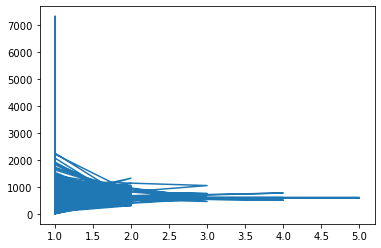

In [ ]:
plt.plot(X, y)

In [ ]:
set(X)

{1, 2, 3, 4, 5}

In [ ]:
X2 = np.array(X).reshape((len(X), 1))
reg = LinearRegression().fit(X2, y)
reg.score(X2, y)
reg.predict(np.array([[1]]))

In [ ]:
reg.predict(np.array([[1]]))

array([604.04248629])

In [ ]:
reg.predict(np.array([[2]]))

array([614.33371587])

In [ ]:
reg.predict(np.array([[3]]))

array([624.62494544])

In [ ]:
reg.predict(np.array([[4]]))

array([634.91617502])

In [ ]:
reg.predict(np.array([[5]]))

array([645.20740459])

In [ ]:
reg.predict(np.array([[6]]))

array([655.49863417])

In [ ]:
df.dtypes

session_id                   int64
subject_id                   int64
tutor_id                     int64
tutor_joined_on     datetime64[ns]
exited_on           datetime64[ns]
joining_month                int64
handling_time      timedelta64[ns]
joining_month                int64
dtype: object

In [ ]:
df_group_by = df.groupby(['session_id', 'tutor_id', 'subject_id'])

In [ ]:
X = []
y = []
for every_group in df_group_by.groups.keys():
    g = df_group_by.get_group(every_group)
    X.append(g.shape[0])
    y.append(g['handling_time'].mean())
    

In [ ]:
for i in range(len(y)):
    y[i] = y[i].total_seconds()

In [ ]:
X2 = np.array(X).reshape((len(X), 1))
reg = LinearRegression().fit(X2, y)

In [ ]:
reg.score(X2, y)

3.111235870045803e-07

In [ ]:
reg.predict(np.array([[1]]))

array([604.04248629])

In [ ]:
reg.predict(np.array([[2]]))

array([614.33371587])

## **From the above hypothesis please suggest a limit on the number of doubts the tutor should be able to pick at an instant to reduce the AHT**

In [ ]:
handling_time = df['handling_time'].tolist()
for i in range(len(handling_time)):
    handling_time[i] = handling_time[i].total_seconds()

In [ ]:
sum(handling_time)/len(handling_time)

604.0531210180955

## **The tutor should pick 1 problem at a time.**